<a href="https://colab.research.google.com/github/udlbook/iclimbtrees/blob/main/notebooks/ProbIntro_Sampling_Answers.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Sampling from probability distributions using the CDF

The purpose of this Python notebook is to experiment with sampling from 1D and 2D probability distributions using a method based on the cumulative distribution function (CDF).

You can save a local copy of this notebook in your Google account and work through it in Colab (recommended) or you can download the notebook and run it locally using Jupyter notebook or similar.  

Contact me at iclimbtreesmail@gmail.com if you find any mistakes or have any suggestions.

In [90]:
# Math library
import numpy as np
# Plotting library
import matplotlib.pyplot as plt

# Generating uniform pseudo-random numbers

All the methods that we use in this notebook rely on an initial sample from a uniform distribution in the range [0,1].  To do that we first need to generate a random integer in the range $[0,\gamma]$ and then divide this by $\gamma$.

Let's first develop a basic [linear congruential generator](https://en.wikipedia.org/wiki/Linear_congruential_generator) (LCG) method to do this.

We initialize a variable $r_0$ to a predefined random seed, and then iterate

$$r_{n} = \textrm{mod}[\alpha + \beta r_{n-1}, \gamma]$$

where the function $\textrm{mod}[\bullet]$ divides the first argument by the second and returns the remainer.

In [ ]:
class LCGenerator:
    # Constructor
    def __init__(self, seed=1):
        self.gamma = 2**31
        self.alpha = 1103515245
        self.beta = 12345
        self.r = seed

    # Iterate to the next
    def generate(self):
        # Perform the iteration
        self.r = (self.alpha * self.r+ self.beta) % self.gamma
        # Divide by the maximum integer
        return self.r/ self.gamma

In [20]:
# Call our routine
randgen = LCGenerator(seed=42)
for _ in range(10):
    print(randgen.generate())

0.5823075897060335
0.5198187492787838
0.46597642498090863
0.7770372582599521
0.42286502895876765
0.03337232954800129
0.41738913068547845
0.8087285170331597
0.6123396842740476
0.7149040475487709


# Sampling from a discrete distribution

To sample from a discrete distribution, we first form the cumulative distribution function.  Then we draw a sample from a uniform distribution defined between zero and one and see where that sample "intersects" the probability distribution as in this figure:

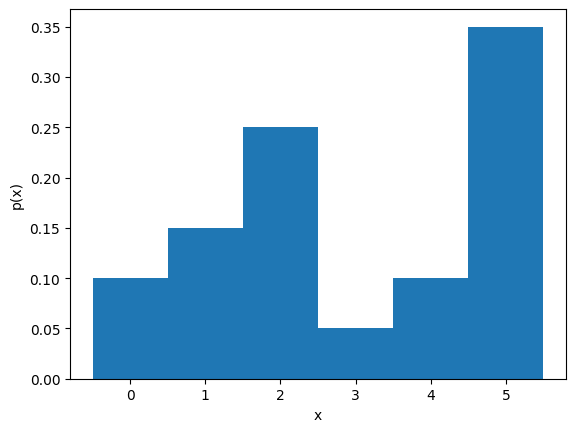

In [21]:
# Define probability disgtribution
p_x = [0.1, 0.15, 0.25, 0.05, 0.1, 0.35 ]

# Create an array for the x-axis values (indices of the probabilities)
x_values = np.arange(len(p_x))

# Create the histogram
plt.bar(x_values, p_x, width=1.0)
plt.xlabel("x")
plt.ylabel("p(x)")
plt.show()

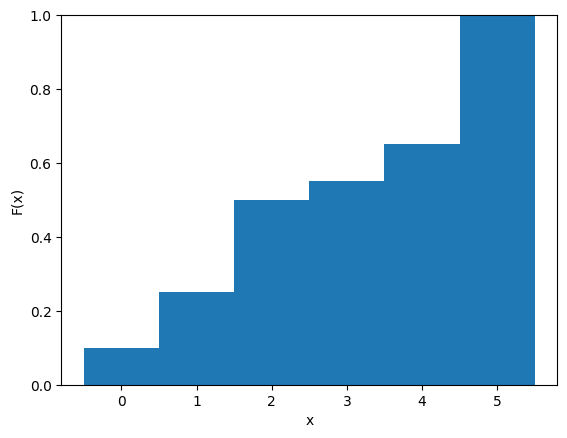

In [19]:
# Create the cumulative distribution and plot
c_x = np.cumsum(p_x)

In [ ]:
# Plot the cumulutave distribution
plt.bar(x_values, c_x, width=1.0)
plt.xlabel("x")
plt.ylabel("F(x)")
plt.ylim(0,1)
plt.show()

In [44]:
# Find intersection of uniform sample and CDF (returns integer between 0 and 5)
def sample_from_cdf(c_x, uniform_sample):
  return np.sum(c_x < uniform_sample).astype(int)

In [47]:
# Sample and form empirical probability distribution
n_samples = 10;
samples = np.zeros((n_samples),dtype=np.int32)
randgen = LCGenerator(seed=42)
for c_sample in range(n_samples):
    uniform = randgen.generate()
    this_sample = sample_from_cdf(c_x, uniform)
    samples[c_sample] = this_sample

freqs = np.bincount(samples, minlength=6)
empirical_dist = freqs/n_samples

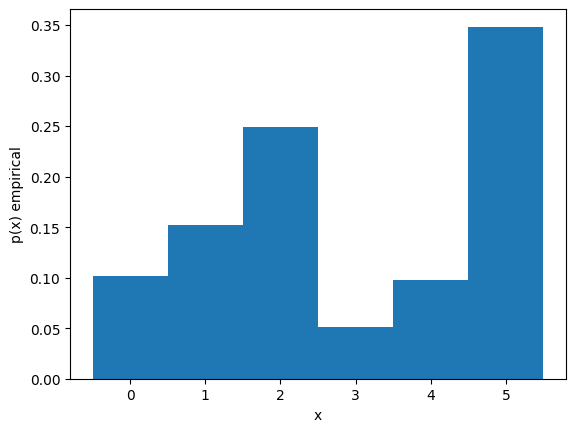

In [91]:
# Plot empirical probability distribution
plt.bar(x_values, empirical_dist, width=1.0)
plt.xlabel("x")
plt.ylabel("p(x) empirical")
plt.show()

You should see that as you increase the number of samples, the empirical distribution gets closer to the true distribution.

Note that in practice, we would usually generate samples from a discrete distribution using the inbuild function [np.random.choice](https://numpy.org/devdocs/reference/random/generated/numpy.random.choice.html).

# Sampling from a continuous distribution

Now let's sample from a continuous distribution.  The method is the same as before; we compute the cumulative distribution function,  generate numbers from a uniform distribution, and see where these numbers intersect the cumulative distribution function as in this image:

<img src="data:image/svg+xml;base64,
PD94bWwgdmVyc2lvbj0iMS4wIiBlbmNvZGluZz0iVVRGLTgiPz4NCjxzdmcgd2lkdGg9Ijc0Mi40MSIgaGVpZ2h0PSIyMjQuNjIiIHZlcnNpb249IjEuMSIgdmlld0JveD0iMCAwIDE5Ni40MyA1OS40MzEiIHhtbG5zPSJodHRwOi8vd3d3LnczLm9yZy8yMDAwL3N2ZyIgeG1sbnM6bnMxPSJodHRwOi8vd3d3LmlraS5maS9wYXYvc29mdHdhcmUvdGV4dGV4dC8iIHhtbG5zOnhsaW5rPSJodHRwOi8vd3d3LnczLm9yZy8xOTk5L3hsaW5rIj4NCiA8ZGVmcyBzdHJva2UtbGluZWpvaW49InJvdW5kIj4NCiAgPG1hcmtlciBpZD0iZWRlIiBvdmVyZmxvdz0idmlzaWJsZSIgc3Ryb2tlLWxpbmVqb2luPSJyb3VuZCIgb3JpZW50PSJhdXRvIj4NCiAgIDxwYXRoIHRyYW5zZm9ybT0ibWF0cml4KC0uMiAwIDAgLS4yIC0xLjIgMCkiIGQ9Im0wIDAgNS01LTE3LjUgNSAxNy41IDV6IiBmaWxsPSIjNDc2Nzc5IiBmaWxsLXJ1bGU9ImV2ZW5vZGQiIHN0cm9rZT0iIzQ3Njc3OSIgc3Ryb2tlLWxpbmVqb2luPSJyb3VuZCIgc3Ryb2tlLXdpZHRoPSIxcHQiLz4NCiAgPC9tYXJrZXI+DQogIDxtYXJrZXIgaWQ9ImVkZiIgb3ZlcmZsb3c9InZpc2libGUiIHN0cm9rZS1saW5lam9pbj0icm91bmQiIG9yaWVudD0iYXV0byI+DQogICA8cGF0aCB0cmFuc2Zvcm09Im1hdHJpeCgtLjIgMCAwIC0uMiAtMS4yIDApIiBkPSJtMCAwIDUtNS0xNy41IDUgMTcuNSA1eiIgZmlsbD0iIzM0ODM3YSIgZmlsbC1ydWxlPSJldmVub2RkIiBzdHJva2U9IiMzNDgzN2EiIHN0cm9rZS1saW5lam9pbj0icm91bmQiIHN0cm9rZS13aWR0aD0iMXB0Ii8+DQogIDwvbWFya2VyPg0KICA8bGluZWFyR3JhZGllbnQgaWQ9ImVkayI+DQogICA8c3RvcCBzdG9wLWNvbG9yPSIjODc0NDI4IiBvZmZzZXQ9IjAiLz4NCiAgIDxzdG9wIHN0b3AtY29sb3I9IiNmNGUzZGIiIG9mZnNldD0iMSIvPg0KICA8L2xpbmVhckdyYWRpZW50Pg0KICA8c3R5bGUgdHlwZT0idGV4dC9jc3MiPip7c3Ryb2tlLWxpbmVjYXA6YnV0dDtzdHJva2UtbGluZWpvaW46cm91bmQ7fTwvc3R5bGU+DQogIDxzdHlsZSB0eXBlPSJ0ZXh0L2NzcyI+KntzdHJva2UtbGluZWNhcDpidXR0O3N0cm9rZS1saW5lam9pbjpyb3VuZDt9PC9zdHlsZT4NCiAgPHN0eWxlIHR5cGU9InRleHQvY3NzIj4qe3N0cm9rZS1saW5lY2FwOmJ1dHQ7c3Ryb2tlLWxpbmVqb2luOnJvdW5kO308L3N0eWxlPg0KICA8c3R5bGUgdHlwZT0idGV4dC9jc3MiPip7c3Ryb2tlLWxpbmVjYXA6YnV0dDtzdHJva2UtbGluZWpvaW46cm91bmQ7fTwvc3R5bGU+DQogIDxwYXRoIGlkPSJlZGoiIGQ9Im0wIDNjMC43OTU2MSAwIDEuNTU4Ny0wLjMxNjEgMi4xMjEzLTAuODc4NjggMC41NjI1OC0wLjU2MjU4IDAuODc4NjgtMS4zMjU3IDAuODc4NjgtMi4xMjEzcy0wLjMxNjEtMS41NTg3LTAuODc4NjgtMi4xMjEzYy0wLjU2MjU4LTAuNTYyNTgtMS4zMjU3LTAuODc4NjgtMi4xMjEzLTAuODc4NjhzLTEuNTU4NyAwLjMxNjEtMi4xMjEzIDAuODc4NjhjLTAuNTYyNTggMC41NjI1OC0wLjg3ODY4IDEuMzI1Ny0wLjg3ODY4IDIuMTIxM3MwLjMxNjEgMS41NTg3IDAuODc4NjggMi4xMjEzYzAuNTYyNTggMC41NjI1OCAxLjMyNTcgMC44Nzg2OCAyLjEyMTMgMC44Nzg2OHoiIHN0cm9rZT0iI2JmMDBiZiIgc3Ryb2tlLWxpbmVqb2luPSJyb3VuZCIvPg0KICA8c3R5bGUgdHlwZT0idGV4dC9jc3MiPip7c3Ryb2tlLWxpbmVjYXA6YnV0dDtzdHJva2UtbGluZWpvaW46cm91bmQ7fTwvc3R5bGU+DQogIDxzdHlsZSB0eXBlPSJ0ZXh0L2NzcyI+KntzdHJva2UtbGluZWNhcDpidXR0O3N0cm9rZS1saW5lam9pbjpyb3VuZDt9PC9zdHlsZT4NCiAgPHN0eWxlIHR5cGU9InRleHQvY3NzIj4qe3N0cm9rZS1saW5lY2FwOmJ1dHQ7c3Ryb2tlLWxpbmVqb2luOnJvdW5kO308L3N0eWxlPg0KICA8cGF0aCBpZD0iZWRhIiBkPSJtMCAzYzAuNzk1NjEgMCAxLjU1ODctMC4zMTYxIDIuMTIxMy0wLjg3ODY4IDAuNTYyNTgtMC41NjI1OCAwLjg3ODY4LTEuMzI1NyAwLjg3ODY4LTIuMTIxM3MtMC4zMTYxLTEuNTU4Ny0wLjg3ODY4LTIuMTIxM2MtMC41NjI1OC0wLjU2MjU4LTEuMzI1Ny0wLjg3ODY4LTIuMTIxMy0wLjg3ODY4cy0xLjU1ODcgMC4zMTYxLTIuMTIxMyAwLjg3ODY4Yy0wLjU2MjU4IDAuNTYyNTgtMC44Nzg2OCAxLjMyNTctMC44Nzg2OCAyLjEyMTNzMC4zMTYxIDEuNTU4NyAwLjg3ODY4IDIuMTIxM2MwLjU2MjU4IDAuNTYyNTggMS4zMjU3IDAuODc4NjggMi4xMjEzIDAuODc4Njh6IiBzdHJva2U9IiNiZjAwYmYiIHN0cm9rZS1saW5lam9pbj0icm91bmQiLz4NCiAgPHN0eWxlIHR5cGU9InRleHQvY3NzIj4qe3N0cm9rZS1saW5lY2FwOmJ1dHQ7c3Ryb2tlLWxpbmVqb2luOnJvdW5kO308L3N0eWxlPg0KICA8c3R5bGUgdHlwZT0idGV4dC9jc3MiPip7c3Ryb2tlLWxpbmVjYXA6YnV0dDtzdHJva2UtbGluZWpvaW46cm91bmQ7fTwvc3R5bGU+DQogIDxnIGZpbGw9IiM4MDgwODAiIHN0cm9rZS13aWR0aD0iMCI+PC9nPg0KICA8c3R5bGUgdHlwZT0idGV4dC9jc3MiPip7c3Ryb2tlLWxpbmVqb2luOiByb3VuZDsgc3Ryb2tlLWxpbmVjYXA6IGJ1dHR9PC9zdHlsZT4NCiAgPHN0eWxlIHR5cGU9InRleHQvY3NzIj4qe3N0cm9rZS1saW5lam9pbjogcm91bmQ7IHN0cm9rZS1saW5lY2FwOiBidXR0fTwvc3R5bGU+DQogIDxzdHlsZSB0eXBlPSJ0ZXh0L2NzcyI+KntzdHJva2UtbGluZWpvaW46IHJvdW5kOyBzdHJva2UtbGluZWNhcDogYnV0dH08L3N0eWxlPg0KICA8c3R5bGUgdHlwZT0idGV4dC9jc3MiPip7c3Ryb2tlLWxpbmVqb2luOiByb3VuZDsgc3Ryb2tlLWxpbmVjYXA6IGJ1dHR9PC9zdHlsZT4NCiAgPHN0eWxlIHR5cGU9InRleHQvY3NzIj4qe3N0cm9rZS1saW5lam9pbjogcm91bmQ7IHN0cm9rZS1saW5lY2FwOiBidXR0fTwvc3R5bGU+DQogIDxtYXJrZXIgaWQ9ImVkZyIgb3ZlcmZsb3c9InZpc2libGUiIHN0cm9rZS1saW5lam9pbj0icm91bmQiIG9yaWVudD0iYXV0byI+DQogICA8cGF0aCB0cmFuc2Zvcm09Im1hdHJpeCgtLjIgMCAwIC0uMiAtMS4yIDApIiBkPSJtMCAwIDUtNS0xNy41IDUgMTcuNSA1eiIgZmlsbD0iIzQ3Njc3OSIgZmlsbC1ydWxlPSJldmVub2RkIiBzdHJva2U9IiM0NzY3NzkiIHN0cm9rZS1saW5lam9pbj0icm91bmQiIHN0cm9rZS13aWR0aD0iMXB0Ii8+DQogIDwvbWFya2VyPg0KICA8bWFya2VyIGlkPSJlZGgiIG92ZXJmbG93PSJ2aXNpYmxlIiBzdHJva2UtbGluZWpvaW49InJvdW5kIiBvcmllbnQ9ImF1dG8iPg0KICAgPHBhdGggdHJhbnNmb3JtPSJtYXRyaXgoLS4yIDAgMCAtLjIgLTEuMiAwKSIgZD0ibTAgMCA1LTUtMTcuNSA1IDE3LjUgNXoiIGZpbGw9IiMzNDgzN2EiIGZpbGwtcnVsZT0iZXZlbm9kZCIgc3Ryb2tlPSIjMzQ4MzdhIiBzdHJva2UtbGluZWpvaW49InJvdW5kIiBzdHJva2Utd2lkdGg9IjFwdCIvPg0KICA8L21hcmtlcj4NCiAgPG1hcmtlciBpZD0iZWRpIiBvdmVyZmxvdz0idmlzaWJsZSIgc3Ryb2tlLWxpbmVqb2luPSJyb3VuZCIgb3JpZW50PSJhdXRvIj4NCiAgIDxwYXRoIHRyYW5zZm9ybT0ibWF0cml4KC0uMiAwIDAgLS4yIC0xLjIgMCkiIGQ9Im0wIDAgNS01LTE3LjUgNSAxNy41IDV6IiBmaWxsPSIjNDc2Nzc5IiBmaWxsLXJ1bGU9ImV2ZW5vZGQiIHN0cm9rZT0iIzQ3Njc3OSIgc3Ryb2tlLWxpbmVqb2luPSJyb3VuZCIgc3Ryb2tlLXdpZHRoPSIxcHQiLz4NCiAgPC9tYXJrZXI+DQogIDxtYXJrZXIgaWQ9ImVkbSIgb3ZlcmZsb3c9InZpc2libGUiIHN0cm9rZS1saW5lam9pbj0icm91bmQiIG9yaWVudD0iYXV0byI+DQogICA8cGF0aCB0cmFuc2Zvcm09Im1hdHJpeCgtLjIgMCAwIC0uMiAtMS4yIDApIiBkPSJtMCAwIDUtNS0xNy41IDUgMTcuNSA1eiIgZmlsbD0iIzM0ODM3YSIgZmlsbC1ydWxlPSJldmVub2RkIiBzdHJva2U9IiMzNDgzN2EiIHN0cm9rZS1saW5lam9pbj0icm91bmQiIHN0cm9rZS13aWR0aD0iMXB0Ii8+DQogIDwvbWFya2VyPg0KICA8c3R5bGUgdHlwZT0idGV4dC9jc3MiPip7c3Ryb2tlLWxpbmVqb2luOiByb3VuZDsgc3Ryb2tlLWxpbmVjYXA6IGJ1dHR9PC9zdHlsZT4NCiAgPGNsaXBQYXRoIGlkPSJlZGIiIHN0cm9rZS1saW5lam9pbj0icm91bmQiPg0KICAgPHJlY3QgeD0iNDUiIHk9IjY5LjEyIiB3aWR0aD0iMjc5IiBoZWlnaHQ9IjQ0My41MiIgc3Ryb2tlLWxpbmVqb2luPSJyb3VuZCIvPg0KICA8L2NsaXBQYXRoPg0KICA8c3R5bGUgdHlwZT0idGV4dC9jc3MiPip7c3Ryb2tlLWxpbmVqb2luOiByb3VuZDsgc3Ryb2tlLWxpbmVjYXA6IGJ1dHR9PC9zdHlsZT4NCiAgPGNsaXBQYXRoIGlkPSJlZGQiIHN0cm9rZS1saW5lam9pbj0icm91bmQiPg0KICAgPHJlY3QgeD0iNDUiIHk9IjY5LjEyIiB3aWR0aD0iMjc5IiBoZWlnaHQ9IjQ0My41MiIgc3Ryb2tlLWxpbmVqb2luPSJyb3VuZCIvPg0KICA8L2NsaXBQYXRoPg0KICA8bGluZWFyR3JhZGllbnQgaWQ9ImVkbCIgeDE9Ii0zLjg5MDciIHgyPSI4ODcuODkiIHkxPSI2MTYuNSIgeTI9IjYxNi41IiBncmFkaWVudFVuaXRzPSJ1c2VyU3BhY2VPblVzZSI+DQogICA8c3RvcCBzdG9wLWNvbG9yPSIjZjRlM2RiIiBvZmZzZXQ9IjAiLz4NCiAgIDxzdG9wIHN0b3AtY29sb3I9IiM4NzQ0MjgiIG9mZnNldD0iMSIvPg0KICA8L2xpbmVhckdyYWRpZW50Pg0KICA8bGluZWFyR3JhZGllbnQgaWQ9ImVkYyIgeDE9IjQ3Ny4zNCIgeDI9IjQ3Ny4zNCIgeTE9Ii02LjI4NTkiIHkyPSIxMDg4LjMiIGdyYWRpZW50VW5pdHM9InVzZXJTcGFjZU9uVXNlIiB4bGluazpocmVmPSIjZWRrIi8+DQogPC9kZWZzPg0KIDxnIHRyYW5zZm9ybT0idHJhbnNsYXRlKDEwLjg3MSAtNzAuNzQyKSIgc3Ryb2tlLWxpbmVqb2luPSJyb3VuZCI+DQogIDxnIGZpbGw9Im5vbmUiIHN0cm9rZT0iIzgwODA4MCIgc3Ryb2tlLWxpbmVqb2luPSJtaXRlciIgc3Ryb2tlLXdpZHRoPSIuMyI+DQogICA8cGF0aCB0cmFuc2Zvcm09InRyYW5zbGF0ZSg0MC45NTYgMjMuMDU0KSIgZD0ibTEwMS4xOSAxMDAuMDN2MC44Nzg0MSIvPg0KICAgPHBhdGggdHJhbnNmb3JtPSJ0cmFuc2xhdGUoMjcuMzQ0IDIzLjA1NCkiIGQ9Im0xMjguNzcgMTAwLjAzdjAuODc4NDEiLz4NCiAgIDxwYXRoIHRyYW5zZm9ybT0idHJhbnNsYXRlKDI3LjY5OSAyMy4wNTQpIiBkPSJtMTU2LjM1IDEwMC4wM3YwLjg3ODQxIi8+DQogICA8cGF0aCB0cmFuc2Zvcm09InRyYW5zbGF0ZSg0Mi40MjMgMjMuMDU0KSIgZD0ibTEwNi43MSAxMDAuNjJ2LTAuNTk5MjMiLz4NCiAgIDxwYXRoIHRyYW5zZm9ybT0idHJhbnNsYXRlKDI4LjgxMSAyMy4wNTQpIiBkPSJtMTM0LjI5IDEwMC42MnYtMC41OTkyMyIvPg0KICAgPHBhdGggdHJhbnNmb3JtPSJ0cmFuc2xhdGUoMzcuMjYzIDIzLjA1NCkiIGQ9Im0xMzkuOCAxMDAuNjJ2LTAuNTk5MjMiLz4NCiAgIDxwYXRoIHRyYW5zZm9ybT0idHJhbnNsYXRlKDQxLjMxMSAyMy4wNTQpIiBkPSJtMTI4Ljc3IDEwMC4wM3YwLjg3ODQxIi8+DQogIDwvZz4NCiAgPGcgZmlsbD0iIzgwODA4MCIgc3Ryb2tlLWxpbmVqb2luPSJyb3VuZCI+DQogICA8ZyB0cmFuc2Zvcm09Im1hdHJpeCguMjc5NjUgMCAwIC4yNzk2NSA5OS4xNzUgODguNjI5KSIgaW5rc2NhcGV2ZXJzaW9uPSIwLjkyLjMiIG5zMTphbGlnbm1lbnQ9Im1pZGRsZSBjZW50ZXIiIG5zMTpqYWNvYmlhbl9zcXJ0PSIwLjI3OTY1MyIgbnMxOnBkZmNvbnZlcnRlcj0icGRmMnN2ZyIgbnMxOnByZWFtYmxlPSJDOlxcVXNlcnNcXGRyc2pkXFxBcHBEYXRhXFxSb2FtaW5nXFxpbmtzY2FwZVxcZXh0ZW5zaW9uc1xcdGV4dGV4dFxcZGVmYXVsdF9wYWNrYWdlc19zaW1vbi50ZXgiIG5zMTpzY2FsZT0iMC43OTI3MTUzNjczOTUiIG5zMTp0ZXhjb252ZXJ0ZXI9InBkZmxhdGV4IiBuczE6dGV4dD0iMS4wIiBuczE6dmVyc2lvbj0iMC4xMS4wIj4NCiAgICA8ZyBmaWxsPSIjODA4MDgwIiBzdHJva2UtbGluZWpvaW49InJvdW5kIj4NCiAgICAgPGcgZmlsbD0iIzgwODA4MCIgc3Ryb2tlLWxpbmVqb2luPSJyb3VuZCI+DQogICAgICA8cGF0aCB0cmFuc2Zvcm09InRyYW5zbGF0ZSgxNDguNzEgMTM0Ljc2KSIgZD0ibTIuMTA5NCAwdi02Ljg5MDZoLTAuODI4MTJsLTAuOTg0MzggMC43OTY4OHYwLjc4MTI1bDEuMDMxMi0wLjg0Mzc1djYuMTU2MnoiLz4NCiAgICAgIDxwYXRoIHRyYW5zZm9ybT0idHJhbnNsYXRlKDE1MS42MyAxMzQuNzYpIiBkPSJtMS42NDA2IDB2LTEuMDE1NmgtMC45NTMxMnYxLjAxNTZ6Ii8+DQogICAgICA8cGF0aCB0cmFuc2Zvcm09InRyYW5zbGF0ZSgxNTMuOTUgMTM0Ljc2KSIgZD0ibTQuOTY4OC0zLjQyMTljLTAuMDE1NjI1LTEuNDY4OC0wLjM0Mzc1LTMuNTkzOC0yLjIwMzEtMy41OTM4cy0yLjE3MTkgMi4xNTYyLTIuMTcxOSAzLjU5MzhjMCAxLjQ1MzEgMC4zMjgxMiAzLjU2MjUgMi4xNzE5IDMuNTYyNXMyLjIwMzEtMi4xMDk0IDIuMjAzMS0zLjU2MjV6bS0wLjcxODc1IDBjMCAwLjk1MzEyLTAuMDc4MTI1IDIuOTA2Mi0xLjQ4NDQgMi45MDYycy0xLjQ1MzEtMS45ODQ0LTEuNDUzMS0yLjkwNjJjMC0wLjkzNzUgMC4wMzEyNS0yLjk1MzEgMS40NTMxLTIuOTUzMSAxLjQwNjIgMCAxLjQ4NDQgMi4wMzEyIDEuNDg0NCAyLjk1MzF6Ii8+DQogICAgIDwvZz4NCiAgICA8L2c+DQogICA8L2c+DQogICA8ZyB0cmFuc2Zvcm09Im1hdHJpeCguMjc5NjUgMCAwIC4yNzk2NSAxNDAuNzEgODguNjI5KSIgaW5rc2NhcGV2ZXJzaW9uPSIwLjkyLjMiIG5zMTphbGlnbm1lbnQ9Im1pZGRsZSBjZW50ZXIiIG5zMTpqYWNvYmlhbl9zcXJ0PSIwLjI3OTY1MyIgbnMxOnBkZmNvbnZlcnRlcj0icGRmMnN2ZyIgbnMxOnByZWFtYmxlPSJDOlxcVXNlcnNcXGRyc2pkXFxBcHBEYXRhXFxSb2FtaW5nXFxpbmtzY2FwZVxcZXh0ZW5zaW9uc1xcdGV4dGV4dFxcZGVmYXVsdF9wYWNrYWdlc19zaW1vbi50ZXgiIG5zMTpzY2FsZT0iMC43OTI3MTUzNjczOTUiIG5zMTp0ZXhjb252ZXJ0ZXI9InBkZmxhdGV4IiBuczE6dGV4dD0iMi41IiBuczE6dmVyc2lvbj0iMC4xMS4wIj4NCiAgICA8ZyBmaWxsPSIjODA4MDgwIiBzdHJva2UtbGluZWpvaW49InJvdW5kIj4NCiAgICAgPGcgZmlsbD0iIzgwODA4MCIgc3Ryb2tlLWxpbmVqb2luPSJyb3VuZCI+DQogICAgICA8cGF0aCB0cmFuc2Zvcm09InRyYW5zbGF0ZSgxNDguNzEgMTM0Ljc2KSIgZD0ibTQuMzkwNiAwdi0wLjcxODc1aC0zLjA5MzhsMi4zNTk0LTIuNjU2MmMwLjM5MDYyLTAuNTQ2ODggMC42ODc1LTAuOTY4NzUgMC42ODc1LTEuNjg3NSAwLTEuMjgxMi0wLjkzNzUtMS45NTMxLTIuMTI1LTEuOTUzMS0wLjY3MTg4IDAtMS4yMzQ0IDAuMjAzMTItMS43OTY5IDAuNDM3NXYwLjg5MDYyYzAuNTYyNS0wLjM1OTM4IDEuMTI1LTAuNjI1IDEuODEyNS0wLjYyNSAwLjc4MTI1IDAgMS4zOTA2IDAuNDg0MzggMS4zOTA2IDEuMjk2OSAwIDAuNTQ2ODgtMC40Mzc1IDEuMjE4OC0wLjc5Njg4IDEuNTkzOC0wLjEwOTM4IDAuMTU2MjUtMi4yODEyIDIuNTMxMi0yLjQ1MzEgMi43MDMxdjAuNzE4NzV6Ii8+DQogICAgICA8cGF0aCB0cmFuc2Zvcm09InRyYW5zbGF0ZSgxNTMuNTYgMTM0Ljc2KSIgZD0ibTEuNjQwNiAwdi0xLjAxNTZoLTAuOTUzMTJ2MS4wMTU2eiIvPg0KICAgICAgPHBhdGggdHJhbnNmb3JtPSJ0cmFuc2xhdGUoMTU1Ljg5IDEzNC43NikiIGQ9Im00LjQ2ODgtMi4xODc1Yy0wLjAxNTYyNS0xLjQwNjItMC44OTA2Mi0yLjMyODEtMi4yOTY5LTIuMzI4MS0wLjE4NzUgMC4wMTU2MjUtMC42MDkzOCAwLjA2MjUtMC44NTkzOCAwLjE1NjI1bDAuMjUtMS44MTI1aDIuNDM3NXYtMC43MTg3NWgtMi45Mzc1bC0wLjQyMTg4IDMuNDA2MmMwLjU0Njg4LTAuMjY1NjIgMC42NzE4OC0wLjMyODEyIDEuMzc1LTAuMzI4MTIgMS4wMTU2IDAgMS43MzQ0IDAuNTYyNSAxLjczNDQgMS42MjUgMCAxLjA5MzgtMC43MDMxMiAxLjYyNS0xLjczNDQgMS42MjUtMC42ODc1IDAtMS4xNDA2LTAuMTQwNjItMS42NDA2LTAuNDUzMTJ2MC44NTkzOGMwLjQ1MzEyIDAuMTcxODggMS4xMjUgMC4yOTY4OCAxLjY1NjIgMC4yOTY4OCAxLjQ4NDQgMCAyLjQzNzUtMC44MTI1IDIuNDM3NS0yLjMyODF6Ii8+DQogICAgIDwvZz4NCiAgICA8L2c+DQogICA8L2c+DQogICA8ZyB0cmFuc2Zvcm09Im1hdHJpeCguMjc5NjUgMCAwIC4yNzk2NSAxMTMuMTEgODguNjExKSIgaW5rc2NhcGV2ZXJzaW9uPSIwLjkyLjMiIG5zMTphbGlnbm1lbnQ9Im1pZGRsZSBjZW50ZXIiIG5zMTpqYWNvYmlhbl9zcXJ0PSIwLjI3OTY1MyIgbnMxOnBkZmNvbnZlcnRlcj0icGRmMnN2ZyIgbnMxOnByZWFtYmxlPSJDOlxcVXNlcnNcXGRyc2pkXFxBcHBEYXRhXFxSb2FtaW5nXFxpbmtzY2FwZVxcZXh0ZW5zaW9uc1xcdGV4dGV4dFxcZGVmYXVsdF9wYWNrYWdlc19zaW1vbi50ZXgiIG5zMTpzY2FsZT0iMC43OTI3MTUzNjczOTUiIG5zMTp0ZXhjb252ZXJ0ZXI9InBkZmxhdGV4IiBuczE6dGV4dD0iMS41IiBuczE6dmVyc2lvbj0iMC4xMS4wIj4NCiAgICA8ZyBmaWxsPSIjODA4MDgwIiBzdHJva2UtbGluZWpvaW49InJvdW5kIj4NCiAgICAgPGcgZmlsbD0iIzgwODA4MCIgc3Ryb2tlLWxpbmVqb2luPSJyb3VuZCI+DQogICAgICA8cGF0aCB0cmFuc2Zvcm09InRyYW5zbGF0ZSgxNDguNzEgMTM0Ljc2KSIgZD0ibTIuMTA5NCAwdi02Ljg5MDZoLTAuODI4MTJsLTAuOTg0MzggMC43OTY4OHYwLjc4MTI1bDEuMDMxMi0wLjg0Mzc1djYuMTU2MnoiLz4NCiAgICAgIDxwYXRoIHRyYW5zZm9ybT0idHJhbnNsYXRlKDE1MS42MyAxMzQuNzYpIiBkPSJtMS42NDA2IDB2LTEuMDE1NmgtMC45NTMxMnYxLjAxNTZ6Ii8+DQogICAgICA8cGF0aCB0cmFuc2Zvcm09InRyYW5zbGF0ZSgxNTMuOTUgMTM0Ljc2KSIgZD0ibTQuNDY4OC0yLjE4NzVjLTAuMDE1NjI1LTEuNDA2Mi0wLjg5MDYyLTIuMzI4MS0yLjI5NjktMi4zMjgxLTAuMTg3NSAwLjAxNTYyNS0wLjYwOTM4IDAuMDYyNS0wLjg1OTM4IDAuMTU2MjVsMC4yNS0xLjgxMjVoMi40Mzc1di0wLjcxODc1aC0yLjkzNzVsLTAuNDIxODggMy40MDYyYzAuNTQ2ODgtMC4yNjU2MiAwLjY3MTg4LTAuMzI4MTIgMS4zNzUtMC4zMjgxMiAxLjAxNTYgMCAxLjczNDQgMC41NjI1IDEuNzM0NCAxLjYyNSAwIDEuMDkzOC0wLjcwMzEyIDEuNjI1LTEuNzM0NCAxLjYyNS0wLjY4NzUgMC0xLjE0MDYtMC4xNDA2Mi0xLjY0MDYtMC40NTMxMnYwLjg1OTM4YzAuNDUzMTIgMC4xNzE4OCAxLjEyNSAwLjI5Njg4IDEuNjU2MiAwLjI5Njg4IDEuNDg0NCAwIDIuNDM3NS0wLjgxMjUgMi40Mzc1LTIuMzI4MXoiLz4NCiAgICAgPC9nPg0KICAgIDwvZz4NCiAgIDwvZz4NCiAgIDxnIHRyYW5zZm9ybT0ibWF0cml4KC4yNzk2NSAwIDAgLjI3OTY1IDEyNy4wNiA4OC42MjkpIiBpbmtzY2FwZXZlcnNpb249IjAuOTIuMyIgbnMxOmFsaWdubWVudD0ibWlkZGxlIGNlbnRlciIgbnMxOmphY29iaWFuX3NxcnQ9IjAuMjc5NjUzIiBuczE6cGRmY29udmVydGVyPSJwZGYyc3ZnIiBuczE6cHJlYW1ibGU9IkM6XFxVc2Vyc1xcZHJzamRcXEFwcERhdGFcXFJvYW1pbmdcXGlua3NjYXBlXFxleHRlbnNpb25zXFx0ZXh0ZXh0XFxkZWZhdWx0X3BhY2thZ2VzX3NpbW9uLnRleCIgbnMxOnNjYWxlPSIwLjc5MjcxNTM2NzM5NSIgbnMxOnRleGNvbnZlcnRlcj0icGRmbGF0ZXgiIG5zMTp0ZXh0PSIyLjAiIG5zMTp2ZXJzaW9uPSIwLjExLjAiPg0KICAgIDxnIGZpbGw9IiM4MDgwODAiIHN0cm9rZS1saW5lam9pbj0icm91bmQiPg0KICAgICA8ZyBmaWxsPSIjODA4MDgwIiBzdHJva2UtbGluZWpvaW49InJvdW5kIj4NCiAgICAgIDxwYXRoIHRyYW5zZm9ybT0idHJhbnNsYXRlKDE0OC43MSAxMzQuNzYpIiBkPSJtNC4zOTA2IDB2LTAuNzE4NzVoLTMuMDkzOGwyLjM1OTQtMi42NTYyYzAuMzkwNjItMC41NDY4OCAwLjY4NzUtMC45Njg3NSAwLjY4NzUtMS42ODc1IDAtMS4yODEyLTAuOTM3NS0xLjk1MzEtMi4xMjUtMS45NTMxLTAuNjcxODggMC0xLjIzNDQgMC4yMDMxMi0xLjc5NjkgMC40Mzc1djAuODkwNjJjMC41NjI1LTAuMzU5MzggMS4xMjUtMC42MjUgMS44MTI1LTAuNjI1IDAuNzgxMjUgMCAxLjM5MDYgMC40ODQzOCAxLjM5MDYgMS4yOTY5IDAgMC41NDY4OC0wLjQzNzUgMS4yMTg4LTAuNzk2ODggMS41OTM4LTAuMTA5MzggMC4xNTYyNS0yLjI4MTIgMi41MzEyLTIuNDUzMSAyLjcwMzF2MC43MTg3NXoiLz4NCiAgICAgIDxwYXRoIHRyYW5zZm9ybT0idHJhbnNsYXRlKDE1My41NiAxMzQuNzYpIiBkPSJtMS42NDA2IDB2LTEuMDE1NmgtMC45NTMxMnYxLjAxNTZ6Ii8+DQogICAgICA8cGF0aCB0cmFuc2Zvcm09InRyYW5zbGF0ZSgxNTUuODkgMTM0Ljc2KSIgZD0ibTQuOTY4OC0zLjQyMTljLTAuMDE1NjI1LTEuNDY4OC0wLjM0Mzc1LTMuNTkzOC0yLjIwMzEtMy41OTM4cy0yLjE3MTkgMi4xNTYyLTIuMTcxOSAzLjU5MzhjMCAxLjQ1MzEgMC4zMjgxMiAzLjU2MjUgMi4xNzE5IDMuNTYyNXMyLjIwMzEtMi4xMDk0IDIuMjAzMS0zLjU2MjV6bS0wLjcxODc1IDBjMCAwLjk1MzEyLTAuMDc4MTI1IDIuOTA2Mi0xLjQ4NDQgMi45MDYycy0xLjQ1MzEtMS45ODQ0LTEuNDUzMS0yLjkwNjJjMC0wLjkzNzUgMC4wMzEyNS0yLjk1MzEgMS40NTMxLTIuOTUzMSAxLjQwNjIgMCAxLjQ4NDQgMi4wMzEyIDEuNDg0NCAyLjk1MzF6Ii8+DQogICAgIDwvZz4NCiAgICA8L2c+DQogICA8L2c+DQogIDwvZz4NCiAgPHVzZSB0cmFuc2Zvcm09Im1hdHJpeCguMTY0NzkgMCAwIC4xNjQ3OSA5MC43MDggMi4wNTg3KSIgeD0iMzExMDUiIHk9IjExNjU4LjA0MSIgd2lkdGg9IjEwMCUiIGhlaWdodD0iMTAwJSIgZmlsbD0iIzQ3Njc3OSIgc3Ryb2tlLXdpZHRoPSIwIiB4bGluazpocmVmPSIjZWRqIi8+DQogIDxmbG93Um9vdCBmaWxsPSIjMDAwMDAwIiBmb250LWZhbWlseT0ic2Fucy1zZXJpZiIgZm9udC1zaXplPSI2LjM3NDZweCIgbGV0dGVyLXNwYWNpbmc9IjBweCIgc3Ryb2tlLWxpbmVqb2luPSJyb3VuZCIgd29yZC1zcGFjaW5nPSIwcHgiIHN0eWxlPSJsaW5lLWhlaWdodDoxLjI1IiB4bWw6c3BhY2U9InByZXNlcnZlIj48Zmxvd1JlZ2lvbj48cmVjdCB4PSItNDYyLjQiIHk9Ii04NC44OTEiIHdpZHRoPSIzNzEuMjkiIGhlaWdodD0iMzMwLjg0IiBzdHJva2UtbGluZWpvaW49InJvdW5kIi8+PC9mbG93UmVnaW9uPjxmbG93UGFyYS8+PC9mbG93Um9vdD4NCiAgPGcgZmlsbD0iIzQ3Njc3OSIgZmlsbC1vcGFjaXR5PSIuOTk2MDgiIHN0cm9rZS13aWR0aD0iMCI+DQogICA8dXNlIHRyYW5zZm9ybT0ibWF0cml4KC4xNjUwMSAwIDAgLjE2NTAxIDkyLjEyOSA1OC40NDEpIiB4PSI3MTcyLjcyNTYiIHk9Ii0xIiB3aWR0aD0iMTAwJSIgaGVpZ2h0PSIxMDAlIiB4bGluazpocmVmPSIjZWRhIi8+DQogICA8dXNlIHRyYW5zZm9ybT0ibWF0cml4KC4xNjUwMSAwIDAgLjE2NTAxIDkyLjEyOSA1OC40NDEpIiB4PSI3Mjg0LjI1OTgiIHk9IjIwNzM3IiB3aWR0aD0iMTAwJSIgaGVpZ2h0PSIxMDAlIiB4bGluazpocmVmPSIjZWRhIi8+DQogICA8dXNlIHRyYW5zZm9ybT0ibWF0cml4KC4xNjUwMSAwIDAgLjE2NTAxIDkyLjEyOSA1OC40NDEpIiB4PSI5NTgxLjI0NzEiIHk9IjIwNzM3IiB3aWR0aD0iMTAwJSIgaGVpZ2h0PSIxMDAlIiB4bGluazpocmVmPSIjZWRhIi8+DQogICA8dXNlIHRyYW5zZm9ybT0ibWF0cml4KC4xNjUwMSAwIDAgLjE2NTAxIDkyLjEyOSA1OC40NDEpIiB4PSI5NzA5LjY1MDQiIHk9Ii0xIiB3aWR0aD0iMTAwJSIgaGVpZ2h0PSIxMDAlIiB4bGluazpocmVmPSIjZWRhIi8+DQogICA8dXNlIHRyYW5zZm9ybT0ibWF0cml4KC4xNjUwMSAwIDAgLjE2NTAxIDkyLjEyOSA1OC40NDEpIiB4PSIxMTEyNC4wNzMiIHk9Ii0xIiB3aWR0aD0iMTAwJSIgaGVpZ2h0PSIxMDAlIiB4bGluazpocmVmPSIjZWRhIi8+DQogICA8dXNlIHRyYW5zZm9ybT0ibWF0cml4KC4xNjUwMSAwIDAgLjE2NTAxIDkyLjEyOSA1OC40NDEpIiB4PSIxMTI2Mi45NzMiIHk9IjIwNzM3IiB3aWR0aD0iMTAwJSIgaGVpZ2h0PSIxMDAlIiB4bGluazpocmVmPSIjZWRhIi8+DQogICA8dXNlIHRyYW5zZm9ybT0ibWF0cml4KC4xNjUwMSAwIDAgLjE2NTAxIDkyLjEyOSA1OC40NDEpIiB4PSIxMjc0Ni4xNTYiIHk9IjIwNzM3IiB3aWR0aD0iMTAwJSIgaGVpZ2h0PSIxMDAlIiB4bGluazpocmVmPSIjZWRhIi8+DQogICA8dXNlIHRyYW5zZm9ybT0ibWF0cml4KC4xNjUwMSAwIDAgLjE2NTAxIDkyLjEyOSA1OC40NDEpIiB4PSIxMjg5NC4yNzEiIHk9Ii0xIiB3aWR0aD0iMTAwJSIgaGVpZ2h0PSIxMDAlIiB4bGluazpocmVmPSIjZWRhIi8+DQogICA8dXNlIHRyYW5zZm9ybT0ibWF0cml4KC4xNjUwMSAwIDAgLjE2NTAxIDkyLjEyOSA1OC40NDEpIiB4PSIxMzY5NC42MiIgeT0iLTEiIHdpZHRoPSIxMDAlIiBoZWlnaHQ9IjEwMCUiIHhsaW5rOmhyZWY9IiNlZGEiLz4NCiAgIDx1c2UgdHJhbnNmb3JtPSJtYXRyaXgoLjE2NTAxIDAgMCAuMTY1MDEgOTIuMTI5IDU4LjQ0MSkiIHg9IjEzODQ4LjcyMiIgeT0iMjA3MzciIHdpZHRoPSIxMDAlIiBoZWlnaHQ9IjEwMCUiIHhsaW5rOmhyZWY9IiNlZGEiLz4NCiAgIDx1c2UgdHJhbnNmb3JtPSJtYXRyaXgoLjE2NTAxIDAgMCAuMTY1MDEgOTIuMTI5IDU4LjQ0MSkiIHg9IjE0OTE5LjAyOCIgeT0iMjA3MzciIHdpZHRoPSIxMDAlIiBoZWlnaHQ9IjEwMCUiIHhsaW5rOmhyZWY9IiNlZGEiLz4NCiAgIDx1c2UgdHJhbnNmb3JtPSJtYXRyaXgoLjE2NTAxIDAgMCAuMTY1MDEgOTIuMTI5IDU4LjQ0MSkiIHg9IjE1MDc5LjMwNCIgeT0iLTEiIHdpZHRoPSIxMDAlIiBoZWlnaHQ9IjEwMCUiIHhsaW5rOmhyZWY9IiNlZGEiLz4NCiAgIDx1c2UgdHJhbnNmb3JtPSJtYXRyaXgoLjE2NTAxIDAgMCAuMTY1MDEgOTIuMTI5IDU4LjQ0MSkiIHg9IjE1NjUzLjUyMSIgeT0iLTEiIHdpZHRoPSIxMDAlIiBoZWlnaHQ9IjEwMCUiIHhsaW5rOmhyZWY9IiNlZGEiLz4NCiAgIDx1c2UgdHJhbnNmb3JtPSJtYXRyaXgoLjE2NTAxIDAgMCAuMTY1MDEgOTIuMTI5IDU4LjQ0MSkiIHg9IjE1ODE4LjI2NyIgeT0iMjA3MzciIHdpZHRoPSIxMDAlIiBoZWlnaHQ9IjEwMCUiIHhsaW5rOmhyZWY9IiNlZGEiLz4NCiAgIDx1c2UgdHJhbnNmb3JtPSJtYXRyaXgoLjE2NTAxIDAgMCAuMTY1MDEgOTIuMTI5IDU4LjQ0MSkiIHg9IjE2NjYxLjI5NyIgeT0iMjA3MzciIHdpZHRoPSIxMDAlIiBoZWlnaHQ9IjEwMCUiIHhsaW5rOmhyZWY9IiNlZGEiLz4NCiAgIDx1c2UgdHJhbnNmb3JtPSJtYXRyaXgoLjE2NTAxIDAgMCAuMTY1MDEgOTIuMTI5IDU4LjQ0MSkiIHg9IjE2ODMwLjcwNyIgeT0iLTEiIHdpZHRoPSIxMDAlIiBoZWlnaHQ9IjEwMCUiIHhsaW5rOmhyZWY9IiNlZGEiLz4NCiAgIDx1c2UgdHJhbnNmb3JtPSJtYXRyaXgoLjE2NTAxIDAgMCAuMTY1MDEgOTIuMTI5IDU4LjQ0MSkiIHg9IjE3NDM3LjE2NCIgeT0iLTEiIHdpZHRoPSIxMDAlIiBoZWlnaHQ9IjEwMCUiIHhsaW5rOmhyZWY9IiNlZGEiLz4NCiAgIDx1c2UgdHJhbnNmb3JtPSJtYXRyaXgoLjE2NTAxIDAgMCAuMTY1MDEgOTIuMTI5IDU4LjQ0MSkiIHg9IjE3NjExLjAyMSIgeT0iMjA3MzciIHdpZHRoPSIxMDAlIiBoZWlnaHQ9IjEwMCUiIHhsaW5rOmhyZWY9IiNlZGEiLz4NCiAgIDx1c2UgdHJhbnNmb3JtPSJtYXRyaXgoLjE2NTAxIDAgMCAuMTY1MDEgOTIuMTI5IDU4LjQ0MSkiIHg9IjE4MTg2LjkxMiIgeT0iMjA3MzciIHdpZHRoPSIxMDAlIiBoZWlnaHQ9IjEwMCUiIHhsaW5rOmhyZWY9IiNlZGEiLz4NCiAgIDx1c2UgdHJhbnNmb3JtPSJtYXRyaXgoLjE2NTAxIDAgMCAuMTY1MDEgOTIuMTI5IDU4LjQ0MSkiIHg9IjE4MzYzLjkyNiIgeT0iLTEiIHdpZHRoPSIxMDAlIiBoZWlnaHQ9IjEwMCUiIHhsaW5rOmhyZWY9IiNlZGEiLz4NCiAgIDx1c2UgdHJhbnNmb3JtPSJtYXRyaXgoLjE2NTAxIDAgMCAuMTY1MDEgOTIuMTI5IDU4LjQ0MSkiIHg9IjE4Njc5LjgxNiIgeT0iLTEiIHdpZHRoPSIxMDAlIiBoZWlnaHQ9IjEwMCUiIHhsaW5rOmhyZWY9IiNlZGEiLz4NCiAgIDx1c2UgdHJhbnNmb3JtPSJtYXRyaXgoLjE2NTAxIDAgMCAuMTY1MDEgOTIuMTI5IDU4LjQ0MSkiIHg9IjE4ODU5Ljc4MyIgeT0iMjA3MzciIHdpZHRoPSIxMDAlIiBoZWlnaHQ9IjEwMCUiIHhsaW5rOmhyZWY9IiNlZGEiLz4NCiAgIDx1c2UgdHJhbnNmb3JtPSJtYXRyaXgoLjE2NTAxIDAgMCAuMTY1MDEgOTIuMTI5IDU4LjQ0MSkiIHg9IjE5NDU1LjcyNSIgeT0iMjA3MzciIHdpZHRoPSIxMDAlIiBoZWlnaHQ9IjEwMCUiIHhsaW5rOmhyZWY9IiNlZGEiLz4NCiAgIDx1c2UgdHJhbnNmb3JtPSJtYXRyaXgoLjE2NTAxIDAgMCAuMTY1MDEgOTIuMTI5IDU4LjQ0MSkiIHg9IjE5NjM4Ljg5OCIgeT0iLTEiIHdpZHRoPSIxMDAlIiBoZWlnaHQ9IjEwMCUiIHhsaW5rOmhyZWY9IiNlZGEiLz4NCiAgIDx1c2UgdHJhbnNmb3JtPSJtYXRyaXgoLjE2NTAxIDAgMCAuMTY1MDEgOTIuMTI5IDU4LjQ0MSkiIHg9IjE5OTY1LjQwMiIgeT0iLTEiIHdpZHRoPSIxMDAlIiBoZWlnaHQ9IjEwMCUiIHhsaW5rOmhyZWY9IiNlZGEiLz4NCiAgIDx1c2UgdHJhbnNmb3JtPSJtYXRyaXgoLjE2NTAxIDAgMCAuMTY1MDEgOTIuMTI5IDU4LjQ0MSkiIHg9IjIwMTUxLjQ1OSIgeT0iMjA3MzciIHdpZHRoPSIxMDAlIiBoZWlnaHQ9IjEwMCUiIHhsaW5rOmhyZWY9IiNlZGEiLz4NCiAgIDx1c2UgdHJhbnNmb3JtPSJtYXRyaXgoLjE2NTAxIDAgMCAuMTY1MDEgOTIuMTI5IDU4LjQ0MSkiIHg9IjIwNzY3LjMxNCIgeT0iMjA3MzciIHdpZHRoPSIxMDAlIiBoZWlnaHQ9IjEwMCUiIHhsaW5rOmhyZWY9IiNlZGEiLz4NCiAgIDx1c2UgdHJhbnNmb3JtPSJtYXRyaXgoLjE2NTAxIDAgMCAuMTY1MDEgOTIuMTI5IDU4LjQ0MSkiIHg9IjIwOTU2LjQ5NCIgeT0iLTEiIHdpZHRoPSIxMDAlIiBoZWlnaHQ9IjEwMCUiIHhsaW5rOmhyZWY9IiNlZGEiLz4NCiAgIDx1c2UgdHJhbnNmb3JtPSJtYXRyaXgoLjE2NTAxIDAgMCAuMTY1MDEgOTIuMTI5IDU4LjQ0MSkiIHg9IjIxMjkzLjk0MyIgeT0iLTEiIHdpZHRoPSIxMDAlIiBoZWlnaHQ9IjEwMCUiIHhsaW5rOmhyZWY9IiNlZGEiLz4NCiAgIDx1c2UgdHJhbnNmb3JtPSJtYXRyaXgoLjE2NTAxIDAgMCAuMTY1MDEgOTIuMTI5IDU4LjQ0MSkiIHg9IjIxNDg2LjA1OSIgeT0iMjA3MzciIHdpZHRoPSIxMDAlIiBoZWlnaHQ9IjEwMCUiIHhsaW5rOmhyZWY9IiNlZGEiLz4NCiAgIDx1c2UgdHJhbnNmb3JtPSJtYXRyaXgoLjE2NTAxIDAgMCAuMTY1MDEgOTIuMTI5IDU4LjQ0MSkiIHg9IjIyMTIxLjc4OSIgeT0iMjA3MzciIHdpZHRoPSIxMDAlIiBoZWlnaHQ9IjEwMCUiIHhsaW5rOmhyZWY9IiNlZGEiLz4NCiAgIDx1c2UgdHJhbnNmb3JtPSJtYXRyaXgoLjE2NTAxIDAgMCAuMTY1MDEgOTIuMTI5IDU4LjQ0MSkiIHg9IjIyMzE2Ljk2MyIgeT0iLTEiIHdpZHRoPSIxMDAlIiBoZWlnaHQ9IjEwMCUiIHhsaW5rOmhyZWY9IiNlZGEiLz4NCiAgIDx1c2UgdHJhbnNmb3JtPSJtYXRyaXgoLjE2NTAxIDAgMCAuMTY1MDEgOTIuMTI5IDU4LjQ0MSkiIHg9IjIyMzE4LjQzOCIgeT0iLTEiIHdpZHRoPSIxMDAlIiBoZWlnaHQ9IjEwMCUiIHhsaW5rOmhyZWY9IiNlZGEiLz4NCiAgIDx1c2UgdHJhbnNmb3JtPSJtYXRyaXgoLjE2NTAxIDAgMCAuMTY1MDEgOTIuMTI5IDU4LjQ0MSkiIHg9IjIyNTE1LjEzMSIgeT0iMjA3MzciIHdpZHRoPSIxMDAlIiBoZWlnaHQ9IjEwMCUiIHhsaW5rOmhyZWY9IiNlZGEiLz4NCiAgIDx1c2UgdHJhbnNmb3JtPSJtYXRyaXgoLjE2NTAxIDAgMCAuMTY1MDEgOTIuMTI5IDU4LjQ0MSkiIHg9IjIzMTY1Ljg0OCIgeT0iMjA3MzciIHdpZHRoPSIxMDAlIiBoZWlnaHQ9IjEwMCUiIHhsaW5rOmhyZWY9IiNlZGEiLz4NCiAgIDx1c2UgdHJhbnNmb3JtPSJtYXRyaXgoLjE2NTAxIDAgMCAuMTY1MDEgOTIuMTI5IDU4LjQ0MSkiIHg9IjIzMzY1LjU3OCIgeT0iLTEiIHdpZHRoPSIxMDAlIiBoZWlnaHQ9IjEwMCUiIHhsaW5rOmhyZWY9IiNlZGEiLz4NCiAgIDx1c2UgdHJhbnNmb3JtPSJtYXRyaXgoLjE2NTAxIDAgMCAuMTY1MDEgOTIuMTI5IDU4LjQ0MSkiIHg9IjIzMzY3LjEiIHk9Ii0xIiB3aWR0aD0iMTAwJSIgaGVpZ2h0PSIxMDAlIiB4bGluazpocmVmPSIjZWRhIi8+DQogICA8dXNlIHRyYW5zZm9ybT0ibWF0cml4KC4xNjUwMSAwIDAgLjE2NTAxIDkyLjEyOSA1OC40NDEpIiB4PSIyMzU2OC4zNSIgeT0iMjA3MzciIHdpZHRoPSIxMDAlIiBoZWlnaHQ9IjEwMCUiIHhsaW5rOmhyZWY9IiNlZGEiLz4NCiAgIDx1c2UgdHJhbnNmb3JtPSJtYXRyaXgoLjE2NTAxIDAgMCAuMTY1MDEgOTIuMTI5IDU4LjQ0MSkiIHg9IjIzODc1LjQwNiIgeT0iMjA3MzciIHdpZHRoPSIxMDAlIiBoZWlnaHQ9IjEwMCUiIHhsaW5rOmhyZWY9IiNlZGEiLz4NCiAgIDx1c2UgdHJhbnNmb3JtPSJtYXRyaXgoLjE2NTAxIDAgMCAuMTY1MDEgOTIuMTI5IDU4LjQ0MSkiIHg9IjI0MDc4LjMyOCIgeT0iLTEiIHdpZHRoPSIxMDAlIiBoZWlnaHQ9IjEwMCUiIHhsaW5rOmhyZWY9IiNlZGEiLz4NCiAgIDx1c2UgdHJhbnNmb3JtPSJtYXRyaXgoLjE2NTAxIDAgMCAuMTY1MDEgOTIuMTI5IDU4LjQ0MSkiIHg9IjI0NDM5LjkyOCIgeT0iLTEiIHdpZHRoPSIxMDAlIiBoZWlnaHQ9IjEwMCUiIHhsaW5rOmhyZWY9IiNlZGEiLz4NCiAgIDx1c2UgdHJhbnNmb3JtPSJtYXRyaXgoLjE2NTAxIDAgMCAuMTY1MDEgOTIuMTI5IDU4LjQ0MSkiIHg9IjI0NjQ1LjcxNSIgeT0iMjA3MzciIHdpZHRoPSIxMDAlIiBoZWlnaHQ9IjEwMCUiIHhsaW5rOmhyZWY9IiNlZGEiLz4NCiAgIDx1c2UgdHJhbnNmb3JtPSJtYXRyaXgoLjE2NTAxIDAgMCAuMTY1MDEgOTIuMTI5IDU4LjQ0MSkiIHg9IjI0OTU5LjU5IiB5PSIyMDczNyIgd2lkdGg9IjEwMCUiIGhlaWdodD0iMTAwJSIgeGxpbms6aHJlZj0iI2VkYSIvPg0KICAgPHVzZSB0cmFuc2Zvcm09Im1hdHJpeCguMTY1MDEgMCAwIC4xNjUwMSA5Mi4xMjkgNTguNDQxKSIgeD0iMjUxNjYuOTUzIiB5PSItMSIgd2lkdGg9IjEwMCUiIGhlaWdodD0iMTAwJSIgeGxpbms6aHJlZj0iI2VkYSIvPg0KICAgPHVzZSB0cmFuc2Zvcm09Im1hdHJpeCguMTY1MDEgMCAwIC4xNjUwMSA5Mi4xMjkgNTguNDQxKSIgeD0iMjUxNjguNDI2IiB5PSItMSIgd2lkdGg9IjEwMCUiIGhlaWdodD0iMTAwJSIgeGxpbms6aHJlZj0iI2VkYSIvPg0KICAgPHVzZSB0cmFuc2Zvcm09Im1hdHJpeCguMTY1MDEgMCAwIC4xNjUwMSA5Mi4xMjkgNTguNDQxKSIgeD0iMjUzNzcuMzA5IiB5PSIyMDczNyIgd2lkdGg9IjEwMCUiIGhlaWdodD0iMTAwJSIgeGxpbms6aHJlZj0iI2VkYSIvPg0KICAgPHVzZSB0cmFuc2Zvcm09Im1hdHJpeCguMTY1MDEgMCAwIC4xNjUwMSA5Mi4xMjkgNTguNDQxKSIgeD0iMjU2OTUuOTIiIHk9IjIwNzM3IiB3aWR0aD0iMTAwJSIgaGVpZ2h0PSIxMDAlIiB4bGluazpocmVmPSIjZWRhIi8+DQogICA8dXNlIHRyYW5zZm9ybT0ibWF0cml4KC4xNjUwMSAwIDAgLjE2NTAxIDkyLjEyOSA1OC40NDEpIiB4PSIyNTkwNi40MiIgeT0iLTEiIHdpZHRoPSIxMDAlIiBoZWlnaHQ9IjEwMCUiIHhsaW5rOmhyZWY9IiNlZGEiLz4NCiAgIDx1c2UgdHJhbnNmb3JtPSJtYXRyaXgoLjE2NTAxIDAgMCAuMTY1MDEgOTIuMTI5IDU4LjQ0MSkiIHg9IjI1OTA3LjU3NCIgeT0iLTEiIHdpZHRoPSIxMDAlIiBoZWlnaHQ9IjEwMCUiIHhsaW5rOmhyZWY9IiNlZGEiLz4NCiAgIDx1c2UgdHJhbnNmb3JtPSJtYXRyaXgoLjE2NTAxIDAgMCAuMTY1MDEgOTIuMTI5IDU4LjQ0MSkiIHg9IjI2MTE5LjU5NCIgeT0iMjA3MzciIHdpZHRoPSIxMDAlIiBoZWlnaHQ9IjEwMCUiIHhsaW5rOmhyZWY9IiNlZGEiLz4NCiAgIDx1c2UgdHJhbnNmb3JtPSJtYXRyaXgoLjE2NTAxIDAgMCAuMTY1MDEgOTIuMTI5IDU4LjQ0MSkiIHg9IjI2ODIwLjI5NSIgeT0iMjA3MzciIHdpZHRoPSIxMDAlIiBoZWlnaHQ9IjEwMCUiIHhsaW5rOmhyZWY9IiNlZGEiLz4NCiAgIDx1c2UgdHJhbnNmb3JtPSJtYXRyaXgoLjE2NTAxIDAgMCAuMTY1MDEgOTIuMTI5IDU4LjQ0MSkiIHg9IjI3MDM1LjIwMSIgeT0iLTEiIHdpZHRoPSIxMDAlIiBoZWlnaHQ9IjEwMCUiIHhsaW5rOmhyZWY9IiNlZGEiLz4NCiAgIDx1c2UgdHJhbnNmb3JtPSJtYXRyaXgoLjE2NTAxIDAgMCAuMTY1MDEgOTIuMTI5IDU4LjQ0MSkiIHg9IjI3MDM2LjkzNCIgeT0iLTEiIHdpZHRoPSIxMDAlIiBoZWlnaHQ9IjEwMCUiIHhsaW5rOmhyZWY9IiNlZGEiLz4NCiAgIDx1c2UgdHJhbnNmb3JtPSJtYXRyaXgoLjE2NTAxIDAgMCAuMTY1MDEgOTIuMTI5IDU4LjQ0MSkiIHg9IjI3MjUzLjM2MSIgeT0iMjA3MzciIHdpZHRoPSIxMDAlIiBoZWlnaHQ9IjEwMCUiIHhsaW5rOmhyZWY9IiNlZGEiLz4NCiAgIDx1c2UgdHJhbnNmb3JtPSJtYXRyaXgoLjE2NTAxIDAgMCAuMTY1MDEgOTIuMTI5IDU4LjQ0MSkiIHg9IjI3NTgzLjM2NSIgeT0iMjA3MzciIHdpZHRoPSIxMDAlIiBoZWlnaHQ9IjEwMCUiIHhsaW5rOmhyZWY9IiNlZGEiLz4NCiAgIDx1c2UgdHJhbnNmb3JtPSJtYXRyaXgoLjE2NTAxIDAgMCAuMTY1MDEgOTIuMTI5IDU4LjQ0MSkiIHg9IjI3ODAxLjMxOCIgeT0iLTEiIHdpZHRoPSIxMDAlIiBoZWlnaHQ9IjEwMCUiIHhsaW5rOmhyZWY9IiNlZGEiLz4NCiAgIDx1c2UgdHJhbnNmb3JtPSJtYXRyaXgoLjE2NTAxIDAgMCAuMTY1MDEgOTIuMTI5IDU4LjQ0MSkiIHg9IjI3ODAzLjA1NSIgeT0iLTEiIHdpZHRoPSIxMDAlIiBoZWlnaHQ9IjEwMCUiIHhsaW5rOmhyZWY9IiNlZGEiLz4NCiAgIDx1c2UgdHJhbnNmb3JtPSJtYXRyaXgoLjE2NTAxIDAgMCAuMTY1MDEgOTIuMTI5IDU4LjQ0MSkiIHg9IjI4MDIyLjUyNyIgeT0iMjA3MzciIHdpZHRoPSIxMDAlIiBoZWlnaHQ9IjEwMCUiIHhsaW5rOmhyZWY9IiNlZGEiLz4NCiAgIDx1c2UgdHJhbnNmb3JtPSJtYXRyaXgoLjE2NTAxIDAgMCAuMTY1MDEgOTIuMTI5IDU4LjQ0MSkiIHg9IjI4MzU3LjE1MiIgeT0iMjA3MzciIHdpZHRoPSIxMDAlIiBoZWlnaHQ9IjEwMCUiIHhsaW5rOmhyZWY9IiNlZGEiLz4NCiAgIDx1c2UgdHJhbnNmb3JtPSJtYXRyaXgoLjE2NTAxIDAgMCAuMTY1MDEgOTIuMTI5IDU4LjQ0MSkiIHg9IjI4NTc4LjEzOSIgeT0iLTEiIHdpZHRoPSIxMDAlIiBoZWlnaHQ9IjEwMCUiIHhsaW5rOmhyZWY9IiNlZGEiLz4NCiAgIDx1c2UgdHJhbnNmb3JtPSJtYXRyaXgoLjE2NTAxIDAgMCAuMTY1MDEgOTIuMTI5IDU4LjQ0MSkiIHg9IjI4NTc5LjkyMiIgeT0iLTEiIHdpZHRoPSIxMDAlIiBoZWlnaHQ9IjEwMCUiIHhsaW5rOmhyZWY9IiNlZGEiLz4NCiAgIDx1c2UgdHJhbnNmb3JtPSJtYXRyaXgoLjE2NTAxIDAgMCAuMTY1MDEgOTIuMTI5IDU4LjQ0MSkiIHg9IjI4ODAyLjQyOCIgeT0iMjA3MzciIHdpZHRoPSIxMDAlIiBoZWlnaHQ9IjEwMCUiIHhsaW5rOmhyZWY9IiNlZGEiLz4NCiAgIDx1c2UgdHJhbnNmb3JtPSJtYXRyaXgoLjE2NTAxIDAgMCAuMTY1MDEgOTIuMTI5IDU4LjQ0MSkiIHg9IjI5NTM4LjA1NyIgeT0iMjA3MzciIHdpZHRoPSIxMDAlIiBoZWlnaHQ9IjEwMCUiIHhsaW5rOmhyZWY9IiNlZGEiLz4NCiAgIDx1c2UgdHJhbnNmb3JtPSJtYXRyaXgoLjE2NTAxIDAgMCAuMTY1MDEgOTIuMTI5IDU4LjQ0MSkiIHg9IjI5NzYzLjc1IiB5PSItMSIgd2lkdGg9IjEwMCUiIGhlaWdodD0iMTAwJSIgeGxpbms6aHJlZj0iI2VkYSIvPg0KICAgPHVzZSB0cmFuc2Zvcm09Im1hdHJpeCguMTY1MDEgMCAwIC4xNjUwMSA5Mi4xMjkgNTguNDQxKSIgeD0iMjk3NjUuMDU1IiB5PSItMSIgd2lkdGg9IjEwMCUiIGhlaWdodD0iMTAwJSIgeGxpbms6aHJlZj0iI2VkYSIvPg0KICAgPHVzZSB0cmFuc2Zvcm09Im1hdHJpeCguMTY1MDEgMCAwIC4xNjUwMSA5Mi4xMjkgNTguNDQxKSIgeD0iMjk5OTIuMjY4IiB5PSIyMDczNyIgd2lkdGg9IjEwMCUiIGhlaWdodD0iMTAwJSIgeGxpbms6aHJlZj0iI2VkYSIvPg0KICAgPHVzZSB0cmFuc2Zvcm09Im1hdHJpeCguMTY1MDEgMCAwIC4xNjUwMSA5Mi4xMjkgNTguNDQxKSIgeD0iMzAzMzguNTg0IiB5PSIyMDczNyIgd2lkdGg9IjEwMCUiIGhlaWdodD0iMTAwJSIgeGxpbms6aHJlZj0iI2VkYSIvPg0KICAgPHVzZSB0cmFuc2Zvcm09Im1hdHJpeCguMTY1MDEgMCAwIC4xNjUwMSA5Mi4xMjkgNTguNDQxKSIgeD0iMzA1NjcuMjE3IiB5PSItMSIgd2lkdGg9IjEwMCUiIGhlaWdodD0iMTAwJSIgeGxpbms6aHJlZj0iI2VkYSIvPg0KICAgPHVzZSB0cmFuc2Zvcm09Im1hdHJpeCguMTY1MDEgMCAwIC4xNjUwMSA5Mi4xMjkgNTguNDQxKSIgeD0iMzA1NjguODk2IiB5PSItMSIgd2lkdGg9IjEwMCUiIGhlaWdodD0iMTAwJSIgeGxpbms6aHJlZj0iI2VkYSIvPg0KICAgPHVzZSB0cmFuc2Zvcm09Im1hdHJpeCguMTY1MDEgMCAwIC4xNjUwMSA5Mi4xMjkgNTguNDQxKSIgeD0iMzA3OTkuMDUxIiB5PSIyMDczNyIgd2lkdGg9IjEwMCUiIGhlaWdodD0iMTAwJSIgeGxpbms6aHJlZj0iI2VkYSIvPg0KICA8L2c+DQogIDxnIGZpbGw9Im5vbmUiIHN0cm9rZT0iIzgwODA4MCIgc3Ryb2tlLWxpbmVqb2luPSJtaXRlciI+DQogICA8cGF0aCB0cmFuc2Zvcm09InJvdGF0ZSgtOTAgLTEzMy42NyAtNTEzLjg3KSIgZD0ibS03NzAuNzYtMjYxLjUxaC0wLjQ1MzEyIiBzdHJva2Utd2lkdGg9Ii4zIi8+DQogICA8cGF0aCB0cmFuc2Zvcm09InRyYW5zbGF0ZSg4ODMuMzMgMzgwLjQzKSIgZD0ibS03NzAuNzYtMjU3LjI5aC0wLjY2NDI0IiBzdHJva2Utd2lkdGg9Ii4zIi8+DQogICA8cGF0aCB0cmFuc2Zvcm09Im1hdHJpeCguOTk5ODMgMCAwIC44NDI1OCA4ODMuMiAzMDIuNzEpIiBkPSJtLTc3MC43Ni0yNzQuMTVoLTAuNjY0MjQiIHN0cm9rZS13aWR0aD0iLjMyNjg1Ii8+DQogICA8ZyBzdHJva2Utd2lkdGg9Ii4zIj4NCiAgICA8cGF0aCB0cmFuc2Zvcm09InRyYW5zbGF0ZSg4ODMuMzMgMzc2LjcyKSIgZD0ibS03NzAuNzYtMjc0LjE1aC0wLjY2NDI0Ii8+DQogICAgPHBhdGggdHJhbnNmb3JtPSJ0cmFuc2xhdGUoODgzLjMzIDM3Ny42NSkiIGQ9Im0tNzcwLjc2LTI2OS45M2gtMC40NTMxMiIvPg0KICAgIDxwYXRoIHRyYW5zZm9ybT0idHJhbnNsYXRlKDg4My4zMyAzNzkuNTEpIiBkPSJtLTc3MC43Ni0yNjEuNTFoLTAuNDUzMTIiLz4NCiAgICA8cGF0aCB0cmFuc2Zvcm09InRyYW5zbGF0ZSg4ODMuMzMgMzc4LjU4KSIgZD0ibS03NzAuNzYtMjY1LjcyaC0wLjY2NDI0Ii8+DQogICAgPHBhdGggdHJhbnNmb3JtPSJ0cmFuc2xhdGUoODgzLjMzIDM2Ni40MykiIGQ9Im0tNzcwLjc2LTI3NC4xNWgtMC42NjQyNCIvPg0KICAgIDxwYXRoIHRyYW5zZm9ybT0idHJhbnNsYXRlKDg4My4zMyAzNjcuMzYpIiBkPSJtLTc3MC43Ni0yNjkuOTNoLTAuNDUzMTIiLz4NCiAgICA8cGF0aCB0cmFuc2Zvcm09InRyYW5zbGF0ZSg4ODMuMzMgMzU3LjA4KSIgZD0ibS03NzAuNzYtMjY5LjkzaC0wLjQ1MzEyIi8+DQogICAgPHBhdGggdHJhbnNmb3JtPSJ0cmFuc2xhdGUoODgzLjMzIDM0Ni43OSkiIGQ9Im0tNzcwLjc2LTI2OS45M2gtMC40NTMxMiIvPg0KICAgIDxwYXRoIHRyYW5zZm9ybT0idHJhbnNsYXRlKDg4My4zMyAzNDcuNzIpIiBkPSJtLTc3MC43Ni0yNjUuNzJoLTAuNjY0MjQiLz4NCiAgIDwvZz4NCiAgPC9nPg0KICA8cGF0aCB0cmFuc2Zvcm09Im1hdHJpeCguMTk5MDEgMCAwIDEuNTc2OSA4OS44NjkgLTU4OC4xNykiIGQ9Im0xMTQuMTggNDUxLjA3di0zMi42MzRoMzAuNjg0djMyLjYzNGgtMzAuNjg0IiBmaWxsPSIjYTBkOWQzIiBmaWxsLW9wYWNpdHk9Ii4zNzY4OCIvPg0KICA8Zz4NCiAgIDxwYXRoIHRyYW5zZm9ybT0ibWF0cml4KC4yODIyMSAwIDAgLjI1MDc1IC0xOC4wNDUgOS45MDU4KSIgZD0ibTI2OC4zNyA0MjguOTIgMzAuNjg0IDIyLjE0NHoiIGZpbGw9IiNmZjAiLz4NCiAgIDxnIHN0cm9rZS13aWR0aD0iMCI+DQogICAgPGcgdHJhbnNmb3JtPSJtYXRyaXgoLjQ0Njg3IDAgMCAuNDQ2ODcgLTEwLjg3MSA3MC44NjQpIiBuczE6YWxpZ25tZW50PSJtaWRkbGUgY2VudGVyIiBuczE6aW5rc2NhcGV2ZXJzaW9uPSIwLjkyLjMiIG5zMTpqYWNvYmlhbl9zcXJ0PSIwLjQ0Njg3MiIgbnMxOnBkZmNvbnZlcnRlcj0iaW5rc2NhcGUiIG5zMTpwcmVhbWJsZT0iL1VzZXJzL3NpbW9ucHJpbmNlL0xpYnJhcnkvQXBwbGljYXRpb24gU3VwcG9ydC9vcmcuaW5rc2NhcGUuSW5rc2NhcGUvY29uZmlnL2lua3NjYXBlL2V4dGVuc2lvbnMvdGV4dGV4dC9kZWZhdWx0X3BhY2thZ2VzX3NpbW9uLnRleCIgbnMxOnNjYWxlPSIxLjI2NjcxOTE4MzE2MzY0NTUiIG5zMTpzdHJva2UtdG8tcGF0aD0iMCIgbnMxOnRleGNvbnZlcnRlcj0icGRmbGF0ZXgiIG5zMTp0ZXh0PSJhKSIgbnMxOnZlcnNpb249IjEuOC4xIj4NCiAgICAgPGRlZnM+PC9kZWZzPg0KICAgICA8ZyB0cmFuc2Zvcm09InRyYW5zbGF0ZSgtMTQ5LjE1IC0xMjcuMjgpIiBzdHJva2Utd2lkdGg9IjAiPg0KICAgICAgPGcgc3Ryb2tlLXdpZHRoPSIwIj4NCiAgICAgICA8ZyB0cmFuc2Zvcm09InRyYW5zbGF0ZSgxNDguNzEgMTM0Ljc2KSI+DQogICAgICAgIDxwYXRoIGQ9Im0zLjk4NDQtMi44NzVjMC0xLjAxNTYtMC43MzQzOC0xLjcxODgtMS42NTYyLTEuNzE4OC0wLjY0MDYyIDAtMS4wOTM4IDAuMTU2MjUtMS41NjI1IDAuNDIxODhsMC4wNjI1IDAuNjU2MjVjMC41MTU2Mi0wLjM1OTM4IDEuMDE1Ni0wLjQ4NDM4IDEuNS0wLjQ4NDM4IDAuNDY4NzUgMCAwLjg3NSAwLjM5MDYyIDAuODc1IDEuMTI1djAuNDM3NWMtMS41IDAuMDE1NjI1LTIuNzY1NiAwLjQzNzUtMi43NjU2IDEuMzEyNSAwIDAuNDIxODggMC4yNjU2MiAxLjIzNDQgMS4xNDA2IDEuMjM0NCAwLjE0MDYyIDAgMS4wNzgxLTAuMDE1NjI1IDEuNjU2Mi0wLjQ2ODc1djAuMzU5MzhoMC43NXptLTAuNzgxMjUgMS41NjI1YzAgMC4xODc1IDAgMC40Mzc1LTAuMzQzNzUgMC42MjUtMC4yODEyNSAwLjE3MTg4LTAuNjcxODggMC4xODc1LTAuNzgxMjUgMC4xODc1LTAuNDY4NzUgMC0wLjkyMTg4LTAuMjM0MzgtMC45MjE4OC0wLjY0MDYyIDAtMC43MDMxMiAxLjYwOTQtMC43NjU2MiAyLjA0NjktMC43OTY4OHoiIHN0cm9rZS13aWR0aD0iMCIvPg0KICAgICAgIDwvZz4NCiAgICAgICA8ZyB0cmFuc2Zvcm09InRyYW5zbGF0ZSgxNTMuNSAxMzQuNzYpIj4NCiAgICAgICAgPHBhdGggZD0ibTEuMTcxOSAyLjVjMC4zMTI1LTAuMzEyNSAwLjk4NDM4LTAuOTIxODggMS40Mzc1LTIuMTQwNiAwLjQwNjI1LTEuMDYyNSAwLjQ2ODc1LTIuMTI1IDAuNDY4NzUtMi44NTk0IDAtMy4yMTg4LTEuNDM3NS00LjUzMTItMS45MDYyLTQuOTg0NGgtMC42MDkzOGMwLjQ2ODc1IDAuNDg0MzggMS43MzQ0IDEuNzY1NiAxLjczNDQgNC45ODQ0IDAgMC41NjI1LTAuMDMxMjUgMS43MzQ0LTAuNDM3NSAyLjkwNjItMC40MDYyNSAxLjE1NjItMC45Njg3NSAxLjc1LTEuMjk2OSAyLjA5Mzh6IiBzdHJva2Utd2lkdGg9IjAiLz4NCiAgICAgICA8L2c+DQogICAgICA8L2c+DQogICAgIDwvZz4NCiAgICA8L2c+DQogICAgPGcgdHJhbnNmb3JtPSJtYXRyaXgoLjQ0Njg3IDAgMCAuNDQ2ODcgNDUuMDg3IDcwLjg2NCkiIG5zMTphbGlnbm1lbnQ9Im1pZGRsZSBjZW50ZXIiIG5zMTppbmtzY2FwZXZlcnNpb249IjAuOTIuMyIgbnMxOmphY29iaWFuX3NxcnQ9IjAuNDQ2ODcyIiBuczE6cGRmY29udmVydGVyPSJpbmtzY2FwZSIgbnMxOnByZWFtYmxlPSIvVXNlcnMvc2ltb25wcmluY2UvTGlicmFyeS9BcHBsaWNhdGlvbiBTdXBwb3J0L29yZy5pbmtzY2FwZS5JbmtzY2FwZS9jb25maWcvaW5rc2NhcGUvZXh0ZW5zaW9ucy90ZXh0ZXh0L2RlZmF1bHRfcGFja2FnZXNfc2ltb24udGV4IiBuczE6c2NhbGU9IjEuMjY2NzE5MTU0ODEzNjQ2IiBuczE6c3Ryb2tlLXRvLXBhdGg9IjAiIG5zMTp0ZXhjb252ZXJ0ZXI9InBkZmxhdGV4IiBuczE6dGV4dD0iYikiIG5zMTp2ZXJzaW9uPSIxLjguMSI+DQogICAgIDxkZWZzPjwvZGVmcz4NCiAgICAgPGcgdHJhbnNmb3JtPSJ0cmFuc2xhdGUoLTE0OS41MiAtMTI3LjI4KSIgc3Ryb2tlLXdpZHRoPSIwIj4NCiAgICAgIDxnIHN0cm9rZS13aWR0aD0iMCI+DQogICAgICAgPGcgdHJhbnNmb3JtPSJ0cmFuc2xhdGUoMTQ4LjcxIDEzNC43NikiPg0KICAgICAgICA8cGF0aCBkPSJtMS41NjI1LTYuOTIxOWgtMC43NXY2LjkyMTloMC43ODEyNXYtMC40NTMxMmMwLjIzNDM4IDAuMjE4NzUgMC42NzE4OCAwLjU2MjUgMS4zNDM4IDAuNTYyNSAwLjk4NDM4IDAgMS44NDM4LTEgMS44NDM4LTIuMzI4MSAwLTEuMjM0NC0wLjY3MTg4LTIuMzEyNS0xLjYwOTQtMi4zMTI1LTAuMzkwNjIgMC0xLjAxNTYgMC4wOTM3NS0xLjYwOTQgMC41NzgxMnptMC4wMzEyNSAzLjU3ODFjMC4xNTYyNS0wLjIzNDM4IDAuNTE1NjItMC41NzgxMiAxLjA2MjUtMC41NzgxMiAwLjU5Mzc1IDAgMS4zNDM4IDAuNDIxODggMS4zNDM4IDEuNzAzMSAwIDEuMjk2OS0wLjgyODEyIDEuNzE4OC0xLjQzNzUgMS43MTg4LTAuMzkwNjIgMC0wLjcxODc1LTAuMTcxODgtMC45Njg3NS0wLjY0MDYyeiIgc3Ryb2tlLXdpZHRoPSIwIi8+DQogICAgICAgPC9nPg0KICAgICAgIDxnIHRyYW5zZm9ybT0idHJhbnNsYXRlKDE1My44NiAxMzQuNzYpIj4NCiAgICAgICAgPHBhdGggZD0ibTEuMTcxOSAyLjVjMC4zMTI1LTAuMzEyNSAwLjk4NDM4LTAuOTIxODggMS40Mzc1LTIuMTQwNiAwLjQwNjI1LTEuMDYyNSAwLjQ2ODc1LTIuMTI1IDAuNDY4NzUtMi44NTk0IDAtMy4yMTg4LTEuNDM3NS00LjUzMTItMS45MDYyLTQuOTg0NGgtMC42MDkzOGMwLjQ2ODc1IDAuNDg0MzggMS43MzQ0IDEuNzY1NiAxLjczNDQgNC45ODQ0IDAgMC41NjI1LTAuMDMxMjUgMS43MzQ0LTAuNDM3NSAyLjkwNjItMC40MDYyNSAxLjE1NjItMC45Njg3NSAxLjc1LTEuMjk2OSAyLjA5Mzh6IiBzdHJva2Utd2lkdGg9IjAiLz4NCiAgICAgICA8L2c+DQogICAgICA8L2c+DQogICAgIDwvZz4NCiAgICA8L2c+DQogICAgPGcgdHJhbnNmb3JtPSJtYXRyaXgoLjI3OTY1IDAgMCAuMjc5NjUgNTIuNDUyIDEyMS45OCkiIGZpbGw9IiM4MDgwODAiIG5zMTphbGlnbm1lbnQ9Im1pZGRsZSBjZW50ZXIiIG5zMTppbmtzY2FwZXZlcnNpb249IjEuMS4yIiBuczE6amFjb2JpYW5fc3FydD0iMC4yNzk2NTMiIG5zMTpwZGZjb252ZXJ0ZXI9Imlua3NjYXBlIiBuczE6cHJlYW1ibGU9Ii9Vc2Vycy9zaW1vbnByaW5jZS9MaWJyYXJ5L0FwcGxpY2F0aW9uIFN1cHBvcnQvb3JnLmlua3NjYXBlLklua3NjYXBlL2NvbmZpZy9pbmtzY2FwZS9leHRlbnNpb25zL3RleHRleHQvZGVmYXVsdF9wYWNrYWdlc19zaW1vbi50ZXgiIG5zMTpzY2FsZT0iMC43OTI3MTUzOTU3NDE2MDU1IiBuczE6c3Ryb2tlLXRvLXBhdGg9IjAiIG5zMTp0ZXhjb252ZXJ0ZXI9InBkZmxhdGV4IiBuczE6dGV4dD0iMC4wIiBuczE6dmVyc2lvbj0iMS44LjEiPg0KICAgICA8ZGVmcz48L2RlZnM+DQogICAgIDxnIHRyYW5zZm9ybT0idHJhbnNsYXRlKC0xNDkuMTMgLTEyOCkiIGZpbGw9IiM4MDgwODAiIHN0cm9rZS13aWR0aD0iMCI+DQogICAgICA8ZyBmaWxsPSIjODA4MDgwIiBzdHJva2Utd2lkdGg9IjAiPg0KICAgICAgIDxnIHRyYW5zZm9ybT0idHJhbnNsYXRlKDE0OC43MSAxMzQuNzYpIj4NCiAgICAgICAgPHBhdGggZD0ibTQuNTYyNS0zLjI1YzAtMC43ODEyNS0wLjA0Njg3NS0xLjcxODgtMC40Njg3NS0yLjUxNTYtMC40MDYyNS0wLjc1LTEuMDkzOC0xLTEuNTkzOC0xLTAuNTkzNzUgMC0xLjI5NjkgMC4yODEyNS0xLjcwMzEgMS4xNTYyLTAuMzI4MTIgMC43MzQzOC0wLjM3NSAxLjU2MjUtMC4zNzUgMi4zNTk0IDAgMC43ODEyNSAwLjAzMTI1IDEuNTE1NiAwLjMyODEyIDIuMjUgMC40MDYyNSAwLjk1MzEyIDEuMTU2MiAxLjIxODggMS43MzQ0IDEuMjE4OCAwLjcxODc1IDAgMS4zNTk0LTAuNDA2MjUgMS42NzE5LTEuMDkzOCAwLjI5Njg4LTAuNjU2MjUgMC40MDYyNS0xLjMxMjUgMC40MDYyNS0yLjM3NXptLTIuMDYyNSAyLjg1OTRjLTAuNTMxMjUgMC0wLjkzNzUtMC4zNzUtMS4xNDA2LTEuMDkzOC0wLjE1NjI1LTAuNTYyNS0wLjE1NjI1LTEuMTA5NC0wLjE1NjI1LTEuODkwNiAwLTAuNjI1IDAtMS4yMTg4IDAuMTU2MjUtMS43NjU2IDAuMDYyNS0wLjE4NzUgMC4zMTI1LTEuMDE1NiAxLjEyNS0xLjAxNTYgMC43ODEyNSAwIDEuMDMxMiAwLjc2NTYyIDEuMTA5NCAwLjkzNzUgMC4xODc1IDAuNTYyNSAwLjE4NzUgMS4yMzQ0IDAuMTg3NSAxLjg0MzggMCAwLjY1NjI1IDAgMS4yOTY5LTAuMTg3NSAxLjkyMTktMC4yNSAwLjkwNjI1LTAuNzgxMjUgMS4wNjI1LTEuMDkzOCAxLjA2MjV6IiBmaWxsPSIjODA4MDgwIiBzdHJva2Utd2lkdGg9IjAiLz4NCiAgICAgICA8L2c+DQogICAgICAgPGcgdHJhbnNmb3JtPSJ0cmFuc2xhdGUoMTUzLjY5IDEzNC43NikiPg0KICAgICAgICA8cGF0aCBkPSJtMS43OTY5LTAuODI4MTJoLTAuODI4MTJ2MC44MjgxMmgwLjgyODEyeiIgZmlsbD0iIzgwODA4MCIgc3Ryb2tlLXdpZHRoPSIwIi8+DQogICAgICAgPC9nPg0KICAgICAgIDxnIHRyYW5zZm9ybT0idHJhbnNsYXRlKDE1Ni40NiAxMzQuNzYpIj4NCiAgICAgICAgPHBhdGggZD0ibTQuNTYyNS0zLjI1YzAtMC43ODEyNS0wLjA0Njg3NS0xLjcxODgtMC40Njg3NS0yLjUxNTYtMC40MDYyNS0wLjc1LTEuMDkzOC0xLTEuNTkzOC0xLTAuNTkzNzUgMC0xLjI5NjkgMC4yODEyNS0xLjcwMzEgMS4xNTYyLTAuMzI4MTIgMC43MzQzOC0wLjM3NSAxLjU2MjUtMC4zNzUgMi4zNTk0IDAgMC43ODEyNSAwLjAzMTI1IDEuNTE1NiAwLjMyODEyIDIuMjUgMC40MDYyNSAwLjk1MzEyIDEuMTU2MiAxLjIxODggMS43MzQ0IDEuMjE4OCAwLjcxODc1IDAgMS4zNTk0LTAuNDA2MjUgMS42NzE5LTEuMDkzOCAwLjI5Njg4LTAuNjU2MjUgMC40MDYyNS0xLjMxMjUgMC40MDYyNS0yLjM3NXptLTIuMDYyNSAyLjg1OTRjLTAuNTMxMjUgMC0wLjkzNzUtMC4zNzUtMS4xNDA2LTEuMDkzOC0wLjE1NjI1LTAuNTYyNS0wLjE1NjI1LTEuMTA5NC0wLjE1NjI1LTEuODkwNiAwLTAuNjI1IDAtMS4yMTg4IDAuMTU2MjUtMS43NjU2IDAuMDYyNS0wLjE4NzUgMC4zMTI1LTEuMDE1NiAxLjEyNS0xLjAxNTYgMC43ODEyNSAwIDEuMDMxMiAwLjc2NTYyIDEuMTA5NCAwLjkzNzUgMC4xODc1IDAuNTYyNSAwLjE4NzUgMS4yMzQ0IDAuMTg3NSAxLjg0MzggMCAwLjY1NjI1IDAgMS4yOTY5LTAuMTg3NSAxLjkyMTktMC4yNSAwLjkwNjI1LTAuNzgxMjUgMS4wNjI1LTEuMDkzOCAxLjA2MjV6IiBmaWxsPSIjODA4MDgwIiBzdHJva2Utd2lkdGg9IjAiLz4NCiAgICAgICA8L2c+DQogICAgICA8L2c+DQogICAgIDwvZz4NCiAgICA8L2c+DQogICA8L2c+DQogIDwvZz4NCiAgPGcgZmlsbD0ibm9uZSIgc3Ryb2tlPSIjODA4MDgwIiBzdHJva2UtbGluZWpvaW49Im1pdGVyIj4NCiAgIDxnIHN0cm9rZS13aWR0aD0iLjMiPg0KICAgIDxwYXRoIHRyYW5zZm9ybT0idHJhbnNsYXRlKDgyNy42MiAzNzYuNzIpIiBkPSJtLTc3MC43Ni0yNzQuMTVoLTAuNjY0MjQiLz4NCiAgICA8cGF0aCB0cmFuc2Zvcm09InRyYW5zbGF0ZSg4MjcuNjIgMzgwLjQ0KSIgZD0ibS03NzAuNzYtMjU3LjI5aC0wLjY2NDI0Ii8+DQogICAgPHBhdGggdHJhbnNmb3JtPSJ0cmFuc2xhdGUoODI3LjYyIDM3Ny42NSkiIGQ9Im0tNzcwLjc2LTI2OS45M2gtMC40NTMxMiIvPg0KICAgIDxwYXRoIHRyYW5zZm9ybT0idHJhbnNsYXRlKDgyNy42MiAzNzkuNTEpIiBkPSJtLTc3MC43Ni0yNjEuNTFoLTAuNDUzMTIiLz4NCiAgICA8cGF0aCB0cmFuc2Zvcm09InRyYW5zbGF0ZSg4MjcuNjIgMzc4LjU4KSIgZD0ibS03NzAuNzYtMjY1LjcyaC0wLjY2NDI0Ii8+DQogICAgPHBhdGggdHJhbnNmb3JtPSJ0cmFuc2xhdGUoODI3LjYyIDM2Ni40MykiIGQ9Im0tNzcwLjc2LTI3NC4xNWgtMC42NjQyNCIvPg0KICAgIDxwYXRoIHRyYW5zZm9ybT0idHJhbnNsYXRlKDgyNy42MiAzNjcuMzYpIiBkPSJtLTc3MC43Ni0yNjkuOTNoLTAuNDUzMTIiLz4NCiAgICA8cGF0aCB0cmFuc2Zvcm09InRyYW5zbGF0ZSg4MjcuNjIgMzU3LjA4KSIgZD0ibS03NzAuNzYtMjY5LjkzaC0wLjQ1MzEyIi8+DQogICA8L2c+DQogICA8cGF0aCB0cmFuc2Zvcm09Im1hdHJpeCguOTk5ODMgMCAwIC44NDI1OCA4MjcuNSAzMDIuNzEpIiBkPSJtLTc3MC43Ni0yNzQuMTVoLTAuNjY0MjQiIHN0cm9rZS13aWR0aD0iLjMyNjg1Ii8+DQogICA8cGF0aCB0cmFuc2Zvcm09InRyYW5zbGF0ZSg4MjcuNjIgMzQ2Ljc5KSIgZD0ibS03NzAuNzYtMjY5LjkzaC0wLjQ1MzEyIiBzdHJva2Utd2lkdGg9Ii4zIi8+DQogICA8cGF0aCB0cmFuc2Zvcm09InRyYW5zbGF0ZSg4MjcuNjIgMzQ3LjcyKSIgZD0ibS03NzAuNzYtMjY1LjcyaC0wLjY2NDI0IiBzdHJva2Utd2lkdGg9Ii4zIi8+DQogIDwvZz4NCiAgPGcgdHJhbnNmb3JtPSJtYXRyaXgoLjI3OTY1IDAgMCAuMjc5NjUgMTEuMDIgMzUuMDk2KSIgZmlsbD0iIzgwODA4MCIgc3Ryb2tlLWxpbmVqb2luPSJyb3VuZCIgaW5rc2NhcGV2ZXJzaW9uPSIwLjkyLjMiIG5zMTphbGlnbm1lbnQ9Im1pZGRsZSBjZW50ZXIiIG5zMTpqYWNvYmlhbl9zcXJ0PSIwLjk5MDg5NiIgbnMxOnBkZmNvbnZlcnRlcj0icGRmMnN2ZyIgbnMxOnByZWFtYmxlPSJDOlxcVXNlcnNcXGRyc2pkXFxBcHBEYXRhXFxSb2FtaW5nXFxpbmtzY2FwZVxcZXh0ZW5zaW9uc1xcdGV4dGV4dFxcZGVmYXVsdF9wYWNrYWdlc19zaW1vbi50ZXgiIG5zMTpzY2FsZT0iMi44MDg4MzM5NDcwNCIgbnMxOnRleGNvbnZlcnRlcj0icGRmbGF0ZXgiIG5zMTp0ZXh0PSIxLjAiIG5zMTp2ZXJzaW9uPSIwLjExLjAiPg0KICAgPGcgZmlsbD0iIzgwODA4MCIgc3Ryb2tlLWxpbmVqb2luPSJyb3VuZCI+DQogICAgPGcgZmlsbD0iIzgwODA4MCIgc3Ryb2tlLWxpbmVqb2luPSJyb3VuZCI+DQogICAgIDxwYXRoIHRyYW5zZm9ybT0idHJhbnNsYXRlKDE0OC43MSAxMzQuNzYpIiBkPSJtMi4xMDk0IDB2LTYuODkwNmgtMC44MjgxMmwtMC45ODQzOCAwLjc5Njg4djAuNzgxMjVsMS4wMzEyLTAuODQzNzV2Ni4xNTYyeiIvPg0KICAgICA8cGF0aCB0cmFuc2Zvcm09InRyYW5zbGF0ZSgxNTEuNjMgMTM0Ljc2KSIgZD0ibTEuNjQwNiAwdi0xLjAxNTZoLTAuOTUzMTJ2MS4wMTU2eiIvPg0KICAgICA8cGF0aCB0cmFuc2Zvcm09InRyYW5zbGF0ZSgxNTMuOTUgMTM0Ljc2KSIgZD0ibTQuOTY4OC0zLjQyMTljLTAuMDE1NjI1LTEuNDY4OC0wLjM0Mzc1LTMuNTkzOC0yLjIwMzEtMy41OTM4cy0yLjE3MTkgMi4xNTYyLTIuMTcxOSAzLjU5MzhjMCAxLjQ1MzEgMC4zMjgxMiAzLjU2MjUgMi4xNzE5IDMuNTYyNXMyLjIwMzEtMi4xMDk0IDIuMjAzMS0zLjU2MjV6bS0wLjcxODc1IDBjMCAwLjk1MzEyLTAuMDc4MTI1IDIuOTA2Mi0xLjQ4NDQgMi45MDYycy0xLjQ1MzEtMS45ODQ0LTEuNDUzMS0yLjkwNjJjMC0wLjkzNzUgMC4wMzEyNS0yLjk1MzEgMS40NTMxLTIuOTUzMSAxLjQwNjIgMCAxLjQ4NDQgMi4wMzEyIDEuNDg0NCAyLjk1MzF6Ii8+DQogICAgPC9nPg0KICAgPC9nPg0KICA8L2c+DQogIDxnIHRyYW5zZm9ybT0ibWF0cml4KC4yNzk2NSAwIDAgLjI3OTY1IDEzNy42MiAxMjEuOTgpIiBmaWxsPSIjODA4MDgwIiBzdHJva2Utd2lkdGg9IjAiIG5zMTphbGlnbm1lbnQ9Im1pZGRsZSBjZW50ZXIiIG5zMTppbmtzY2FwZXZlcnNpb249IjEuMS4yIiBuczE6amFjb2JpYW5fc3FydD0iMC4yNzk2NTMiIG5zMTpwZGZjb252ZXJ0ZXI9Imlua3NjYXBlIiBuczE6cHJlYW1ibGU9Ii9Vc2Vycy9zaW1vbnByaW5jZS9MaWJyYXJ5L0FwcGxpY2F0aW9uIFN1cHBvcnQvb3JnLmlua3NjYXBlLklua3NjYXBlL2NvbmZpZy9pbmtzY2FwZS9leHRlbnNpb25zL3RleHRleHQvZGVmYXVsdF9wYWNrYWdlc19zaW1vbi50ZXgiIG5zMTpzY2FsZT0iMC43OTI3MTUzOTU3NDE2MDU1IiBuczE6c3Ryb2tlLXRvLXBhdGg9IjAiIG5zMTp0ZXhjb252ZXJ0ZXI9InBkZmxhdGV4IiBuczE6dGV4dD0iMC4wIiBuczE6dmVyc2lvbj0iMS44LjEiPg0KICAgPGRlZnM+PC9kZWZzPg0KICAgPGcgdHJhbnNmb3JtPSJ0cmFuc2xhdGUoLTE0OS4xMyAtMTI4KSIgZmlsbD0iIzgwODA4MCIgc3Ryb2tlLXdpZHRoPSIwIj4NCiAgICA8ZyBmaWxsPSIjODA4MDgwIiBzdHJva2Utd2lkdGg9IjAiPg0KICAgICA8ZyB0cmFuc2Zvcm09InRyYW5zbGF0ZSgxNDguNzEgMTM0Ljc2KSI+DQogICAgICA8cGF0aCBkPSJtNC41NjI1LTMuMjVjMC0wLjc4MTI1LTAuMDQ2ODc1LTEuNzE4OC0wLjQ2ODc1LTIuNTE1Ni0wLjQwNjI1LTAuNzUtMS4wOTM4LTEtMS41OTM4LTEtMC41OTM3NSAwLTEuMjk2OSAwLjI4MTI1LTEuNzAzMSAxLjE1NjItMC4zMjgxMiAwLjczNDM4LTAuMzc1IDEuNTYyNS0wLjM3NSAyLjM1OTQgMCAwLjc4MTI1IDAuMDMxMjUgMS41MTU2IDAuMzI4MTIgMi4yNSAwLjQwNjI1IDAuOTUzMTIgMS4xNTYyIDEuMjE4OCAxLjczNDQgMS4yMTg4IDAuNzE4NzUgMCAxLjM1OTQtMC40MDYyNSAxLjY3MTktMS4wOTM4IDAuMjk2ODgtMC42NTYyNSAwLjQwNjI1LTEuMzEyNSAwLjQwNjI1LTIuMzc1em0tMi4wNjI1IDIuODU5NGMtMC41MzEyNSAwLTAuOTM3NS0wLjM3NS0xLjE0MDYtMS4wOTM4LTAuMTU2MjUtMC41NjI1LTAuMTU2MjUtMS4xMDk0LTAuMTU2MjUtMS44OTA2IDAtMC42MjUgMC0xLjIxODggMC4xNTYyNS0xLjc2NTYgMC4wNjI1LTAuMTg3NSAwLjMxMjUtMS4wMTU2IDEuMTI1LTEuMDE1NiAwLjc4MTI1IDAgMS4wMzEyIDAuNzY1NjIgMS4xMDk0IDAuOTM3NSAwLjE4NzUgMC41NjI1IDAuMTg3NSAxLjIzNDQgMC4xODc1IDEuODQzOCAwIDAuNjU2MjUgMCAxLjI5NjktMC4xODc1IDEuOTIxOS0wLjI1IDAuOTA2MjUtMC43ODEyNSAxLjA2MjUtMS4wOTM4IDEuMDYyNXoiIGZpbGw9IiM4MDgwODAiIHN0cm9rZS13aWR0aD0iMCIvPg0KICAgICA8L2c+DQogICAgIDxnIHRyYW5zZm9ybT0idHJhbnNsYXRlKDE1My42OSAxMzQuNzYpIj4NCiAgICAgIDxwYXRoIGQ9Im0xLjc5NjktMC44MjgxMmgtMC44MjgxMnYwLjgyODEyaDAuODI4MTJ6IiBmaWxsPSIjODA4MDgwIiBzdHJva2Utd2lkdGg9IjAiLz4NCiAgICAgPC9nPg0KICAgICA8ZyB0cmFuc2Zvcm09InRyYW5zbGF0ZSgxNTYuNDYgMTM0Ljc2KSI+DQogICAgICA8cGF0aCBkPSJtNC41NjI1LTMuMjVjMC0wLjc4MTI1LTAuMDQ2ODc1LTEuNzE4OC0wLjQ2ODc1LTIuNTE1Ni0wLjQwNjI1LTAuNzUtMS4wOTM4LTEtMS41OTM4LTEtMC41OTM3NSAwLTEuMjk2OSAwLjI4MTI1LTEuNzAzMSAxLjE1NjItMC4zMjgxMiAwLjczNDM4LTAuMzc1IDEuNTYyNS0wLjM3NSAyLjM1OTQgMCAwLjc4MTI1IDAuMDMxMjUgMS41MTU2IDAuMzI4MTIgMi4yNSAwLjQwNjI1IDAuOTUzMTIgMS4xNTYyIDEuMjE4OCAxLjczNDQgMS4yMTg4IDAuNzE4NzUgMCAxLjM1OTQtMC40MDYyNSAxLjY3MTktMS4wOTM4IDAuMjk2ODgtMC42NTYyNSAwLjQwNjI1LTEuMzEyNSAwLjQwNjI1LTIuMzc1em0tMi4wNjI1IDIuODU5NGMtMC41MzEyNSAwLTAuOTM3NS0wLjM3NS0xLjE0MDYtMS4wOTM4LTAuMTU2MjUtMC41NjI1LTAuMTU2MjUtMS4xMDk0LTAuMTU2MjUtMS44OTA2IDAtMC42MjUgMC0xLjIxODggMC4xNTYyNS0xLjc2NTYgMC4wNjI1LTAuMTg3NSAwLjMxMjUtMS4wMTU2IDEuMTI1LTEuMDE1NiAwLjc4MTI1IDAgMS4wMzEyIDAuNzY1NjIgMS4xMDk0IDAuOTM3NSAwLjE4NzUgMC41NjI1IDAuMTg3NSAxLjIzNDQgMC4xODc1IDEuODQzOCAwIDAuNjU2MjUgMCAxLjI5NjktMC4xODc1IDEuOTIxOS0wLjI1IDAuOTA2MjUtMC43ODEyNSAxLjA2MjUtMS4wOTM4IDEuMDYyNXoiIGZpbGw9IiM4MDgwODAiIHN0cm9rZS13aWR0aD0iMCIvPg0KICAgICA8L2c+DQogICAgPC9nPg0KICAgPC9nPg0KICA8L2c+DQogIDxnIGZpbGw9Im5vbmUiIHN0cm9rZT0iIzgwODA4MCIgc3Ryb2tlLWxpbmVqb2luPSJtaXRlciI+DQogICA8ZyBzdHJva2Utd2lkdGg9Ii4zIj4NCiAgICA8cGF0aCB0cmFuc2Zvcm09InRyYW5zbGF0ZSg5MTIuNzkgMzc2LjcyKSIgZD0ibS03NzAuNzYtMjc0LjE1aC0wLjY2NDI0Ii8+DQogICAgPHBhdGggdHJhbnNmb3JtPSJ0cmFuc2xhdGUoOTEyLjc5IDM4MC40MykiIGQ9Im0tNzcwLjc2LTI1Ny4yOWgtMC42NjQyNCIvPg0KICAgIDxwYXRoIHRyYW5zZm9ybT0idHJhbnNsYXRlKDkxMi43OSAzNzcuNjUpIiBkPSJtLTc3MC43Ni0yNjkuOTNoLTAuNDUzMTIiLz4NCiAgICA8cGF0aCB0cmFuc2Zvcm09InRyYW5zbGF0ZSg5MTIuNzkgMzc5LjUxKSIgZD0ibS03NzAuNzYtMjYxLjUxaC0wLjQ1MzEyIi8+DQogICAgPHBhdGggdHJhbnNmb3JtPSJ0cmFuc2xhdGUoOTEyLjc5IDM3OC41OCkiIGQ9Im0tNzcwLjc2LTI2NS43MmgtMC42NjQyNCIvPg0KICAgIDxwYXRoIHRyYW5zZm9ybT0idHJhbnNsYXRlKDkxMi43OSAzNjYuNDMpIiBkPSJtLTc3MC43Ni0yNzQuMTVoLTAuNjY0MjQiLz4NCiAgICA8cGF0aCB0cmFuc2Zvcm09InRyYW5zbGF0ZSg5MTIuNzkgMzY3LjM2KSIgZD0ibS03NzAuNzYtMjY5LjkzaC0wLjQ1MzEyIi8+DQogICAgPHBhdGggdHJhbnNmb3JtPSJ0cmFuc2xhdGUoOTEyLjc5IDM1Ny4wOCkiIGQ9Im0tNzcwLjc2LTI2OS45M2gtMC40NTMxMiIvPg0KICAgPC9nPg0KICAgPHBhdGggdHJhbnNmb3JtPSJtYXRyaXgoLjk5OTgzIDAgMCAuODQyNTggOTEyLjY3IDMwMi43MSkiIGQ9Im0tNzcwLjc2LTI3NC4xNWgtMC42NjQyNCIgc3Ryb2tlLXdpZHRoPSIuMzI2ODUiLz4NCiAgIDxwYXRoIHRyYW5zZm9ybT0idHJhbnNsYXRlKDkxMi43OSAzNDYuNzkpIiBkPSJtLTc3MC43Ni0yNjkuOTNoLTAuNDUzMTIiIHN0cm9rZS13aWR0aD0iLjMiLz4NCiAgIDxwYXRoIHRyYW5zZm9ybT0idHJhbnNsYXRlKDkxMi43OSAzNDcuNzIpIiBkPSJtLTc3MC43Ni0yNjUuNzJoLTAuNjY0MjQiIHN0cm9rZS13aWR0aD0iLjMiLz4NCiAgPC9nPg0KICA8ZyB0cmFuc2Zvcm09Im1hdHJpeCguMjc5NjUgMCAwIC4yNzk2NSA5Ni4xODYgMzUuMDk2KSIgZmlsbD0iIzgwODA4MCIgc3Ryb2tlLWxpbmVqb2luPSJyb3VuZCIgaW5rc2NhcGV2ZXJzaW9uPSIwLjkyLjMiIG5zMTphbGlnbm1lbnQ9Im1pZGRsZSBjZW50ZXIiIG5zMTpqYWNvYmlhbl9zcXJ0PSIwLjk5MDg5NiIgbnMxOnBkZmNvbnZlcnRlcj0icGRmMnN2ZyIgbnMxOnByZWFtYmxlPSJDOlxcVXNlcnNcXGRyc2pkXFxBcHBEYXRhXFxSb2FtaW5nXFxpbmtzY2FwZVxcZXh0ZW5zaW9uc1xcdGV4dGV4dFxcZGVmYXVsdF9wYWNrYWdlc19zaW1vbi50ZXgiIG5zMTpzY2FsZT0iMi44MDg4MzM5NDcwNCIgbnMxOnRleGNvbnZlcnRlcj0icGRmbGF0ZXgiIG5zMTp0ZXh0PSIxLjAiIG5zMTp2ZXJzaW9uPSIwLjExLjAiPg0KICAgPGcgZmlsbD0iIzgwODA4MCIgc3Ryb2tlLWxpbmVqb2luPSJyb3VuZCI+DQogICAgPGcgZmlsbD0iIzgwODA4MCIgc3Ryb2tlLWxpbmVqb2luPSJyb3VuZCI+DQogICAgIDxwYXRoIHRyYW5zZm9ybT0idHJhbnNsYXRlKDE0OC43MSAxMzQuNzYpIiBkPSJtMi4xMDk0IDB2LTYuODkwNmgtMC44MjgxMmwtMC45ODQzOCAwLjc5Njg4djAuNzgxMjVsMS4wMzEyLTAuODQzNzV2Ni4xNTYyeiIvPg0KICAgICA8cGF0aCB0cmFuc2Zvcm09InRyYW5zbGF0ZSgxNTEuNjMgMTM0Ljc2KSIgZD0ibTEuNjQwNiAwdi0xLjAxNTZoLTAuOTUzMTJ2MS4wMTU2eiIvPg0KICAgICA8cGF0aCB0cmFuc2Zvcm09InRyYW5zbGF0ZSgxNTMuOTUgMTM0Ljc2KSIgZD0ibTQuOTY4OC0zLjQyMTljLTAuMDE1NjI1LTEuNDY4OC0wLjM0Mzc1LTMuNTkzOC0yLjIwMzEtMy41OTM4cy0yLjE3MTkgMi4xNTYyLTIuMTcxOSAzLjU5MzhjMCAxLjQ1MzEgMC4zMjgxMiAzLjU2MjUgMi4xNzE5IDMuNTYyNXMyLjIwMzEtMi4xMDk0IDIuMjAzMS0zLjU2MjV6bS0wLjcxODc1IDBjMCAwLjk1MzEyLTAuMDc4MTI1IDIuOTA2Mi0xLjQ4NDQgMi45MDYycy0xLjQ1MzEtMS45ODQ0LTEuNDUzMS0yLjkwNjJjMC0wLjkzNzUgMC4wMzEyNS0yLjk1MzEgMS40NTMxLTIuOTUzMSAxLjQwNjIgMCAxLjQ4NDQgMi4wMzEyIDEuNDg0NCAyLjk1MzF6Ii8+DQogICAgPC9nPg0KICAgPC9nPg0KICA8L2c+DQogIDxnIGZpbGw9Im5vbmUiPg0KICAgPHBhdGggdHJhbnNmb3JtPSJtYXRyaXgoLjI2NDU4IDAgMCAuMjY0NTggLTYuNjYwNCAtLjYzOSkiIGQ9Im01NjIuMTYgMzA0LjY3aDkwLjU3MSIgbWFya2VyLWVuZD0idXJsKCNlZG0pIiBzdHJva2U9IiMzNDgzN2EiIHN0cm9rZS1saW5lam9pbj0ibWl0ZXIiIHN0cm9rZS13aWR0aD0iMXB4Ii8+DQogICA8cGF0aCB0cmFuc2Zvcm09Im1hdHJpeCguMjY0NTggMCAwIC4yNjQ1OCAtOC4yMzMyIDIyLjk1OCkiIGQ9Im00NTcuNDkgMzA0LjY3aDMwLjMyNyIgbWFya2VyLWVuZD0idXJsKCNlZGkpIiBzdHJva2U9IiM0NzY3NzkiIHN0cm9rZS1saW5lam9pbj0ibWl0ZXIiIHN0cm9rZS13aWR0aD0iMXB4Ii8+DQogICA8cmVjdCB0cmFuc2Zvcm09Im1hdHJpeCguMjY0NTggMCAwIC4yNjQ1OCAxMTUuOTQgNC42NTI3KSIgeD0iOTkuMTA3IiB5PSIyNTMuNTciIHdpZHRoPSIxNTguNDgiIGhlaWdodD0iMTk0LjMxIiBzdHJva2U9IiMwMDAiIHN0cm9rZS1saW5lam9pbj0icm91bmQiIHN0cm9rZS13aWR0aD0iMS4xMzQiLz4NCiAgPC9nPg0KICA8ZyB0cmFuc2Zvcm09Im1hdHJpeCguMjc5NjUgMCAwIC4yNzk2NSAxMTAuODIgMTI0KSIgZmlsbD0iIzgwODA4MCIgc3Ryb2tlLXdpZHRoPSIwIiBuczE6YWxpZ25tZW50PSJtaWRkbGUgY2VudGVyIiBuczE6aW5rc2NhcGV2ZXJzaW9uPSIxLjEuMiIgbnMxOmphY29iaWFuX3NxcnQ9IjAuMjc5NjUzIiBuczE6cGRmY29udmVydGVyPSJpbmtzY2FwZSIgbnMxOnByZWFtYmxlPSIvVXNlcnMvc2ltb25wcmluY2UvTGlicmFyeS9BcHBsaWNhdGlvbiBTdXBwb3J0L29yZy5pbmtzY2FwZS5JbmtzY2FwZS9jb25maWcvaW5rc2NhcGUvZXh0ZW5zaW9ucy90ZXh0ZXh0L2RlZmF1bHRfcGFja2FnZXNfc2ltb24udGV4IiBuczE6c2NhbGU9IjAuNzkyNzE1Mzk1NzQxNjA1NSIgbnMxOnN0cm9rZS10by1wYXRoPSIwIiBuczE6dGV4Y29udmVydGVyPSJwZGZsYXRleCIgbnMxOnRleHQ9IjAuMCIgbnMxOnZlcnNpb249IjEuOC4xIj4NCiAgIDxkZWZzPjwvZGVmcz4NCiAgIDxnIHRyYW5zZm9ybT0idHJhbnNsYXRlKC0xNDkuMTMgLTEyOCkiIGZpbGw9IiM4MDgwODAiIHN0cm9rZS13aWR0aD0iMCI+DQogICAgPGcgZmlsbD0iIzgwODA4MCIgc3Ryb2tlLXdpZHRoPSIwIj4NCiAgICAgPGcgdHJhbnNmb3JtPSJ0cmFuc2xhdGUoMTQ4LjcxIDEzNC43NikiPg0KICAgICAgPHBhdGggZD0ibTQuNTYyNS0zLjI1YzAtMC43ODEyNS0wLjA0Njg3NS0xLjcxODgtMC40Njg3NS0yLjUxNTYtMC40MDYyNS0wLjc1LTEuMDkzOC0xLTEuNTkzOC0xLTAuNTkzNzUgMC0xLjI5NjkgMC4yODEyNS0xLjcwMzEgMS4xNTYyLTAuMzI4MTIgMC43MzQzOC0wLjM3NSAxLjU2MjUtMC4zNzUgMi4zNTk0IDAgMC43ODEyNSAwLjAzMTI1IDEuNTE1NiAwLjMyODEyIDIuMjUgMC40MDYyNSAwLjk1MzEyIDEuMTU2MiAxLjIxODggMS43MzQ0IDEuMjE4OCAwLjcxODc1IDAgMS4zNTk0LTAuNDA2MjUgMS42NzE5LTEuMDkzOCAwLjI5Njg4LTAuNjU2MjUgMC40MDYyNS0xLjMxMjUgMC40MDYyNS0yLjM3NXptLTIuMDYyNSAyLjg1OTRjLTAuNTMxMjUgMC0wLjkzNzUtMC4zNzUtMS4xNDA2LTEuMDkzOC0wLjE1NjI1LTAuNTYyNS0wLjE1NjI1LTEuMTA5NC0wLjE1NjI1LTEuODkwNiAwLTAuNjI1IDAtMS4yMTg4IDAuMTU2MjUtMS43NjU2IDAuMDYyNS0wLjE4NzUgMC4zMTI1LTEuMDE1NiAxLjEyNS0xLjAxNTYgMC43ODEyNSAwIDEuMDMxMiAwLjc2NTYyIDEuMTA5NCAwLjkzNzUgMC4xODc1IDAuNTYyNSAwLjE4NzUgMS4yMzQ0IDAuMTg3NSAxLjg0MzggMCAwLjY1NjI1IDAgMS4yOTY5LTAuMTg3NSAxLjkyMTktMC4yNSAwLjkwNjI1LTAuNzgxMjUgMS4wNjI1LTEuMDkzOCAxLjA2MjV6IiBmaWxsPSIjODA4MDgwIiBzdHJva2Utd2lkdGg9IjAiLz4NCiAgICAgPC9nPg0KICAgICA8ZyB0cmFuc2Zvcm09InRyYW5zbGF0ZSgxNTMuNjkgMTM0Ljc2KSI+DQogICAgICA8cGF0aCBkPSJtMS43OTY5LTAuODI4MTJoLTAuODI4MTJ2MC44MjgxMmgwLjgyODEyeiIgZmlsbD0iIzgwODA4MCIgc3Ryb2tlLXdpZHRoPSIwIi8+DQogICAgIDwvZz4NCiAgICAgPGcgdHJhbnNmb3JtPSJ0cmFuc2xhdGUoMTU2LjQ2IDEzNC43NikiPg0KICAgICAgPHBhdGggZD0ibTQuNTYyNS0zLjI1YzAtMC43ODEyNS0wLjA0Njg3NS0xLjcxODgtMC40Njg3NS0yLjUxNTYtMC40MDYyNS0wLjc1LTEuMDkzOC0xLTEuNTkzOC0xLTAuNTkzNzUgMC0xLjI5NjkgMC4yODEyNS0xLjcwMzEgMS4xNTYyLTAuMzI4MTIgMC43MzQzOC0wLjM3NSAxLjU2MjUtMC4zNzUgMi4zNTk0IDAgMC43ODEyNSAwLjAzMTI1IDEuNTE1NiAwLjMyODEyIDIuMjUgMC40MDYyNSAwLjk1MzEyIDEuMTU2MiAxLjIxODggMS43MzQ0IDEuMjE4OCAwLjcxODc1IDAgMS4zNTk0LTAuNDA2MjUgMS42NzE5LTEuMDkzOCAwLjI5Njg4LTAuNjU2MjUgMC40MDYyNS0xLjMxMjUgMC40MDYyNS0yLjM3NXptLTIuMDYyNSAyLjg1OTRjLTAuNTMxMjUgMC0wLjkzNzUtMC4zNzUtMS4xNDA2LTEuMDkzOC0wLjE1NjI1LTAuNTYyNS0wLjE1NjI1LTEuMTA5NC0wLjE1NjI1LTEuODkwNiAwLTAuNjI1IDAtMS4yMTg4IDAuMTU2MjUtMS43NjU2IDAuMDYyNS0wLjE4NzUgMC4zMTI1LTEuMDE1NiAxLjEyNS0xLjAxNTYgMC43ODEyNSAwIDEuMDMxMiAwLjc2NTYyIDEuMTA5NCAwLjkzNzUgMC4xODc1IDAuNTYyNSAwLjE4NzUgMS4yMzQ0IDAuMTg3NSAxLjg0MzggMCAwLjY1NjI1IDAgMS4yOTY5LTAuMTg3NSAxLjkyMTktMC4yNSAwLjkwNjI1LTAuNzgxMjUgMS4wNjI1LTEuMDkzOCAxLjA2MjV6IiBmaWxsPSIjODA4MDgwIiBzdHJva2Utd2lkdGg9IjAiLz4NCiAgICAgPC9nPg0KICAgIDwvZz4NCiAgIDwvZz4NCiAgPC9nPg0KICA8Zz4NCiAgIDxwYXRoIHRyYW5zZm9ybT0icm90YXRlKC05MCAtMTM4Ljc5IC01MDguNzUpIiBkPSJtLTc3MC43Ni0yNTcuMjloLTAuNjY0MjQiIGZpbGw9Im5vbmUiIHN0cm9rZT0iIzgwODA4MCIgc3Ryb2tlLWxpbmVqb2luPSJtaXRlciIgc3Ryb2tlLXdpZHRoPSIuMyIvPg0KICAgPHBhdGggdHJhbnNmb3JtPSJtYXRyaXgoMCAtLjk5OTgzIC44NDI1OCAwIDM1NS4zNCAtNjQ3LjQyKSIgZD0ibS03NzAuNzYtMjc0LjE1aC0wLjY2NDI0IiBmaWxsPSJub25lIiBzdHJva2U9IiM4MDgwODAiIHN0cm9rZS1saW5lam9pbj0ibWl0ZXIiIHN0cm9rZS13aWR0aD0iLjMyNjg1Ii8+DQogICA8ZyB0cmFuc2Zvcm09Im1hdHJpeCguMjc5NjUgMCAwIC4yNzk2NSA4MS4wMTYgODguMjI4KSIgZmlsbD0iIzgwODA4MCIgc3Ryb2tlLWxpbmVqb2luPSJyb3VuZCIgaW5rc2NhcGV2ZXJzaW9uPSIwLjkyLjMiIG5zMTphbGlnbm1lbnQ9Im1pZGRsZSBjZW50ZXIiIG5zMTpqYWNvYmlhbl9zcXJ0PSIwLjk5MDg5NiIgbnMxOnBkZmNvbnZlcnRlcj0icGRmMnN2ZyIgbnMxOnByZWFtYmxlPSJDOlxcVXNlcnNcXGRyc2pkXFxBcHBEYXRhXFxSb2FtaW5nXFxpbmtzY2FwZVxcZXh0ZW5zaW9uc1xcdGV4dGV4dFxcZGVmYXVsdF9wYWNrYWdlc19zaW1vbi50ZXgiIG5zMTpzY2FsZT0iMi44MDg4MzM5NDcwNCIgbnMxOnRleGNvbnZlcnRlcj0icGRmbGF0ZXgiIG5zMTp0ZXh0PSIwLjIiIG5zMTp2ZXJzaW9uPSIwLjExLjAiPg0KICAgIDxnIGZpbGw9IiM4MDgwODAiIHN0cm9rZS1saW5lam9pbj0icm91bmQiPg0KICAgICA8ZyBmaWxsPSIjODA4MDgwIiBzdHJva2UtbGluZWpvaW49InJvdW5kIj4NCiAgICAgIDxwYXRoIHRyYW5zZm9ybT0idHJhbnNsYXRlKDE0OC43MSAxMzQuNzYpIiBkPSJtNC45Njg4LTMuNDIxOWMtMC4wMTU2MjUtMS40Njg4LTAuMzQzNzUtMy41OTM4LTIuMjAzMS0zLjU5MzhzLTIuMTcxOSAyLjE1NjItMi4xNzE5IDMuNTkzOGMwIDEuNDUzMSAwLjMyODEyIDMuNTYyNSAyLjE3MTkgMy41NjI1czIuMjAzMS0yLjEwOTQgMi4yMDMxLTMuNTYyNXptLTAuNzE4NzUgMGMwIDAuOTUzMTItMC4wNzgxMjUgMi45MDYyLTEuNDg0NCAyLjkwNjJzLTEuNDUzMS0xLjk4NDQtMS40NTMxLTIuOTA2MmMwLTAuOTM3NSAwLjAzMTI1LTIuOTUzMSAxLjQ1MzEtMi45NTMxIDEuNDA2MiAwIDEuNDg0NCAyLjAzMTIgMS40ODQ0IDIuOTUzMXoiLz4NCiAgICAgIDxwYXRoIHRyYW5zZm9ybT0idHJhbnNsYXRlKDE1NC4yNyAxMzQuNzYpIiBkPSJtMS42NDA2IDB2LTEuMDE1NmgtMC45NTMxMnYxLjAxNTZ6Ii8+DQogICAgICA8cGF0aCB0cmFuc2Zvcm09InRyYW5zbGF0ZSgxNTYuNTkgMTM0Ljc2KSIgZD0ibTQuMzkwNiAwdi0wLjcxODc1aC0zLjA5MzhsMi4zNTk0LTIuNjU2MmMwLjM5MDYyLTAuNTQ2ODggMC42ODc1LTAuOTY4NzUgMC42ODc1LTEuNjg3NSAwLTEuMjgxMi0wLjkzNzUtMS45NTMxLTIuMTI1LTEuOTUzMS0wLjY3MTg4IDAtMS4yMzQ0IDAuMjAzMTItMS43OTY5IDAuNDM3NXYwLjg5MDYyYzAuNTYyNS0wLjM1OTM4IDEuMTI1LTAuNjI1IDEuODEyNS0wLjYyNSAwLjc4MTI1IDAgMS4zOTA2IDAuNDg0MzggMS4zOTA2IDEuMjk2OSAwIDAuNTQ2ODgtMC40Mzc1IDEuMjE4OC0wLjc5Njg4IDEuNTkzOC0wLjEwOTM4IDAuMTU2MjUtMi4yODEyIDIuNTMxMi0yLjQ1MzEgMi43MDMxdjAuNzE4NzV6Ii8+DQogICAgIDwvZz4NCiAgICA8L2c+DQogICA8L2c+DQogICA8ZyB0cmFuc2Zvcm09Im1hdHJpeCguMzk0OTUgMCAwIC4zOTQ5NSA1Ni40MDIgNzUuOTYxKSIgc3Ryb2tlLWxpbmVqb2luPSJyb3VuZCIgaW5rc2NhcGV2ZXJzaW9uPSIwLjkyLjMiIG5zMTphbGlnbm1lbnQ9Im1pZGRsZSBjZW50ZXIiIG5zMTpqYWNvYmlhbl9zcXJ0PSIxLjM5OTQzMyIgbnMxOnBkZmNvbnZlcnRlcj0icGRmMnN2ZyIgbnMxOnByZWFtYmxlPSJDOlxcVXNlcnNcXGRyc2pkXFxBcHBEYXRhXFxSb2FtaW5nXFxpbmtzY2FwZVxcZXh0ZW5zaW9uc1xcdGV4dGV4dFxcZGVmYXVsdF9wYWNrYWdlc19zaW1vbi50ZXgiIG5zMTpzY2FsZT0iMy45NjY4ODQwNTQ0MyIgbnMxOnRleGNvbnZlcnRlcj0icGRmbGF0ZXgiIG5zMTp0ZXh0PSIkcCh1KSQiIG5zMTp2ZXJzaW9uPSIwLjExLjAiPg0KICAgIDxnIHN0cm9rZS1saW5lam9pbj0icm91bmQiPg0KICAgICA8cGF0aCB0cmFuc2Zvcm09InRyYW5zbGF0ZSgxNDguNzEgMTM0Ljc2KSIgZD0ibTAuNDUzMTIgMS4yMTg4Yy0wLjA3ODEyNSAwLjM0Mzc1LTAuMTA5MzggMC40MDYyNS0wLjU0Njg4IDAuNDA2MjUtMC4xMDkzOCAwLTAuMjE4NzUgMC0wLjIxODc1IDAuMTg3NSAwIDAuMDc4MTI1IDAuMDQ2ODc1IDAuMTI1IDAuMTI1IDAuMTI1IDAuMjY1NjIgMCAwLjU2MjUtMC4wMzEyNSAwLjgyODEyLTAuMDMxMjUgMC4zNDM3NSAwIDAuNjcxODggMC4wMzEyNSAxIDAuMDMxMjUgMC4wNDY4NzUgMCAwLjE3MTg4IDAgMC4xNzE4OC0wLjIwMzEyIDAtMC4xMDkzOC0wLjA5Mzc1LTAuMTA5MzgtMC4yMzQzOC0wLjEwOTM4LTAuNSAwLTAuNS0wLjA2MjUtMC41LTAuMTU2MjUgMC0wLjEyNSAwLjQyMTg4LTEuNzUgMC40ODQzOC0yIDAuMTI1IDAuMjk2ODggMC40MDYyNSAwLjY0MDYyIDAuOTIxODggMC42NDA2MiAxLjE1NjIgMCAyLjQwNjItMS40NTMxIDIuNDA2Mi0yLjkyMTkgMC0wLjkzNzUtMC41NzgxMi0xLjU5MzgtMS4zMjgxLTEuNTkzOC0wLjUgMC0wLjk4NDM4IDAuMzU5MzgtMS4zMTI1IDAuNzUtMC4wOTM3NS0wLjU0Njg4LTAuNTMxMjUtMC43NS0wLjg5MDYyLTAuNzUtMC40Njg3NSAwLTAuNjU2MjUgMC4zOTA2Mi0wLjczNDM4IDAuNTYyNS0wLjE4NzUgMC4zNDM3NS0wLjMxMjUgMC45Mzc1LTAuMzEyNSAwLjk2ODc1IDAgMC4xMDkzOCAwLjA5Mzc1IDAuMTA5MzggMC4xMDkzOCAwLjEwOTM4IDAuMTA5MzggMCAwLjEwOTM4LTAuMDE1NjI1IDAuMTcxODgtMC4yMzQzOCAwLjE3MTg4LTAuNzAzMTIgMC4zNzUtMS4xODc1IDAuNzM0MzgtMS4xODc1IDAuMTcxODggMCAwLjMxMjUgMC4wNzgxMjUgMC4zMTI1IDAuNDUzMTIgMCAwLjIzNDM4LTAuMDMxMjUgMC4zNDM3NS0wLjA3ODEyNSAwLjUxNTYyem0xLjc1LTQuMzI4MWMwLjA2MjUtMC4yNjU2MiAwLjM0Mzc1LTAuNTQ2ODggMC41MTU2Mi0wLjcwMzEyIDAuMzU5MzgtMC4yOTY4OCAwLjY0MDYyLTAuMzc1IDAuODEyNS0wLjM3NSAwLjM5MDYyIDAgMC42NDA2MiAwLjM0Mzc1IDAuNjQwNjIgMC45Mzc1cy0wLjMyODEyIDEuNzM0NC0wLjUxNTYyIDIuMTA5NGMtMC4zNDM3NSAwLjcwMzEyLTAuODEyNSAxLjAzMTItMS4xODc1IDEuMDMxMi0wLjY1NjI1IDAtMC43ODEyNS0wLjgyODEyLTAuNzgxMjUtMC44OTA2MiAwLTAuMDE1NjI1IDAtMC4wMzEyNSAwLjAzMTI1LTAuMTU2MjV6Ii8+DQogICAgIDxwYXRoIHRyYW5zZm9ybT0idHJhbnNsYXRlKDE1My43MiAxMzQuNzYpIiBkPSJtMy4yOTY5IDIuMzkwNmMwLTAuMDMxMjUgMC0wLjA0Njg3NS0wLjE3MTg4LTAuMjE4NzUtMS4yMzQ0LTEuMjUtMS41NjI1LTMuMTQwNi0xLjU2MjUtNC42NzE5IDAtMS43MzQ0IDAuMzc1LTMuNDY4OCAxLjYwOTQtNC43MDMxIDAuMTI1LTAuMTI1IDAuMTI1LTAuMTQwNjIgMC4xMjUtMC4xNzE4OCAwLTAuMDc4MTI1LTAuMDMxMjUtMC4xMDkzOC0wLjA5Mzc1LTAuMTA5MzgtMC4xMDkzOCAwLTEgMC42ODc1LTEuNTkzOCAxLjk1MzEtMC41IDEuMDkzOC0wLjYyNSAyLjIwMzEtMC42MjUgMy4wMzEyIDAgMC43ODEyNSAwLjEwOTM4IDEuOTg0NCAwLjY1NjI1IDMuMTI1IDAuNjA5MzggMS4yMTg4IDEuNDUzMSAxLjg3NSAxLjU2MjUgMS44NzUgMC4wNjI1IDAgMC4wOTM3NS0wLjAzMTI1IDAuMDkzNzUtMC4xMDkzOHoiLz4NCiAgICAgPHBhdGggdHJhbnNmb3JtPSJ0cmFuc2xhdGUoMTU3LjYgMTM0Ljc2KSIgZD0ibTMuNDg0NC0wLjU2MjVjMC4xMDkzOCAwLjQwNjI1IDAuNDY4NzUgMC42NzE4OCAwLjg5MDYyIDAuNjcxODggMC4zNDM3NSAwIDAuNTc4MTItMC4yMzQzOCAwLjczNDM4LTAuNTQ2ODggMC4xNzE4OC0wLjM1OTM4IDAuMjk2ODgtMC45Njg3NSAwLjI5Njg4LTAuOTg0MzggMC0wLjEwOTM4LTAuMDc4MTI1LTAuMTA5MzgtMC4xMDkzOC0wLjEwOTM4LTAuMTA5MzggMC0wLjEwOTM4IDAuMDQ2ODc1LTAuMTQwNjIgMC4xODc1LTAuMTQwNjIgMC41NjI1LTAuMzI4MTIgMS4yMzQ0LTAuNzUgMS4yMzQ0LTAuMjAzMTIgMC0wLjMxMjUtMC4xMjUtMC4zMTI1LTAuNDUzMTIgMC0wLjIxODc1IDAuMTI1LTAuNjg3NSAwLjIwMzEyLTEuMDQ2OWwwLjI4MTI1LTEuMDc4MWMwLjAzMTI1LTAuMTQwNjIgMC4xMjUtMC41MTU2MiAwLjE3MTg4LTAuNjcxODggMC4wNDY4NzUtMC4yMzQzOCAwLjE0MDYyLTAuNjA5MzggMC4xNDA2Mi0wLjY3MTg4IDAtMC4xNzE4OC0wLjE0MDYyLTAuMjY1NjItMC4yODEyNS0wLjI2NTYyLTAuMDQ2ODc1IDAtMC4zMTI1IDAuMDE1NjI1LTAuMzkwNjIgMC4zNDM3NS0wLjE4NzUgMC43MzQzOC0wLjYyNSAyLjQ4NDQtMC43NSAzLTAuMDE1NjI1IDAuMDQ2ODc1LTAuNDA2MjUgMC44NDM3NS0xLjE0MDYgMC44NDM3NS0wLjUxNTYyIDAtMC42MDkzOC0wLjQ1MzEyLTAuNjA5MzgtMC44MTI1IDAtMC41NjI1IDAuMjgxMjUtMS4zNDM4IDAuNTMxMjUtMi4wMzEyIDAuMTI1LTAuMzEyNSAwLjE3MTg4LTAuNDUzMTIgMC4xNzE4OC0wLjY0MDYyIDAtMC40Mzc1LTAuMzEyNS0wLjgxMjUtMC44MTI1LTAuODEyNS0wLjk1MzEyIDAtMS4zMTI1IDEuNDUzMS0xLjMxMjUgMS41MzEyIDAgMC4xMDkzOCAwLjA5Mzc1IDAuMTA5MzggMC4xMDkzOCAwLjEwOTM4IDAuMTA5MzggMCAwLjEwOTM4LTAuMDMxMjUgMC4xNTYyNS0wLjE4NzUgMC4yNS0wLjg1OTM4IDAuNjQwNjItMS4yMzQ0IDEuMDE1Ni0xLjIzNDQgMC4wOTM3NSAwIDAuMjUgMC4wMTU2MjUgMC4yNSAwLjMyODEyIDAgMC4yMzQzOC0wLjEwOTM4IDAuNTMxMjUtMC4xNzE4OCAwLjY3MTg4LTAuMzc1IDEtMC41NzgxMiAxLjYwOTQtMC41NzgxMiAyLjA5MzggMCAwLjk1MzEyIDAuNjg3NSAxLjIwMzEgMS4yMTg4IDEuMjAzMSAwLjY1NjI1IDAgMS4wMTU2LTAuNDUzMTIgMS4xODc1LTAuNjcxODh6Ii8+DQogICAgIDxwYXRoIHRyYW5zZm9ybT0idHJhbnNsYXRlKDE2My4zIDEzNC43NikiIGQ9Im0yLjg3NS0yLjVjMC0wLjc2NTYyLTAuMTA5MzgtMS45Njg4LTAuNjU2MjUtMy4xMDk0LTAuNTkzNzUtMS4yMTg4LTEuNDUzMS0xLjg3NS0xLjU0NjktMS44NzUtMC4wNjI1IDAtMC4xMDkzOCAwLjA0Njg3NS0wLjEwOTM4IDAuMTA5MzggMCAwLjAzMTI1IDAgMC4wNDY4NzUgMC4xODc1IDAuMjM0MzggMC45ODQzOCAwLjk4NDM4IDEuNTQ2OSAyLjU2MjUgMS41NDY5IDQuNjQwNiAwIDEuNzE4OC0wLjM1OTM4IDMuNDY4OC0xLjU5MzggNC43MTg4LTAuMTQwNjIgMC4xMjUtMC4xNDA2MiAwLjE0MDYyLTAuMTQwNjIgMC4xNzE4OCAwIDAuMDYyNSAwLjA0Njg3NSAwLjEwOTM4IDAuMTA5MzggMC4xMDkzOCAwLjA5Mzc1IDAgMS0wLjY4NzUgMS41NzgxLTEuOTUzMSAwLjUxNTYyLTEuMDkzOCAwLjYyNS0yLjIwMzEgMC42MjUtMy4wNDY5eiIvPg0KICAgIDwvZz4NCiAgIDwvZz4NCiAgPC9nPg0KICA8ZyBmaWxsPSIjODA4MDgwIj4NCiAgIDxnIHRyYW5zZm9ybT0ibWF0cml4KC4yNzk2NSAwIDAgLjI3OTY1IDEwOC4wMyAxMjEuOTgpIiBzdHJva2Utd2lkdGg9IjAiIG5zMTphbGlnbm1lbnQ9Im1pZGRsZSBjZW50ZXIiIG5zMTppbmtzY2FwZXZlcnNpb249IjEuMS4yIiBuczE6amFjb2JpYW5fc3FydD0iMC4yNzk2NTMiIG5zMTpwZGZjb252ZXJ0ZXI9Imlua3NjYXBlIiBuczE6cHJlYW1ibGU9Ii9Vc2Vycy9zaW1vbnByaW5jZS9MaWJyYXJ5L0FwcGxpY2F0aW9uIFN1cHBvcnQvb3JnLmlua3NjYXBlLklua3NjYXBlL2NvbmZpZy9pbmtzY2FwZS9leHRlbnNpb25zL3RleHRleHQvZGVmYXVsdF9wYWNrYWdlc19zaW1vbi50ZXgiIG5zMTpzY2FsZT0iMC43OTI3MTUzOTU3NDE2MDU1IiBuczE6c3Ryb2tlLXRvLXBhdGg9IjAiIG5zMTp0ZXhjb252ZXJ0ZXI9InBkZmxhdGV4IiBuczE6dGV4dD0iMC4wIiBuczE6dmVyc2lvbj0iMS44LjEiPg0KICAgIDxkZWZzPjwvZGVmcz4NCiAgICA8ZyB0cmFuc2Zvcm09InRyYW5zbGF0ZSgtMTQ5LjEzIC0xMjgpIiBmaWxsPSIjODA4MDgwIiBzdHJva2Utd2lkdGg9IjAiPg0KICAgICA8ZyBmaWxsPSIjODA4MDgwIiBzdHJva2Utd2lkdGg9IjAiPg0KICAgICAgPGcgdHJhbnNmb3JtPSJ0cmFuc2xhdGUoMTQ4LjcxIDEzNC43NikiPg0KICAgICAgIDxwYXRoIGQ9Im00LjU2MjUtMy4yNWMwLTAuNzgxMjUtMC4wNDY4NzUtMS43MTg4LTAuNDY4NzUtMi41MTU2LTAuNDA2MjUtMC43NS0xLjA5MzgtMS0xLjU5MzgtMS0wLjU5Mzc1IDAtMS4yOTY5IDAuMjgxMjUtMS43MDMxIDEuMTU2Mi0wLjMyODEyIDAuNzM0MzgtMC4zNzUgMS41NjI1LTAuMzc1IDIuMzU5NCAwIDAuNzgxMjUgMC4wMzEyNSAxLjUxNTYgMC4zMjgxMiAyLjI1IDAuNDA2MjUgMC45NTMxMiAxLjE1NjIgMS4yMTg4IDEuNzM0NCAxLjIxODggMC43MTg3NSAwIDEuMzU5NC0wLjQwNjI1IDEuNjcxOS0xLjA5MzggMC4yOTY4OC0wLjY1NjI1IDAuNDA2MjUtMS4zMTI1IDAuNDA2MjUtMi4zNzV6bS0yLjA2MjUgMi44NTk0Yy0wLjUzMTI1IDAtMC45Mzc1LTAuMzc1LTEuMTQwNi0xLjA5MzgtMC4xNTYyNS0wLjU2MjUtMC4xNTYyNS0xLjEwOTQtMC4xNTYyNS0xLjg5MDYgMC0wLjYyNSAwLTEuMjE4OCAwLjE1NjI1LTEuNzY1NiAwLjA2MjUtMC4xODc1IDAuMzEyNS0xLjAxNTYgMS4xMjUtMS4wMTU2IDAuNzgxMjUgMCAxLjAzMTIgMC43NjU2MiAxLjEwOTQgMC45Mzc1IDAuMTg3NSAwLjU2MjUgMC4xODc1IDEuMjM0NCAwLjE4NzUgMS44NDM4IDAgMC42NTYyNSAwIDEuMjk2OS0wLjE4NzUgMS45MjE5LTAuMjUgMC45MDYyNS0wLjc4MTI1IDEuMDYyNS0xLjA5MzggMS4wNjI1eiIgZmlsbD0iIzgwODA4MCIgc3Ryb2tlLXdpZHRoPSIwIi8+DQogICAgICA8L2c+DQogICAgICA8ZyB0cmFuc2Zvcm09InRyYW5zbGF0ZSgxNTMuNjkgMTM0Ljc2KSI+DQogICAgICAgPHBhdGggZD0ibTEuNzk2OS0wLjgyODEyaC0wLjgyODEydjAuODI4MTJoMC44MjgxMnoiIGZpbGw9IiM4MDgwODAiIHN0cm9rZS13aWR0aD0iMCIvPg0KICAgICAgPC9nPg0KICAgICAgPGcgdHJhbnNmb3JtPSJ0cmFuc2xhdGUoMTU2LjQ2IDEzNC43NikiPg0KICAgICAgIDxwYXRoIGQ9Im00LjU2MjUtMy4yNWMwLTAuNzgxMjUtMC4wNDY4NzUtMS43MTg4LTAuNDY4NzUtMi41MTU2LTAuNDA2MjUtMC43NS0xLjA5MzgtMS0xLjU5MzgtMS0wLjU5Mzc1IDAtMS4yOTY5IDAuMjgxMjUtMS43MDMxIDEuMTU2Mi0wLjMyODEyIDAuNzM0MzgtMC4zNzUgMS41NjI1LTAuMzc1IDIuMzU5NCAwIDAuNzgxMjUgMC4wMzEyNSAxLjUxNTYgMC4zMjgxMiAyLjI1IDAuNDA2MjUgMC45NTMxMiAxLjE1NjIgMS4yMTg4IDEuNzM0NCAxLjIxODggMC43MTg3NSAwIDEuMzU5NC0wLjQwNjI1IDEuNjcxOS0xLjA5MzggMC4yOTY4OC0wLjY1NjI1IDAuNDA2MjUtMS4zMTI1IDAuNDA2MjUtMi4zNzV6bS0yLjA2MjUgMi44NTk0Yy0wLjUzMTI1IDAtMC45Mzc1LTAuMzc1LTEuMTQwNi0xLjA5MzgtMC4xNTYyNS0wLjU2MjUtMC4xNTYyNS0xLjEwOTQtMC4xNTYyNS0xLjg5MDYgMC0wLjYyNSAwLTEuMjE4OCAwLjE1NjI1LTEuNzY1NiAwLjA2MjUtMC4xODc1IDAuMzEyNS0xLjAxNTYgMS4xMjUtMS4wMTU2IDAuNzgxMjUgMCAxLjAzMTIgMC43NjU2MiAxLjEwOTQgMC45Mzc1IDAuMTg3NSAwLjU2MjUgMC4xODc1IDEuMjM0NCAwLjE4NzUgMS44NDM4IDAgMC42NTYyNSAwIDEuMjk2OS0wLjE4NzUgMS45MjE5LTAuMjUgMC45MDYyNS0wLjc4MTI1IDEuMDYyNS0xLjA5MzggMS4wNjI1eiIgZmlsbD0iIzgwODA4MCIgc3Ryb2tlLXdpZHRoPSIwIi8+DQogICAgICA8L2c+DQogICAgIDwvZz4NCiAgICA8L2c+DQogICA8L2c+DQogICA8ZyBzdHJva2UtbGluZWpvaW49InJvdW5kIj4NCiAgICA8ZyB0cmFuc2Zvcm09Im1hdHJpeCguMjc5NjUgMCAwIC4yNzk2NSA2Ni41OTcgMzUuMDk2KSIgaW5rc2NhcGV2ZXJzaW9uPSIwLjkyLjMiIG5zMTphbGlnbm1lbnQ9Im1pZGRsZSBjZW50ZXIiIG5zMTpqYWNvYmlhbl9zcXJ0PSIwLjk5MDg5NiIgbnMxOnBkZmNvbnZlcnRlcj0icGRmMnN2ZyIgbnMxOnByZWFtYmxlPSJDOlxcVXNlcnNcXGRyc2pkXFxBcHBEYXRhXFxSb2FtaW5nXFxpbmtzY2FwZVxcZXh0ZW5zaW9uc1xcdGV4dGV4dFxcZGVmYXVsdF9wYWNrYWdlc19zaW1vbi50ZXgiIG5zMTpzY2FsZT0iMi44MDg4MzM5NDcwNCIgbnMxOnRleGNvbnZlcnRlcj0icGRmbGF0ZXgiIG5zMTp0ZXh0PSIxLjAiIG5zMTp2ZXJzaW9uPSIwLjExLjAiPg0KICAgICA8ZyBmaWxsPSIjODA4MDgwIiBzdHJva2UtbGluZWpvaW49InJvdW5kIj4NCiAgICAgIDxnIGZpbGw9IiM4MDgwODAiIHN0cm9rZS1saW5lam9pbj0icm91bmQiPg0KICAgICAgIDxwYXRoIHRyYW5zZm9ybT0idHJhbnNsYXRlKDE0OC43MSAxMzQuNzYpIiBkPSJtMi4xMDk0IDB2LTYuODkwNmgtMC44MjgxMmwtMC45ODQzOCAwLjc5Njg4djAuNzgxMjVsMS4wMzEyLTAuODQzNzV2Ni4xNTYyeiIvPg0KICAgICAgIDxwYXRoIHRyYW5zZm9ybT0idHJhbnNsYXRlKDE1MS42MyAxMzQuNzYpIiBkPSJtMS42NDA2IDB2LTEuMDE1NmgtMC45NTMxMnYxLjAxNTZ6Ii8+DQogICAgICAgPHBhdGggdHJhbnNmb3JtPSJ0cmFuc2xhdGUoMTUzLjk1IDEzNC43NikiIGQ9Im00Ljk2ODgtMy40MjE5Yy0wLjAxNTYyNS0xLjQ2ODgtMC4zNDM3NS0zLjU5MzgtMi4yMDMxLTMuNTkzOHMtMi4xNzE5IDIuMTU2Mi0yLjE3MTkgMy41OTM4YzAgMS40NTMxIDAuMzI4MTIgMy41NjI1IDIuMTcxOSAzLjU2MjVzMi4yMDMxLTIuMTA5NCAyLjIwMzEtMy41NjI1em0tMC43MTg3NSAwYzAgMC45NTMxMi0wLjA3ODEyNSAyLjkwNjItMS40ODQ0IDIuOTA2MnMtMS40NTMxLTEuOTg0NC0xLjQ1MzEtMi45MDYyYzAtMC45Mzc1IDAuMDMxMjUtMi45NTMxIDEuNDUzMS0yLjk1MzEgMS40MDYyIDAgMS40ODQ0IDIuMDMxMiAxLjQ4NDQgMi45NTMxeiIvPg0KICAgICAgPC9nPg0KICAgICA8L2c+DQogICAgPC9nPg0KICAgIDxnIHRyYW5zZm9ybT0ibWF0cml4KC4yNzk2NSAwIDAgLjI3OTY1IDY2LjQ1NyA2NS43ODcpIiBpbmtzY2FwZXZlcnNpb249IjAuOTIuMyIgbnMxOmFsaWdubWVudD0ibWlkZGxlIGNlbnRlciIgbnMxOmphY29iaWFuX3NxcnQ9IjAuOTkwODk2IiBuczE6cGRmY29udmVydGVyPSJwZGYyc3ZnIiBuczE6cHJlYW1ibGU9IkM6XFxVc2Vyc1xcZHJzamRcXEFwcERhdGFcXFJvYW1pbmdcXGlua3NjYXBlXFxleHRlbnNpb25zXFx0ZXh0ZXh0XFxkZWZhdWx0X3BhY2thZ2VzX3NpbW9uLnRleCIgbnMxOnNjYWxlPSIyLjgwODgzMzk0NzA0IiBuczE6dGV4Y29udmVydGVyPSJwZGZsYXRleCIgbnMxOnRleHQ9IjAuNCIgbnMxOnZlcnNpb249IjAuMTEuMCI+DQogICAgIDxnIGZpbGw9IiM4MDgwODAiIHN0cm9rZS1saW5lam9pbj0icm91bmQiPg0KICAgICAgPGcgZmlsbD0iIzgwODA4MCIgc3Ryb2tlLWxpbmVqb2luPSJyb3VuZCI+DQogICAgICAgPHBhdGggdHJhbnNmb3JtPSJ0cmFuc2xhdGUoMTQ4LjcxIDEzNC43NikiIGQ9Im00Ljk2ODgtMy40MjE5Yy0wLjAxNTYyNS0xLjQ2ODgtMC4zNDM3NS0zLjU5MzgtMi4yMDMxLTMuNTkzOHMtMi4xNzE5IDIuMTU2Mi0yLjE3MTkgMy41OTM4YzAgMS40NTMxIDAuMzI4MTIgMy41NjI1IDIuMTcxOSAzLjU2MjVzMi4yMDMxLTIuMTA5NCAyLjIwMzEtMy41NjI1em0tMC43MTg3NSAwYzAgMC45NTMxMi0wLjA3ODEyNSAyLjkwNjItMS40ODQ0IDIuOTA2MnMtMS40NTMxLTEuOTg0NC0xLjQ1MzEtMi45MDYyYzAtMC45Mzc1IDAuMDMxMjUtMi45NTMxIDEuNDUzMS0yLjk1MzEgMS40MDYyIDAgMS40ODQ0IDIuMDMxMiAxLjQ4NDQgMi45NTMxeiIvPg0KICAgICAgIDxwYXRoIHRyYW5zZm9ybT0idHJhbnNsYXRlKDE1NC4yNyAxMzQuNzYpIiBkPSJtMS42NDA2IDB2LTEuMDE1NmgtMC45NTMxMnYxLjAxNTZ6Ii8+DQogICAgICAgPHBhdGggdHJhbnNmb3JtPSJ0cmFuc2xhdGUoMTU2LjU5IDEzNC43NikiIGQ9Im00Ljg3NS0xLjY0MDZ2LTAuNzE4NzVoLTAuOTM3NXYtNC41MzEyaC0xbC0yLjY3MTkgNC4zNzV2MC44NzVoMi45MjE5djEuNjQwNmgwLjc1di0xLjY0MDZ6bS0xLjY4NzUtMC43MTg3NWgtMi4zNTk0bDIuMzU5NC0zLjc5Njl6Ii8+DQogICAgICA8L2c+DQogICAgIDwvZz4NCiAgICA8L2c+DQogICAgPGcgdHJhbnNmb3JtPSJtYXRyaXgoLjI3OTY1IDAgMCAuMjc5NjUgNjYuNTkyIDc1Ljc0NikiIGlua3NjYXBldmVyc2lvbj0iMC45Mi4zIiBuczE6YWxpZ25tZW50PSJtaWRkbGUgY2VudGVyIiBuczE6amFjb2JpYW5fc3FydD0iMC45OTA4OTYiIG5zMTpwZGZjb252ZXJ0ZXI9InBkZjJzdmciIG5zMTpwcmVhbWJsZT0iQzpcXFVzZXJzXFxkcnNqZFxcQXBwRGF0YVxcUm9hbWluZ1xcaW5rc2NhcGVcXGV4dGVuc2lvbnNcXHRleHRleHRcXGRlZmF1bHRfcGFja2FnZXNfc2ltb24udGV4IiBuczE6c2NhbGU9IjIuODA4ODMzOTQ3MDQiIG5zMTp0ZXhjb252ZXJ0ZXI9InBkZmxhdGV4IiBuczE6dGV4dD0iMC4yIiBuczE6dmVyc2lvbj0iMC4xMS4wIj4NCiAgICAgPGcgZmlsbD0iIzgwODA4MCIgc3Ryb2tlLWxpbmVqb2luPSJyb3VuZCI+DQogICAgICA8ZyBmaWxsPSIjODA4MDgwIiBzdHJva2UtbGluZWpvaW49InJvdW5kIj4NCiAgICAgICA8cGF0aCB0cmFuc2Zvcm09InRyYW5zbGF0ZSgxNDguNzEgMTM0Ljc2KSIgZD0ibTQuOTY4OC0zLjQyMTljLTAuMDE1NjI1LTEuNDY4OC0wLjM0Mzc1LTMuNTkzOC0yLjIwMzEtMy41OTM4cy0yLjE3MTkgMi4xNTYyLTIuMTcxOSAzLjU5MzhjMCAxLjQ1MzEgMC4zMjgxMiAzLjU2MjUgMi4xNzE5IDMuNTYyNXMyLjIwMzEtMi4xMDk0IDIuMjAzMS0zLjU2MjV6bS0wLjcxODc1IDBjMCAwLjk1MzEyLTAuMDc4MTI1IDIuOTA2Mi0xLjQ4NDQgMi45MDYycy0xLjQ1MzEtMS45ODQ0LTEuNDUzMS0yLjkwNjJjMC0wLjkzNzUgMC4wMzEyNS0yLjk1MzEgMS40NTMxLTIuOTUzMSAxLjQwNjIgMCAxLjQ4NDQgMi4wMzEyIDEuNDg0NCAyLjk1MzF6Ii8+DQogICAgICAgPHBhdGggdHJhbnNmb3JtPSJ0cmFuc2xhdGUoMTU0LjI3IDEzNC43NikiIGQ9Im0xLjY0MDYgMHYtMS4wMTU2aC0wLjk1MzEydjEuMDE1NnoiLz4NCiAgICAgICA8cGF0aCB0cmFuc2Zvcm09InRyYW5zbGF0ZSgxNTYuNTkgMTM0Ljc2KSIgZD0ibTQuMzkwNiAwdi0wLjcxODc1aC0zLjA5MzhsMi4zNTk0LTIuNjU2MmMwLjM5MDYyLTAuNTQ2ODggMC42ODc1LTAuOTY4NzUgMC42ODc1LTEuNjg3NSAwLTEuMjgxMi0wLjkzNzUtMS45NTMxLTIuMTI1LTEuOTUzMS0wLjY3MTg4IDAtMS4yMzQ0IDAuMjAzMTItMS43OTY5IDAuNDM3NXYwLjg5MDYyYzAuNTYyNS0wLjM1OTM4IDEuMTI1LTAuNjI1IDEuODEyNS0wLjYyNSAwLjc4MTI1IDAgMS4zOTA2IDAuNDg0MzggMS4zOTA2IDEuMjk2OSAwIDAuNTQ2ODgtMC40Mzc1IDEuMjE4OC0wLjc5Njg4IDEuNTkzOC0wLjEwOTM4IDAuMTU2MjUtMi4yODEyIDIuNTMxMi0yLjQ1MzEgMi43MDMxdjAuNzE4NzV6Ii8+DQogICAgICA8L2c+DQogICAgIDwvZz4NCiAgICA8L2c+DQogICAgPGcgdHJhbnNmb3JtPSJtYXRyaXgoLjI3OTY1IDAgMCAuMjc5NjUgNjYuNDUgNTUuMjA0KSIgaW5rc2NhcGV2ZXJzaW9uPSIwLjkyLjMiIG5zMTphbGlnbm1lbnQ9Im1pZGRsZSBjZW50ZXIiIG5zMTpqYWNvYmlhbl9zcXJ0PSIwLjk5MDg5NiIgbnMxOnBkZmNvbnZlcnRlcj0icGRmMnN2ZyIgbnMxOnByZWFtYmxlPSJDOlxcVXNlcnNcXGRyc2pkXFxBcHBEYXRhXFxSb2FtaW5nXFxpbmtzY2FwZVxcZXh0ZW5zaW9uc1xcdGV4dGV4dFxcZGVmYXVsdF9wYWNrYWdlc19zaW1vbi50ZXgiIG5zMTpzY2FsZT0iMi44MDg4MzM5NDcwNCIgbnMxOnRleGNvbnZlcnRlcj0icGRmbGF0ZXgiIG5zMTp0ZXh0PSIwLjYiIG5zMTp2ZXJzaW9uPSIwLjExLjAiPg0KICAgICA8ZyBmaWxsPSIjODA4MDgwIiBzdHJva2UtbGluZWpvaW49InJvdW5kIj4NCiAgICAgIDxnIGZpbGw9IiM4MDgwODAiIHN0cm9rZS1saW5lam9pbj0icm91bmQiPg0KICAgICAgIDxwYXRoIHRyYW5zZm9ybT0idHJhbnNsYXRlKDE0OC43MSAxMzQuNzYpIiBkPSJtNC45Njg4LTMuNDIxOWMtMC4wMTU2MjUtMS40Njg4LTAuMzQzNzUtMy41OTM4LTIuMjAzMS0zLjU5MzhzLTIuMTcxOSAyLjE1NjItMi4xNzE5IDMuNTkzOGMwIDEuNDUzMSAwLjMyODEyIDMuNTYyNSAyLjE3MTkgMy41NjI1czIuMjAzMS0yLjEwOTQgMi4yMDMxLTMuNTYyNXptLTAuNzE4NzUgMGMwIDAuOTUzMTItMC4wNzgxMjUgMi45MDYyLTEuNDg0NCAyLjkwNjJzLTEuNDUzMS0xLjk4NDQtMS40NTMxLTIuOTA2MmMwLTAuOTM3NSAwLjAzMTI1LTIuOTUzMSAxLjQ1MzEtMi45NTMxIDEuNDA2MiAwIDEuNDg0NCAyLjAzMTIgMS40ODQ0IDIuOTUzMXoiLz4NCiAgICAgICA8cGF0aCB0cmFuc2Zvcm09InRyYW5zbGF0ZSgxNTQuMjcgMTM0Ljc2KSIgZD0ibTEuNjQwNiAwdi0xLjAxNTZoLTAuOTUzMTJ2MS4wMTU2eiIvPg0KICAgICAgIDxwYXRoIHRyYW5zZm9ybT0idHJhbnNsYXRlKDE1Ni41OSAxMzQuNzYpIiBkPSJtMC41NDY4OC0zLjA3ODF2MC4xMDkzOGMwIDIuMDQ2OSAwLjU2MjUgMy4xMDk0IDIuMjgxMiAzLjEwOTQgMS4xNzE5LTAuMDE1NjI1IDIuMDkzOC0wLjg5MDYyIDIuMDkzOC0yLjIwMzFzLTAuNjcxODgtMi4zMjgxLTIuMDQ2OS0yLjMyODFjLTAuNjQwNjIgMC4wMzEyNS0xLjA5MzggMC4xNDA2Mi0xLjU2MjUgMC42ODc1IDAuMDE1NjI1LTEuOTM3NSAxLjM3NS0yLjY3MTkgMi43MzQ0LTIuNjcxOWgwLjA0Njg3NWwwLjAxNTYyNS0wLjY0MDYyYy0xLjY4NzUgMC4wMTU2MjUtMy41NjI1IDAuOTA2MjUtMy41NjI1IDMuOTM3NXptMC43ODEyNSAxLjAxNTZjMC4wMzEyNS0wLjk1MzEyIDAuNTMxMjUtMS42NzE5IDEuNS0xLjY3MTkgMC45Mzc1IDAgMS4zNzUgMC43NSAxLjM3NSAxLjY3MTlzLTAuNDM3NSAxLjU0NjktMS4zNzUgMS41NDY5LTEuNS0wLjU5Mzc1LTEuNS0xLjU0Njl6Ii8+DQogICAgICA8L2c+DQogICAgIDwvZz4NCiAgICA8L2c+DQogICAgPGcgdHJhbnNmb3JtPSJtYXRyaXgoLjI3OTY1IDAgMCAuMjc5NjUgNjYuNDU5IDQ1LjE1KSIgaW5rc2NhcGV2ZXJzaW9uPSIwLjkyLjMiIG5zMTphbGlnbm1lbnQ9Im1pZGRsZSBjZW50ZXIiIG5zMTpqYWNvYmlhbl9zcXJ0PSIwLjk5MDg5NiIgbnMxOnBkZmNvbnZlcnRlcj0icGRmMnN2ZyIgbnMxOnByZWFtYmxlPSJDOlxcVXNlcnNcXGRyc2pkXFxBcHBEYXRhXFxSb2FtaW5nXFxpbmtzY2FwZVxcZXh0ZW5zaW9uc1xcdGV4dGV4dFxcZGVmYXVsdF9wYWNrYWdlc19zaW1vbi50ZXgiIG5zMTpzY2FsZT0iMi44MDg4MzM5NDcwNCIgbnMxOnRleGNvbnZlcnRlcj0icGRmbGF0ZXgiIG5zMTp0ZXh0PSIwLjgiIG5zMTp2ZXJzaW9uPSIwLjExLjAiPg0KICAgICA8ZyBmaWxsPSIjODA4MDgwIiBzdHJva2UtbGluZWpvaW49InJvdW5kIj4NCiAgICAgIDxnIGZpbGw9IiM4MDgwODAiIHN0cm9rZS1saW5lam9pbj0icm91bmQiPg0KICAgICAgIDxwYXRoIHRyYW5zZm9ybT0idHJhbnNsYXRlKDE0OC43MSAxMzQuNzYpIiBkPSJtNC45Njg4LTMuNDIxOWMtMC4wMTU2MjUtMS40Njg4LTAuMzQzNzUtMy41OTM4LTIuMjAzMS0zLjU5MzhzLTIuMTcxOSAyLjE1NjItMi4xNzE5IDMuNTkzOGMwIDEuNDUzMSAwLjMyODEyIDMuNTYyNSAyLjE3MTkgMy41NjI1czIuMjAzMS0yLjEwOTQgMi4yMDMxLTMuNTYyNXptLTAuNzE4NzUgMGMwIDAuOTUzMTItMC4wNzgxMjUgMi45MDYyLTEuNDg0NCAyLjkwNjJzLTEuNDUzMS0xLjk4NDQtMS40NTMxLTIuOTA2MmMwLTAuOTM3NSAwLjAzMTI1LTIuOTUzMSAxLjQ1MzEtMi45NTMxIDEuNDA2MiAwIDEuNDg0NCAyLjAzMTIgMS40ODQ0IDIuOTUzMXoiLz4NCiAgICAgICA8cGF0aCB0cmFuc2Zvcm09InRyYW5zbGF0ZSgxNTQuMjcgMTM0Ljc2KSIgZD0ibTEuNjQwNiAwdi0xLjAxNTZoLTAuOTUzMTJ2MS4wMTU2eiIvPg0KICAgICAgIDxwYXRoIHRyYW5zZm9ybT0idHJhbnNsYXRlKDE1Ni41OSAxMzQuNzYpIiBkPSJtNC44NTk0LTEuOTIxOWMtMC4wMTU2MjUtMC44MTI1LTAuMzkwNjItMS40NTMxLTEuMjM0NC0xLjc1IDAuNjI1LTAuMjgxMjUgMS4xMDk0LTAuNzE4NzUgMS4xMDk0LTEuNDg0NC0wLjAxNTYyNS0xLjIwMzEtMC45MjE4OC0xLjg1OTQtMi4wMTU2LTEuODU5NC0xLjEwOTQgMC0yLjAzMTIgMC42NTYyNS0yLjAzMTIgMS44NTk0IDAgMC44MTI1IDAuNDIxODggMS4yMDMxIDEuMjE4OCAxLjQ4NDQtMC44OTA2MiAwLjI4MTI1LTEuMzc1IDAuOTIxODgtMS4zNzUgMS43NSAwIDEuMzkwNiAwLjg0Mzc1IDIuMDYyNSAyLjE4NzUgMi4wNjI1IDEuMzI4MSAwIDIuMTQwNi0wLjY3MTg4IDIuMTQwNi0yLjA2MjV6bS0wLjg0Mzc1LTMuMjM0NGMwIDAuNzAzMTItMC41OTM3NSAxLjE3MTktMS4yOTY5IDEuMTcxOWgtMC4wMzEyNWMtMC42ODc1IDAtMS4yODEyLTAuNTMxMjUtMS4yOTY5LTEuMTcxOSAwLjA2MjUtMC45MDYyNSAwLjU0Njg4LTEuMjE4OCAxLjMyODEtMS4yMTg4IDAuNjcxODggMCAxLjI2NTYgMC4yOTY4OCAxLjI5NjkgMS4yMTg4em0wLjE1NjI1IDMuMjM0NGMwIDAuOTIxODgtMC41OTM3NSAxLjQwNjItMS40NTMxIDEuNDA2Mi0wLjkwNjI1IDAtMS40Njg4LTAuNDY4NzUtMS40Njg4LTEuNDA2MiAwLTAuOTIxODggMC41NzgxMi0xLjM5MDYgMS40Njg4LTEuMzkwNiAwLjg3NSAwIDEuNDUzMSAwLjUgMS40NTMxIDEuMzkwNnoiLz4NCiAgICAgIDwvZz4NCiAgICAgPC9nPg0KICAgIDwvZz4NCiAgIDwvZz4NCiAgPC9nPg0KICA8Zz4NCiAgIDxnIHRyYW5zZm9ybT0ibWF0cml4KC4zOTQ5NSAwIDAgLjM5NDk1IDQ3LjQ4MiA0My45ODEpIiBzdHJva2UtbGluZWpvaW49InJvdW5kIiBpbmtzY2FwZXZlcnNpb249IjAuOTIuMyIgbnMxOmFsaWdubWVudD0ibWlkZGxlIGNlbnRlciIgbnMxOmphY29iaWFuX3NxcnQ9IjEuMzk5NDMzIiBuczE6cGRmY29udmVydGVyPSJwZGYyc3ZnIiBuczE6cHJlYW1ibGU9IkM6XFxVc2Vyc1xcZHJzamRcXEFwcERhdGFcXFJvYW1pbmdcXGlua3NjYXBlXFxleHRlbnNpb25zXFx0ZXh0ZXh0XFxkZWZhdWx0X3BhY2thZ2VzX3NpbW9uLnRleCIgbnMxOnNjYWxlPSIzLjk2Njg4NDA1NDQzIiBuczE6dGV4Y29udmVydGVyPSJwZGZsYXRleCIgbnMxOnRleHQ9IiR1JCIgbnMxOnZlcnNpb249IjAuMTEuMCI+DQogICAgPGcgc3Ryb2tlLWxpbmVqb2luPSJyb3VuZCI+DQogICAgIDxnIHN0cm9rZS1saW5lam9pbj0icm91bmQiPg0KICAgICAgPHBhdGggdHJhbnNmb3JtPSJ0cmFuc2xhdGUoMTQ4LjcxIDEzNC43NikiIGQ9Im0zLjQ4NDQtMC41NjI1YzAuMTA5MzggMC40MDYyNSAwLjQ2ODc1IDAuNjcxODggMC44OTA2MiAwLjY3MTg4IDAuMzQzNzUgMCAwLjU3ODEyLTAuMjM0MzggMC43MzQzOC0wLjU0Njg4IDAuMTcxODgtMC4zNTkzOCAwLjI5Njg4LTAuOTY4NzUgMC4yOTY4OC0wLjk4NDM4IDAtMC4xMDkzOC0wLjA3ODEyNS0wLjEwOTM4LTAuMTA5MzgtMC4xMDkzOC0wLjEwOTM4IDAtMC4xMDkzOCAwLjA0Njg3NS0wLjE0MDYyIDAuMTg3NS0wLjE0MDYyIDAuNTYyNS0wLjMyODEyIDEuMjM0NC0wLjc1IDEuMjM0NC0wLjIwMzEyIDAtMC4zMTI1LTAuMTI1LTAuMzEyNS0wLjQ1MzEyIDAtMC4yMTg3NSAwLjEyNS0wLjY4NzUgMC4yMDMxMi0xLjA0NjlsMC4yODEyNS0xLjA3ODFjMC4wMzEyNS0wLjE0MDYyIDAuMTI1LTAuNTE1NjIgMC4xNzE4OC0wLjY3MTg4IDAuMDQ2ODc1LTAuMjM0MzggMC4xNDA2Mi0wLjYwOTM4IDAuMTQwNjItMC42NzE4OCAwLTAuMTcxODgtMC4xNDA2Mi0wLjI2NTYyLTAuMjgxMjUtMC4yNjU2Mi0wLjA0Njg3NSAwLTAuMzEyNSAwLjAxNTYyNS0wLjM5MDYyIDAuMzQzNzUtMC4xODc1IDAuNzM0MzgtMC42MjUgMi40ODQ0LTAuNzUgMy0wLjAxNTYyNSAwLjA0Njg3NS0wLjQwNjI1IDAuODQzNzUtMS4xNDA2IDAuODQzNzUtMC41MTU2MiAwLTAuNjA5MzgtMC40NTMxMi0wLjYwOTM4LTAuODEyNSAwLTAuNTYyNSAwLjI4MTI1LTEuMzQzOCAwLjUzMTI1LTIuMDMxMiAwLjEyNS0wLjMxMjUgMC4xNzE4OC0wLjQ1MzEyIDAuMTcxODgtMC42NDA2MiAwLTAuNDM3NS0wLjMxMjUtMC44MTI1LTAuODEyNS0wLjgxMjUtMC45NTMxMiAwLTEuMzEyNSAxLjQ1MzEtMS4zMTI1IDEuNTMxMiAwIDAuMTA5MzggMC4wOTM3NSAwLjEwOTM4IDAuMTA5MzggMC4xMDkzOCAwLjEwOTM4IDAgMC4xMDkzOC0wLjAzMTI1IDAuMTU2MjUtMC4xODc1IDAuMjUtMC44NTkzOCAwLjY0MDYyLTEuMjM0NCAxLjAxNTYtMS4yMzQ0IDAuMDkzNzUgMCAwLjI1IDAuMDE1NjI1IDAuMjUgMC4zMjgxMiAwIDAuMjM0MzgtMC4xMDkzOCAwLjUzMTI1LTAuMTcxODggMC42NzE4OC0wLjM3NSAxLTAuNTc4MTIgMS42MDk0LTAuNTc4MTIgMi4wOTM4IDAgMC45NTMxMiAwLjY4NzUgMS4yMDMxIDEuMjE4OCAxLjIwMzEgMC42NTYyNSAwIDEuMDE1Ni0wLjQ1MzEyIDEuMTg3NS0wLjY3MTg4eiIvPg0KICAgICA8L2c+DQogICAgPC9nPg0KICAgPC9nPg0KICAgPHBhdGggdHJhbnNmb3JtPSJtYXRyaXgoLjI2NDU4IDAgMCAuMjY0NTggLTEyLjYxNiA0LjY1MjcpIiBkPSJtNDk2IDI1My40NXYxOTQuODkiIGZpbGw9Im5vbmUiIHN0cm9rZT0iIzM0ODM3YSIgc3Ryb2tlLWxpbmVqb2luPSJtaXRlciIgc3Ryb2tlLXdpZHRoPSIxcHgiLz4NCiAgIDxyZWN0IHRyYW5zZm9ybT0ibWF0cml4KC4yNjQ1OCAwIDAgLjI2NDU4IDg2LjQzNyA0LjY1MjcpIiB4PSI5OS4xMDciIHk9IjI1My41NyIgd2lkdGg9IjQ0LjE0NCIgaGVpZ2h0PSIxOTQuMzEiIGZpbGw9Im5vbmUiIHN0cm9rZT0iIzAwMCIgc3Ryb2tlLWxpbmVqb2luPSJyb3VuZCIgc3Ryb2tlLXdpZHRoPSIxLjEzNCIvPg0KICA8L2c+DQogIDxnIHRyYW5zZm9ybT0ibWF0cml4KC40NDY4NyAwIDAgLjQ0Njg3IDEwMy40MSA3MC44NjQpIiBzdHJva2Utd2lkdGg9IjAiIG5zMTphbGlnbm1lbnQ9Im1pZGRsZSBjZW50ZXIiIG5zMTppbmtzY2FwZXZlcnNpb249IjAuOTIuMyIgbnMxOmphY29iaWFuX3NxcnQ9IjAuNDQ2ODcyIiBuczE6cGRmY29udmVydGVyPSJpbmtzY2FwZSIgbnMxOnByZWFtYmxlPSIvVXNlcnMvc2ltb25wcmluY2UvTGlicmFyeS9BcHBsaWNhdGlvbiBTdXBwb3J0L29yZy5pbmtzY2FwZS5JbmtzY2FwZS9jb25maWcvaW5rc2NhcGUvZXh0ZW5zaW9ucy90ZXh0ZXh0L2RlZmF1bHRfcGFja2FnZXNfc2ltb24udGV4IiBuczE6c2NhbGU9IjEuMjY2NzE5MTU0ODEzNjQ2IiBuczE6c3Ryb2tlLXRvLXBhdGg9IjAiIG5zMTp0ZXhjb252ZXJ0ZXI9InBkZmxhdGV4IiBuczE6dGV4dD0iYykiIG5zMTp2ZXJzaW9uPSIxLjguMSI+DQogICA8ZGVmcz48L2RlZnM+DQogICA8ZyB0cmFuc2Zvcm09InRyYW5zbGF0ZSgtMTQ5LjA3IC0xMjcuMjgpIiBzdHJva2Utd2lkdGg9IjAiPg0KICAgIDxnIHN0cm9rZS13aWR0aD0iMCI+DQogICAgIDxnIHRyYW5zZm9ybT0idHJhbnNsYXRlKDE0OC43MSAxMzQuNzYpIj4NCiAgICAgIDxwYXRoIGQ9Im00LjA5MzgtNC4xNzE5Yy0wLjU5Mzc1LTAuMzI4MTItMC45Mzc1LTAuNDIxODgtMS41NDY5LTAuNDIxODgtMS4zNzUgMC0yLjE4NzUgMS4yMDMxLTIuMTg3NSAyLjM3NSAwIDEuMjM0NCAwLjkwNjI1IDIuMzI4MSAyLjE1NjIgMi4zMjgxIDAuNTMxMjUgMCAxLjA3ODEtMC4xNDA2MiAxLjYyNS0wLjUxNTYybC0wLjA2MjUtMC42NTYyNWMtMC41MTU2MiAwLjM5MDYyLTEuMDQ2OSAwLjUzMTI1LTEuNTYyNSAwLjUzMTI1LTAuODI4MTIgMC0xLjM3NS0wLjcxODc1LTEuMzc1LTEuNjg3NSAwLTAuNzgxMjUgMC4zNTkzOC0xLjczNDQgMS40MjE5LTEuNzM0NCAwLjUxNTYyIDAgMC44NTkzOCAwLjA3ODEyNSAxLjQwNjIgMC40Mzc1eiIgc3Ryb2tlLXdpZHRoPSIwIi8+DQogICAgIDwvZz4NCiAgICAgPGcgdHJhbnNmb3JtPSJ0cmFuc2xhdGUoMTUzLjE0IDEzNC43NikiPg0KICAgICAgPHBhdGggZD0ibTEuMTcxOSAyLjVjMC4zMTI1LTAuMzEyNSAwLjk4NDM4LTAuOTIxODggMS40Mzc1LTIuMTQwNiAwLjQwNjI1LTEuMDYyNSAwLjQ2ODc1LTIuMTI1IDAuNDY4NzUtMi44NTk0IDAtMy4yMTg4LTEuNDM3NS00LjUzMTItMS45MDYyLTQuOTg0NGgtMC42MDkzOGMwLjQ2ODc1IDAuNDg0MzggMS43MzQ0IDEuNzY1NiAxLjczNDQgNC45ODQ0IDAgMC41NjI1LTAuMDMxMjUgMS43MzQ0LTAuNDM3NSAyLjkwNjItMC40MDYyNSAxLjE1NjItMC45Njg3NSAxLjc1LTEuMjk2OSAyLjA5Mzh6IiBzdHJva2Utd2lkdGg9IjAiLz4NCiAgICAgPC9nPg0KICAgIDwvZz4NCiAgIDwvZz4NCiAgPC9nPg0KICA8ZyB0cmFuc2Zvcm09Im1hdHJpeCguNDQ2ODcgMCAwIC40NDY4NyAxMzEuMiA3MC44NjQpIiBzdHJva2Utd2lkdGg9IjAiIG5zMTphbGlnbm1lbnQ9Im1pZGRsZSBjZW50ZXIiIG5zMTppbmtzY2FwZXZlcnNpb249IjAuOTIuMyIgbnMxOmphY29iaWFuX3NxcnQ9IjAuNDQ2ODcyIiBuczE6cGRmY29udmVydGVyPSJpbmtzY2FwZSIgbnMxOnByZWFtYmxlPSIvVXNlcnMvc2ltb25wcmluY2UvTGlicmFyeS9BcHBsaWNhdGlvbiBTdXBwb3J0L29yZy5pbmtzY2FwZS5JbmtzY2FwZS9jb25maWcvaW5rc2NhcGUvZXh0ZW5zaW9ucy90ZXh0ZXh0L2RlZmF1bHRfcGFja2FnZXNfc2ltb24udGV4IiBuczE6c2NhbGU9IjEuMjY2NzE5MTU0ODEzNjQ2IiBuczE6c3Ryb2tlLXRvLXBhdGg9IjAiIG5zMTp0ZXhjb252ZXJ0ZXI9InBkZmxhdGV4IiBuczE6dGV4dD0iZCkiIG5zMTp2ZXJzaW9uPSIxLjguMSI+DQogICA8ZGVmcz48L2RlZnM+DQogICA8ZyB0cmFuc2Zvcm09InRyYW5zbGF0ZSgtMTQ5LjA3IC0xMjcuMjgpIiBzdHJva2Utd2lkdGg9IjAiPg0KICAgIDxnIHN0cm9rZS13aWR0aD0iMCI+DQogICAgIDxnIHRyYW5zZm9ybT0idHJhbnNsYXRlKDE0OC43MSAxMzQuNzYpIj4NCiAgICAgIDxwYXRoIGQ9Im00LjMyODEtNi45MjE5aC0wLjc1djIuOTM3NWMtMC41MzEyNS0wLjQzNzUtMS4wNzgxLTAuNTQ2ODgtMS40NTMxLTAuNTQ2ODgtMC45ODQzOCAwLTEuNzY1NiAxLjAzMTItMS43NjU2IDIuMzEyNSAwIDEuMzEyNSAwLjc2NTYyIDIuMzI4MSAxLjcxODggMi4zMjgxIDAuMzI4MTIgMCAwLjkwNjI1LTAuMDkzNzUgMS40Njg4LTAuNjI1djAuNTE1NjJoMC43ODEyNXptLTAuNzgxMjUgNS41MzEyYzAgMC4xNDA2Mi0wLjAxNTYyNSAwLjMyODEyLTAuMzI4MTIgMC42MDkzOC0wLjIzNDM4IDAuMjAzMTItMC40ODQzOCAwLjI4MTI1LTAuNzM0MzggMC4yODEyNS0wLjYyNSAwLTEuMzQzOC0wLjQ2ODc1LTEuMzQzOC0xLjcwMzEgMC0xLjMxMjUgMC44NTkzOC0xLjcxODggMS40Mzc1LTEuNzE4OCAwLjQ1MzEyIDAgMC43NSAwLjIxODc1IDAuOTY4NzUgMC41NDY4OHoiIHN0cm9rZS13aWR0aD0iMCIvPg0KICAgICA8L2c+DQogICAgIDxnIHRyYW5zZm9ybT0idHJhbnNsYXRlKDE1My44NiAxMzQuNzYpIj4NCiAgICAgIDxwYXRoIGQ9Im0xLjE3MTkgMi41YzAuMzEyNS0wLjMxMjUgMC45ODQzOC0wLjkyMTg4IDEuNDM3NS0yLjE0MDYgMC40MDYyNS0xLjA2MjUgMC40Njg3NS0yLjEyNSAwLjQ2ODc1LTIuODU5NCAwLTMuMjE4OC0xLjQzNzUtNC41MzEyLTEuOTA2Mi00Ljk4NDRoLTAuNjA5MzhjMC40Njg3NSAwLjQ4NDM4IDEuNzM0NCAxLjc2NTYgMS43MzQ0IDQuOTg0NCAwIDAuNTYyNS0wLjAzMTI1IDEuNzM0NC0wLjQzNzUgMi45MDYyLTAuNDA2MjUgMS4xNTYyLTAuOTY4NzUgMS43NS0xLjI5NjkgMi4wOTM4eiIgc3Ryb2tlLXdpZHRoPSIwIi8+DQogICAgIDwvZz4NCiAgICA8L2c+DQogICA8L2c+DQogIDwvZz4NCiAgPHBhdGggdHJhbnNmb3JtPSJtYXRyaXgoLjI2NDU4IDAgMCAuMjY0NTggLTguNDkxIC0uNjM5KSIgZD0ibTQ1OC41NSAzMDQuNjdoMzAuNzgxIiBmaWxsPSJub25lIiBtYXJrZXItZW5kPSJ1cmwoI2VkaCkiIHN0cm9rZT0iIzM0ODM3YSIgc3Ryb2tlLWxpbmVqb2luPSJtaXRlciIgc3Ryb2tlLXdpZHRoPSIxcHgiLz4NCiAgPHBhdGggdHJhbnNmb3JtPSJtYXRyaXgoLjI2NDU4IDAgMCAuMjY0NTggLTYuNDAyNiAyMi45NTgpIiBkPSJtNTYyLjA4IDMwNC42N2g2NS40NiIgZmlsbD0ibm9uZSIgbWFya2VyLWVuZD0idXJsKCNlZGcpIiBzdHJva2U9IiM0NzY3NzkiIHN0cm9rZS1saW5lam9pbj0ibWl0ZXIiIHN0cm9rZS13aWR0aD0iMXB4Ii8+DQogIDxnIHN0cm9rZS1saW5lam9pbj0icm91bmQiPg0KICAgPGcgdHJhbnNmb3JtPSJtYXRyaXgoLjM5NDk1IDAgMCAuMzk0OTUgLTQwLjYyOCA3NS44MjUpIiBpbmtzY2FwZXZlcnNpb249IjAuOTIuMyIgbnMxOmFsaWdubWVudD0ibWlkZGxlIGNlbnRlciIgbnMxOmphY29iaWFuX3NxcnQ9IjEuMzk5NDMzIiBuczE6cGRmY29udmVydGVyPSJwZGYyc3ZnIiBuczE6cHJlYW1ibGU9IkM6XFxVc2Vyc1xcZHJzamRcXEFwcERhdGFcXFJvYW1pbmdcXGlua3NjYXBlXFxleHRlbnNpb25zXFx0ZXh0ZXh0XFxkZWZhdWx0X3BhY2thZ2VzX3NpbW9uLnRleCIgbnMxOnNjYWxlPSIzLjk2Njg4NDA1NDQzIiBuczE6dGV4Y29udmVydGVyPSJwZGZsYXRleCIgbnMxOnRleHQ9IiR4JCIgbnMxOnZlcnNpb249IjAuMTEuMCI+DQogICAgPGcgc3Ryb2tlLWxpbmVqb2luPSJyb3VuZCI+DQogICAgIDxnIHN0cm9rZS1saW5lam9pbj0icm91bmQiPg0KICAgICAgPHBhdGggdHJhbnNmb3JtPSJ0cmFuc2xhdGUoMTQ4LjcxIDEzNC43NikiIGQ9Im0zLjMyODEtMy4wMTU2YzAuMDYyNS0wLjI1IDAuMjk2ODgtMS4xNzE5IDAuOTg0MzgtMS4xNzE5IDAuMDQ2ODc1IDAgMC4yOTY4OCAwIDAuNSAwLjEyNS0wLjI4MTI1IDAuMDYyNS0wLjQ2ODc1IDAuMjk2ODgtMC40Njg3NSAwLjU0Njg4IDAgMC4xNTYyNSAwLjEwOTM4IDAuMzQzNzUgMC4zNzUgMC4zNDM3NSAwLjIxODc1IDAgMC41MzEyNS0wLjE3MTg4IDAuNTMxMjUtMC41NzgxMiAwLTAuNTE1NjItMC41NzgxMi0wLjY1NjI1LTAuOTIxODgtMC42NTYyNS0wLjU3ODEyIDAtMC45MjE4OCAwLjUzMTI1LTEuMDQ2OSAwLjc1LTAuMjUtMC42NTYyNS0wLjc4MTI1LTAuNzUtMS4wNzgxLTAuNzUtMS4wMzEyIDAtMS42MDk0IDEuMjgxMi0xLjYwOTQgMS41MzEyIDAgMC4xMDkzOCAwLjEwOTM4IDAuMTA5MzggMC4xMjUgMC4xMDkzOCAwLjA3ODEyNSAwIDAuMTA5MzgtMC4wMzEyNSAwLjEyNS0wLjEwOTM4IDAuMzQzNzUtMS4wNjI1IDEtMS4zMTI1IDEuMzQzOC0xLjMxMjUgMC4xODc1IDAgMC41MzEyNSAwLjA5Mzc1IDAuNTMxMjUgMC42NzE4OCAwIDAuMzEyNS0wLjE3MTg4IDAuOTY4NzUtMC41MzEyNSAyLjM3NS0wLjE1NjI1IDAuNjA5MzgtMC41MTU2MiAxLjAzMTItMC45NTMxMiAxLjAzMTItMC4wNjI1IDAtMC4yODEyNSAwLTAuNS0wLjEyNSAwLjI1LTAuMDYyNSAwLjQ2ODc1LTAuMjY1NjIgMC40Njg3NS0wLjU0Njg4IDAtMC4yNjU2Mi0wLjIxODc1LTAuMzQzNzUtMC4zNTkzOC0wLjM0Mzc1LTAuMzEyNSAwLTAuNTQ2ODggMC4yNS0wLjU0Njg4IDAuNTc4MTIgMCAwLjQ1MzEyIDAuNDg0MzggMC42NTYyNSAwLjkyMTg4IDAuNjU2MjUgMC42NzE4OCAwIDEuMDMxMi0wLjcwMzEyIDEuMDQ2OS0wLjc1IDAuMTI1IDAuMzU5MzggMC40ODQzOCAwLjc1IDEuMDc4MSAwLjc1IDEuMDMxMiAwIDEuNTkzOC0xLjI4MTIgMS41OTM4LTEuNTMxMiAwLTAuMTA5MzgtMC4wNzgxMjUtMC4xMDkzOC0wLjEwOTM4LTAuMTA5MzgtMC4wOTM3NSAwLTAuMTA5MzggMC4wNDY4NzUtMC4xNDA2MiAwLjEwOTM4LTAuMzI4MTIgMS4wNzgxLTEgMS4zMTI1LTEuMzEyNSAxLjMxMjUtMC4zOTA2MiAwLTAuNTQ2ODgtMC4zMTI1LTAuNTQ2ODgtMC42NTYyNSAwLTAuMjE4NzUgMC4wNDY4NzUtMC40Mzc1IDAuMTU2MjUtMC44NzV6Ii8+DQogICAgIDwvZz4NCiAgICA8L2c+DQogICA8L2c+DQogICA8ZyB0cmFuc2Zvcm09Im1hdHJpeCguMzk0OTUgMCAwIC4zOTQ5NSAxOC4xMzMgNzUuODI1KSIgaW5rc2NhcGV2ZXJzaW9uPSIwLjkyLjMiIG5zMTphbGlnbm1lbnQ9Im1pZGRsZSBjZW50ZXIiIG5zMTpqYWNvYmlhbl9zcXJ0PSIxLjM5OTQzMyIgbnMxOnBkZmNvbnZlcnRlcj0icGRmMnN2ZyIgbnMxOnByZWFtYmxlPSJDOlxcVXNlcnNcXGRyc2pkXFxBcHBEYXRhXFxSb2FtaW5nXFxpbmtzY2FwZVxcZXh0ZW5zaW9uc1xcdGV4dGV4dFxcZGVmYXVsdF9wYWNrYWdlc19zaW1vbi50ZXgiIG5zMTpzY2FsZT0iMy45NjY4ODQwNTQ0MyIgbnMxOnRleGNvbnZlcnRlcj0icGRmbGF0ZXgiIG5zMTp0ZXh0PSIkeCQiIG5zMTp2ZXJzaW9uPSIwLjExLjAiPg0KICAgIDxnIHN0cm9rZS1saW5lam9pbj0icm91bmQiPg0KICAgICA8ZyBzdHJva2UtbGluZWpvaW49InJvdW5kIj4NCiAgICAgIDxwYXRoIHRyYW5zZm9ybT0idHJhbnNsYXRlKDE0OC43MSAxMzQuNzYpIiBkPSJtMy4zMjgxLTMuMDE1NmMwLjA2MjUtMC4yNSAwLjI5Njg4LTEuMTcxOSAwLjk4NDM4LTEuMTcxOSAwLjA0Njg3NSAwIDAuMjk2ODggMCAwLjUgMC4xMjUtMC4yODEyNSAwLjA2MjUtMC40Njg3NSAwLjI5Njg4LTAuNDY4NzUgMC41NDY4OCAwIDAuMTU2MjUgMC4xMDkzOCAwLjM0Mzc1IDAuMzc1IDAuMzQzNzUgMC4yMTg3NSAwIDAuNTMxMjUtMC4xNzE4OCAwLjUzMTI1LTAuNTc4MTIgMC0wLjUxNTYyLTAuNTc4MTItMC42NTYyNS0wLjkyMTg4LTAuNjU2MjUtMC41NzgxMiAwLTAuOTIxODggMC41MzEyNS0xLjA0NjkgMC43NS0wLjI1LTAuNjU2MjUtMC43ODEyNS0wLjc1LTEuMDc4MS0wLjc1LTEuMDMxMiAwLTEuNjA5NCAxLjI4MTItMS42MDk0IDEuNTMxMiAwIDAuMTA5MzggMC4xMDkzOCAwLjEwOTM4IDAuMTI1IDAuMTA5MzggMC4wNzgxMjUgMCAwLjEwOTM4LTAuMDMxMjUgMC4xMjUtMC4xMDkzOCAwLjM0Mzc1LTEuMDYyNSAxLTEuMzEyNSAxLjM0MzgtMS4zMTI1IDAuMTg3NSAwIDAuNTMxMjUgMC4wOTM3NSAwLjUzMTI1IDAuNjcxODggMCAwLjMxMjUtMC4xNzE4OCAwLjk2ODc1LTAuNTMxMjUgMi4zNzUtMC4xNTYyNSAwLjYwOTM4LTAuNTE1NjIgMS4wMzEyLTAuOTUzMTIgMS4wMzEyLTAuMDYyNSAwLTAuMjgxMjUgMC0wLjUtMC4xMjUgMC4yNS0wLjA2MjUgMC40Njg3NS0wLjI2NTYyIDAuNDY4NzUtMC41NDY4OCAwLTAuMjY1NjItMC4yMTg3NS0wLjM0Mzc1LTAuMzU5MzgtMC4zNDM3NS0wLjMxMjUgMC0wLjU0Njg4IDAuMjUtMC41NDY4OCAwLjU3ODEyIDAgMC40NTMxMiAwLjQ4NDM4IDAuNjU2MjUgMC45MjE4OCAwLjY1NjI1IDAuNjcxODggMCAxLjAzMTItMC43MDMxMiAxLjA0NjktMC43NSAwLjEyNSAwLjM1OTM4IDAuNDg0MzggMC43NSAxLjA3ODEgMC43NSAxLjAzMTIgMCAxLjU5MzgtMS4yODEyIDEuNTkzOC0xLjUzMTIgMC0wLjEwOTM4LTAuMDc4MTI1LTAuMTA5MzgtMC4xMDkzOC0wLjEwOTM4LTAuMDkzNzUgMC0wLjEwOTM4IDAuMDQ2ODc1LTAuMTQwNjIgMC4xMDkzOC0wLjMyODEyIDEuMDc4MS0xIDEuMzEyNS0xLjMxMjUgMS4zMTI1LTAuMzkwNjIgMC0wLjU0Njg4LTAuMzEyNS0wLjU0Njg4LTAuNjU2MjUgMC0wLjIxODc1IDAuMDQ2ODc1LTAuNDM3NSAwLjE1NjI1LTAuODc1eiIvPg0KICAgICA8L2c+DQogICAgPC9nPg0KICAgPC9nPg0KICAgPGcgdHJhbnNmb3JtPSJtYXRyaXgoLjM5NDk1IDAgMCAuMzk0OTUgMTAzLjMgNzUuODI1KSIgaW5rc2NhcGV2ZXJzaW9uPSIwLjkyLjMiIG5zMTphbGlnbm1lbnQ9Im1pZGRsZSBjZW50ZXIiIG5zMTpqYWNvYmlhbl9zcXJ0PSIxLjM5OTQzMyIgbnMxOnBkZmNvbnZlcnRlcj0icGRmMnN2ZyIgbnMxOnByZWFtYmxlPSJDOlxcVXNlcnNcXGRyc2pkXFxBcHBEYXRhXFxSb2FtaW5nXFxpbmtzY2FwZVxcZXh0ZW5zaW9uc1xcdGV4dGV4dFxcZGVmYXVsdF9wYWNrYWdlc19zaW1vbi50ZXgiIG5zMTpzY2FsZT0iMy45NjY4ODQwNTQ0MyIgbnMxOnRleGNvbnZlcnRlcj0icGRmbGF0ZXgiIG5zMTp0ZXh0PSIkeCQiIG5zMTp2ZXJzaW9uPSIwLjExLjAiPg0KICAgIDxnIHN0cm9rZS1saW5lam9pbj0icm91bmQiPg0KICAgICA8ZyBzdHJva2UtbGluZWpvaW49InJvdW5kIj4NCiAgICAgIDxwYXRoIHRyYW5zZm9ybT0idHJhbnNsYXRlKDE0OC43MSAxMzQuNzYpIiBkPSJtMy4zMjgxLTMuMDE1NmMwLjA2MjUtMC4yNSAwLjI5Njg4LTEuMTcxOSAwLjk4NDM4LTEuMTcxOSAwLjA0Njg3NSAwIDAuMjk2ODggMCAwLjUgMC4xMjUtMC4yODEyNSAwLjA2MjUtMC40Njg3NSAwLjI5Njg4LTAuNDY4NzUgMC41NDY4OCAwIDAuMTU2MjUgMC4xMDkzOCAwLjM0Mzc1IDAuMzc1IDAuMzQzNzUgMC4yMTg3NSAwIDAuNTMxMjUtMC4xNzE4OCAwLjUzMTI1LTAuNTc4MTIgMC0wLjUxNTYyLTAuNTc4MTItMC42NTYyNS0wLjkyMTg4LTAuNjU2MjUtMC41NzgxMiAwLTAuOTIxODggMC41MzEyNS0xLjA0NjkgMC43NS0wLjI1LTAuNjU2MjUtMC43ODEyNS0wLjc1LTEuMDc4MS0wLjc1LTEuMDMxMiAwLTEuNjA5NCAxLjI4MTItMS42MDk0IDEuNTMxMiAwIDAuMTA5MzggMC4xMDkzOCAwLjEwOTM4IDAuMTI1IDAuMTA5MzggMC4wNzgxMjUgMCAwLjEwOTM4LTAuMDMxMjUgMC4xMjUtMC4xMDkzOCAwLjM0Mzc1LTEuMDYyNSAxLTEuMzEyNSAxLjM0MzgtMS4zMTI1IDAuMTg3NSAwIDAuNTMxMjUgMC4wOTM3NSAwLjUzMTI1IDAuNjcxODggMCAwLjMxMjUtMC4xNzE4OCAwLjk2ODc1LTAuNTMxMjUgMi4zNzUtMC4xNTYyNSAwLjYwOTM4LTAuNTE1NjIgMS4wMzEyLTAuOTUzMTIgMS4wMzEyLTAuMDYyNSAwLTAuMjgxMjUgMC0wLjUtMC4xMjUgMC4yNS0wLjA2MjUgMC40Njg3NS0wLjI2NTYyIDAuNDY4NzUtMC41NDY4OCAwLTAuMjY1NjItMC4yMTg3NS0wLjM0Mzc1LTAuMzU5MzgtMC4zNDM3NS0wLjMxMjUgMC0wLjU0Njg4IDAuMjUtMC41NDY4OCAwLjU3ODEyIDAgMC40NTMxMiAwLjQ4NDM4IDAuNjU2MjUgMC45MjE4OCAwLjY1NjI1IDAuNjcxODggMCAxLjAzMTItMC43MDMxMiAxLjA0NjktMC43NSAwLjEyNSAwLjM1OTM4IDAuNDg0MzggMC43NSAxLjA3ODEgMC43NSAxLjAzMTIgMCAxLjU5MzgtMS4yODEyIDEuNTkzOC0xLjUzMTIgMC0wLjEwOTM4LTAuMDc4MTI1LTAuMTA5MzgtMC4xMDkzOC0wLjEwOTM4LTAuMDkzNzUgMC0wLjEwOTM4IDAuMDQ2ODc1LTAuMTQwNjIgMC4xMDkzOC0wLjMyODEyIDEuMDc4MS0xIDEuMzEyNS0xLjMxMjUgMS4zMTI1LTAuMzkwNjIgMC0wLjU0Njg4LTAuMzEyNS0wLjU0Njg4LTAuNjU2MjUgMC0wLjIxODc1IDAuMDQ2ODc1LTAuNDM3NSAwLjE1NjI1LTAuODc1eiIvPg0KICAgICA8L2c+DQogICAgPC9nPg0KICAgPC9nPg0KICA8L2c+DQogIDxnIGZpbGw9Im5vbmUiIHN0cm9rZT0iIzgwODA4MCIgc3Ryb2tlLWxpbmVqb2luPSJtaXRlciIgc3Ryb2tlLXdpZHRoPSIuMyI+DQogICA8cGF0aCB0cmFuc2Zvcm09InRyYW5zbGF0ZSgtMjguNTU4IDIzLjE4MSkiIGQ9Im0yNy4yODIgMTAwaC0wLjg3ODQyIi8+DQogICA8cGF0aCB0cmFuc2Zvcm09InRyYW5zbGF0ZSgtMjguNTU4IDIzLjk1MykiIGQ9Im0yNy4yODIgODIuMDgxaC0wLjg3ODQyIi8+DQogICA8cGF0aCB0cmFuc2Zvcm09InRyYW5zbGF0ZSgtMjguNTU4IDcuNTg2KSIgZD0ibTI3LjI4MiA2NC4xNTdoLTAuODc4NDIiLz4NCiAgIDxwYXRoIHRyYW5zZm9ybT0icm90YXRlKDkwIDguNTA2IDkwLjI0MSkiIGQ9Im0zMi44NzIgMTAwLjYydi0wLjU5OTIzIi8+DQogICA8cGF0aCB0cmFuc2Zvcm09InRyYW5zbGF0ZSgtMjguNTU4IDYuODA3NikiIGQ9Im0yNy4yODIgODIuMDgxaC0wLjg3ODQyIi8+DQogICA8cGF0aCB0cmFuc2Zvcm09InJvdGF0ZSg5MCAyNS42NTIgNzMuMDk2KSIgZD0ibTMyLjg3MiAxMDAuNjJ2LTAuNTk5MjMiLz4NCiAgIDxwYXRoIHRyYW5zZm9ybT0icm90YXRlKDkwIDE3LjA3OSA4MS42NjgpIiBkPSJtMzIuODcyIDEwMC42MnYtMC41OTkyMyIvPg0KICA8L2c+DQogIDxnIHN0cm9rZS1saW5lam9pbj0icm91bmQiPg0KICAgPGcgdHJhbnNmb3JtPSJtYXRyaXgoLjI3OTY1IDAgMCAuMjc5NjUgLTQ3LjYwNSAzNS4wMTcpIiBmaWxsPSIjODA4MDgwIiBpbmtzY2FwZXZlcnNpb249IjAuOTIuMyIgbnMxOmFsaWdubWVudD0ibWlkZGxlIGNlbnRlciIgbnMxOmphY29iaWFuX3NxcnQ9IjAuMjc5NjUzIiBuczE6cGRmY29udmVydGVyPSJwZGYyc3ZnIiBuczE6cHJlYW1ibGU9IkM6XFxVc2Vyc1xcZHJzamRcXEFwcERhdGFcXFJvYW1pbmdcXGlua3NjYXBlXFxleHRlbnNpb25zXFx0ZXh0ZXh0XFxkZWZhdWx0X3BhY2thZ2VzX3NpbW9uLnRleCIgbnMxOnNjYWxlPSIwLjc5MjcxNTM2NzM5NSIgbnMxOnRleGNvbnZlcnRlcj0icGRmbGF0ZXgiIG5zMTp0ZXh0PSIzLjAiIG5zMTp2ZXJzaW9uPSIwLjExLjAiPg0KICAgIDxnIGZpbGw9IiM4MDgwODAiIHN0cm9rZS1saW5lam9pbj0icm91bmQiPg0KICAgICA8ZyBmaWxsPSIjODA4MDgwIiBzdHJva2UtbGluZWpvaW49InJvdW5kIj4NCiAgICAgIDxwYXRoIHRyYW5zZm9ybT0idHJhbnNsYXRlKDE0OC43MSAxMzQuNzYpIiBkPSJtNC40Njg4LTJjMC0wLjc2NTYyLTAuNDY4NzUtMS40Njg4LTEuMzQzOC0xLjcxODggMC43NS0wLjI4MTI1IDEuMTg3NS0wLjgyODEyIDEuMTg3NS0xLjU0NjkgMC0xLjIwMzEtMS0xLjc1LTIuMDkzOC0xLjc1LTAuNTQ2ODggMC0xLjIxODggMC4xMjUtMS43MDMxIDAuMjgxMjV2MC43NjU2MmMwLjUzMTI1LTAuMTg3NSAwLjk4NDM4LTAuMzQzNzUgMS42MjUtMC4zNDM3NSAwLjgxMjUgMCAxLjQ2ODggMC4yOTY4OCAxLjQ2ODggMS4xNzE5LTAuMDE1NjI1IDAuNzk2ODgtMC42NTYyNSAxLjEyNS0xLjQzNzUgMS4xMjVoLTAuNzM0Mzh2MC42NzE4OGgwLjcwMzEyYzAuOTA2MjUgMCAxLjYyNSAwLjM5MDYyIDEuNjI1IDEuMzQzOCAwIDEuMTI1LTAuNzgxMjUgMS40Mzc1LTEuNzk2OSAxLjQzNzUtMC43MTg3NSAwLTEuMTU2Mi0wLjEyNS0xLjY1NjItMC40Njg3NXYwLjg0Mzc1YzAuNSAwLjE3MTg4IDEuMDc4MSAwLjMyODEyIDEuNjcxOSAwLjMyODEyIDEuMzkwNiAwIDIuNDg0NC0wLjYyNSAyLjQ4NDQtMi4xNDA2eiIvPg0KICAgICAgPHBhdGggdHJhbnNmb3JtPSJ0cmFuc2xhdGUoMTUzLjcyIDEzNC43NikiIGQ9Im0xLjY0MDYgMHYtMS4wMTU2aC0wLjk1MzEydjEuMDE1NnoiLz4NCiAgICAgIDxwYXRoIHRyYW5zZm9ybT0idHJhbnNsYXRlKDE1Ni4wNCAxMzQuNzYpIiBkPSJtNC45Njg4LTMuNDIxOWMtMC4wMTU2MjUtMS40Njg4LTAuMzQzNzUtMy41OTM4LTIuMjAzMS0zLjU5MzhzLTIuMTcxOSAyLjE1NjItMi4xNzE5IDMuNTkzOGMwIDEuNDUzMSAwLjMyODEyIDMuNTYyNSAyLjE3MTkgMy41NjI1czIuMjAzMS0yLjEwOTQgMi4yMDMxLTMuNTYyNXptLTAuNzE4NzUgMGMwIDAuOTUzMTItMC4wNzgxMjUgMi45MDYyLTEuNDg0NCAyLjkwNjJzLTEuNDUzMS0xLjk4NDQtMS40NTMxLTIuOTA2MmMwLTAuOTM3NSAwLjAzMTI1LTIuOTUzMSAxLjQ1MzEtMi45NTMxIDEuNDA2MiAwIDEuNDg0NCAyLjAzMTIgMS40ODQ0IDIuOTUzMXoiLz4NCiAgICAgPC9nPg0KICAgIDwvZz4NCiAgIDwvZz4NCiAgIDxnIHRyYW5zZm9ybT0ibWF0cml4KC4yNzk2NSAwIDAgLjI3OTY1IC00Ny43MjEgODYuNDU0KSIgZmlsbD0iIzgwODA4MCIgaW5rc2NhcGV2ZXJzaW9uPSIwLjkyLjMiIG5zMTphbGlnbm1lbnQ9Im1pZGRsZSBjZW50ZXIiIG5zMTpqYWNvYmlhbl9zcXJ0PSIwLjI3OTY1MyIgbnMxOnBkZmNvbnZlcnRlcj0icGRmMnN2ZyIgbnMxOnByZWFtYmxlPSJDOlxcVXNlcnNcXGRyc2pkXFxBcHBEYXRhXFxSb2FtaW5nXFxpbmtzY2FwZVxcZXh0ZW5zaW9uc1xcdGV4dGV4dFxcZGVmYXVsdF9wYWNrYWdlc19zaW1vbi50ZXgiIG5zMTpzY2FsZT0iMC43OTI3MTUzNjczOTUiIG5zMTp0ZXhjb252ZXJ0ZXI9InBkZmxhdGV4IiBuczE6dGV4dD0iMC4wIiBuczE6dmVyc2lvbj0iMC4xMS4wIj4NCiAgICA8ZyBmaWxsPSIjODA4MDgwIiBzdHJva2UtbGluZWpvaW49InJvdW5kIj4NCiAgICAgPGcgZmlsbD0iIzgwODA4MCIgc3Ryb2tlLWxpbmVqb2luPSJyb3VuZCI+DQogICAgICA8cGF0aCB0cmFuc2Zvcm09InRyYW5zbGF0ZSgxNDguNzEgMTM0Ljc2KSIgZD0ibTQuOTY4OC0zLjQyMTljLTAuMDE1NjI1LTEuNDY4OC0wLjM0Mzc1LTMuNTkzOC0yLjIwMzEtMy41OTM4cy0yLjE3MTkgMi4xNTYyLTIuMTcxOSAzLjU5MzhjMCAxLjQ1MzEgMC4zMjgxMiAzLjU2MjUgMi4xNzE5IDMuNTYyNXMyLjIwMzEtMi4xMDk0IDIuMjAzMS0zLjU2MjV6bS0wLjcxODc1IDBjMCAwLjk1MzEyLTAuMDc4MTI1IDIuOTA2Mi0xLjQ4NDQgMi45MDYycy0xLjQ1MzEtMS45ODQ0LTEuNDUzMS0yLjkwNjJjMC0wLjkzNzUgMC4wMzEyNS0yLjk1MzEgMS40NTMxLTIuOTUzMSAxLjQwNjIgMCAxLjQ4NDQgMi4wMzEyIDEuNDg0NCAyLjk1MzF6Ii8+DQogICAgICA8cGF0aCB0cmFuc2Zvcm09InRyYW5zbGF0ZSgxNTQuMjcgMTM0Ljc2KSIgZD0ibTEuNjQwNiAwdi0xLjAxNTZoLTAuOTUzMTJ2MS4wMTU2eiIvPg0KICAgICAgPHBhdGggdHJhbnNmb3JtPSJ0cmFuc2xhdGUoMTU2LjU5IDEzNC43NikiIGQ9Im00Ljk2ODgtMy40MjE5Yy0wLjAxNTYyNS0xLjQ2ODgtMC4zNDM3NS0zLjU5MzgtMi4yMDMxLTMuNTkzOHMtMi4xNzE5IDIuMTU2Mi0yLjE3MTkgMy41OTM4YzAgMS40NTMxIDAuMzI4MTIgMy41NjI1IDIuMTcxOSAzLjU2MjVzMi4yMDMxLTIuMTA5NCAyLjIwMzEtMy41NjI1em0tMC43MTg3NSAwYzAgMC45NTMxMi0wLjA3ODEyNSAyLjkwNjItMS40ODQ0IDIuOTA2MnMtMS40NTMxLTEuOTg0NC0xLjQ1MzEtMi45MDYyYzAtMC45Mzc1IDAuMDMxMjUtMi45NTMxIDEuNDUzMS0yLjk1MzEgMS40MDYyIDAgMS40ODQ0IDIuMDMxMiAxLjQ4NDQgMi45NTMxeiIvPg0KICAgICA8L2c+DQogICAgPC9nPg0KICAgPC9nPg0KICAgPGcgdHJhbnNmb3JtPSJtYXRyaXgoLjE0OTgyIDAgMCAuMTIwNjYgNTAuNDEgNjEuMTQ4KSIgc3Ryb2tlPSIjNzczYzIzIiBzdHJva2Utd2lkdGg9IjIuNjI1NSI+DQogICAgPHBhdGggZD0ibTQ1IDUxMi42NCAzNi4zMDYtMC4xMDg1OSA3LjU0MDUtMC4yNDg2NiA1LjAyNy0wLjM3NDI4IDMuOTA5OS0wLjQ5NjA4IDMuMzUxNC0wLjYzNjA0IDMuMDcyMS0wLjgxMzczIDIuNzkyOC0wLjk4NDM2IDIuNTEzNS0xLjEzMDMgMi4yMzQyLTEuMjM0OSAyLjIzNDItMS40ODUyIDIuMjM0Mi0xLjc2OTggMi4yMzQyLTIuMDg5OCAxLjk1NS0yLjExOTQgMS45NTUtMi40MTYyIDEuOTU1LTIuNzM2NiAxLjk1NS0zLjA3OTkgMi4yMzQyLTMuOTY3OCAyLjIzNDItNC40NzM2IDIuMjM0Mi01LjAwNDggMi4yMzQyLTUuNTU2NyAyLjIzNDItNi4xMjQgMi41MTM1LTcuNTc4OCAyLjUxMzUtOC4zMTEyIDIuNzkyOC0xMC4wODMgMi43OTI4LTEwLjk0OSAzLjA3MjEtMTIuOTg4IDMuMzUxNC0xNS4yIDMuNjMwNi0xNy41MTkgNC40Njg1LTIyLjc1IDYuMTQ0MS0zMi42MTUgMTAuODkyLTU3Ljk0NyA0Ljc0NzgtMjMuOTE1IDMuOTA5OS0xOC42MDcgMy42MzA2LTE2LjIyMSAzLjM1MTQtMTMuOTY5IDMuMDcyMS0xMS45MDYgMy4wNzIxLTExLjAxOSAyLjc5MjgtOS4yNDAxIDIuNzkyOC04LjUwMzcgMi43OTI4LTcuNzgwNyAyLjc5MjgtNy4wNzkxIDIuNTEzNS01Ljc5NDIgMi41MTM1LTUuMjcyMyAyLjUxMzUtNC43NzY5IDIuNTEzNS00LjMxMDEgMi41MTM1LTMuODczMSAyLjUxMzUtMy40NjY0IDIuNTEzNS0zLjA5MDQgMi41MTM1LTIuNzQ0NyAyLjUxMzUtMi40Mjg1IDIuNTEzNS0yLjE0MDkgMi43OTI4LTIuMDc0NiAyLjc5MjgtMS43ODg2IDIuNzkyOC0xLjUzNTUgMy4wNzIxLTEuNDMzIDMuMzUxNC0xLjI5OSAzLjM1MTQtMS4wNjQ2IDMuOTA5OS0wLjk5NTY3IDQuMTg5Mi0wLjgyNzI5IDQuNzQ3OC0wLjcwMjQxIDUuNTg1Ni0wLjU4NTY5IDYuNzAyNy0wLjQ2MDM3IDguMzc4NC0wLjMzNjE2IDExLjQ1LTAuMjIxMDIgMTguOTkxLTAuMTE2MTcgNC4xODkyLTAuMDA4OXYwIiBjbGlwLXBhdGg9InVybCgjZWRiKSIgZmlsbD0ibm9uZSIgc3Ryb2tlPSIjNzczYzIzIiBzdHJva2UtbGluZWNhcD0ic3F1YXJlIiBzdHJva2UtbGluZWpvaW49InJvdW5kIiBzdHJva2Utd2lkdGg9IjIuNjI1NSIvPg0KICAgPC9nPg0KICAgPGcgdHJhbnNmb3JtPSJtYXRyaXgoLjE0OTg2IDAgMCAuMTE2MDggLTcuOTU0NiA2My43MDQpIiBzdHJva2U9IiM3NzNjMjMiIHN0cm9rZS13aWR0aD0iMi42NzY0Ij4NCiAgICA8cGF0aCBkPSJtNDUgNTEyLjY0IDIyLjYyMi0wLjExMzAyIDYuNDIzNC0wLjI1MjMgNC4xODkyLTAuMzY4MTggMy4zNTE0LTAuNTAyMzQgMi43OTI4LTAuNjI4OTkgMi41MTM1LTAuNzg5IDIuMjM0Mi0wLjkyOTEyIDEuOTU1LTEuMDI5NCAxLjk1NS0xLjI3MDkgMS45NTUtMS41NTQgMS45NTUtMS44ODIzIDEuNjc1Ny0xLjkxMTQgMS42NzU3LTIuMjIgMS42NzU3LTIuNTYxNiAxLjY3NTctMi45MzY1IDEuNjc1Ny0zLjM0NDggMS42NzU3LTMuNzg1OCAxLjk1NS01LjAxNTcgMS45NTUtNS43MDQ2IDEuOTU1LTYuNDM0MyAxLjk1NS03LjE5NzggMS45NTUtNy45ODYyIDIuMjM0Mi0xMC4xMTEgMi4yMzQyLTExLjE2MyAyLjUxMzUtMTMuNzkyIDIuNTEzNS0xNS4wMzYgMi43OTI4LTE4LjAzOCAzLjM1MTQtMjMuMjE0IDQuMTg5Mi0zMC43NDMgMTAuMzMzLTc2LjcxOSAzLjA3MjEtMjAuODE4IDIuNTEzNS0xNS42NjMgMi4yMzQyLTEyLjY1NSAxLjk1NS05Ljk1NjYgMS45NTUtOC44MTEzIDEuNjc1Ny02LjU3NzQgMS42NzU3LTUuNjMxIDEuMzk2NC0zLjk0NDQgMS4zOTY0LTMuMjQ4MSAxLjExNzEtMi4wODk5IDEuMTE3MS0xLjYzNDEgMS4xMTcxLTEuMTc2OCAwLjgzNzg0LTAuNTgyNjUgMC44Mzc4NC0wLjMyNjM3IDAuODM3ODQtMC4wNzE1IDAuODM3ODMgMC4xODE1NiAwLjgzNzg0IDAuNDMyMTYgMC44Mzc4NCAwLjY3OTgzIDAuODM3ODQgMC45MjQwNyAxLjExNzEgMS42MDUyIDEuMTE3MSAyLjAyMiAxLjM5NjQgMy4wOTUzIDEuMzk2NCAzLjcwMiAxLjY3NTcgNS4yMDI3IDEuNjc1NyA1Ljk4MSAxLjk1NSA3Ljg4MzcgMi4yMzQyIDEwLjA4NCAyLjUxMzUgMTIuNTMgMi43OTI4IDE1LjEzIDMuMzUxNCAxOS40MTMgNS4wMjcgMzAuNjIxIDguOTM2OSA1NC41NTIgNC4xODkyIDI0LjAyMSAzLjYzMDYgMTkuNDcyIDMuMDcyMSAxNS4zMzYgMy4wNzIxIDE0LjIwNiAyLjc5MjggMTEuODk3IDIuNzkyOCAxMC45MTggMi41MTM1IDguOTk3MyAyLjUxMzUgOC4yMjk2IDIuNTEzNSA3LjQ4NzggMi41MTM1IDYuNzc4MyAyLjUxMzUgNi4xMDYxIDIuNTEzNSA1LjQ3NDcgMi4yMzQyIDQuMzcxMSAyLjIzNDIgMy45MzcxIDIuMjM0MiAzLjUzNDIgMi4yMzQyIDMuMTYyMSAyLjIzNDIgMi44MjAyIDIuNTEzNSAyLjgwMDIgMi41MTM1IDIuNDQ0IDIuNTEzNSAyLjEyNTIgMi41MTM1IDEuODQxMiAyLjc5MjggMS43NTIxIDIuNzkyOCAxLjQ4MTkgMy4wNzIxIDEuMzYxNiAzLjA3MjEgMS4xMjIxIDMuMzUxNCAwLjk5NTI0IDMuOTA5OSAwLjkxMzgzIDQuMTg5MiAwLjc0NDAxIDQuNzQ3OCAwLjYxNzkzIDUuNTg1NiAwLjUwMjU0IDYuOTgyIDAuMzk1OSA5LjIxNjIgMC4yODMwOSA5LjIxNjIgMC4xMzU3NnYwIiBjbGlwLXBhdGg9InVybCgjZWRkKSIgZmlsbD0ibm9uZSIgc3Ryb2tlPSIjNzczYzIzIiBzdHJva2UtbGluZWNhcD0ic3F1YXJlIiBzdHJva2UtbGluZWpvaW49InJvdW5kIiBzdHJva2Utd2lkdGg9IjIuNjc2NCIvPg0KICAgPC9nPg0KICA8L2c+DQogIDxnIGZpbGw9Im5vbmUiIHN0cm9rZT0iIzgwODA4MCIgc3Ryb2tlLWxpbmVqb2luPSJtaXRlciIgc3Ryb2tlLXdpZHRoPSIuMyI+DQogICA8cGF0aCB0cmFuc2Zvcm09InRyYW5zbGF0ZSgtMTAyLjUgMjMuMDU0KSIgZD0ibTEwMS4xOSAxMDAuMDN2MC44Nzg0MSIvPg0KICAgPHBhdGggdHJhbnNmb3JtPSJ0cmFuc2xhdGUoLTExNi4wNyAyMy4wNTQpIiBkPSJtMTI4Ljc3IDEwMC4wM3YwLjg3ODQxIi8+DQogICA8cGF0aCB0cmFuc2Zvcm09InRyYW5zbGF0ZSgtMTE1LjY1IDIzLjA1NCkiIGQ9Im0xNTYuMzUgMTAwLjAzdjAuODc4NDEiLz4NCiAgIDxwYXRoIHRyYW5zZm9ybT0idHJhbnNsYXRlKC0xMDEuMDEgMjMuMDU0KSIgZD0ibTEwNi43MSAxMDAuNjJ2LTAuNTk5MjMiLz4NCiAgIDxwYXRoIHRyYW5zZm9ybT0idHJhbnNsYXRlKC0xMTQuNTkgMjMuMDU0KSIgZD0ibTEzNC4yOSAxMDAuNjJ2LTAuNTk5MjMiLz4NCiAgIDxwYXRoIHRyYW5zZm9ybT0idHJhbnNsYXRlKC0xMDYuMSAyMy4wNTQpIiBkPSJtMTM5LjggMTAwLjYydi0wLjU5OTIzIi8+DQogICA8cGF0aCB0cmFuc2Zvcm09InRyYW5zbGF0ZSgtMTAyLjA3IDIzLjA1NCkiIGQ9Im0xMjguNzcgMTAwLjAzdjAuODc4NDEiLz4NCiAgPC9nPg0KICA8ZyBmaWxsPSIjODA4MDgwIiBzdHJva2UtbGluZWpvaW49InJvdW5kIj4NCiAgIDxnIHRyYW5zZm9ybT0ibWF0cml4KC4yNzk2NSAwIDAgLjI3OTY1IC00NC4yNzYgODguNjI5KSIgaW5rc2NhcGV2ZXJzaW9uPSIwLjkyLjMiIG5zMTphbGlnbm1lbnQ9Im1pZGRsZSBjZW50ZXIiIG5zMTpqYWNvYmlhbl9zcXJ0PSIwLjI3OTY1MyIgbnMxOnBkZmNvbnZlcnRlcj0icGRmMnN2ZyIgbnMxOnByZWFtYmxlPSJDOlxcVXNlcnNcXGRyc2pkXFxBcHBEYXRhXFxSb2FtaW5nXFxpbmtzY2FwZVxcZXh0ZW5zaW9uc1xcdGV4dGV4dFxcZGVmYXVsdF9wYWNrYWdlc19zaW1vbi50ZXgiIG5zMTpzY2FsZT0iMC43OTI3MTUzNjczOTUiIG5zMTp0ZXhjb252ZXJ0ZXI9InBkZmxhdGV4IiBuczE6dGV4dD0iMS4wIiBuczE6dmVyc2lvbj0iMC4xMS4wIj4NCiAgICA8ZyBmaWxsPSIjODA4MDgwIiBzdHJva2UtbGluZWpvaW49InJvdW5kIj4NCiAgICAgPGcgZmlsbD0iIzgwODA4MCIgc3Ryb2tlLWxpbmVqb2luPSJyb3VuZCI+DQogICAgICA8cGF0aCB0cmFuc2Zvcm09InRyYW5zbGF0ZSgxNDguNzEgMTM0Ljc2KSIgZD0ibTIuMTA5NCAwdi02Ljg5MDZoLTAuODI4MTJsLTAuOTg0MzggMC43OTY4OHYwLjc4MTI1bDEuMDMxMi0wLjg0Mzc1djYuMTU2MnoiLz4NCiAgICAgIDxwYXRoIHRyYW5zZm9ybT0idHJhbnNsYXRlKDE1MS42MyAxMzQuNzYpIiBkPSJtMS42NDA2IDB2LTEuMDE1NmgtMC45NTMxMnYxLjAxNTZ6Ii8+DQogICAgICA8cGF0aCB0cmFuc2Zvcm09InRyYW5zbGF0ZSgxNTMuOTUgMTM0Ljc2KSIgZD0ibTQuOTY4OC0zLjQyMTljLTAuMDE1NjI1LTEuNDY4OC0wLjM0Mzc1LTMuNTkzOC0yLjIwMzEtMy41OTM4cy0yLjE3MTkgMi4xNTYyLTIuMTcxOSAzLjU5MzhjMCAxLjQ1MzEgMC4zMjgxMiAzLjU2MjUgMi4xNzE5IDMuNTYyNXMyLjIwMzEtMi4xMDk0IDIuMjAzMS0zLjU2MjV6bS0wLjcxODc1IDBjMCAwLjk1MzEyLTAuMDc4MTI1IDIuOTA2Mi0xLjQ4NDQgMi45MDYycy0xLjQ1MzEtMS45ODQ0LTEuNDUzMS0yLjkwNjJjMC0wLjkzNzUgMC4wMzEyNS0yLjk1MzEgMS40NTMxLTIuOTUzMSAxLjQwNjIgMCAxLjQ4NDQgMi4wMzEyIDEuNDg0NCAyLjk1MzF6Ii8+DQogICAgIDwvZz4NCiAgICA8L2c+DQogICA8L2c+DQogICA8ZyB0cmFuc2Zvcm09Im1hdHJpeCguMjc5NjUgMCAwIC4yNzk2NSAtMi43MzcxIDg4LjYyOSkiIGlua3NjYXBldmVyc2lvbj0iMC45Mi4zIiBuczE6YWxpZ25tZW50PSJtaWRkbGUgY2VudGVyIiBuczE6amFjb2JpYW5fc3FydD0iMC4yNzk2NTMiIG5zMTpwZGZjb252ZXJ0ZXI9InBkZjJzdmciIG5zMTpwcmVhbWJsZT0iQzpcXFVzZXJzXFxkcnNqZFxcQXBwRGF0YVxcUm9hbWluZ1xcaW5rc2NhcGVcXGV4dGVuc2lvbnNcXHRleHRleHRcXGRlZmF1bHRfcGFja2FnZXNfc2ltb24udGV4IiBuczE6c2NhbGU9IjAuNzkyNzE1MzY3Mzk1IiBuczE6dGV4Y29udmVydGVyPSJwZGZsYXRleCIgbnMxOnRleHQ9IjIuNSIgbnMxOnZlcnNpb249IjAuMTEuMCI+DQogICAgPGcgZmlsbD0iIzgwODA4MCIgc3Ryb2tlLWxpbmVqb2luPSJyb3VuZCI+DQogICAgIDxnIGZpbGw9IiM4MDgwODAiIHN0cm9rZS1saW5lam9pbj0icm91bmQiPg0KICAgICAgPHBhdGggdHJhbnNmb3JtPSJ0cmFuc2xhdGUoMTQ4LjcxIDEzNC43NikiIGQ9Im00LjM5MDYgMHYtMC43MTg3NWgtMy4wOTM4bDIuMzU5NC0yLjY1NjJjMC4zOTA2Mi0wLjU0Njg4IDAuNjg3NS0wLjk2ODc1IDAuNjg3NS0xLjY4NzUgMC0xLjI4MTItMC45Mzc1LTEuOTUzMS0yLjEyNS0xLjk1MzEtMC42NzE4OCAwLTEuMjM0NCAwLjIwMzEyLTEuNzk2OSAwLjQzNzV2MC44OTA2MmMwLjU2MjUtMC4zNTkzOCAxLjEyNS0wLjYyNSAxLjgxMjUtMC42MjUgMC43ODEyNSAwIDEuMzkwNiAwLjQ4NDM4IDEuMzkwNiAxLjI5NjkgMCAwLjU0Njg4LTAuNDM3NSAxLjIxODgtMC43OTY4OCAxLjU5MzgtMC4xMDkzOCAwLjE1NjI1LTIuMjgxMiAyLjUzMTItMi40NTMxIDIuNzAzMXYwLjcxODc1eiIvPg0KICAgICAgPHBhdGggdHJhbnNmb3JtPSJ0cmFuc2xhdGUoMTUzLjU2IDEzNC43NikiIGQ9Im0xLjY0MDYgMHYtMS4wMTU2aC0wLjk1MzEydjEuMDE1NnoiLz4NCiAgICAgIDxwYXRoIHRyYW5zZm9ybT0idHJhbnNsYXRlKDE1NS44OSAxMzQuNzYpIiBkPSJtNC40Njg4LTIuMTg3NWMtMC4wMTU2MjUtMS40MDYyLTAuODkwNjItMi4zMjgxLTIuMjk2OS0yLjMyODEtMC4xODc1IDAuMDE1NjI1LTAuNjA5MzggMC4wNjI1LTAuODU5MzggMC4xNTYyNWwwLjI1LTEuODEyNWgyLjQzNzV2LTAuNzE4NzVoLTIuOTM3NWwtMC40MjE4OCAzLjQwNjJjMC41NDY4OC0wLjI2NTYyIDAuNjcxODgtMC4zMjgxMiAxLjM3NS0wLjMyODEyIDEuMDE1NiAwIDEuNzM0NCAwLjU2MjUgMS43MzQ0IDEuNjI1IDAgMS4wOTM4LTAuNzAzMTIgMS42MjUtMS43MzQ0IDEuNjI1LTAuNjg3NSAwLTEuMTQwNi0wLjE0MDYyLTEuNjQwNi0wLjQ1MzEydjAuODU5MzhjMC40NTMxMiAwLjE3MTg4IDEuMTI1IDAuMjk2ODggMS42NTYyIDAuMjk2ODggMS40ODQ0IDAgMi40Mzc1LTAuODEyNSAyLjQzNzUtMi4zMjgxeiIvPg0KICAgICA8L2c+DQogICAgPC9nPg0KICAgPC9nPg0KICAgPGcgdHJhbnNmb3JtPSJtYXRyaXgoLjI3OTY1IDAgMCAuMjc5NjUgLTMwLjM0MyA4OC42MTEpIiBpbmtzY2FwZXZlcnNpb249IjAuOTIuMyIgbnMxOmFsaWdubWVudD0ibWlkZGxlIGNlbnRlciIgbnMxOmphY29iaWFuX3NxcnQ9IjAuMjc5NjUzIiBuczE6cGRmY29udmVydGVyPSJwZGYyc3ZnIiBuczE6cHJlYW1ibGU9IkM6XFxVc2Vyc1xcZHJzamRcXEFwcERhdGFcXFJvYW1pbmdcXGlua3NjYXBlXFxleHRlbnNpb25zXFx0ZXh0ZXh0XFxkZWZhdWx0X3BhY2thZ2VzX3NpbW9uLnRleCIgbnMxOnNjYWxlPSIwLjc5MjcxNTM2NzM5NSIgbnMxOnRleGNvbnZlcnRlcj0icGRmbGF0ZXgiIG5zMTp0ZXh0PSIxLjUiIG5zMTp2ZXJzaW9uPSIwLjExLjAiPg0KICAgIDxnIGZpbGw9IiM4MDgwODAiIHN0cm9rZS1saW5lam9pbj0icm91bmQiPg0KICAgICA8ZyBmaWxsPSIjODA4MDgwIiBzdHJva2UtbGluZWpvaW49InJvdW5kIj4NCiAgICAgIDxwYXRoIHRyYW5zZm9ybT0idHJhbnNsYXRlKDE0OC43MSAxMzQuNzYpIiBkPSJtMi4xMDk0IDB2LTYuODkwNmgtMC44MjgxMmwtMC45ODQzOCAwLjc5Njg4djAuNzgxMjVsMS4wMzEyLTAuODQzNzV2Ni4xNTYyeiIvPg0KICAgICAgPHBhdGggdHJhbnNmb3JtPSJ0cmFuc2xhdGUoMTUxLjYzIDEzNC43NikiIGQ9Im0xLjY0MDYgMHYtMS4wMTU2aC0wLjk1MzEydjEuMDE1NnoiLz4NCiAgICAgIDxwYXRoIHRyYW5zZm9ybT0idHJhbnNsYXRlKDE1My45NSAxMzQuNzYpIiBkPSJtNC40Njg4LTIuMTg3NWMtMC4wMTU2MjUtMS40MDYyLTAuODkwNjItMi4zMjgxLTIuMjk2OS0yLjMyODEtMC4xODc1IDAuMDE1NjI1LTAuNjA5MzggMC4wNjI1LTAuODU5MzggMC4xNTYyNWwwLjI1LTEuODEyNWgyLjQzNzV2LTAuNzE4NzVoLTIuOTM3NWwtMC40MjE4OCAzLjQwNjJjMC41NDY4OC0wLjI2NTYyIDAuNjcxODgtMC4zMjgxMiAxLjM3NS0wLjMyODEyIDEuMDE1NiAwIDEuNzM0NCAwLjU2MjUgMS43MzQ0IDEuNjI1IDAgMS4wOTM4LTAuNzAzMTIgMS42MjUtMS43MzQ0IDEuNjI1LTAuNjg3NSAwLTEuMTQwNi0wLjE0MDYyLTEuNjQwNi0wLjQ1MzEydjAuODU5MzhjMC40NTMxMiAwLjE3MTg4IDEuMTI1IDAuMjk2ODggMS42NTYyIDAuMjk2ODggMS40ODQ0IDAgMi40Mzc1LTAuODEyNSAyLjQzNzUtMi4zMjgxeiIvPg0KICAgICA8L2c+DQogICAgPC9nPg0KICAgPC9nPg0KICAgPGcgdHJhbnNmb3JtPSJtYXRyaXgoLjI3OTY1IDAgMCAuMjc5NjUgLTE2LjM5MiA4OC42MjkpIiBpbmtzY2FwZXZlcnNpb249IjAuOTIuMyIgbnMxOmFsaWdubWVudD0ibWlkZGxlIGNlbnRlciIgbnMxOmphY29iaWFuX3NxcnQ9IjAuMjc5NjUzIiBuczE6cGRmY29udmVydGVyPSJwZGYyc3ZnIiBuczE6cHJlYW1ibGU9IkM6XFxVc2Vyc1xcZHJzamRcXEFwcERhdGFcXFJvYW1pbmdcXGlua3NjYXBlXFxleHRlbnNpb25zXFx0ZXh0ZXh0XFxkZWZhdWx0X3BhY2thZ2VzX3NpbW9uLnRleCIgbnMxOnNjYWxlPSIwLjc5MjcxNTM2NzM5NSIgbnMxOnRleGNvbnZlcnRlcj0icGRmbGF0ZXgiIG5zMTp0ZXh0PSIyLjAiIG5zMTp2ZXJzaW9uPSIwLjExLjAiPg0KICAgIDxnIGZpbGw9IiM4MDgwODAiIHN0cm9rZS1saW5lam9pbj0icm91bmQiPg0KICAgICA8ZyBmaWxsPSIjODA4MDgwIiBzdHJva2UtbGluZWpvaW49InJvdW5kIj4NCiAgICAgIDxwYXRoIHRyYW5zZm9ybT0idHJhbnNsYXRlKDE0OC43MSAxMzQuNzYpIiBkPSJtNC4zOTA2IDB2LTAuNzE4NzVoLTMuMDkzOGwyLjM1OTQtMi42NTYyYzAuMzkwNjItMC41NDY4OCAwLjY4NzUtMC45Njg3NSAwLjY4NzUtMS42ODc1IDAtMS4yODEyLTAuOTM3NS0xLjk1MzEtMi4xMjUtMS45NTMxLTAuNjcxODggMC0xLjIzNDQgMC4yMDMxMi0xLjc5NjkgMC40Mzc1djAuODkwNjJjMC41NjI1LTAuMzU5MzggMS4xMjUtMC42MjUgMS44MTI1LTAuNjI1IDAuNzgxMjUgMCAxLjM5MDYgMC40ODQzOCAxLjM5MDYgMS4yOTY5IDAgMC41NDY4OC0wLjQzNzUgMS4yMTg4LTAuNzk2ODggMS41OTM4LTAuMTA5MzggMC4xNTYyNS0yLjI4MTIgMi41MzEyLTIuNDUzMSAyLjcwMzF2MC43MTg3NXoiLz4NCiAgICAgIDxwYXRoIHRyYW5zZm9ybT0idHJhbnNsYXRlKDE1My41NiAxMzQuNzYpIiBkPSJtMS42NDA2IDB2LTEuMDE1NmgtMC45NTMxMnYxLjAxNTZ6Ii8+DQogICAgICA8cGF0aCB0cmFuc2Zvcm09InRyYW5zbGF0ZSgxNTUuODkgMTM0Ljc2KSIgZD0ibTQuOTY4OC0zLjQyMTljLTAuMDE1NjI1LTEuNDY4OC0wLjM0Mzc1LTMuNTkzOC0yLjIwMzEtMy41OTM4cy0yLjE3MTkgMi4xNTYyLTIuMTcxOSAzLjU5MzhjMCAxLjQ1MzEgMC4zMjgxMiAzLjU2MjUgMi4xNzE5IDMuNTYyNXMyLjIwMzEtMi4xMDk0IDIuMjAzMS0zLjU2MjV6bS0wLjcxODc1IDBjMCAwLjk1MzEyLTAuMDc4MTI1IDIuOTA2Mi0xLjQ4NDQgMi45MDYycy0xLjQ1MzEtMS45ODQ0LTEuNDUzMS0yLjkwNjJjMC0wLjkzNzUgMC4wMzEyNS0yLjk1MzEgMS40NTMxLTIuOTUzMSAxLjQwNjIgMCAxLjQ4NDQgMi4wMzEyIDEuNDg0NCAyLjk1MzF6Ii8+DQogICAgIDwvZz4NCiAgICA8L2c+DQogICA8L2c+DQogIDwvZz4NCiAgPGcgZmlsbD0ibm9uZSI+DQogICA8cmVjdCB0cmFuc2Zvcm09Im1hdHJpeCguMjY0NTggMCAwIC4yNjQ1OCAtMjcuNDU3IDQuNjUyNykiIHg9Ijk5LjEwNyIgeT0iMjUzLjU3IiB3aWR0aD0iMTU4LjQ4IiBoZWlnaHQ9IjE5NC4zMSIgc3Ryb2tlPSIjMDAwMDEzIiBzdHJva2UtbGluZWpvaW49InJvdW5kIiBzdHJva2Utd2lkdGg9IjEuMTM0Ii8+DQogICA8ZyBzdHJva2U9IiM4MDgwODAiIHN0cm9rZS1saW5lam9pbj0ibWl0ZXIiIHN0cm9rZS13aWR0aD0iLjMiPg0KICAgIDxwYXRoIHRyYW5zZm9ybT0idHJhbnNsYXRlKC00NC4xNjYgMjMuMDU0KSIgZD0ibTEwMS4xOSAxMDAuMDN2MC44Nzg0MSIvPg0KICAgIDxwYXRoIHRyYW5zZm9ybT0idHJhbnNsYXRlKC01Ny43NzggMjMuMDU0KSIgZD0ibTEyOC43NyAxMDAuMDN2MC44Nzg0MSIvPg0KICAgIDxwYXRoIHRyYW5zZm9ybT0idHJhbnNsYXRlKC01Ny40MjMgMjMuMDU0KSIgZD0ibTE1Ni4zNSAxMDAuMDN2MC44Nzg0MSIvPg0KICAgIDxwYXRoIHRyYW5zZm9ybT0idHJhbnNsYXRlKC00Mi42OTggMjMuMDU0KSIgZD0ibTEwNi43MSAxMDAuNjJ2LTAuNTk5MjMiLz4NCiAgICA8cGF0aCB0cmFuc2Zvcm09InRyYW5zbGF0ZSgtNTYuMzEgMjMuMDU0KSIgZD0ibTEzNC4yOSAxMDAuNjJ2LTAuNTk5MjMiLz4NCiAgICA8cGF0aCB0cmFuc2Zvcm09InRyYW5zbGF0ZSgtNDcuODU5IDIzLjA1NCkiIGQ9Im0xMzkuOCAxMDAuNjJ2LTAuNTk5MjMiLz4NCiAgICA8cGF0aCB0cmFuc2Zvcm09InRyYW5zbGF0ZSgtNDMuODExIDIzLjA1NCkiIGQ9Im0xMjguNzcgMTAwLjAzdjAuODc4NDEiLz4NCiAgIDwvZz4NCiAgPC9nPg0KICA8ZyBmaWxsPSIjODA4MDgwIiBzdHJva2UtbGluZWpvaW49InJvdW5kIj4NCiAgIDxnIHRyYW5zZm9ybT0ibWF0cml4KC4yNzk2NSAwIDAgLjI3OTY1IDE0LjA1NCA4OC42MjkpIiBpbmtzY2FwZXZlcnNpb249IjAuOTIuMyIgbnMxOmFsaWdubWVudD0ibWlkZGxlIGNlbnRlciIgbnMxOmphY29iaWFuX3NxcnQ9IjAuMjc5NjUzIiBuczE6cGRmY29udmVydGVyPSJwZGYyc3ZnIiBuczE6cHJlYW1ibGU9IkM6XFxVc2Vyc1xcZHJzamRcXEFwcERhdGFcXFJvYW1pbmdcXGlua3NjYXBlXFxleHRlbnNpb25zXFx0ZXh0ZXh0XFxkZWZhdWx0X3BhY2thZ2VzX3NpbW9uLnRleCIgbnMxOnNjYWxlPSIwLjc5MjcxNTM2NzM5NSIgbnMxOnRleGNvbnZlcnRlcj0icGRmbGF0ZXgiIG5zMTp0ZXh0PSIxLjAiIG5zMTp2ZXJzaW9uPSIwLjExLjAiPg0KICAgIDxnIGZpbGw9IiM4MDgwODAiIHN0cm9rZS1saW5lam9pbj0icm91bmQiPg0KICAgICA8ZyBmaWxsPSIjODA4MDgwIiBzdHJva2UtbGluZWpvaW49InJvdW5kIj4NCiAgICAgIDxwYXRoIHRyYW5zZm9ybT0idHJhbnNsYXRlKDE0OC43MSAxMzQuNzYpIiBkPSJtMi4xMDk0IDB2LTYuODkwNmgtMC44MjgxMmwtMC45ODQzOCAwLjc5Njg4djAuNzgxMjVsMS4wMzEyLTAuODQzNzV2Ni4xNTYyeiIvPg0KICAgICAgPHBhdGggdHJhbnNmb3JtPSJ0cmFuc2xhdGUoMTUxLjYzIDEzNC43NikiIGQ9Im0xLjY0MDYgMHYtMS4wMTU2aC0wLjk1MzEydjEuMDE1NnoiLz4NCiAgICAgIDxwYXRoIHRyYW5zZm9ybT0idHJhbnNsYXRlKDE1My45NSAxMzQuNzYpIiBkPSJtNC45Njg4LTMuNDIxOWMtMC4wMTU2MjUtMS40Njg4LTAuMzQzNzUtMy41OTM4LTIuMjAzMS0zLjU5MzhzLTIuMTcxOSAyLjE1NjItMi4xNzE5IDMuNTkzOGMwIDEuNDUzMSAwLjMyODEyIDMuNTYyNSAyLjE3MTkgMy41NjI1czIuMjAzMS0yLjEwOTQgMi4yMDMxLTMuNTYyNXptLTAuNzE4NzUgMGMwIDAuOTUzMTItMC4wNzgxMjUgMi45MDYyLTEuNDg0NCAyLjkwNjJzLTEuNDUzMS0xLjk4NDQtMS40NTMxLTIuOTA2MmMwLTAuOTM3NSAwLjAzMTI1LTIuOTUzMSAxLjQ1MzEtMi45NTMxIDEuNDA2MiAwIDEuNDg0NCAyLjAzMTIgMS40ODQ0IDIuOTUzMXoiLz4NCiAgICAgPC9nPg0KICAgIDwvZz4NCiAgIDwvZz4NCiAgIDxnIHRyYW5zZm9ybT0ibWF0cml4KC4yNzk2NSAwIDAgLjI3OTY1IDU1LjU5MiA4OC42MjkpIiBpbmtzY2FwZXZlcnNpb249IjAuOTIuMyIgbnMxOmFsaWdubWVudD0ibWlkZGxlIGNlbnRlciIgbnMxOmphY29iaWFuX3NxcnQ9IjAuMjc5NjUzIiBuczE6cGRmY29udmVydGVyPSJwZGYyc3ZnIiBuczE6cHJlYW1ibGU9IkM6XFxVc2Vyc1xcZHJzamRcXEFwcERhdGFcXFJvYW1pbmdcXGlua3NjYXBlXFxleHRlbnNpb25zXFx0ZXh0ZXh0XFxkZWZhdWx0X3BhY2thZ2VzX3NpbW9uLnRleCIgbnMxOnNjYWxlPSIwLjc5MjcxNTM2NzM5NSIgbnMxOnRleGNvbnZlcnRlcj0icGRmbGF0ZXgiIG5zMTp0ZXh0PSIyLjUiIG5zMTp2ZXJzaW9uPSIwLjExLjAiPg0KICAgIDxnIGZpbGw9IiM4MDgwODAiIHN0cm9rZS1saW5lam9pbj0icm91bmQiPg0KICAgICA8ZyBmaWxsPSIjODA4MDgwIiBzdHJva2UtbGluZWpvaW49InJvdW5kIj4NCiAgICAgIDxwYXRoIHRyYW5zZm9ybT0idHJhbnNsYXRlKDE0OC43MSAxMzQuNzYpIiBkPSJtNC4zOTA2IDB2LTAuNzE4NzVoLTMuMDkzOGwyLjM1OTQtMi42NTYyYzAuMzkwNjItMC41NDY4OCAwLjY4NzUtMC45Njg3NSAwLjY4NzUtMS42ODc1IDAtMS4yODEyLTAuOTM3NS0xLjk1MzEtMi4xMjUtMS45NTMxLTAuNjcxODggMC0xLjIzNDQgMC4yMDMxMi0xLjc5NjkgMC40Mzc1djAuODkwNjJjMC41NjI1LTAuMzU5MzggMS4xMjUtMC42MjUgMS44MTI1LTAuNjI1IDAuNzgxMjUgMCAxLjM5MDYgMC40ODQzOCAxLjM5MDYgMS4yOTY5IDAgMC41NDY4OC0wLjQzNzUgMS4yMTg4LTAuNzk2ODggMS41OTM4LTAuMTA5MzggMC4xNTYyNS0yLjI4MTIgMi41MzEyLTIuNDUzMSAyLjcwMzF2MC43MTg3NXoiLz4NCiAgICAgIDxwYXRoIHRyYW5zZm9ybT0idHJhbnNsYXRlKDE1My41NiAxMzQuNzYpIiBkPSJtMS42NDA2IDB2LTEuMDE1NmgtMC45NTMxMnYxLjAxNTZ6Ii8+DQogICAgICA8cGF0aCB0cmFuc2Zvcm09InRyYW5zbGF0ZSgxNTUuODkgMTM0Ljc2KSIgZD0ibTQuNDY4OC0yLjE4NzVjLTAuMDE1NjI1LTEuNDA2Mi0wLjg5MDYyLTIuMzI4MS0yLjI5NjktMi4zMjgxLTAuMTg3NSAwLjAxNTYyNS0wLjYwOTM4IDAuMDYyNS0wLjg1OTM4IDAuMTU2MjVsMC4yNS0xLjgxMjVoMi40Mzc1di0wLjcxODc1aC0yLjkzNzVsLTAuNDIxODggMy40MDYyYzAuNTQ2ODgtMC4yNjU2MiAwLjY3MTg4LTAuMzI4MTIgMS4zNzUtMC4zMjgxMiAxLjAxNTYgMCAxLjczNDQgMC41NjI1IDEuNzM0NCAxLjYyNSAwIDEuMDkzOC0wLjcwMzEyIDEuNjI1LTEuNzM0NCAxLjYyNS0wLjY4NzUgMC0xLjE0MDYtMC4xNDA2Mi0xLjY0MDYtMC40NTMxMnYwLjg1OTM4YzAuNDUzMTIgMC4xNzE4OCAxLjEyNSAwLjI5Njg4IDEuNjU2MiAwLjI5Njg4IDEuNDg0NCAwIDIuNDM3NS0wLjgxMjUgMi40Mzc1LTIuMzI4MXoiLz4NCiAgICAgPC9nPg0KICAgIDwvZz4NCiAgIDwvZz4NCiAgIDxnIHRyYW5zZm9ybT0ibWF0cml4KC4yNzk2NSAwIDAgLjI3OTY1IDI3Ljk4NiA4OC42MTEpIiBpbmtzY2FwZXZlcnNpb249IjAuOTIuMyIgbnMxOmFsaWdubWVudD0ibWlkZGxlIGNlbnRlciIgbnMxOmphY29iaWFuX3NxcnQ9IjAuMjc5NjUzIiBuczE6cGRmY29udmVydGVyPSJwZGYyc3ZnIiBuczE6cHJlYW1ibGU9IkM6XFxVc2Vyc1xcZHJzamRcXEFwcERhdGFcXFJvYW1pbmdcXGlua3NjYXBlXFxleHRlbnNpb25zXFx0ZXh0ZXh0XFxkZWZhdWx0X3BhY2thZ2VzX3NpbW9uLnRleCIgbnMxOnNjYWxlPSIwLjc5MjcxNTM2NzM5NSIgbnMxOnRleGNvbnZlcnRlcj0icGRmbGF0ZXgiIG5zMTp0ZXh0PSIxLjUiIG5zMTp2ZXJzaW9uPSIwLjExLjAiPg0KICAgIDxnIGZpbGw9IiM4MDgwODAiIHN0cm9rZS1saW5lam9pbj0icm91bmQiPg0KICAgICA8ZyBmaWxsPSIjODA4MDgwIiBzdHJva2UtbGluZWpvaW49InJvdW5kIj4NCiAgICAgIDxwYXRoIHRyYW5zZm9ybT0idHJhbnNsYXRlKDE0OC43MSAxMzQuNzYpIiBkPSJtMi4xMDk0IDB2LTYuODkwNmgtMC44MjgxMmwtMC45ODQzOCAwLjc5Njg4djAuNzgxMjVsMS4wMzEyLTAuODQzNzV2Ni4xNTYyeiIvPg0KICAgICAgPHBhdGggdHJhbnNmb3JtPSJ0cmFuc2xhdGUoMTUxLjYzIDEzNC43NikiIGQ9Im0xLjY0MDYgMHYtMS4wMTU2aC0wLjk1MzEydjEuMDE1NnoiLz4NCiAgICAgIDxwYXRoIHRyYW5zZm9ybT0idHJhbnNsYXRlKDE1My45NSAxMzQuNzYpIiBkPSJtNC40Njg4LTIuMTg3NWMtMC4wMTU2MjUtMS40MDYyLTAuODkwNjItMi4zMjgxLTIuMjk2OS0yLjMyODEtMC4xODc1IDAuMDE1NjI1LTAuNjA5MzggMC4wNjI1LTAuODU5MzggMC4xNTYyNWwwLjI1LTEuODEyNWgyLjQzNzV2LTAuNzE4NzVoLTIuOTM3NWwtMC40MjE4OCAzLjQwNjJjMC41NDY4OC0wLjI2NTYyIDAuNjcxODgtMC4zMjgxMiAxLjM3NS0wLjMyODEyIDEuMDE1NiAwIDEuNzM0NCAwLjU2MjUgMS43MzQ0IDEuNjI1IDAgMS4wOTM4LTAuNzAzMTIgMS42MjUtMS43MzQ0IDEuNjI1LTAuNjg3NSAwLTEuMTQwNi0wLjE0MDYyLTEuNjQwNi0wLjQ1MzEydjAuODU5MzhjMC40NTMxMiAwLjE3MTg4IDEuMTI1IDAuMjk2ODggMS42NTYyIDAuMjk2ODggMS40ODQ0IDAgMi40Mzc1LTAuODEyNSAyLjQzNzUtMi4zMjgxeiIvPg0KICAgICA8L2c+DQogICAgPC9nPg0KICAgPC9nPg0KICAgPGcgdHJhbnNmb3JtPSJtYXRyaXgoLjI3OTY1IDAgMCAuMjc5NjUgNDEuOTM3IDg4LjYyOSkiIGlua3NjYXBldmVyc2lvbj0iMC45Mi4zIiBuczE6YWxpZ25tZW50PSJtaWRkbGUgY2VudGVyIiBuczE6amFjb2JpYW5fc3FydD0iMC4yNzk2NTMiIG5zMTpwZGZjb252ZXJ0ZXI9InBkZjJzdmciIG5zMTpwcmVhbWJsZT0iQzpcXFVzZXJzXFxkcnNqZFxcQXBwRGF0YVxcUm9hbWluZ1xcaW5rc2NhcGVcXGV4dGVuc2lvbnNcXHRleHRleHRcXGRlZmF1bHRfcGFja2FnZXNfc2ltb24udGV4IiBuczE6c2NhbGU9IjAuNzkyNzE1MzY3Mzk1IiBuczE6dGV4Y29udmVydGVyPSJwZGZsYXRleCIgbnMxOnRleHQ9IjIuMCIgbnMxOnZlcnNpb249IjAuMTEuMCI+DQogICAgPGcgZmlsbD0iIzgwODA4MCIgc3Ryb2tlLWxpbmVqb2luPSJyb3VuZCI+DQogICAgIDxnIGZpbGw9IiM4MDgwODAiIHN0cm9rZS1saW5lam9pbj0icm91bmQiPg0KICAgICAgPHBhdGggdHJhbnNmb3JtPSJ0cmFuc2xhdGUoMTQ4LjcxIDEzNC43NikiIGQ9Im00LjM5MDYgMHYtMC43MTg3NWgtMy4wOTM4bDIuMzU5NC0yLjY1NjJjMC4zOTA2Mi0wLjU0Njg4IDAuNjg3NS0wLjk2ODc1IDAuNjg3NS0xLjY4NzUgMC0xLjI4MTItMC45Mzc1LTEuOTUzMS0yLjEyNS0xLjk1MzEtMC42NzE4OCAwLTEuMjM0NCAwLjIwMzEyLTEuNzk2OSAwLjQzNzV2MC44OTA2MmMwLjU2MjUtMC4zNTkzOCAxLjEyNS0wLjYyNSAxLjgxMjUtMC42MjUgMC43ODEyNSAwIDEuMzkwNiAwLjQ4NDM4IDEuMzkwNiAxLjI5NjkgMCAwLjU0Njg4LTAuNDM3NSAxLjIxODgtMC43OTY4OCAxLjU5MzgtMC4xMDkzOCAwLjE1NjI1LTIuMjgxMiAyLjUzMTItMi40NTMxIDIuNzAzMXYwLjcxODc1eiIvPg0KICAgICAgPHBhdGggdHJhbnNmb3JtPSJ0cmFuc2xhdGUoMTUzLjU2IDEzNC43NikiIGQ9Im0xLjY0MDYgMHYtMS4wMTU2aC0wLjk1MzEydjEuMDE1NnoiLz4NCiAgICAgIDxwYXRoIHRyYW5zZm9ybT0idHJhbnNsYXRlKDE1NS44OSAxMzQuNzYpIiBkPSJtNC45Njg4LTMuNDIxOWMtMC4wMTU2MjUtMS40Njg4LTAuMzQzNzUtMy41OTM4LTIuMjAzMS0zLjU5MzhzLTIuMTcxOSAyLjE1NjItMi4xNzE5IDMuNTkzOGMwIDEuNDUzMSAwLjMyODEyIDMuNTYyNSAyLjE3MTkgMy41NjI1czIuMjAzMS0yLjEwOTQgMi4yMDMxLTMuNTYyNXptLTAuNzE4NzUgMGMwIDAuOTUzMTItMC4wNzgxMjUgMi45MDYyLTEuNDg0NCAyLjkwNjJzLTEuNDUzMS0xLjk4NDQtMS40NTMxLTIuOTA2MmMwLTAuOTM3NSAwLjAzMTI1LTIuOTUzMSAxLjQ1MzEtMi45NTMxIDEuNDA2MiAwIDEuNDg0NCAyLjAzMTIgMS40ODQ0IDIuOTUzMXoiLz4NCiAgICAgPC9nPg0KICAgIDwvZz4NCiAgIDwvZz4NCiAgPC9nPg0KICA8cGF0aCB0cmFuc2Zvcm09Im1hdHJpeCguMDMyNzI4IDAgMCAuMDMyNzI4IDUuMzE0IDgyLjY4KSIgZD0ibTM3NC45NS0wLjk1ODk4Yy0xMC44NzMgMS42NzE0LTE3LjE0NSAxMi41NDktMjIuNzM0IDIwLjkzOC0xOC4zMjkgMzIuODEtMjcuNzI4IDY5LjYxOC0zNy42MTcgMTA1LjYxLTMwLjc5NiAxMjAuNzgtNDkuNTg5IDI0NC4xNC03MS41IDM2Ni43Mi0yMS44MzYgMTIzLjM5LTQyLjIxMyAyNDcuMDUtNjcuNDUzIDM2OS43OS0xNy4wMTMgNzcuNzktMzQuMjAxIDE1NS45OS02Mi42MTIgMjMwLjU2LTE1LjgyIDM5LjEyOS0zMy41MDEgNzkuMTg5LTY0LjM3NCAxMDguODUtMTMuNTc3IDEyLjk2OC0zMC4yMTYgMjIuMjc0LTQ3Ljg4OSAyOC41NjQtMy41MTAzIDYuNTIyMyA4Ljk3NjYgMi45ODcgMTIuNzM0IDMuODU4MiAyODkuNjctMC4wMjcgNTc5LjMzLTAuMDU0IDg2OS0wLjA4MSA1Ljc0MzItNS4xODk5LTcuNzk4Mi01LjEzLTExLjI1NC02LjYxOC00My40OTgtOS4xNjYtODUuMDY0LTI5LjE0Ni0xMTYuNzItNjAuNjItNDUuMjUtNDQuNTU1LTczLjYyNS0xMDIuODgtOTcuMzE3LTE2MC45NC0zOS40MTctOTkuNjg4LTY1LjQwNC0yMDMuOTQtOTAuMDU3LTMwOC4wNy0zNC4zNzQtMTUwLjE1LTYzLjc4Mi0zMDEuNDYtOTcuNjgtNDUxLjc2LTE1LjE2Ny02NC4wODItMzAuMDMtMTI4LjU3LTUzLjUwNC0xOTAuMjMtOC4wMDg0LTE4Ljc3NC0xNS41OC0zOS4yMzMtMzEuNDc0LTUyLjg3OS0yLjczMy0yLjA5NjYtNi4wMDIzLTMuODQ4Ny05LjU0NjktMy42OTUzeiIgZmlsbD0idXJsKCNlZGwpIiBzdHJva2Utd2lkdGg9IjAiLz4NCiAgPHBhdGggdHJhbnNmb3JtPSJtYXRyaXgoLjA0NjI4NCAwIDAgLjA0NjI4NCA2NS4zMzQgNzIuMTgzKSIgZD0ibTY3OC43NS0wLjk3MjY2Yy01My40NTUgMC41NTMzOS0xMDcuMzUtMC40Mjk1OS0xNjAuMjUgOC40MTctMzguNzg1IDYuNTcxNS03Ni4yOTkgMjQuNDY5LTEwMi43MyA1NC4wOTQtMzguMzA5IDQxLjU5My02MC45NDIgOTQuNTYzLTgwLjY5MSAxNDYuODEtNDEuMzAyIDExMi41NS02Ni40MjUgMjMwLjA0LTk0LjMzNiAzNDYuMzgtMjMuMDg5IDk3LjA2Mi00NC4zNzYgMTk0LjU5LTcxLjMxNCAyOTAuNjgtMTcuMTQ4IDU4LjYwMi0zNC43NzIgMTE3LjctNjQuNTE3IDE3MS4zNy0xNy4zNzkgMzAuODgzLTQxLjk3MyA2MC41OTItNzYuNzY4IDcyLjA5Mi03LjAzIDIuNjc2Mi0xNC41NjQgNC4wMzE4LTIxLjY1MiA2LjI2NDgtMi4xNDY5IDUuMTY2MyA1Ljg0MjYgMy41MzQ5IDguNjg5NSAzLjk1NTEgMTMxLjE4IDEuMjQ2MyAyNjIuMzggMC41NjgyIDM5My41NyAwLjgyNjcgMTA0LjQyIDAuMDI3IDIwOC44MyAwLjA1NCAzMTMuMjUgMC4wODIgNC40MDk4LTMuNTk3NiAwLjg1NTkyLTExLjY0NyAyLTE3di0xMDgyYy0zLjU5NjUtNC40MDk4LTExLjY0OS0wLjg0OTM5LTE3LjAwMi0xLjk5MDUtOS40MTY3IDAuMDA1OTUzLTE4LjgzMyAwLjAxMTkwNy0yOC4yNSAwLjAxNzg2eiIgZmlsbD0idXJsKCNlZGMpIi8+DQogIDxnIHRyYW5zZm9ybT0ibWF0cml4KC4xNDk4MiAwIDAgLjEyMDY2IDEzNS41MSA2MS4xNDgpIiBzdHJva2U9IiM3NzNjMjMiIHN0cm9rZS1saW5lam9pbj0icm91bmQiIHN0cm9rZS13aWR0aD0iMi42MjU1Ij4NCiAgIDxwYXRoIGQ9Im00NSA1MTIuNjQgMzYuMzA2LTAuMTA4NTkgNy41NDA1LTAuMjQ4NjYgNS4wMjctMC4zNzQyOCAzLjkwOTktMC40OTYwOCAzLjM1MTQtMC42MzYwNCAzLjA3MjEtMC44MTM3MyAyLjc5MjgtMC45ODQzNiAyLjUxMzUtMS4xMzAzIDIuMjM0Mi0xLjIzNDkgMi4yMzQyLTEuNDg1MiAyLjIzNDItMS43Njk4IDIuMjM0Mi0yLjA4OTggMS45NTUtMi4xMTk0IDEuOTU1LTIuNDE2MiAxLjk1NS0yLjczNjYgMS45NTUtMy4wNzk5IDIuMjM0Mi0zLjk2NzggMi4yMzQyLTQuNDczNiAyLjIzNDItNS4wMDQ4IDIuMjM0Mi01LjU1NjcgMi4yMzQyLTYuMTI0IDIuNTEzNS03LjU3ODggMi41MTM1LTguMzExMiAyLjc5MjgtMTAuMDgzIDIuNzkyOC0xMC45NDkgMy4wNzIxLTEyLjk4OCAzLjM1MTQtMTUuMiAzLjYzMDYtMTcuNTE5IDQuNDY4NS0yMi43NSA2LjE0NDEtMzIuNjE1IDEwLjg5Mi01Ny45NDcgNC43NDc4LTIzLjkxNSAzLjkwOTktMTguNjA3IDMuNjMwNi0xNi4yMjEgMy4zNTE0LTEzLjk2OSAzLjA3MjEtMTEuOTA2IDMuMDcyMS0xMS4wMTkgMi43OTI4LTkuMjQwMSAyLjc5MjgtOC41MDM3IDIuNzkyOC03Ljc4MDcgMi43OTI4LTcuMDc5MSAyLjUxMzUtNS43OTQyIDIuNTEzNS01LjI3MjMgMi41MTM1LTQuNzc2OSAyLjUxMzUtNC4zMTAxIDIuNTEzNS0zLjg3MzEgMi41MTM1LTMuNDY2NCAyLjUxMzUtMy4wOTA0IDIuNTEzNS0yLjc0NDcgMi41MTM1LTIuNDI4NSAyLjUxMzUtMi4xNDA5IDIuNzkyOC0yLjA3NDYgMi43OTI4LTEuNzg4NiAyLjc5MjgtMS41MzU1IDMuMDcyMS0xLjQzMyAzLjM1MTQtMS4yOTkgMy4zNTE0LTEuMDY0NiAzLjkwOTktMC45OTU2NyA0LjE4OTItMC44MjcyOSA0Ljc0NzgtMC43MDI0MSA1LjU4NTYtMC41ODU2OSA2LjcwMjctMC40NjAzNyA4LjM3ODQtMC4zMzYxNiAxMS40NS0wLjIyMTAyIDE4Ljk5MS0wLjExNjE3IDQuMTg5Mi0wLjAwODl2MCIgY2xpcC1wYXRoPSJ1cmwoI2VkYikiIGZpbGw9Im5vbmUiIHN0cm9rZT0iIzc3M2MyMyIgc3Ryb2tlLWxpbmVjYXA9InNxdWFyZSIgc3Ryb2tlLWxpbmVqb2luPSJyb3VuZCIgc3Ryb2tlLXdpZHRoPSIyLjYyNTUiLz4NCiAgPC9nPg0KICA8cGF0aCB0cmFuc2Zvcm09Im1hdHJpeCguMDQ2Mjg0IDAgMCAuMDQ2Mjg0IDE1MC40NCA3Mi4xODMpIiBkPSJtNjc4Ljc1LTAuOTcyNjZjLTUzLjQ1NSAwLjU1MzM5LTEwNy4zNS0wLjQyOTU5LTE2MC4yNSA4LjQxNy0zOC43ODUgNi41NzE1LTc2LjI5OSAyNC40NjktMTAyLjczIDU0LjA5NC0zOC4zMDkgNDEuNTkzLTYwLjk0MiA5NC41NjMtODAuNjkxIDE0Ni44MS00MS4zMDIgMTEyLjU1LTY2LjQyNSAyMzAuMDQtOTQuMzM2IDM0Ni4zOC0yMy4wODkgOTcuMDYyLTQ0LjM3NiAxOTQuNTktNzEuMzE0IDI5MC42OC0xNy4xNDggNTguNjAyLTM0Ljc3MiAxMTcuNy02NC41MTcgMTcxLjM3LTE3LjM3OSAzMC44ODMtNDEuOTczIDYwLjU5Mi03Ni43NjggNzIuMDkyLTcuMDMgMi42NzYyLTE0LjU2NCA0LjAzMTgtMjEuNjUyIDYuMjY0OC0yLjE0NjkgNS4xNjYzIDUuODQyNiAzLjUzNDkgOC42ODk1IDMuOTU1MSAxMzEuMTggMS4yNDYzIDI2Mi4zOCAwLjU2ODIgMzkzLjU3IDAuODI2NyAxMDQuNDIgMC4wMjcgMjA4LjgzIDAuMDU0IDMxMy4yNSAwLjA4MiA0LjQwOTgtMy41OTc2IDAuODU1OTItMTEuNjQ3IDItMTd2LTEwODJjLTMuNTk2NS00LjQwOTgtMTEuNjQ5LTAuODQ5MzktMTcuMDAyLTEuOTkwNS05LjQxNjcgMC4wMDU5NTMtMTguODMzIDAuMDExOTA3LTI4LjI1IDAuMDE3ODZ6IiBmaWxsPSJ1cmwoI2VkYykiLz4NCiAgPGc+DQogICA8cGF0aCB0cmFuc2Zvcm09Im1hdHJpeCgwIC4yNjQ1OCAtLjI2NDU4IDAgMjQ3LjIyIC02OC45MDQpIiBkPSJtNTYyLjE2IDMwNC42N2gxNjEuOTQiIGZpbGw9Im5vbmUiIG1hcmtlci1lbmQ9InVybCgjZWRmKSIgc3Ryb2tlPSIjMzQ4MzdhIiBzdHJva2UtbGluZWpvaW49Im1pdGVyIiBzdHJva2Utd2lkdGg9IjFweCIvPg0KICAgPHBhdGggdHJhbnNmb3JtPSJtYXRyaXgoMCAuMjY0NTggLS4yNjQ1OCAwIDI0MC43MSAtNDUuMjAzKSIgZD0ibTU2Mi4wOCAzMDQuNjdoNzIuMjgyIiBmaWxsPSJub25lIiBtYXJrZXItZW5kPSJ1cmwoI2VkZSkiIHN0cm9rZT0iIzQ3Njc3OSIgc3Ryb2tlLWxpbmVqb2luPSJtaXRlciIgc3Ryb2tlLXdpZHRoPSIxcHgiLz4NCiAgIDxnIHN0cm9rZS1saW5lam9pbj0icm91bmQiPg0KICAgIDxnIHRyYW5zZm9ybT0ibWF0cml4KC4yNzM1NiAwIDAgLjI3MzU2IDY2LjMzIDYyLjc2MykiIGlua3NjYXBldmVyc2lvbj0iMC45Mi4zIiBuczE6YWxpZ25tZW50PSJtaWRkbGUgY2VudGVyIiBuczE6amFjb2JpYW5fc3FydD0iMC4yNzM1NjEiIG5zMTpwZGZjb252ZXJ0ZXI9InBkZjJzdmciIG5zMTpwcmVhbWJsZT0iQzpcXFVzZXJzXFxkcnNqZFxcQXBwRGF0YVxcUm9hbWluZ1xcaW5rc2NhcGVcXGV4dGVuc2lvbnNcXHRleHRleHRcXGRlZmF1bHRfcGFja2FnZXNfc2ltb24udGV4IiBuczE6c2NhbGU9IjAuNzc1NDQ2ODU4ODc3IiBuczE6dGV4Y29udmVydGVyPSJwZGZsYXRleCIgbnMxOnRleHQ9IlxcYmVnaW57Y2VudGVyfVxuXFxub2luZGVudCAkdT0wLjM4JFxcXFxcblxcbm9pbmRlbnQgJFxccmlnaHRhcnJvdyB4ID0gMS42NCRcblxcZW5ke2NlbnRlcn0iIG5zMTp2ZXJzaW9uPSIwLjExLjAiPg0KICAgICA8ZyBzdHJva2UtbGluZWpvaW49InJvdW5kIj4NCiAgICAgIDxwYXRoIHRyYW5zZm9ybT0idHJhbnNsYXRlKDI4Ny4yOCAxMzQuNzYpIiBkPSJtMy40ODQ0LTAuNTYyNWMwLjEwOTM4IDAuNDA2MjUgMC40Njg3NSAwLjY3MTg4IDAuODkwNjIgMC42NzE4OCAwLjM0Mzc1IDAgMC41NzgxMi0wLjIzNDM4IDAuNzM0MzgtMC41NDY4OCAwLjE3MTg4LTAuMzU5MzggMC4yOTY4OC0wLjk2ODc1IDAuMjk2ODgtMC45ODQzOCAwLTAuMTA5MzgtMC4wNzgxMjUtMC4xMDkzOC0wLjEwOTM4LTAuMTA5MzgtMC4xMDkzOCAwLTAuMTA5MzggMC4wNDY4NzUtMC4xNDA2MiAwLjE4NzUtMC4xNDA2MiAwLjU2MjUtMC4zMjgxMiAxLjIzNDQtMC43NSAxLjIzNDQtMC4yMDMxMiAwLTAuMzEyNS0wLjEyNS0wLjMxMjUtMC40NTMxMiAwLTAuMjE4NzUgMC4xMjUtMC42ODc1IDAuMjAzMTItMS4wNDY5bDAuMjgxMjUtMS4wNzgxYzAuMDMxMjUtMC4xNDA2MiAwLjEyNS0wLjUxNTYyIDAuMTcxODgtMC42NzE4OCAwLjA0Njg3NS0wLjIzNDM4IDAuMTQwNjItMC42MDkzOCAwLjE0MDYyLTAuNjcxODggMC0wLjE3MTg4LTAuMTQwNjItMC4yNjU2Mi0wLjI4MTI1LTAuMjY1NjItMC4wNDY4NzUgMC0wLjMxMjUgMC4wMTU2MjUtMC4zOTA2MiAwLjM0Mzc1LTAuMTg3NSAwLjczNDM4LTAuNjI1IDIuNDg0NC0wLjc1IDMtMC4wMTU2MjUgMC4wNDY4NzUtMC40MDYyNSAwLjg0Mzc1LTEuMTQwNiAwLjg0Mzc1LTAuNTE1NjIgMC0wLjYwOTM4LTAuNDUzMTItMC42MDkzOC0wLjgxMjUgMC0wLjU2MjUgMC4yODEyNS0xLjM0MzggMC41MzEyNS0yLjAzMTIgMC4xMjUtMC4zMTI1IDAuMTcxODgtMC40NTMxMiAwLjE3MTg4LTAuNjQwNjIgMC0wLjQzNzUtMC4zMTI1LTAuODEyNS0wLjgxMjUtMC44MTI1LTAuOTUzMTIgMC0xLjMxMjUgMS40NTMxLTEuMzEyNSAxLjUzMTIgMCAwLjEwOTM4IDAuMDkzNzUgMC4xMDkzOCAwLjEwOTM4IDAuMTA5MzggMC4xMDkzOCAwIDAuMTA5MzgtMC4wMzEyNSAwLjE1NjI1LTAuMTg3NSAwLjI1LTAuODU5MzggMC42NDA2Mi0xLjIzNDQgMS4wMTU2LTEuMjM0NCAwLjA5Mzc1IDAgMC4yNSAwLjAxNTYyNSAwLjI1IDAuMzI4MTIgMCAwLjIzNDM4LTAuMTA5MzggMC41MzEyNS0wLjE3MTg4IDAuNjcxODgtMC4zNzUgMS0wLjU3ODEyIDEuNjA5NC0wLjU3ODEyIDIuMDkzOCAwIDAuOTUzMTIgMC42ODc1IDEuMjAzMSAxLjIxODggMS4yMDMxIDAuNjU2MjUgMCAxLjAxNTYtMC40NTMxMiAxLjE4NzUtMC42NzE4OHoiLz4NCiAgICAgIDxwYXRoIHRyYW5zZm9ybT0idHJhbnNsYXRlKDI5NS43NCAxMzQuNzYpIiBkPSJtNi44NDM4LTMuMjY1NmMwLjE1NjI1IDAgMC4zNDM3NSAwIDAuMzQzNzUtMC4xODc1IDAtMC4yMDMxMi0wLjE4NzUtMC4yMDMxMi0wLjMyODEyLTAuMjAzMTJoLTUuOTY4OGMtMC4xNDA2MiAwLTAuMzI4MTIgMC0wLjMyODEyIDAuMjAzMTIgMCAwLjE4NzUgMC4xODc1IDAuMTg3NSAwLjMyODEyIDAuMTg3NXptMC4wMTU2MjUgMS45Mzc1YzAuMTQwNjIgMCAwLjMyODEyIDAgMC4zMjgxMi0wLjIwMzEyIDAtMC4xODc1LTAuMTg3NS0wLjE4NzUtMC4zNDM3NS0wLjE4NzVoLTUuOTUzMWMtMC4xNDA2MiAwLTAuMzI4MTIgMC0wLjMyODEyIDAuMTg3NSAwIDAuMjAzMTIgMC4xODc1IDAuMjAzMTIgMC4zMjgxMiAwLjIwMzEyeiIvPg0KICAgICAgPHBhdGggdHJhbnNmb3JtPSJ0cmFuc2xhdGUoMzA2LjI2IDEzNC43NikiIGQ9Im00LjU3ODEtMy4xODc1YzAtMC43OTY4OC0wLjA0Njg3NS0xLjU5MzgtMC4zOTA2Mi0yLjMyODEtMC40NTMxMi0wLjk2ODc1LTEuMjgxMi0xLjEyNS0xLjY4NzUtMS4xMjUtMC42MDkzOCAwLTEuMzI4MSAwLjI2NTYyLTEuNzUgMS4xODc1LTAuMzEyNSAwLjY4NzUtMC4zNTkzOCAxLjQ2ODgtMC4zNTkzOCAyLjI2NTYgMCAwLjc1IDAuMDMxMjUgMS42NDA2IDAuNDUzMTIgMi40MDYyIDAuNDIxODggMC43OTY4OCAxLjE1NjIgMSAxLjY0MDYgMSAwLjUzMTI1IDAgMS4yOTY5LTAuMjAzMTIgMS43MzQ0LTEuMTU2MiAwLjMxMjUtMC42ODc1IDAuMzU5MzgtMS40Njg4IDAuMzU5MzgtMi4yNXptLTIuMDkzOCAzLjE4NzVjLTAuMzkwNjIgMC0wLjk4NDM4LTAuMjUtMS4xNTYyLTEuMjAzMS0wLjEwOTM4LTAuNTkzNzUtMC4xMDkzOC0xLjUxNTYtMC4xMDkzOC0yLjEwOTQgMC0wLjY0MDYyIDAtMS4yOTY5IDAuMDc4MTI1LTEuODI4MSAwLjE4NzUtMS4xODc1IDAuOTM3NS0xLjI4MTIgMS4xODc1LTEuMjgxMiAwLjMyODEyIDAgMC45ODQzOCAwLjE4NzUgMS4xNzE5IDEuMTcxOSAwLjEwOTM4IDAuNTYyNSAwLjEwOTM4IDEuMzEyNSAwLjEwOTM4IDEuOTM3NSAwIDAuNzUgMCAxLjQyMTktMC4xMDkzOCAyLjA2MjUtMC4xNTYyNSAwLjk1MzEyLTAuNzE4NzUgMS4yNS0xLjE3MTkgMS4yNXoiLz4NCiAgICAgIDxwYXRoIHRyYW5zZm9ybT0idHJhbnNsYXRlKDMxMS4yNCAxMzQuNzYpIiBkPSJtMS45MDYyLTAuNTMxMjVjMC0wLjI4MTI1LTAuMjM0MzgtMC41MzEyNS0wLjUxNTYyLTAuNTMxMjUtMC4yOTY4OCAwLTAuNTMxMjUgMC4yNS0wLjUzMTI1IDAuNTMxMjUgMCAwLjI5Njg4IDAuMjM0MzggMC41MzEyNSAwLjUzMTI1IDAuNTMxMjUgMC4yODEyNSAwIDAuNTE1NjItMC4yMzQzOCAwLjUxNTYyLTAuNTMxMjV6Ii8+DQogICAgICA8cGF0aCB0cmFuc2Zvcm09InRyYW5zbGF0ZSgzMTQuMDEgMTM0Ljc2KSIgZD0ibTIuODkwNi0zLjUxNTZjMC44MTI1LTAuMjY1NjIgMS4zOTA2LTAuOTUzMTIgMS4zOTA2LTEuNzUgMC0wLjgxMjUtMC44NzUtMS4zNzUtMS44MjgxLTEuMzc1LTEgMC0xLjc2NTYgMC41OTM3NS0xLjc2NTYgMS4zNTk0IDAgMC4zMjgxMiAwLjIxODc1IDAuNTE1NjIgMC41MTU2MiAwLjUxNTYyczAuNS0wLjIxODc1IDAuNS0wLjUxNTYyYzAtMC40ODQzOC0wLjQ2ODc1LTAuNDg0MzgtMC42MDkzOC0wLjQ4NDM4IDAuMjk2ODgtMC41IDAuOTUzMTItMC42MjUgMS4zMTI1LTAuNjI1IDAuNDIxODggMCAwLjk2ODc1IDAuMjE4NzUgMC45Njg3NSAxLjEwOTQgMCAwLjEyNS0wLjAzMTI1IDAuNzAzMTItMC4yODEyNSAxLjE0MDYtMC4yOTY4OCAwLjQ4NDM4LTAuNjQwNjIgMC41MTU2Mi0wLjg5MDYyIDAuNTE1NjItMC4wNzgxMjUgMC4wMTU2MjUtMC4zMTI1IDAuMDMxMjUtMC4zOTA2MiAwLjAzMTI1LTAuMDc4MTI1IDAuMDE1NjI1LTAuMTQwNjIgMC4wMzEyNS0wLjE0MDYyIDAuMTI1IDAgMC4xMDkzOCAwLjA2MjUgMC4xMDkzOCAwLjIzNDM4IDAuMTA5MzhoMC40Mzc1YzAuODEyNSAwIDEuMTg3NSAwLjY3MTg4IDEuMTg3NSAxLjY1NjIgMCAxLjM1OTQtMC42ODc1IDEuNjQwNi0xLjEyNSAxLjY0MDZzLTEuMTg3NS0wLjE3MTg4LTEuNTMxMi0wLjc1YzAuMzQzNzUgMC4wNDY4NzUgMC42NTYyNS0wLjE3MTg4IDAuNjU2MjUtMC41NDY4OCAwLTAuMzU5MzgtMC4yNjU2Mi0wLjU2MjUtMC41NDY4OC0wLjU2MjUtMC4yNSAwLTAuNTYyNSAwLjE0MDYyLTAuNTYyNSAwLjU3ODEyIDAgMC45MDYyNSAwLjkyMTg4IDEuNTYyNSAyLjAxNTYgMS41NjI1IDEuMjE4OCAwIDIuMTI1LTAuOTA2MjUgMi4xMjUtMS45MjE5IDAtMC44MTI1LTAuNjQwNjItMS41OTM4LTEuNjcxOS0xLjgxMjV6Ii8+DQogICAgICA8cGF0aCB0cmFuc2Zvcm09InRyYW5zbGF0ZSgzMTguOTkgMTM0Ljc2KSIgZD0ibTEuNjI1LTQuNTYyNWMtMC40NTMxMi0wLjI5Njg4LTAuNS0wLjYyNS0wLjUtMC43OTY4OCAwLTAuNjA5MzggMC42NTYyNS0xLjAzMTIgMS4zNTk0LTEuMDMxMiAwLjcxODc1IDAgMS4zNTk0IDAuNTE1NjIgMS4zNTk0IDEuMjM0NCAwIDAuNTc4MTItMC4zOTA2MiAxLjA0NjktMC45ODQzOCAxLjM5MDZ6bTEuNDUzMSAwLjk1MzEyYzAuNzE4NzUtMC4zNzUgMS4yMDMxLTAuODkwNjIgMS4yMDMxLTEuNTQ2OSAwLTAuOTIxODgtMC44NzUtMS40ODQ0LTEuNzgxMi0xLjQ4NDQtMSAwLTEuODEyNSAwLjczNDM4LTEuODEyNSAxLjY3MTkgMCAwLjE3MTg4IDAuMDE1NjI1IDAuNjI1IDAuNDM3NSAxLjA5MzggMC4xMDkzOCAwLjEwOTM4IDAuNDg0MzggMC4zNTkzOCAwLjczNDM4IDAuNTMxMjUtMC41NzgxMiAwLjI5Njg4LTEuNDM3NSAwLjg0Mzc1LTEuNDM3NSAxLjg0MzggMCAxLjA0NjkgMS4wMTU2IDEuNzE4OCAyLjA2MjUgMS43MTg4IDEuMTI1IDAgMi4wNzgxLTAuODI4MTIgMi4wNzgxLTEuODkwNiAwLTAuMzU5MzgtMC4xMDkzOC0wLjgxMjUtMC41LTEuMjM0NC0wLjE4NzUtMC4yMDMxMi0wLjM0Mzc1LTAuMjk2ODgtMC45ODQzOC0wLjcwMzEyem0tMSAwLjQyMTg4IDEuMjM0NCAwLjc4MTI1YzAuMjgxMjUgMC4xODc1IDAuNzUgMC40ODQzOCAwLjc1IDEuMDkzOCAwIDAuNzM0MzgtMC43NSAxLjI1LTEuNTYyNSAxLjI1LTAuODU5MzggMC0xLjU3ODEtMC42MDkzOC0xLjU3ODEtMS40Mzc1IDAtMC41NzgxMiAwLjMxMjUtMS4yMTg4IDEuMTU2Mi0xLjY4NzV6Ii8+DQogICAgICA8cGF0aCB0cmFuc2Zvcm09InRyYW5zbGF0ZSgyODAuOTIgMTQ2LjcyKSIgZD0ibTguMzEyNS0yLjI5NjljLTAuNTQ2ODggMC40MjE4OC0wLjgxMjUgMC44MjgxMi0wLjg5MDYyIDAuOTY4NzUtMC40NTMxMiAwLjY4NzUtMC41MzEyNSAxLjMxMjUtMC41MzEyNSAxLjMxMjUgMCAwLjEyNSAwLjEyNSAwLjEyNSAwLjIwMzEyIDAuMTI1IDAuMTU2MjUgMCAwLjE3MTg4LTAuMDE1NjI1IDAuMjE4NzUtMC4yMDMxMiAwLjIxODc1LTAuOTY4NzUgMC44MTI1LTEuODEyNSAxLjkzNzUtMi4yNjU2IDAuMTI1LTAuMDQ2ODc1IDAuMTU2MjUtMC4wNjI1IDAuMTU2MjUtMC4xNDA2MiAwLTAuMDYyNS0wLjA2MjUtMC4wOTM3NS0wLjA3ODEyNS0wLjEwOTM4LTAuNDUzMTItMC4xNTYyNS0xLjY1NjItMC42NTYyNS0yLjAzMTItMi4zMjgxLTAuMDMxMjUtMC4xMjUtMC4wNDY4NzUtMC4xNTYyNS0wLjIwMzEyLTAuMTU2MjUtMC4wNzgxMjUgMC0wLjIwMzEyIDAtMC4yMDMxMiAwLjEyNSAwIDAuMDE1NjI1IDAuMDkzNzUgMC42NDA2MiAwLjUgMS4zMTI1IDAuMjAzMTIgMC4yOTY4OCAwLjUgMC42NDA2MiAwLjkyMTg4IDAuOTY4NzVoLTcuNDA2MmMtMC4xNzE4OCAwLTAuMzU5MzggMC0wLjM1OTM4IDAuMTg3NSAwIDAuMjAzMTIgMC4xODc1IDAuMjAzMTIgMC4zNTkzOCAwLjIwMzEyeiIvPg0KICAgICAgPHBhdGggdHJhbnNmb3JtPSJ0cmFuc2xhdGUoMjkzLjY0IDE0Ni43MikiIGQ9Im0zLjMyODEtMy4wMTU2YzAuMDYyNS0wLjI1IDAuMjk2ODgtMS4xNzE5IDAuOTg0MzgtMS4xNzE5IDAuMDQ2ODc1IDAgMC4yOTY4OCAwIDAuNSAwLjEyNS0wLjI4MTI1IDAuMDYyNS0wLjQ2ODc1IDAuMjk2ODgtMC40Njg3NSAwLjU0Njg4IDAgMC4xNTYyNSAwLjEwOTM4IDAuMzQzNzUgMC4zNzUgMC4zNDM3NSAwLjIxODc1IDAgMC41MzEyNS0wLjE3MTg4IDAuNTMxMjUtMC41NzgxMiAwLTAuNTE1NjItMC41NzgxMi0wLjY1NjI1LTAuOTIxODgtMC42NTYyNS0wLjU3ODEyIDAtMC45MjE4OCAwLjUzMTI1LTEuMDQ2OSAwLjc1LTAuMjUtMC42NTYyNS0wLjc4MTI1LTAuNzUtMS4wNzgxLTAuNzUtMS4wMzEyIDAtMS42MDk0IDEuMjgxMi0xLjYwOTQgMS41MzEyIDAgMC4xMDkzOCAwLjEwOTM4IDAuMTA5MzggMC4xMjUgMC4xMDkzOCAwLjA3ODEyNSAwIDAuMTA5MzgtMC4wMzEyNSAwLjEyNS0wLjEwOTM4IDAuMzQzNzUtMS4wNjI1IDEtMS4zMTI1IDEuMzQzOC0xLjMxMjUgMC4xODc1IDAgMC41MzEyNSAwLjA5Mzc1IDAuNTMxMjUgMC42NzE4OCAwIDAuMzEyNS0wLjE3MTg4IDAuOTY4NzUtMC41MzEyNSAyLjM3NS0wLjE1NjI1IDAuNjA5MzgtMC41MTU2MiAxLjAzMTItMC45NTMxMiAxLjAzMTItMC4wNjI1IDAtMC4yODEyNSAwLTAuNS0wLjEyNSAwLjI1LTAuMDYyNSAwLjQ2ODc1LTAuMjY1NjIgMC40Njg3NS0wLjU0Njg4IDAtMC4yNjU2Mi0wLjIxODc1LTAuMzQzNzUtMC4zNTkzOC0wLjM0Mzc1LTAuMzEyNSAwLTAuNTQ2ODggMC4yNS0wLjU0Njg4IDAuNTc4MTIgMCAwLjQ1MzEyIDAuNDg0MzggMC42NTYyNSAwLjkyMTg4IDAuNjU2MjUgMC42NzE4OCAwIDEuMDMxMi0wLjcwMzEyIDEuMDQ2OS0wLjc1IDAuMTI1IDAuMzU5MzggMC40ODQzOCAwLjc1IDEuMDc4MSAwLjc1IDEuMDMxMiAwIDEuNTkzOC0xLjI4MTIgMS41OTM4LTEuNTMxMiAwLTAuMTA5MzgtMC4wNzgxMjUtMC4xMDkzOC0wLjEwOTM4LTAuMTA5MzgtMC4wOTM3NSAwLTAuMTA5MzggMC4wNDY4NzUtMC4xNDA2MiAwLjEwOTM4LTAuMzI4MTIgMS4wNzgxLTEgMS4zMTI1LTEuMzEyNSAxLjMxMjUtMC4zOTA2MiAwLTAuNTQ2ODgtMC4zMTI1LTAuNTQ2ODgtMC42NTYyNSAwLTAuMjE4NzUgMC4wNDY4NzUtMC40Mzc1IDAuMTU2MjUtMC44NzV6Ii8+DQogICAgICA8cGF0aCB0cmFuc2Zvcm09InRyYW5zbGF0ZSgzMDIuMTEgMTQ2LjcyKSIgZD0ibTYuODQzOC0zLjI2NTZjMC4xNTYyNSAwIDAuMzQzNzUgMCAwLjM0Mzc1LTAuMTg3NSAwLTAuMjAzMTItMC4xODc1LTAuMjAzMTItMC4zMjgxMi0wLjIwMzEyaC01Ljk2ODhjLTAuMTQwNjIgMC0wLjMyODEyIDAtMC4zMjgxMiAwLjIwMzEyIDAgMC4xODc1IDAuMTg3NSAwLjE4NzUgMC4zMjgxMiAwLjE4NzV6bTAuMDE1NjI1IDEuOTM3NWMwLjE0MDYyIDAgMC4zMjgxMiAwIDAuMzI4MTItMC4yMDMxMiAwLTAuMTg3NS0wLjE4NzUtMC4xODc1LTAuMzQzNzUtMC4xODc1aC01Ljk1MzFjLTAuMTQwNjIgMC0wLjMyODEyIDAtMC4zMjgxMiAwLjE4NzUgMCAwLjIwMzEyIDAuMTg3NSAwLjIwMzEyIDAuMzI4MTIgMC4yMDMxMnoiLz4NCiAgICAgIDxwYXRoIHRyYW5zZm9ybT0idHJhbnNsYXRlKDMxMi42MiAxNDYuNzIpIiBkPSJtMi45Mzc1LTYuMzc1YzAtMC4yNSAwLTAuMjY1NjItMC4yMzQzOC0wLjI2NTYyLTAuNjI1IDAuNjQwNjItMS41IDAuNjQwNjItMS44MTI1IDAuNjQwNjJ2MC4zMTI1YzAuMjAzMTIgMCAwLjc4MTI1IDAgMS4yOTY5LTAuMjY1NjJ2NS4xNzE5YzAgMC4zNTkzOC0wLjAzMTI1IDAuNDY4NzUtMC45MjE4OCAwLjQ2ODc1aC0wLjMxMjV2MC4zMTI1YzAuMzQzNzUtMC4wMzEyNSAxLjIwMzEtMC4wMzEyNSAxLjYwOTQtMC4wMzEyNSAwLjM5MDYyIDAgMS4yNjU2IDAgMS42MDk0IDAuMDMxMjV2LTAuMzEyNWgtMC4zMTI1Yy0wLjkwNjI1IDAtMC45MjE4OC0wLjEwOTM4LTAuOTIxODgtMC40Njg3NXoiLz4NCiAgICAgIDxwYXRoIHRyYW5zZm9ybT0idHJhbnNsYXRlKDMxNy42IDE0Ni43MikiIGQ9Im0xLjkwNjItMC41MzEyNWMwLTAuMjgxMjUtMC4yMzQzOC0wLjUzMTI1LTAuNTE1NjItMC41MzEyNS0wLjI5Njg4IDAtMC41MzEyNSAwLjI1LTAuNTMxMjUgMC41MzEyNSAwIDAuMjk2ODggMC4yMzQzOCAwLjUzMTI1IDAuNTMxMjUgMC41MzEyNSAwLjI4MTI1IDAgMC41MTU2Mi0wLjIzNDM4IDAuNTE1NjItMC41MzEyNXoiLz4NCiAgICAgIDxwYXRoIHRyYW5zZm9ybT0idHJhbnNsYXRlKDMyMC4zNyAxNDYuNzIpIiBkPSJtMS4zMTI1LTMuMjY1NnYtMC4yNWMwLTIuNTE1NiAxLjIzNDQtMi44NzUgMS43NS0yLjg3NSAwLjIzNDM4IDAgMC42NTYyNSAwLjA2MjUgMC44NzUgMC40MDYyNS0wLjE1NjI1IDAtMC41NDY4OCAwLTAuNTQ2ODggMC40Mzc1IDAgMC4zMTI1IDAuMjM0MzggMC40Njg3NSAwLjQ1MzEyIDAuNDY4NzUgMC4xNTYyNSAwIDAuNDY4NzUtMC4wOTM3NSAwLjQ2ODc1LTAuNDg0MzggMC0wLjU5Mzc1LTAuNDM3NS0xLjA3ODEtMS4yNjU2LTEuMDc4MS0xLjI4MTIgMC0yLjYyNSAxLjI4MTItMi42MjUgMy40ODQ0IDAgMi42NzE5IDEuMTU2MiAzLjM3NSAyLjA3ODEgMy4zNzUgMS4xMDk0IDAgMi4wNjI1LTAuOTM3NSAyLjA2MjUtMi4yNSAwLTEuMjY1Ni0wLjg5MDYyLTIuMjE4OC0yLTIuMjE4OC0wLjY3MTg4IDAtMS4wNDY5IDAuNS0xLjI1IDAuOTg0Mzh6bTEuMTg3NSAzLjIwMzFjLTAuNjI1IDAtMC45MjE4OC0wLjU5Mzc1LTAuOTg0MzgtMC43NS0wLjE4NzUtMC40Njg3NS0wLjE4NzUtMS4yNjU2LTAuMTg3NS0xLjQzNzUgMC0wLjc4MTI1IDAuMzI4MTItMS43ODEyIDEuMjE4OC0xLjc4MTIgMC4xNzE4OCAwIDAuNjI1IDAgMC45Mzc1IDAuNjI1IDAuMTcxODggMC4zNTkzOCAwLjE3MTg4IDAuODc1IDAuMTcxODggMS4zNTk0czAgMC45ODQzOC0wLjE3MTg4IDEuMzQzOGMtMC4yOTY4OCAwLjU5Mzc1LTAuNzUgMC42NDA2Mi0wLjk4NDM4IDAuNjQwNjJ6Ii8+DQogICAgICA8cGF0aCB0cmFuc2Zvcm09InRyYW5zbGF0ZSgzMjUuMzUgMTQ2LjcyKSIgZD0ibTIuOTM3NS0xLjY0MDZ2MC44NTkzOGMwIDAuMzU5MzgtMC4wMzEyNSAwLjQ2ODc1LTAuNzY1NjIgMC40Njg3NWgtMC4yMDMxMnYwLjMxMjVjMC40MDYyNS0wLjAzMTI1IDAuOTIxODgtMC4wMzEyNSAxLjM0MzgtMC4wMzEyNXMwLjkzNzUgMCAxLjM1OTQgMC4wMzEyNXYtMC4zMTI1aC0wLjIxODc1Yy0wLjczNDM4IDAtMC43NS0wLjEwOTM4LTAuNzUtMC40Njg3NXYtMC44NTkzOGgwLjk4NDM4di0wLjMxMjVoLTAuOTg0Mzh2LTQuNTMxMmMwLTAuMjAzMTIgMC0wLjI2NTYyLTAuMTcxODgtMC4yNjU2Mi0wLjA3ODEyNSAwLTAuMTA5MzggMC0wLjE4NzUgMC4xMjVsLTMuMDYyNSA0LjY3MTl2MC4zMTI1em0wLjA0Njg3NS0wLjMxMjVoLTIuNDIxOWwyLjQyMTktMy43MTg4eiIvPg0KICAgICA8L2c+DQogICAgPC9nPg0KICAgIDxnIHRyYW5zZm9ybT0ibWF0cml4KC4yNzM1NiAwIDAgLjI3MzU2IDY2LjMzIDM4LjgwMSkiIGlua3NjYXBldmVyc2lvbj0iMC45Mi4zIiBuczE6YWxpZ25tZW50PSJtaWRkbGUgY2VudGVyIiBuczE6amFjb2JpYW5fc3FydD0iMC4yNzM1NjEiIG5zMTpwZGZjb252ZXJ0ZXI9InBkZjJzdmciIG5zMTpwcmVhbWJsZT0iQzpcXFVzZXJzXFxkcnNqZFxcQXBwRGF0YVxcUm9hbWluZ1xcaW5rc2NhcGVcXGV4dGVuc2lvbnNcXHRleHRleHRcXGRlZmF1bHRfcGFja2FnZXNfc2ltb24udGV4IiBuczE6c2NhbGU9IjAuNzc1NDQ2ODI3MDY2IiBuczE6dGV4Y29udmVydGVyPSJwZGZsYXRleCIgbnMxOnRleHQ9IlxcYmVnaW57Y2VudGVyfVxuXFxub2luZGVudCAkdT0wLjg0JFxcXFxcblxcbm9pbmRlbnQgJFxccmlnaHRhcnJvdyB4ID0gMS44NyRcblxcZW5ke2NlbnRlcn0iIG5zMTp2ZXJzaW9uPSIwLjExLjAiPg0KICAgICA8ZyBzdHJva2UtbGluZWpvaW49InJvdW5kIj4NCiAgICAgIDxwYXRoIHRyYW5zZm9ybT0idHJhbnNsYXRlKDI4Ny4yOCAxMzQuNzYpIiBkPSJtMy40ODQ0LTAuNTYyNWMwLjEwOTM4IDAuNDA2MjUgMC40Njg3NSAwLjY3MTg4IDAuODkwNjIgMC42NzE4OCAwLjM0Mzc1IDAgMC41NzgxMi0wLjIzNDM4IDAuNzM0MzgtMC41NDY4OCAwLjE3MTg4LTAuMzU5MzggMC4yOTY4OC0wLjk2ODc1IDAuMjk2ODgtMC45ODQzOCAwLTAuMTA5MzgtMC4wNzgxMjUtMC4xMDkzOC0wLjEwOTM4LTAuMTA5MzgtMC4xMDkzOCAwLTAuMTA5MzggMC4wNDY4NzUtMC4xNDA2MiAwLjE4NzUtMC4xNDA2MiAwLjU2MjUtMC4zMjgxMiAxLjIzNDQtMC43NSAxLjIzNDQtMC4yMDMxMiAwLTAuMzEyNS0wLjEyNS0wLjMxMjUtMC40NTMxMiAwLTAuMjE4NzUgMC4xMjUtMC42ODc1IDAuMjAzMTItMS4wNDY5bDAuMjgxMjUtMS4wNzgxYzAuMDMxMjUtMC4xNDA2MiAwLjEyNS0wLjUxNTYyIDAuMTcxODgtMC42NzE4OCAwLjA0Njg3NS0wLjIzNDM4IDAuMTQwNjItMC42MDkzOCAwLjE0MDYyLTAuNjcxODggMC0wLjE3MTg4LTAuMTQwNjItMC4yNjU2Mi0wLjI4MTI1LTAuMjY1NjItMC4wNDY4NzUgMC0wLjMxMjUgMC4wMTU2MjUtMC4zOTA2MiAwLjM0Mzc1LTAuMTg3NSAwLjczNDM4LTAuNjI1IDIuNDg0NC0wLjc1IDMtMC4wMTU2MjUgMC4wNDY4NzUtMC40MDYyNSAwLjg0Mzc1LTEuMTQwNiAwLjg0Mzc1LTAuNTE1NjIgMC0wLjYwOTM4LTAuNDUzMTItMC42MDkzOC0wLjgxMjUgMC0wLjU2MjUgMC4yODEyNS0xLjM0MzggMC41MzEyNS0yLjAzMTIgMC4xMjUtMC4zMTI1IDAuMTcxODgtMC40NTMxMiAwLjE3MTg4LTAuNjQwNjIgMC0wLjQzNzUtMC4zMTI1LTAuODEyNS0wLjgxMjUtMC44MTI1LTAuOTUzMTIgMC0xLjMxMjUgMS40NTMxLTEuMzEyNSAxLjUzMTIgMCAwLjEwOTM4IDAuMDkzNzUgMC4xMDkzOCAwLjEwOTM4IDAuMTA5MzggMC4xMDkzOCAwIDAuMTA5MzgtMC4wMzEyNSAwLjE1NjI1LTAuMTg3NSAwLjI1LTAuODU5MzggMC42NDA2Mi0xLjIzNDQgMS4wMTU2LTEuMjM0NCAwLjA5Mzc1IDAgMC4yNSAwLjAxNTYyNSAwLjI1IDAuMzI4MTIgMCAwLjIzNDM4LTAuMTA5MzggMC41MzEyNS0wLjE3MTg4IDAuNjcxODgtMC4zNzUgMS0wLjU3ODEyIDEuNjA5NC0wLjU3ODEyIDIuMDkzOCAwIDAuOTUzMTIgMC42ODc1IDEuMjAzMSAxLjIxODggMS4yMDMxIDAuNjU2MjUgMCAxLjAxNTYtMC40NTMxMiAxLjE4NzUtMC42NzE4OHoiLz4NCiAgICAgIDxwYXRoIHRyYW5zZm9ybT0idHJhbnNsYXRlKDI5NS43NCAxMzQuNzYpIiBkPSJtNi44NDM4LTMuMjY1NmMwLjE1NjI1IDAgMC4zNDM3NSAwIDAuMzQzNzUtMC4xODc1IDAtMC4yMDMxMi0wLjE4NzUtMC4yMDMxMi0wLjMyODEyLTAuMjAzMTJoLTUuOTY4OGMtMC4xNDA2MiAwLTAuMzI4MTIgMC0wLjMyODEyIDAuMjAzMTIgMCAwLjE4NzUgMC4xODc1IDAuMTg3NSAwLjMyODEyIDAuMTg3NXptMC4wMTU2MjUgMS45Mzc1YzAuMTQwNjIgMCAwLjMyODEyIDAgMC4zMjgxMi0wLjIwMzEyIDAtMC4xODc1LTAuMTg3NS0wLjE4NzUtMC4zNDM3NS0wLjE4NzVoLTUuOTUzMWMtMC4xNDA2MiAwLTAuMzI4MTIgMC0wLjMyODEyIDAuMTg3NSAwIDAuMjAzMTIgMC4xODc1IDAuMjAzMTIgMC4zMjgxMiAwLjIwMzEyeiIvPg0KICAgICAgPHBhdGggdHJhbnNmb3JtPSJ0cmFuc2xhdGUoMzA2LjI2IDEzNC43NikiIGQ9Im00LjU3ODEtMy4xODc1YzAtMC43OTY4OC0wLjA0Njg3NS0xLjU5MzgtMC4zOTA2Mi0yLjMyODEtMC40NTMxMi0wLjk2ODc1LTEuMjgxMi0xLjEyNS0xLjY4NzUtMS4xMjUtMC42MDkzOCAwLTEuMzI4MSAwLjI2NTYyLTEuNzUgMS4xODc1LTAuMzEyNSAwLjY4NzUtMC4zNTkzOCAxLjQ2ODgtMC4zNTkzOCAyLjI2NTYgMCAwLjc1IDAuMDMxMjUgMS42NDA2IDAuNDUzMTIgMi40MDYyIDAuNDIxODggMC43OTY4OCAxLjE1NjIgMSAxLjY0MDYgMSAwLjUzMTI1IDAgMS4yOTY5LTAuMjAzMTIgMS43MzQ0LTEuMTU2MiAwLjMxMjUtMC42ODc1IDAuMzU5MzgtMS40Njg4IDAuMzU5MzgtMi4yNXptLTIuMDkzOCAzLjE4NzVjLTAuMzkwNjIgMC0wLjk4NDM4LTAuMjUtMS4xNTYyLTEuMjAzMS0wLjEwOTM4LTAuNTkzNzUtMC4xMDkzOC0xLjUxNTYtMC4xMDkzOC0yLjEwOTQgMC0wLjY0MDYyIDAtMS4yOTY5IDAuMDc4MTI1LTEuODI4MSAwLjE4NzUtMS4xODc1IDAuOTM3NS0xLjI4MTIgMS4xODc1LTEuMjgxMiAwLjMyODEyIDAgMC45ODQzOCAwLjE4NzUgMS4xNzE5IDEuMTcxOSAwLjEwOTM4IDAuNTYyNSAwLjEwOTM4IDEuMzEyNSAwLjEwOTM4IDEuOTM3NSAwIDAuNzUgMCAxLjQyMTktMC4xMDkzOCAyLjA2MjUtMC4xNTYyNSAwLjk1MzEyLTAuNzE4NzUgMS4yNS0xLjE3MTkgMS4yNXoiLz4NCiAgICAgIDxwYXRoIHRyYW5zZm9ybT0idHJhbnNsYXRlKDMxMS4yNCAxMzQuNzYpIiBkPSJtMS45MDYyLTAuNTMxMjVjMC0wLjI4MTI1LTAuMjM0MzgtMC41MzEyNS0wLjUxNTYyLTAuNTMxMjUtMC4yOTY4OCAwLTAuNTMxMjUgMC4yNS0wLjUzMTI1IDAuNTMxMjUgMCAwLjI5Njg4IDAuMjM0MzggMC41MzEyNSAwLjUzMTI1IDAuNTMxMjUgMC4yODEyNSAwIDAuNTE1NjItMC4yMzQzOCAwLjUxNTYyLTAuNTMxMjV6Ii8+DQogICAgICA8cGF0aCB0cmFuc2Zvcm09InRyYW5zbGF0ZSgzMTQuMDEgMTM0Ljc2KSIgZD0ibTEuNjI1LTQuNTYyNWMtMC40NTMxMi0wLjI5Njg4LTAuNS0wLjYyNS0wLjUtMC43OTY4OCAwLTAuNjA5MzggMC42NTYyNS0xLjAzMTIgMS4zNTk0LTEuMDMxMiAwLjcxODc1IDAgMS4zNTk0IDAuNTE1NjIgMS4zNTk0IDEuMjM0NCAwIDAuNTc4MTItMC4zOTA2MiAxLjA0NjktMC45ODQzOCAxLjM5MDZ6bTEuNDUzMSAwLjk1MzEyYzAuNzE4NzUtMC4zNzUgMS4yMDMxLTAuODkwNjIgMS4yMDMxLTEuNTQ2OSAwLTAuOTIxODgtMC44NzUtMS40ODQ0LTEuNzgxMi0xLjQ4NDQtMSAwLTEuODEyNSAwLjczNDM4LTEuODEyNSAxLjY3MTkgMCAwLjE3MTg4IDAuMDE1NjI1IDAuNjI1IDAuNDM3NSAxLjA5MzggMC4xMDkzOCAwLjEwOTM4IDAuNDg0MzggMC4zNTkzOCAwLjczNDM4IDAuNTMxMjUtMC41NzgxMiAwLjI5Njg4LTEuNDM3NSAwLjg0Mzc1LTEuNDM3NSAxLjg0MzggMCAxLjA0NjkgMS4wMTU2IDEuNzE4OCAyLjA2MjUgMS43MTg4IDEuMTI1IDAgMi4wNzgxLTAuODI4MTIgMi4wNzgxLTEuODkwNiAwLTAuMzU5MzgtMC4xMDkzOC0wLjgxMjUtMC41LTEuMjM0NC0wLjE4NzUtMC4yMDMxMi0wLjM0Mzc1LTAuMjk2ODgtMC45ODQzOC0wLjcwMzEyem0tMSAwLjQyMTg4IDEuMjM0NCAwLjc4MTI1YzAuMjgxMjUgMC4xODc1IDAuNzUgMC40ODQzOCAwLjc1IDEuMDkzOCAwIDAuNzM0MzgtMC43NSAxLjI1LTEuNTYyNSAxLjI1LTAuODU5MzggMC0xLjU3ODEtMC42MDkzOC0xLjU3ODEtMS40Mzc1IDAtMC41NzgxMiAwLjMxMjUtMS4yMTg4IDEuMTU2Mi0xLjY4NzV6Ii8+DQogICAgICA8cGF0aCB0cmFuc2Zvcm09InRyYW5zbGF0ZSgzMTguOTkgMTM0Ljc2KSIgZD0ibTIuOTM3NS0xLjY0MDZ2MC44NTkzOGMwIDAuMzU5MzgtMC4wMzEyNSAwLjQ2ODc1LTAuNzY1NjIgMC40Njg3NWgtMC4yMDMxMnYwLjMxMjVjMC40MDYyNS0wLjAzMTI1IDAuOTIxODgtMC4wMzEyNSAxLjM0MzgtMC4wMzEyNXMwLjkzNzUgMCAxLjM1OTQgMC4wMzEyNXYtMC4zMTI1aC0wLjIxODc1Yy0wLjczNDM4IDAtMC43NS0wLjEwOTM4LTAuNzUtMC40Njg3NXYtMC44NTkzOGgwLjk4NDM4di0wLjMxMjVoLTAuOTg0Mzh2LTQuNTMxMmMwLTAuMjAzMTIgMC0wLjI2NTYyLTAuMTcxODgtMC4yNjU2Mi0wLjA3ODEyNSAwLTAuMTA5MzggMC0wLjE4NzUgMC4xMjVsLTMuMDYyNSA0LjY3MTl2MC4zMTI1em0wLjA0Njg3NS0wLjMxMjVoLTIuNDIxOWwyLjQyMTktMy43MTg4eiIvPg0KICAgICAgPHBhdGggdHJhbnNmb3JtPSJ0cmFuc2xhdGUoMjgwLjkyIDE0Ni43MikiIGQ9Im04LjMxMjUtMi4yOTY5Yy0wLjU0Njg4IDAuNDIxODgtMC44MTI1IDAuODI4MTItMC44OTA2MiAwLjk2ODc1LTAuNDUzMTIgMC42ODc1LTAuNTMxMjUgMS4zMTI1LTAuNTMxMjUgMS4zMTI1IDAgMC4xMjUgMC4xMjUgMC4xMjUgMC4yMDMxMiAwLjEyNSAwLjE1NjI1IDAgMC4xNzE4OC0wLjAxNTYyNSAwLjIxODc1LTAuMjAzMTIgMC4yMTg3NS0wLjk2ODc1IDAuODEyNS0xLjgxMjUgMS45Mzc1LTIuMjY1NiAwLjEyNS0wLjA0Njg3NSAwLjE1NjI1LTAuMDYyNSAwLjE1NjI1LTAuMTQwNjIgMC0wLjA2MjUtMC4wNjI1LTAuMDkzNzUtMC4wNzgxMjUtMC4xMDkzOC0wLjQ1MzEyLTAuMTU2MjUtMS42NTYyLTAuNjU2MjUtMi4wMzEyLTIuMzI4MS0wLjAzMTI1LTAuMTI1LTAuMDQ2ODc1LTAuMTU2MjUtMC4yMDMxMi0wLjE1NjI1LTAuMDc4MTI1IDAtMC4yMDMxMiAwLTAuMjAzMTIgMC4xMjUgMCAwLjAxNTYyNSAwLjA5Mzc1IDAuNjQwNjIgMC41IDEuMzEyNSAwLjIwMzEyIDAuMjk2ODggMC41IDAuNjQwNjIgMC45MjE4OCAwLjk2ODc1aC03LjQwNjJjLTAuMTcxODggMC0wLjM1OTM4IDAtMC4zNTkzOCAwLjE4NzUgMCAwLjIwMzEyIDAuMTg3NSAwLjIwMzEyIDAuMzU5MzggMC4yMDMxMnoiLz4NCiAgICAgIDxwYXRoIHRyYW5zZm9ybT0idHJhbnNsYXRlKDI5My42NCAxNDYuNzIpIiBkPSJtMy4zMjgxLTMuMDE1NmMwLjA2MjUtMC4yNSAwLjI5Njg4LTEuMTcxOSAwLjk4NDM4LTEuMTcxOSAwLjA0Njg3NSAwIDAuMjk2ODggMCAwLjUgMC4xMjUtMC4yODEyNSAwLjA2MjUtMC40Njg3NSAwLjI5Njg4LTAuNDY4NzUgMC41NDY4OCAwIDAuMTU2MjUgMC4xMDkzOCAwLjM0Mzc1IDAuMzc1IDAuMzQzNzUgMC4yMTg3NSAwIDAuNTMxMjUtMC4xNzE4OCAwLjUzMTI1LTAuNTc4MTIgMC0wLjUxNTYyLTAuNTc4MTItMC42NTYyNS0wLjkyMTg4LTAuNjU2MjUtMC41NzgxMiAwLTAuOTIxODggMC41MzEyNS0xLjA0NjkgMC43NS0wLjI1LTAuNjU2MjUtMC43ODEyNS0wLjc1LTEuMDc4MS0wLjc1LTEuMDMxMiAwLTEuNjA5NCAxLjI4MTItMS42MDk0IDEuNTMxMiAwIDAuMTA5MzggMC4xMDkzOCAwLjEwOTM4IDAuMTI1IDAuMTA5MzggMC4wNzgxMjUgMCAwLjEwOTM4LTAuMDMxMjUgMC4xMjUtMC4xMDkzOCAwLjM0Mzc1LTEuMDYyNSAxLTEuMzEyNSAxLjM0MzgtMS4zMTI1IDAuMTg3NSAwIDAuNTMxMjUgMC4wOTM3NSAwLjUzMTI1IDAuNjcxODggMCAwLjMxMjUtMC4xNzE4OCAwLjk2ODc1LTAuNTMxMjUgMi4zNzUtMC4xNTYyNSAwLjYwOTM4LTAuNTE1NjIgMS4wMzEyLTAuOTUzMTIgMS4wMzEyLTAuMDYyNSAwLTAuMjgxMjUgMC0wLjUtMC4xMjUgMC4yNS0wLjA2MjUgMC40Njg3NS0wLjI2NTYyIDAuNDY4NzUtMC41NDY4OCAwLTAuMjY1NjItMC4yMTg3NS0wLjM0Mzc1LTAuMzU5MzgtMC4zNDM3NS0wLjMxMjUgMC0wLjU0Njg4IDAuMjUtMC41NDY4OCAwLjU3ODEyIDAgMC40NTMxMiAwLjQ4NDM4IDAuNjU2MjUgMC45MjE4OCAwLjY1NjI1IDAuNjcxODggMCAxLjAzMTItMC43MDMxMiAxLjA0NjktMC43NSAwLjEyNSAwLjM1OTM4IDAuNDg0MzggMC43NSAxLjA3ODEgMC43NSAxLjAzMTIgMCAxLjU5MzgtMS4yODEyIDEuNTkzOC0xLjUzMTIgMC0wLjEwOTM4LTAuMDc4MTI1LTAuMTA5MzgtMC4xMDkzOC0wLjEwOTM4LTAuMDkzNzUgMC0wLjEwOTM4IDAuMDQ2ODc1LTAuMTQwNjIgMC4xMDkzOC0wLjMyODEyIDEuMDc4MS0xIDEuMzEyNS0xLjMxMjUgMS4zMTI1LTAuMzkwNjIgMC0wLjU0Njg4LTAuMzEyNS0wLjU0Njg4LTAuNjU2MjUgMC0wLjIxODc1IDAuMDQ2ODc1LTAuNDM3NSAwLjE1NjI1LTAuODc1eiIvPg0KICAgICAgPHBhdGggdHJhbnNmb3JtPSJ0cmFuc2xhdGUoMzAyLjExIDE0Ni43MikiIGQ9Im02Ljg0MzgtMy4yNjU2YzAuMTU2MjUgMCAwLjM0Mzc1IDAgMC4zNDM3NS0wLjE4NzUgMC0wLjIwMzEyLTAuMTg3NS0wLjIwMzEyLTAuMzI4MTItMC4yMDMxMmgtNS45Njg4Yy0wLjE0MDYyIDAtMC4zMjgxMiAwLTAuMzI4MTIgMC4yMDMxMiAwIDAuMTg3NSAwLjE4NzUgMC4xODc1IDAuMzI4MTIgMC4xODc1em0wLjAxNTYyNSAxLjkzNzVjMC4xNDA2MiAwIDAuMzI4MTIgMCAwLjMyODEyLTAuMjAzMTIgMC0wLjE4NzUtMC4xODc1LTAuMTg3NS0wLjM0Mzc1LTAuMTg3NWgtNS45NTMxYy0wLjE0MDYyIDAtMC4zMjgxMiAwLTAuMzI4MTIgMC4xODc1IDAgMC4yMDMxMiAwLjE4NzUgMC4yMDMxMiAwLjMyODEyIDAuMjAzMTJ6Ii8+DQogICAgICA8cGF0aCB0cmFuc2Zvcm09InRyYW5zbGF0ZSgzMTIuNjIgMTQ2LjcyKSIgZD0ibTIuOTM3NS02LjM3NWMwLTAuMjUgMC0wLjI2NTYyLTAuMjM0MzgtMC4yNjU2Mi0wLjYyNSAwLjY0MDYyLTEuNSAwLjY0MDYyLTEuODEyNSAwLjY0MDYydjAuMzEyNWMwLjIwMzEyIDAgMC43ODEyNSAwIDEuMjk2OS0wLjI2NTYydjUuMTcxOWMwIDAuMzU5MzgtMC4wMzEyNSAwLjQ2ODc1LTAuOTIxODggMC40Njg3NWgtMC4zMTI1djAuMzEyNWMwLjM0Mzc1LTAuMDMxMjUgMS4yMDMxLTAuMDMxMjUgMS42MDk0LTAuMDMxMjUgMC4zOTA2MiAwIDEuMjY1NiAwIDEuNjA5NCAwLjAzMTI1di0wLjMxMjVoLTAuMzEyNWMtMC45MDYyNSAwLTAuOTIxODgtMC4xMDkzOC0wLjkyMTg4LTAuNDY4NzV6Ii8+DQogICAgICA8cGF0aCB0cmFuc2Zvcm09InRyYW5zbGF0ZSgzMTcuNiAxNDYuNzIpIiBkPSJtMS45MDYyLTAuNTMxMjVjMC0wLjI4MTI1LTAuMjM0MzgtMC41MzEyNS0wLjUxNTYyLTAuNTMxMjUtMC4yOTY4OCAwLTAuNTMxMjUgMC4yNS0wLjUzMTI1IDAuNTMxMjUgMCAwLjI5Njg4IDAuMjM0MzggMC41MzEyNSAwLjUzMTI1IDAuNTMxMjUgMC4yODEyNSAwIDAuNTE1NjItMC4yMzQzOCAwLjUxNTYyLTAuNTMxMjV6Ii8+DQogICAgICA8cGF0aCB0cmFuc2Zvcm09InRyYW5zbGF0ZSgzMjAuMzcgMTQ2LjcyKSIgZD0ibTEuNjI1LTQuNTYyNWMtMC40NTMxMi0wLjI5Njg4LTAuNS0wLjYyNS0wLjUtMC43OTY4OCAwLTAuNjA5MzggMC42NTYyNS0xLjAzMTIgMS4zNTk0LTEuMDMxMiAwLjcxODc1IDAgMS4zNTk0IDAuNTE1NjIgMS4zNTk0IDEuMjM0NCAwIDAuNTc4MTItMC4zOTA2MiAxLjA0NjktMC45ODQzOCAxLjM5MDZ6bTEuNDUzMSAwLjk1MzEyYzAuNzE4NzUtMC4zNzUgMS4yMDMxLTAuODkwNjIgMS4yMDMxLTEuNTQ2OSAwLTAuOTIxODgtMC44NzUtMS40ODQ0LTEuNzgxMi0xLjQ4NDQtMSAwLTEuODEyNSAwLjczNDM4LTEuODEyNSAxLjY3MTkgMCAwLjE3MTg4IDAuMDE1NjI1IDAuNjI1IDAuNDM3NSAxLjA5MzggMC4xMDkzOCAwLjEwOTM4IDAuNDg0MzggMC4zNTkzOCAwLjczNDM4IDAuNTMxMjUtMC41NzgxMiAwLjI5Njg4LTEuNDM3NSAwLjg0Mzc1LTEuNDM3NSAxLjg0MzggMCAxLjA0NjkgMS4wMTU2IDEuNzE4OCAyLjA2MjUgMS43MTg4IDEuMTI1IDAgMi4wNzgxLTAuODI4MTIgMi4wNzgxLTEuODkwNiAwLTAuMzU5MzgtMC4xMDkzOC0wLjgxMjUtMC41LTEuMjM0NC0wLjE4NzUtMC4yMDMxMi0wLjM0Mzc1LTAuMjk2ODgtMC45ODQzOC0wLjcwMzEyem0tMSAwLjQyMTg4IDEuMjM0NCAwLjc4MTI1YzAuMjgxMjUgMC4xODc1IDAuNzUgMC40ODQzOCAwLjc1IDEuMDkzOCAwIDAuNzM0MzgtMC43NSAxLjI1LTEuNTYyNSAxLjI1LTAuODU5MzggMC0xLjU3ODEtMC42MDkzOC0xLjU3ODEtMS40Mzc1IDAtMC41NzgxMiAwLjMxMjUtMS4yMTg4IDEuMTU2Mi0xLjY4NzV6Ii8+DQogICAgICA8cGF0aCB0cmFuc2Zvcm09InRyYW5zbGF0ZSgzMjUuMzUgMTQ2LjcyKSIgZD0ibTQuNzUtNi4wNzgxYzAuMDc4MTI1LTAuMTA5MzggMC4wNzgxMjUtMC4xMjUgMC4wNzgxMjUtMC4zNDM3NWgtMi40MjE5Yy0xLjIwMzEgMC0xLjIzNDQtMC4xMjUtMS4yNjU2LTAuMzEyNWgtMC4yNWwtMC4zMjgxMiAyLjA0NjloMC4yNWMwLjAzMTI1LTAuMTU2MjUgMC4xMDkzOC0wLjc4MTI1IDAuMjUtMC45MDYyNSAwLjA2MjUtMC4wNjI1IDAuODQzNzUtMC4wNjI1IDAuOTY4NzUtMC4wNjI1aDIuMDYyNWMtMC4xMDkzOCAwLjE1NjI1LTAuODkwNjIgMS4yNS0xLjEwOTQgMS41NzgxLTAuOTA2MjUgMS4zNDM4LTEuMjM0NCAyLjczNDQtMS4yMzQ0IDMuNzUgMCAwLjA5Mzc1IDAgMC41NDY4OCAwLjQ2ODc1IDAuNTQ2ODggMC40NTMxMiAwIDAuNDUzMTItMC40NTMxMiAwLjQ1MzEyLTAuNTQ2ODh2LTAuNTE1NjJjMC0wLjU0Njg4IDAuMDMxMjUtMS4wOTM4IDAuMTA5MzgtMS42MjUgMC4wNDY4NzUtMC4yMzQzOCAwLjE3MTg4LTEuMDkzOCAwLjYyNS0xLjcwMzF6Ii8+DQogICAgIDwvZz4NCiAgICA8L2c+DQogICAgPHJlY3QgdHJhbnNmb3JtPSJtYXRyaXgoLjI2NDU4IDAgMCAuMjY0NTggMzAuNzc0IDQuNjUyNykiIHg9Ijk5LjEwNyIgeT0iMjUzLjU3IiB3aWR0aD0iMTU4LjQ4IiBoZWlnaHQ9IjE5NC4zMSIgZmlsbD0ibm9uZSIgc3Ryb2tlPSIjMDAwIiBzdHJva2Utd2lkdGg9IjEuMTM0Ii8+DQogICA8L2c+DQogIDwvZz4NCiAgPGcgc3Ryb2tlLWxpbmVqb2luPSJyb3VuZCI+DQogICA8ZyB0cmFuc2Zvcm09Im1hdHJpeCgwIC0uMzk0OTUgLjM5NDk1IDAgLTU3LjczMyAxNzUuNjkpIiBpbmtzY2FwZXZlcnNpb249IjAuOTIuMyIgbnMxOmFsaWdubWVudD0ibWlkZGxlIGNlbnRlciIgbnMxOmphY29iaWFuX3NxcnQ9IjAuMzk0OTUxIiBuczE6cGRmY29udmVydGVyPSJwZGYyc3ZnIiBuczE6cHJlYW1ibGU9IkM6XFxVc2Vyc1xcZHJzamRcXEFwcERhdGFcXFJvYW1pbmdcXGlua3NjYXBlXFxleHRlbnNpb25zXFx0ZXh0ZXh0XFxkZWZhdWx0X3BhY2thZ2VzX3NpbW9uLnRleCIgbnMxOnNjYWxlPSIxLjExOTU0MjgwMTY0IiBuczE6dGV4Y29udmVydGVyPSJwZGZsYXRleCIgbnMxOnRleHQ9IlByb2JhYmlsaXR5IGRlbnNpdHksICRwKHgpJCIgbnMxOnZlcnNpb249IjAuMTEuMCI+DQogICAgPGcgc3Ryb2tlLWxpbmVqb2luPSJyb3VuZCI+DQogICAgIDxwYXRoIHRyYW5zZm9ybT0idHJhbnNsYXRlKDE0OC43MSAxMzQuNzYpIiBkPSJtNC43NjU2LTQuODQzOGMwLTEuMzkwNi0wLjc4MTI1LTIuMDQ2OS0yLjE0MDYtMi4wNDY5aC0xLjkzNzV2Ni44OTA2aDAuNzV2LTIuNzk2OWgxLjE4NzVjMS4zNTk0IDAgMi4xNDA2LTAuNjQwNjIgMi4xNDA2LTIuMDQ2OXptLTAuNzUgMGMtMC4wMTU2MjUgMC44NTkzOC0wLjUgMS4zNDM4LTEuMzkwNiAxLjM0MzhoLTEuMTg3NXYtMi43MDMxaDEuMTg3NWMwLjg1OTM4IDAuMDE1NjI1IDEuMzkwNiAwLjQzNzUgMS4zOTA2IDEuMzU5NHoiLz4NCiAgICAgPHBhdGggdHJhbnNmb3JtPSJ0cmFuc2xhdGUoMTUzLjU2IDEzNC43NikiIGQ9Im0zLjE4NzUtMy41OTM4IDAuMjM0MzgtMC43MTg3NWMtMC4xMDkzOC0wLjEyNS0wLjU5Mzc1LTAuMjUtMC45MjE4OC0wLjI1LTAuNDY4NzUgMC4wMTU2MjUtMC44NTkzOCAwLjI1LTEuMDYyNSAwLjY3MTg4di0wLjYwOTM4aC0wLjc1djQuNWgwLjc1di0yLjM3NS0wLjAzMTI1YzAtMC42NTYyNSAwLjM0Mzc1LTEuNTE1NiAxLjA0NjktMS41MTU2aDAuMDQ2ODc1YzAuMjM0MzggMCAwLjQyMTg4IDAuMTQwNjIgMC42NTYyNSAwLjMyODEyeiIvPg0KICAgICA8cGF0aCB0cmFuc2Zvcm09InRyYW5zbGF0ZSgxNTYuODMgMTM0Ljc2KSIgZD0ibTQuNjg3NS0yLjI1YzAtMS4xNDA2LTAuNjA5MzgtMi4zNTk0LTIuMTA5NC0yLjM1OTQtMS4zNTk0IDAtMi4xMjUgMS4wNDY5LTIuMTI1IDIuMzU5NCAwIDEuMjM0NCAwLjc5Njg4IDIuMzQzOCAyLjEyNSAyLjM3NSAxLjM0MzgtMC4wMzEyNSAyLjEwOTQtMS4xMDk0IDIuMTA5NC0yLjM3NXptLTAuNzM0MzggMGMwIDAuODkwNjItMC41NDY4OCAxLjY4NzUtMS4zNzUgMS42ODc1LTEuMTI1LTAuMDE1NjI1LTEuMzc1LTEuMDE1Ni0xLjM3NS0xLjcwMzEgMC0wLjkwNjI1IDAuNDM3NS0xLjY1NjIgMS4zNzUtMS42NzE5IDAuODc1IDAuMDE1NjI1IDEuMzc1IDAuODI4MTIgMS4zNzUgMS42ODc1eiIvPg0KICAgICA8cGF0aCB0cmFuc2Zvcm09InRyYW5zbGF0ZSgxNjIgMTM0Ljc2KSIgZD0ibTQuODEyNS0yLjI1YzAtMS4zNDM4LTAuODEyNS0yLjI1LTIuMjY1Ni0yLjI1aC0xLjEwOTR2LTIuMzkwNmgtMC43NXY2Ljg5MDZoMS45MjE5YzEuMzI4MSAwIDIuMjAzMS0wLjkyMTg4IDIuMjAzMS0yLjI1em0tMC43MTg3NSAwYzAgMC45Njg3NS0wLjU3ODEyIDEuNTkzOC0xLjU0NjkgMS41OTM4aC0xLjEwOTR2LTMuMTg3NWgxLjEwOTRjMC45ODQzOCAwIDEuNTQ2OSAwLjcxODc1IDEuNTQ2OSAxLjU5Mzh6Ii8+DQogICAgIDxwYXRoIHRyYW5zZm9ybT0idHJhbnNsYXRlKDE2Ny4yNyAxMzQuNzYpIiBkPSJtNC4xNDA2IDB2LTIuNTYyNWMwLTEuMjk2OS0wLjU0Njg4LTIuMDQ2OS0xLjg5MDYtMi4wNDY5LTAuNDg0MzggMC0xLjA3ODEgMC4xNTYyNS0xLjUxNTYgMC4zMTI1djAuNzM0MzhjMC40NTMxMi0wLjI1IDAuODI4MTItMC40MDYyNSAxLjQ1MzEtMC40MDYyNSAwLjcxODc1IDAuMDE1NjI1IDEuMjY1NiAwLjM3NSAxLjI2NTYgMS4xMjVoLTEuMDMxMmMtMS4wNjI1IDAtMiAwLjM1OTM4LTIgMS41MzEyIDAuMDMxMjUgMC45MDYyNSAwLjU2MjUgMS40Mzc1IDEuNDY4OCAxLjQzNzUgMC42NDA2MiAwIDEuMjE4OC0wLjI2NTYyIDEuNTYyNS0wLjcxODc1djAuNTkzNzV6bS0wLjY4NzUtMi4wOTM4YzAgMC44NzUtMC40MDYyNSAxLjU3ODEtMS4zNDM4IDEuNTc4MS0wLjU0Njg4IDAtMS0wLjI1LTEtMC44NDM3NSAwLTAuODc1IDAuODI4MTItMC44NzUgMS42MDk0LTAuODc1aDAuNzM0Mzh6Ii8+DQogICAgIDxwYXRoIHRyYW5zZm9ybT0idHJhbnNsYXRlKDE3Mi4wNCAxMzQuNzYpIiBkPSJtNC44MTI1LTIuMjVjMC0xLjM0MzgtMC44MTI1LTIuMjUtMi4yNjU2LTIuMjVoLTEuMTA5NHYtMi4zOTA2aC0wLjc1djYuODkwNmgxLjkyMTljMS4zMjgxIDAgMi4yMDMxLTAuOTIxODggMi4yMDMxLTIuMjV6bS0wLjcxODc1IDBjMCAwLjk2ODc1LTAuNTc4MTIgMS41OTM4LTEuNTQ2OSAxLjU5MzhoLTEuMTA5NHYtMy4xODc1aDEuMTA5NGMwLjk4NDM4IDAgMS41NDY5IDAuNzE4NzUgMS41NDY5IDEuNTkzOHoiLz4NCiAgICAgPHBhdGggdHJhbnNmb3JtPSJ0cmFuc2xhdGUoMTc3LjMxIDEzNC43NikiIGQ9Im0xLjQzNzUgMHYtNC41aC0wLjc1djQuNXptLTAuMzc1LTYuODkwNmMtMC4yMzQzOCAwLTAuNDM3NSAwLjIxODc1LTAuNDM3NSAwLjQ1MzEyIDAgMC4yNSAwLjIwMzEyIDAuNDY4NzUgMC40Mzc1IDAuNDY4NzUgMC4yNSAwIDAuNDM3NS0wLjIxODc1IDAuNDM3NS0wLjQ2ODc1IDAtMC4yMzQzOC0wLjE4NzUtMC40NTMxMi0wLjQzNzUtMC40NTMxMnoiLz4NCiAgICAgPHBhdGggdHJhbnNmb3JtPSJ0cmFuc2xhdGUoMTc5LjQ0IDEzNC43NikiIGQ9Im0xLjMxMjUtNi44OTA2aC0wLjczNDM4djYuODkwNmgwLjczNDM4eiIvPg0KICAgICA8cGF0aCB0cmFuc2Zvcm09InRyYW5zbGF0ZSgxODEuNDMgMTM0Ljc2KSIgZD0ibTEuNDM3NSAwdi00LjVoLTAuNzV2NC41em0tMC4zNzUtNi44OTA2Yy0wLjIzNDM4IDAtMC40Mzc1IDAuMjE4NzUtMC40Mzc1IDAuNDUzMTIgMCAwLjI1IDAuMjAzMTIgMC40Njg3NSAwLjQzNzUgMC40Njg3NSAwLjI1IDAgMC40Mzc1LTAuMjE4NzUgMC40Mzc1LTAuNDY4NzUgMC0wLjIzNDM4LTAuMTg3NS0wLjQ1MzEyLTAuNDM3NS0wLjQ1MzEyeiIvPg0KICAgICA8cGF0aCB0cmFuc2Zvcm09InRyYW5zbGF0ZSgxODMuNTUgMTM0Ljc2KSIgZD0ibTMuMjAzMSAwdi0wLjY0MDYyaC0wLjc4MTI1Yy0wLjcwMzEyIDAtMC44MjgxMi0wLjE3MTg4LTAuODI4MTItMC44MjgxMnYtMi40Mzc1aDEuMzI4MXYtMC41OTM3NWgtMS4zMjgxdi0xLjI4MTJoLTAuMzEyNWwtMC40MjE4OCAxLjI4MTJoLTAuNTMxMjV2MC41OTM3NWgwLjUzMTI1djIuNDM3NWMwIDEuMTI1IDAuNDUzMTIgMS40Njg4IDEuNTYyNSAxLjQ2ODh6Ii8+DQogICAgIDxwYXRoIHRyYW5zZm9ybT0idHJhbnNsYXRlKDE4Ni45OSAxMzQuNzYpIiBkPSJtNC41NjI1LTQuNWgtMC42ODc1bC0xLjM5MDYgMy4yOTY5LTEuNjI1LTMuMjk2OWgtMC43MDMxMmwxLjk1MzEgNC4wMzEyLTAuNzY1NjIgMS44MTI1Yy0wLjEyNSAwLjMxMjUtMC41NDY4OCAwLjU0Njg4LTAuNzUgMC41NDY4OGwwLjI1IDAuNTE1NjJjMC4zNzUtMC4wMzEyNSAwLjc2NTYyLTAuMjk2ODggMS4wMTU2LTAuNjg3NXoiLz4NCiAgICAgPHBhdGggdHJhbnNmb3JtPSJ0cmFuc2xhdGUoMTk0LjcgMTM0Ljc2KSIgZD0ibTAuNDM3NS0yLjI1YzAgMS4zMjgxIDAuODc1IDIuMjUgMi4yMTg4IDIuMjVoMS45MDYydi02Ljg5MDZoLTAuNzV2Mi4zOTA2aC0xLjA5MzhjLTEuNDY4OCAwLTIuMjgxMiAwLjkwNjI1LTIuMjgxMiAyLjI1em0wLjcxODc1IDBjMC0wLjg3NSAwLjU2MjUtMS41OTM4IDEuNTYyNS0xLjU5MzhoMS4wOTM4djMuMTg3NWgtMS4wOTM4Yy0wLjk4NDM4IDAtMS41NjI1LTAuNjI1LTEuNTYyNS0xLjU5Mzh6Ii8+DQogICAgIDxwYXRoIHRyYW5zZm9ybT0idHJhbnNsYXRlKDE5OS45NSAxMzQuNzYpIiBkPSJtNC41NDY5LTIuMjV2LTAuMDc4MTI1YzAtMS4yOTY5LTAuNTMxMjUtMi4yNS0yLjAxNTYtMi4yODEyLTEuMzI4MSAwLTIuMDc4MSAxLjE1NjItMi4wNzgxIDIuNDA2MiAwIDEuMzU5NCAwLjgyODEyIDIuMzI4MSAyLjIwMzEgMi4zMjgxIDAuNjI1IDAgMS4xODc1LTAuMTQwNjIgMS43MzQ0LTAuMzQzNzV2LTAuNzVjLTAuNzE4NzUgMC4zNDM3NS0wLjgyODEyIDAuNDIxODgtMS42NzE5IDAuNDIxODgtMC45Mzc1IDAtMS41LTAuNTYyNS0xLjUtMS42MjV2LTAuMDc4MTI1em0tMC43MzQzOC0wLjYwOTM4aC0yLjU2MjVjMC4wOTM3NS0wLjU5Mzc1IDAuNTMxMjUtMS4xMDk0IDEuMjgxMi0xLjEwOTQgMC43ODEyNSAwIDEuMjgxMiAwLjQ4NDM4IDEuMjgxMiAxLjEwOTR6Ii8+DQogICAgIDxwYXRoIHRyYW5zZm9ybT0idHJhbnNsYXRlKDIwNC44OSAxMzQuNzYpIiBkPSJtNC41NjI1IDB2LTIuNzE4OGMwLTEuMDYyNS0wLjQ1MzEyLTEuODkwNi0xLjYwOTQtMS44OTA2LTAuNTc4MTIgMC0xLjE3MTkgMC4yMTg3NS0xLjUzMTIgMC43MTg3NXYtMC42MDkzOGgtMC43MzQzOHY0LjVoMC43MzQzOHYtMi41NDY5YzAuMDMxMjUtMC44NTkzOCAwLjU2MjUtMS40MDYyIDEuMzU5NC0xLjQwNjIgMC43ODEyNSAwIDEuMDYyNSAwLjQ2ODc1IDEuMDYyNSAxLjI2NTZ2Mi42ODc1eiIvPg0KICAgICA8cGF0aCB0cmFuc2Zvcm09InRyYW5zbGF0ZSgyMTAuMDggMTM0Ljc2KSIgZD0ibTMuOTg0NC0xLjI1YzAtMC44OTA2Mi0wLjYwOTM4LTEuMTcxOS0xLjQyMTktMS4zMjgxbC0wLjMxMjUtMC4wNjI1Yy0wLjQzNzUtMC4wOTM3NS0xLjA3ODEtMC4xODc1LTEuMDc4MS0wLjY3MTg4IDAuMDMxMjUtMC41NjI1IDAuNjg3NS0wLjY3MTg4IDEuMTg3NS0wLjY3MTg4IDAuNzk2ODggMC4wMzEyNSAwLjczNDM4IDAuMDc4MTI1IDEuNDA2MiAwLjM1OTM4di0wLjczNDM4Yy0wLjQyMTg4LTAuMTcxODgtMC45NTMxMi0wLjI1LTEuNS0wLjI1LTAuODkwNjIgMC0xLjc2NTYgMC4zMjgxMi0xLjc2NTYgMS4zMjgxIDAuMDE1NjI1IDAuODEyNSAwLjU2MjUgMS4xMjUgMS4zMTI1IDEuMjY1NmwwLjI4MTI1IDAuMDYyNWMwLjU0Njg4IDAuMTI1IDEuMTcxOSAwLjE4NzUgMS4xNzE5IDAuNzY1NjItMC4wMzEyNSAwLjU2MjUtMC42NzE4OCAwLjY3MTg4LTEuMTcxOSAwLjY3MTg4LTAuODI4MTItMC4wMTU2MjUtMC45NTMxMi0wLjEwOTM4LTEuNjcxOS0wLjQ1MzEydjAuODEyNWMwLjQyMTg4IDAuMTA5MzggMS4xNTYyIDAuMjgxMjUgMS42NTYyIDAuMjgxMjUgMC44NzUgMCAxLjkwNjItMC4zMjgxMiAxLjkwNjItMS4zNzV6Ii8+DQogICAgIDxwYXRoIHRyYW5zZm9ybT0idHJhbnNsYXRlKDIxNC40OCAxMzQuNzYpIiBkPSJtMS40Mzc1IDB2LTQuNWgtMC43NXY0LjV6bS0wLjM3NS02Ljg5MDZjLTAuMjM0MzggMC0wLjQzNzUgMC4yMTg3NS0wLjQzNzUgMC40NTMxMiAwIDAuMjUgMC4yMDMxMiAwLjQ2ODc1IDAuNDM3NSAwLjQ2ODc1IDAuMjUgMCAwLjQzNzUtMC4yMTg3NSAwLjQzNzUtMC40Njg3NSAwLTAuMjM0MzgtMC4xODc1LTAuNDUzMTItMC40Mzc1LTAuNDUzMTJ6Ii8+DQogICAgIDxwYXRoIHRyYW5zZm9ybT0idHJhbnNsYXRlKDIxNi42IDEzNC43NikiIGQ9Im0zLjIwMzEgMHYtMC42NDA2MmgtMC43ODEyNWMtMC43MDMxMiAwLTAuODI4MTItMC4xNzE4OC0wLjgyODEyLTAuODI4MTJ2LTIuNDM3NWgxLjMyODF2LTAuNTkzNzVoLTEuMzI4MXYtMS4yODEyaC0wLjMxMjVsLTAuNDIxODggMS4yODEyaC0wLjUzMTI1djAuNTkzNzVoMC41MzEyNXYyLjQzNzVjMCAxLjEyNSAwLjQ1MzEyIDEuNDY4OCAxLjU2MjUgMS40Njg4eiIvPg0KICAgICA8cGF0aCB0cmFuc2Zvcm09InRyYW5zbGF0ZSgyMjAuMDMgMTM0Ljc2KSIgZD0ibTQuNTYyNS00LjVoLTAuNjg3NWwtMS4zOTA2IDMuMjk2OS0xLjYyNS0zLjI5NjloLTAuNzAzMTJsMS45NTMxIDQuMDMxMi0wLjc2NTYyIDEuODEyNWMtMC4xMjUgMC4zMTI1LTAuNTQ2ODggMC41NDY4OC0wLjc1IDAuNTQ2ODhsMC4yNSAwLjUxNTYyYzAuMzc1LTAuMDMxMjUgMC43NjU2Mi0wLjI5Njg4IDEuMDE1Ni0wLjY4NzV6Ii8+DQogICAgIDxwYXRoIHRyYW5zZm9ybT0idHJhbnNsYXRlKDIyNC4yMyAxMzQuNzYpIiBkPSJtMS42NTYyLTEuMDE1NmgtMC45MDYyNXYwLjY4NzVjMC4wNjI1IDAuMTI1IDAuMDc4MTI1IDAuMjUgMC4wNzgxMjUgMC4zNzUgMCAwLjM1OTM4LTAuMTg3NSAwLjczNDM4LTAuNDUzMTIgMC45MDYyNSAwLjUxNTYyLTAuMDE1NjI1IDEuMjY1Ni0wLjc4MTI1IDEuMjgxMi0xLjI2NTZ6Ii8+DQogICAgIDxwYXRoIHRyYW5zZm9ybT0idHJhbnNsYXRlKDIyOS40NCAxMzQuNzYpIiBkPSJtMC40NTMxMiAxLjIxODhjLTAuMDc4MTI1IDAuMzQzNzUtMC4xMDkzOCAwLjQwNjI1LTAuNTQ2ODggMC40MDYyNS0wLjEwOTM4IDAtMC4yMTg3NSAwLTAuMjE4NzUgMC4xODc1IDAgMC4wNzgxMjUgMC4wNDY4NzUgMC4xMjUgMC4xMjUgMC4xMjUgMC4yNjU2MiAwIDAuNTYyNS0wLjAzMTI1IDAuODI4MTItMC4wMzEyNSAwLjM0Mzc1IDAgMC42NzE4OCAwLjAzMTI1IDEgMC4wMzEyNSAwLjA0Njg3NSAwIDAuMTcxODggMCAwLjE3MTg4LTAuMjAzMTIgMC0wLjEwOTM4LTAuMDkzNzUtMC4xMDkzOC0wLjIzNDM4LTAuMTA5MzgtMC41IDAtMC41LTAuMDYyNS0wLjUtMC4xNTYyNSAwLTAuMTI1IDAuNDIxODgtMS43NSAwLjQ4NDM4LTIgMC4xMjUgMC4yOTY4OCAwLjQwNjI1IDAuNjQwNjIgMC45MjE4OCAwLjY0MDYyIDEuMTU2MiAwIDIuNDA2Mi0xLjQ1MzEgMi40MDYyLTIuOTIxOSAwLTAuOTM3NS0wLjU3ODEyLTEuNTkzOC0xLjMyODEtMS41OTM4LTAuNSAwLTAuOTg0MzggMC4zNTkzOC0xLjMxMjUgMC43NS0wLjA5Mzc1LTAuNTQ2ODgtMC41MzEyNS0wLjc1LTAuODkwNjItMC43NS0wLjQ2ODc1IDAtMC42NTYyNSAwLjM5MDYyLTAuNzM0MzggMC41NjI1LTAuMTg3NSAwLjM0Mzc1LTAuMzEyNSAwLjkzNzUtMC4zMTI1IDAuOTY4NzUgMCAwLjEwOTM4IDAuMDkzNzUgMC4xMDkzOCAwLjEwOTM4IDAuMTA5MzggMC4xMDkzOCAwIDAuMTA5MzgtMC4wMTU2MjUgMC4xNzE4OC0wLjIzNDM4IDAuMTcxODgtMC43MDMxMiAwLjM3NS0xLjE4NzUgMC43MzQzOC0xLjE4NzUgMC4xNzE4OCAwIDAuMzEyNSAwLjA3ODEyNSAwLjMxMjUgMC40NTMxMiAwIDAuMjM0MzgtMC4wMzEyNSAwLjM0Mzc1LTAuMDc4MTI1IDAuNTE1NjJ6bTEuNzUtNC4zMjgxYzAuMDYyNS0wLjI2NTYyIDAuMzQzNzUtMC41NDY4OCAwLjUxNTYyLTAuNzAzMTIgMC4zNTkzOC0wLjI5Njg4IDAuNjQwNjItMC4zNzUgMC44MTI1LTAuMzc1IDAuMzkwNjIgMCAwLjY0MDYyIDAuMzQzNzUgMC42NDA2MiAwLjkzNzVzLTAuMzI4MTIgMS43MzQ0LTAuNTE1NjIgMi4xMDk0Yy0wLjM0Mzc1IDAuNzAzMTItMC44MTI1IDEuMDMxMi0xLjE4NzUgMS4wMzEyLTAuNjU2MjUgMC0wLjc4MTI1LTAuODI4MTItMC43ODEyNS0wLjg5MDYyIDAtMC4wMTU2MjUgMC0wLjAzMTI1IDAuMDMxMjUtMC4xNTYyNXoiLz4NCiAgICAgPHBhdGggdHJhbnNmb3JtPSJ0cmFuc2xhdGUoMjM0LjQ1IDEzNC43NikiIGQ9Im0zLjI5NjkgMi4zOTA2YzAtMC4wMzEyNSAwLTAuMDQ2ODc1LTAuMTcxODgtMC4yMTg3NS0xLjIzNDQtMS4yNS0xLjU2MjUtMy4xNDA2LTEuNTYyNS00LjY3MTkgMC0xLjczNDQgMC4zNzUtMy40Njg4IDEuNjA5NC00LjcwMzEgMC4xMjUtMC4xMjUgMC4xMjUtMC4xNDA2MiAwLjEyNS0wLjE3MTg4IDAtMC4wNzgxMjUtMC4wMzEyNS0wLjEwOTM4LTAuMDkzNzUtMC4xMDkzOC0wLjEwOTM4IDAtMSAwLjY4NzUtMS41OTM4IDEuOTUzMS0wLjUgMS4wOTM4LTAuNjI1IDIuMjAzMS0wLjYyNSAzLjAzMTIgMCAwLjc4MTI1IDAuMTA5MzggMS45ODQ0IDAuNjU2MjUgMy4xMjUgMC42MDkzOCAxLjIxODggMS40NTMxIDEuODc1IDEuNTYyNSAxLjg3NSAwLjA2MjUgMCAwLjA5Mzc1LTAuMDMxMjUgMC4wOTM3NS0wLjEwOTM4eiIvPg0KICAgICA8cGF0aCB0cmFuc2Zvcm09InRyYW5zbGF0ZSgyMzguMzMgMTM0Ljc2KSIgZD0ibTMuMzI4MS0zLjAxNTZjMC4wNjI1LTAuMjUgMC4yOTY4OC0xLjE3MTkgMC45ODQzOC0xLjE3MTkgMC4wNDY4NzUgMCAwLjI5Njg4IDAgMC41IDAuMTI1LTAuMjgxMjUgMC4wNjI1LTAuNDY4NzUgMC4yOTY4OC0wLjQ2ODc1IDAuNTQ2ODggMCAwLjE1NjI1IDAuMTA5MzggMC4zNDM3NSAwLjM3NSAwLjM0Mzc1IDAuMjE4NzUgMCAwLjUzMTI1LTAuMTcxODggMC41MzEyNS0wLjU3ODEyIDAtMC41MTU2Mi0wLjU3ODEyLTAuNjU2MjUtMC45MjE4OC0wLjY1NjI1LTAuNTc4MTIgMC0wLjkyMTg4IDAuNTMxMjUtMS4wNDY5IDAuNzUtMC4yNS0wLjY1NjI1LTAuNzgxMjUtMC43NS0xLjA3ODEtMC43NS0xLjAzMTIgMC0xLjYwOTQgMS4yODEyLTEuNjA5NCAxLjUzMTIgMCAwLjEwOTM4IDAuMTA5MzggMC4xMDkzOCAwLjEyNSAwLjEwOTM4IDAuMDc4MTI1IDAgMC4xMDkzOC0wLjAzMTI1IDAuMTI1LTAuMTA5MzggMC4zNDM3NS0xLjA2MjUgMS0xLjMxMjUgMS4zNDM4LTEuMzEyNSAwLjE4NzUgMCAwLjUzMTI1IDAuMDkzNzUgMC41MzEyNSAwLjY3MTg4IDAgMC4zMTI1LTAuMTcxODggMC45Njg3NS0wLjUzMTI1IDIuMzc1LTAuMTU2MjUgMC42MDkzOC0wLjUxNTYyIDEuMDMxMi0wLjk1MzEyIDEuMDMxMi0wLjA2MjUgMC0wLjI4MTI1IDAtMC41LTAuMTI1IDAuMjUtMC4wNjI1IDAuNDY4NzUtMC4yNjU2MiAwLjQ2ODc1LTAuNTQ2ODggMC0wLjI2NTYyLTAuMjE4NzUtMC4zNDM3NS0wLjM1OTM4LTAuMzQzNzUtMC4zMTI1IDAtMC41NDY4OCAwLjI1LTAuNTQ2ODggMC41NzgxMiAwIDAuNDUzMTIgMC40ODQzOCAwLjY1NjI1IDAuOTIxODggMC42NTYyNSAwLjY3MTg4IDAgMS4wMzEyLTAuNzAzMTIgMS4wNDY5LTAuNzUgMC4xMjUgMC4zNTkzOCAwLjQ4NDM4IDAuNzUgMS4wNzgxIDAuNzUgMS4wMzEyIDAgMS41OTM4LTEuMjgxMiAxLjU5MzgtMS41MzEyIDAtMC4xMDkzOC0wLjA3ODEyNS0wLjEwOTM4LTAuMTA5MzgtMC4xMDkzOC0wLjA5Mzc1IDAtMC4xMDkzOCAwLjA0Njg3NS0wLjE0MDYyIDAuMTA5MzgtMC4zMjgxMiAxLjA3ODEtMSAxLjMxMjUtMS4zMTI1IDEuMzEyNS0wLjM5MDYyIDAtMC41NDY4OC0wLjMxMjUtMC41NDY4OC0wLjY1NjI1IDAtMC4yMTg3NSAwLjA0Njg3NS0wLjQzNzUgMC4xNTYyNS0wLjg3NXoiLz4NCiAgICAgPHBhdGggdHJhbnNmb3JtPSJ0cmFuc2xhdGUoMjQ0LjAyIDEzNC43NikiIGQ9Im0yLjg3NS0yLjVjMC0wLjc2NTYyLTAuMTA5MzgtMS45Njg4LTAuNjU2MjUtMy4xMDk0LTAuNTkzNzUtMS4yMTg4LTEuNDUzMS0xLjg3NS0xLjU0NjktMS44NzUtMC4wNjI1IDAtMC4xMDkzOCAwLjA0Njg3NS0wLjEwOTM4IDAuMTA5MzggMCAwLjAzMTI1IDAgMC4wNDY4NzUgMC4xODc1IDAuMjM0MzggMC45ODQzOCAwLjk4NDM4IDEuNTQ2OSAyLjU2MjUgMS41NDY5IDQuNjQwNiAwIDEuNzE4OC0wLjM1OTM4IDMuNDY4OC0xLjU5MzggNC43MTg4LTAuMTQwNjIgMC4xMjUtMC4xNDA2MiAwLjE0MDYyLTAuMTQwNjIgMC4xNzE4OCAwIDAuMDYyNSAwLjA0Njg3NSAwLjEwOTM4IDAuMTA5MzggMC4xMDkzOCAwLjA5Mzc1IDAgMS0wLjY4NzUgMS41NzgxLTEuOTUzMSAwLjUxNTYyLTEuMDkzOCAwLjYyNS0yLjIwMzEgMC42MjUtMy4wNDY5eiIvPg0KICAgIDwvZz4NCiAgIDwvZz4NCiAgIDxnIHRyYW5zZm9ybT0ibWF0cml4KDAgLS4zOTQ5NSAuMzk0OTUgMCA4NS43MTEgMTc2LjQ4KSIgaW5rc2NhcGV2ZXJzaW9uPSIwLjkyLjMiIG5zMTphbGlnbm1lbnQ9Im1pZGRsZSBjZW50ZXIiIG5zMTpqYWNvYmlhbl9zcXJ0PSIwLjM5NDk1MSIgbnMxOnBkZmNvbnZlcnRlcj0icGRmMnN2ZyIgbnMxOnByZWFtYmxlPSJDOlxcVXNlcnNcXGRyc2pkXFxBcHBEYXRhXFxSb2FtaW5nXFxpbmtzY2FwZVxcZXh0ZW5zaW9uc1xcdGV4dGV4dFxcZGVmYXVsdF9wYWNrYWdlc19zaW1vbi50ZXgiIG5zMTpzY2FsZT0iMS4xMTk1NDI4MDE2NCIgbnMxOnRleGNvbnZlcnRlcj0icGRmbGF0ZXgiIG5zMTp0ZXh0PSJDdW11bGF0aXZlIGRlbnNpdHksICRGW3hdJCIgbnMxOnZlcnNpb249IjAuMTEuMCI+DQogICAgPGcgc3Ryb2tlLWxpbmVqb2luPSJyb3VuZCI+DQogICAgIDxwYXRoIHRyYW5zZm9ybT0idHJhbnNsYXRlKDE0OC43MSAxMzQuNzYpIiBkPSJtNS41LTAuNTE1NjJ2LTAuOTA2MjVjLTAuNTQ2ODggMC42MDkzOC0xLjEwOTQgMC44OTA2Mi0xLjk1MzEgMC44OTA2Mi0xLjcxODggMC0yLjM5MDYtMS4yNjU2LTIuMzkwNi0yLjg5MDYgMC4wMzEyNS0xLjYyNSAwLjY0MDYyLTIuOTIxOSAyLjM5MDYtMi45MjE5IDAuODU5MzggMCAxLjQyMTkgMC4yOTY4OCAxLjk1MzEgMC45MDYyNXYtMC45Mzc1Yy0wLjU3ODEyLTAuNDA2MjUtMS4yNS0wLjY0MDYyLTItMC42NDA2Mi0yLjEwOTQgMC0zLjA3ODEgMS41OTM4LTMuMDc4MSAzLjU5MzggMCAxLjk4NDQgMC45ODQzOCAzLjU2MjUgMy4wNzgxIDMuNTYyNSAwLjcwMzEyIDAgMS40Njg4LTAuMjM0MzggMi0wLjY1NjI1eiIvPg0KICAgICA8cGF0aCB0cmFuc2Zvcm09InRyYW5zbGF0ZSgxNTQuNTMgMTM0Ljc2KSIgZD0ibTQuNTMxMiAwdi00LjVoLTAuNzY1NjJ2Mi41NDY5YzAgMC44NDM3NS0wLjQyMTg4IDEuNDIxOS0xLjMyODEgMS40MjE5LTAuNzk2ODggMC0xLjA3ODEtMC41LTEuMDc4MS0xLjI2NTZ2LTIuNzAzMWgtMC43MTg3NXYyLjcxODhjMCAxLjA2MjUgMC41IDEuOTA2MiAxLjYyNSAxLjkwNjIgMC41NzgxMiAwIDEuMTcxOS0wLjMyODEyIDEuNS0wLjcxODc1djAuNTkzNzV6Ii8+DQogICAgIDxwYXRoIHRyYW5zZm9ybT0idHJhbnNsYXRlKDE1OS43NSAxMzQuNzYpIiBkPSJtNy4zNzUgMHYtMi43MTg4YzAtMC45Njg3NS0wLjM1OTM4LTEuODkwNi0xLjQ2ODgtMS44OTA2LTAuNjg3NSAwLTEuMjUgMC4zNTkzOC0xLjYwOTQgMC45MDYyNS0wLjIzNDM4LTAuNTMxMjUtMC43MzQzOC0wLjkwNjI1LTEuMzc1LTAuOTA2MjUtMC41OTM3NSAwLTEuMTcxOSAwLjMxMjUtMS41IDAuNzE4NzV2LTAuNjA5MzhoLTAuNzM0Mzh2NC41aDAuNzM0Mzh2LTIuNTQ2OWMwLjAzMTI1LTAuNzk2ODggMC41MTU2Mi0xLjQwNjIgMS4yMzQ0LTEuNDA2MmgwLjA0Njg3NWMwLjc1IDAgMC45Njg3NSAwLjQ2ODc1IDAuOTY4NzUgMS4yNjU2djIuNjg3NWgwLjcxODc1di0yLjU0NjljMC4wMTU2MjUtMC44NDM3NSAwLjQzNzUtMS40MDYyIDEuMzEyNS0xLjQwNjIgMC43NSAwIDAuOTY4NzUgMC41MTU2MiAwLjk2ODc1IDEuMjY1NnYyLjY4NzV6Ii8+DQogICAgIDxwYXRoIHRyYW5zZm9ybT0idHJhbnNsYXRlKDE2Ny43NiAxMzQuNzYpIiBkPSJtNC41MzEyIDB2LTQuNWgtMC43NjU2MnYyLjU0NjljMCAwLjg0Mzc1LTAuNDIxODggMS40MjE5LTEuMzI4MSAxLjQyMTktMC43OTY4OCAwLTEuMDc4MS0wLjUtMS4wNzgxLTEuMjY1NnYtMi43MDMxaC0wLjcxODc1djIuNzE4OGMwIDEuMDYyNSAwLjUgMS45MDYyIDEuNjI1IDEuOTA2MiAwLjU3ODEyIDAgMS4xNzE5LTAuMzI4MTIgMS41LTAuNzE4NzV2MC41OTM3NXoiLz4NCiAgICAgPHBhdGggdHJhbnNmb3JtPSJ0cmFuc2xhdGUoMTcyLjk4IDEzNC43NikiIGQ9Im0xLjMxMjUtNi44OTA2aC0wLjczNDM4djYuODkwNmgwLjczNDM4eiIvPg0KICAgICA8cGF0aCB0cmFuc2Zvcm09InRyYW5zbGF0ZSgxNzQuOTcgMTM0Ljc2KSIgZD0ibTQuMTQwNiAwdi0yLjU2MjVjMC0xLjI5NjktMC41NDY4OC0yLjA0NjktMS44OTA2LTIuMDQ2OS0wLjQ4NDM4IDAtMS4wNzgxIDAuMTU2MjUtMS41MTU2IDAuMzEyNXYwLjczNDM4YzAuNDUzMTItMC4yNSAwLjgyODEyLTAuNDA2MjUgMS40NTMxLTAuNDA2MjUgMC43MTg3NSAwLjAxNTYyNSAxLjI2NTYgMC4zNzUgMS4yNjU2IDEuMTI1aC0xLjAzMTJjLTEuMDYyNSAwLTIgMC4zNTkzOC0yIDEuNTMxMiAwLjAzMTI1IDAuOTA2MjUgMC41NjI1IDEuNDM3NSAxLjQ2ODggMS40Mzc1IDAuNjQwNjIgMCAxLjIxODgtMC4yNjU2MiAxLjU2MjUtMC43MTg3NXYwLjU5Mzc1em0tMC42ODc1LTIuMDkzOGMwIDAuODc1LTAuNDA2MjUgMS41NzgxLTEuMzQzOCAxLjU3ODEtMC41NDY4OCAwLTEtMC4yNS0xLTAuODQzNzUgMC0wLjg3NSAwLjgyODEyLTAuODc1IDEuNjA5NC0wLjg3NWgwLjczNDM4eiIvPg0KICAgICA8cGF0aCB0cmFuc2Zvcm09InRyYW5zbGF0ZSgxNzkuNjUgMTM0Ljc2KSIgZD0ibTMuMjAzMSAwdi0wLjY0MDYyaC0wLjc4MTI1Yy0wLjcwMzEyIDAtMC44MjgxMi0wLjE3MTg4LTAuODI4MTItMC44MjgxMnYtMi40Mzc1aDEuMzI4MXYtMC41OTM3NWgtMS4zMjgxdi0xLjI4MTJoLTAuMzEyNWwtMC40MjE4OCAxLjI4MTJoLTAuNTMxMjV2MC41OTM3NWgwLjUzMTI1djIuNDM3NWMwIDEuMTI1IDAuNDUzMTIgMS40Njg4IDEuNTYyNSAxLjQ2ODh6Ii8+DQogICAgIDxwYXRoIHRyYW5zZm9ybT0idHJhbnNsYXRlKDE4My4wOCAxMzQuNzYpIiBkPSJtMS40Mzc1IDB2LTQuNWgtMC43NXY0LjV6bS0wLjM3NS02Ljg5MDZjLTAuMjM0MzggMC0wLjQzNzUgMC4yMTg3NS0wLjQzNzUgMC40NTMxMiAwIDAuMjUgMC4yMDMxMiAwLjQ2ODc1IDAuNDM3NSAwLjQ2ODc1IDAuMjUgMCAwLjQzNzUtMC4yMTg3NSAwLjQzNzUtMC40Njg3NSAwLTAuMjM0MzgtMC4xODc1LTAuNDUzMTItMC40Mzc1LTAuNDUzMTJ6Ii8+DQogICAgIDxwYXRoIHRyYW5zZm9ybT0idHJhbnNsYXRlKDE4NS4yIDEzNC43NikiIGQ9Im00LjU5MzgtNC41aC0wLjY4NzVsLTEuNSAzLjE1NjItMS41MTU2LTMuMTU2MmgtMC42ODc1bDIuMjAzMSA0LjY0MDZ6Ii8+DQogICAgIDxwYXRoIHRyYW5zZm9ybT0idHJhbnNsYXRlKDE4OS43NyAxMzQuNzYpIiBkPSJtNC41NDY5LTIuMjV2LTAuMDc4MTI1YzAtMS4yOTY5LTAuNTMxMjUtMi4yNS0yLjAxNTYtMi4yODEyLTEuMzI4MSAwLTIuMDc4MSAxLjE1NjItMi4wNzgxIDIuNDA2MiAwIDEuMzU5NCAwLjgyODEyIDIuMzI4MSAyLjIwMzEgMi4zMjgxIDAuNjI1IDAgMS4xODc1LTAuMTQwNjIgMS43MzQ0LTAuMzQzNzV2LTAuNzVjLTAuNzE4NzUgMC4zNDM3NS0wLjgyODEyIDAuNDIxODgtMS42NzE5IDAuNDIxODgtMC45Mzc1IDAtMS41LTAuNTYyNS0xLjUtMS42MjV2LTAuMDc4MTI1em0tMC43MzQzOC0wLjYwOTM4aC0yLjU2MjVjMC4wOTM3NS0wLjU5Mzc1IDAuNTMxMjUtMS4xMDk0IDEuMjgxMi0xLjEwOTQgMC43ODEyNSAwIDEuMjgxMiAwLjQ4NDM4IDEuMjgxMiAxLjEwOTR6Ii8+DQogICAgIDxwYXRoIHRyYW5zZm9ybT0idHJhbnNsYXRlKDE5Ny43IDEzNC43NikiIGQ9Im0wLjQzNzUtMi4yNWMwIDEuMzI4MSAwLjg3NSAyLjI1IDIuMjE4OCAyLjI1aDEuOTA2MnYtNi44OTA2aC0wLjc1djIuMzkwNmgtMS4wOTM4Yy0xLjQ2ODggMC0yLjI4MTIgMC45MDYyNS0yLjI4MTIgMi4yNXptMC43MTg3NSAwYzAtMC44NzUgMC41NjI1LTEuNTkzOCAxLjU2MjUtMS41OTM4aDEuMDkzOHYzLjE4NzVoLTEuMDkzOGMtMC45ODQzOCAwLTEuNTYyNS0wLjYyNS0xLjU2MjUtMS41OTM4eiIvPg0KICAgICA8cGF0aCB0cmFuc2Zvcm09InRyYW5zbGF0ZSgyMDIuOTUgMTM0Ljc2KSIgZD0ibTQuNTQ2OS0yLjI1di0wLjA3ODEyNWMwLTEuMjk2OS0wLjUzMTI1LTIuMjUtMi4wMTU2LTIuMjgxMi0xLjMyODEgMC0yLjA3ODEgMS4xNTYyLTIuMDc4MSAyLjQwNjIgMCAxLjM1OTQgMC44MjgxMiAyLjMyODEgMi4yMDMxIDIuMzI4MSAwLjYyNSAwIDEuMTg3NS0wLjE0MDYyIDEuNzM0NC0wLjM0Mzc1di0wLjc1Yy0wLjcxODc1IDAuMzQzNzUtMC44MjgxMiAwLjQyMTg4LTEuNjcxOSAwLjQyMTg4LTAuOTM3NSAwLTEuNS0wLjU2MjUtMS41LTEuNjI1di0wLjA3ODEyNXptLTAuNzM0MzgtMC42MDkzOGgtMi41NjI1YzAuMDkzNzUtMC41OTM3NSAwLjUzMTI1LTEuMTA5NCAxLjI4MTItMS4xMDk0IDAuNzgxMjUgMCAxLjI4MTIgMC40ODQzOCAxLjI4MTIgMS4xMDk0eiIvPg0KICAgICA8cGF0aCB0cmFuc2Zvcm09InRyYW5zbGF0ZSgyMDcuODkgMTM0Ljc2KSIgZD0ibTQuNTYyNSAwdi0yLjcxODhjMC0xLjA2MjUtMC40NTMxMi0xLjg5MDYtMS42MDk0LTEuODkwNi0wLjU3ODEyIDAtMS4xNzE5IDAuMjE4NzUtMS41MzEyIDAuNzE4NzV2LTAuNjA5MzhoLTAuNzM0Mzh2NC41aDAuNzM0Mzh2LTIuNTQ2OWMwLjAzMTI1LTAuODU5MzggMC41NjI1LTEuNDA2MiAxLjM1OTQtMS40MDYyIDAuNzgxMjUgMCAxLjA2MjUgMC40Njg3NSAxLjA2MjUgMS4yNjU2djIuNjg3NXoiLz4NCiAgICAgPHBhdGggdHJhbnNmb3JtPSJ0cmFuc2xhdGUoMjEzLjA4IDEzNC43NikiIGQ9Im0zLjk4NDQtMS4yNWMwLTAuODkwNjItMC42MDkzOC0xLjE3MTktMS40MjE5LTEuMzI4MWwtMC4zMTI1LTAuMDYyNWMtMC40Mzc1LTAuMDkzNzUtMS4wNzgxLTAuMTg3NS0xLjA3ODEtMC42NzE4OCAwLjAzMTI1LTAuNTYyNSAwLjY4NzUtMC42NzE4OCAxLjE4NzUtMC42NzE4OCAwLjc5Njg4IDAuMDMxMjUgMC43MzQzOCAwLjA3ODEyNSAxLjQwNjIgMC4zNTkzOHYtMC43MzQzOGMtMC40MjE4OC0wLjE3MTg4LTAuOTUzMTItMC4yNS0xLjUtMC4yNS0wLjg5MDYyIDAtMS43NjU2IDAuMzI4MTItMS43NjU2IDEuMzI4MSAwLjAxNTYyNSAwLjgxMjUgMC41NjI1IDEuMTI1IDEuMzEyNSAxLjI2NTZsMC4yODEyNSAwLjA2MjVjMC41NDY4OCAwLjEyNSAxLjE3MTkgMC4xODc1IDEuMTcxOSAwLjc2NTYyLTAuMDMxMjUgMC41NjI1LTAuNjcxODggMC42NzE4OC0xLjE3MTkgMC42NzE4OC0wLjgyODEyLTAuMDE1NjI1LTAuOTUzMTItMC4xMDkzOC0xLjY3MTktMC40NTMxMnYwLjgxMjVjMC40MjE4OCAwLjEwOTM4IDEuMTU2MiAwLjI4MTI1IDEuNjU2MiAwLjI4MTI1IDAuODc1IDAgMS45MDYyLTAuMzI4MTIgMS45MDYyLTEuMzc1eiIvPg0KICAgICA8cGF0aCB0cmFuc2Zvcm09InRyYW5zbGF0ZSgyMTcuNDcgMTM0Ljc2KSIgZD0ibTEuNDM3NSAwdi00LjVoLTAuNzV2NC41em0tMC4zNzUtNi44OTA2Yy0wLjIzNDM4IDAtMC40Mzc1IDAuMjE4NzUtMC40Mzc1IDAuNDUzMTIgMCAwLjI1IDAuMjAzMTIgMC40Njg3NSAwLjQzNzUgMC40Njg3NSAwLjI1IDAgMC40Mzc1LTAuMjE4NzUgMC40Mzc1LTAuNDY4NzUgMC0wLjIzNDM4LTAuMTg3NS0wLjQ1MzEyLTAuNDM3NS0wLjQ1MzEyeiIvPg0KICAgICA8cGF0aCB0cmFuc2Zvcm09InRyYW5zbGF0ZSgyMTkuNiAxMzQuNzYpIiBkPSJtMy4yMDMxIDB2LTAuNjQwNjJoLTAuNzgxMjVjLTAuNzAzMTIgMC0wLjgyODEyLTAuMTcxODgtMC44MjgxMi0wLjgyODEydi0yLjQzNzVoMS4zMjgxdi0wLjU5Mzc1aC0xLjMyODF2LTEuMjgxMmgtMC4zMTI1bC0wLjQyMTg4IDEuMjgxMmgtMC41MzEyNXYwLjU5Mzc1aDAuNTMxMjV2Mi40Mzc1YzAgMS4xMjUgMC40NTMxMiAxLjQ2ODggMS41NjI1IDEuNDY4OHoiLz4NCiAgICAgPHBhdGggdHJhbnNmb3JtPSJ0cmFuc2xhdGUoMjIzLjAzIDEzNC43NikiIGQ9Im00LjU2MjUtNC41aC0wLjY4NzVsLTEuMzkwNiAzLjI5NjktMS42MjUtMy4yOTY5aC0wLjcwMzEybDEuOTUzMSA0LjAzMTItMC43NjU2MiAxLjgxMjVjLTAuMTI1IDAuMzEyNS0wLjU0Njg4IDAuNTQ2ODgtMC43NSAwLjU0Njg4bDAuMjUgMC41MTU2MmMwLjM3NS0wLjAzMTI1IDAuNzY1NjItMC4yOTY4OCAxLjAxNTYtMC42ODc1eiIvPg0KICAgICA8cGF0aCB0cmFuc2Zvcm09InRyYW5zbGF0ZSgyMjcuMjMgMTM0Ljc2KSIgZD0ibTEuNjU2Mi0xLjAxNTZoLTAuOTA2MjV2MC42ODc1YzAuMDYyNSAwLjEyNSAwLjA3ODEyNSAwLjI1IDAuMDc4MTI1IDAuMzc1IDAgMC4zNTkzOC0wLjE4NzUgMC43MzQzOC0wLjQ1MzEyIDAuOTA2MjUgMC41MTU2Mi0wLjAxNTYyNSAxLjI2NTYtMC43ODEyNSAxLjI4MTItMS4yNjU2eiIvPg0KICAgICA8cGF0aCB0cmFuc2Zvcm09InRyYW5zbGF0ZSgyMzIuNDQgMTM0Ljc2KSIgZD0ibTMuMDE1Ni0zLjIzNDRoMC45Njg3NWMwLjc1IDAgMC44MjgxMiAwLjE1NjI1IDAuODI4MTIgMC40Mzc1IDAgMC4wNzgxMjUgMCAwLjE4NzUtMC4wNjI1IDAuNS0wLjAzMTI1IDAuMDQ2ODc1LTAuMDMxMjUgMC4wNzgxMjUtMC4wMzEyNSAwLjEwOTM4IDAgMC4wNzgxMjUgMC4wNjI1IDAuMTA5MzggMC4xMDkzOCAwLjEwOTM4IDAuMTA5MzggMCAwLjEwOTM4LTAuMDMxMjUgMC4xNTYyNS0wLjIwMzEybDAuNTQ2ODgtMi4xNzE5YzAuMDMxMjUtMC4xMDkzOCAwLjAzMTI1LTAuMTI1IDAuMDMxMjUtMC4xNTYyNSAwLTAuMDE1NjI1LTAuMDE1NjI1LTAuMTA5MzgtMC4xMjUtMC4xMDkzOC0wLjA5Mzc1IDAtMC4xMDkzOCAwLjA0Njg3NS0wLjE0MDYyIDAuMjE4NzUtMC4yMTg3NSAwLjc2NTYyLTAuNDM3NSAwLjk1MzEyLTEuMjk2OSAwLjk1MzEyaC0wLjkwNjI1bDAuNjQwNjItMi41MzEyYzAuMDkzNzUtMC4zNTkzOCAwLjEwOTM4LTAuMzkwNjIgMC41NDY4OC0wLjM5MDYyaDEuMzEyNWMxLjIxODggMCAxLjQ1MzEgMC4zMjgxMiAxLjQ1MzEgMS4wOTM4IDAgMC4yMzQzOCAwIDAuMjY1NjItMC4wMzEyNSAwLjU0Njg4LTAuMDE1NjI1IDAuMTI1LTAuMDE1NjI1IDAuMTQwNjItMC4wMTU2MjUgMC4xNzE4OCAwIDAuMDQ2ODc1IDAuMDMxMjUgMC4xMjUgMC4xMjUgMC4xMjUgMC4xMDkzOCAwIDAuMTA5MzgtMC4wNjI1IDAuMTI1LTAuMjVsMC4yMDMxMi0xLjczNDRjMC4wMzEyNS0wLjI2NTYyLTAuMDE1NjI1LTAuMjY1NjItMC4yNjU2Mi0wLjI2NTYyaC00Ljg5MDZjLTAuMTg3NSAwLTAuMjk2ODggMC0wLjI5Njg4IDAuMjAzMTIgMCAwLjEwOTM4IDAuMDkzNzUgMC4xMDkzOCAwLjI4MTI1IDAuMTA5MzggMC4zNzUgMCAwLjY1NjI1IDAgMC42NTYyNSAwLjE3MTg4IDAgMC4wNDY4NzUgMCAwLjA2MjUtMC4wNjI1IDAuMjVsLTEuMzEyNSA1LjI2NTZjLTAuMDkzNzUgMC4zOTA2Mi0wLjEwOTM4IDAuNDY4NzUtMC45MDYyNSAwLjQ2ODc1LTAuMTcxODggMC0wLjI4MTI1IDAtMC4yODEyNSAwLjE4NzUgMCAwLjEyNSAwLjEyNSAwLjEyNSAwLjE1NjI1IDAuMTI1IDAuMjgxMjUgMCAxLjAzMTItMC4wMzEyNSAxLjMxMjUtMC4wMzEyNSAwLjMyODEyIDAgMS4xNTYyIDAuMDMxMjUgMS40ODQ0IDAuMDMxMjUgMC4wOTM3NSAwIDAuMjAzMTIgMCAwLjIwMzEyLTAuMTg3NSAwLTAuMDc4MTI1LTAuMDQ2ODc1LTAuMTA5MzgtMC4wNDY4NzUtMC4xMDkzOC0wLjAzMTI1LTAuMDE1NjI1LTAuMDYyNS0wLjAxNTYyNS0wLjI4MTI1LTAuMDE1NjI1cy0wLjI2NTYyIDAtMC41MTU2Mi0wLjAxNTYyNWMtMC4yOTY4OC0wLjAzMTI1LTAuMzI4MTItMC4wNzgxMjUtMC4zMjgxMi0wLjIwMzEyIDAtMC4wMTU2MjUgMC0wLjA3ODEyNSAwLjA0Njg3NS0wLjIxODc1eiIvPg0KICAgICA8cGF0aCB0cmFuc2Zvcm09InRyYW5zbGF0ZSgyNDAuMjMgMTM0Ljc2KSIgZD0ibTIuNTQ2OSAyLjV2LTAuNDA2MjVoLTAuOTY4NzV2LTkuMTcxOWgwLjk2ODc1di0wLjQwNjI1aC0xLjM3NXY5Ljk4NDR6Ii8+DQogICAgIDxwYXRoIHRyYW5zZm9ybT0idHJhbnNsYXRlKDI0MyAxMzQuNzYpIiBkPSJtMy4zMjgxLTMuMDE1NmMwLjA2MjUtMC4yNSAwLjI5Njg4LTEuMTcxOSAwLjk4NDM4LTEuMTcxOSAwLjA0Njg3NSAwIDAuMjk2ODggMCAwLjUgMC4xMjUtMC4yODEyNSAwLjA2MjUtMC40Njg3NSAwLjI5Njg4LTAuNDY4NzUgMC41NDY4OCAwIDAuMTU2MjUgMC4xMDkzOCAwLjM0Mzc1IDAuMzc1IDAuMzQzNzUgMC4yMTg3NSAwIDAuNTMxMjUtMC4xNzE4OCAwLjUzMTI1LTAuNTc4MTIgMC0wLjUxNTYyLTAuNTc4MTItMC42NTYyNS0wLjkyMTg4LTAuNjU2MjUtMC41NzgxMiAwLTAuOTIxODggMC41MzEyNS0xLjA0NjkgMC43NS0wLjI1LTAuNjU2MjUtMC43ODEyNS0wLjc1LTEuMDc4MS0wLjc1LTEuMDMxMiAwLTEuNjA5NCAxLjI4MTItMS42MDk0IDEuNTMxMiAwIDAuMTA5MzggMC4xMDkzOCAwLjEwOTM4IDAuMTI1IDAuMTA5MzggMC4wNzgxMjUgMCAwLjEwOTM4LTAuMDMxMjUgMC4xMjUtMC4xMDkzOCAwLjM0Mzc1LTEuMDYyNSAxLTEuMzEyNSAxLjM0MzgtMS4zMTI1IDAuMTg3NSAwIDAuNTMxMjUgMC4wOTM3NSAwLjUzMTI1IDAuNjcxODggMCAwLjMxMjUtMC4xNzE4OCAwLjk2ODc1LTAuNTMxMjUgMi4zNzUtMC4xNTYyNSAwLjYwOTM4LTAuNTE1NjIgMS4wMzEyLTAuOTUzMTIgMS4wMzEyLTAuMDYyNSAwLTAuMjgxMjUgMC0wLjUtMC4xMjUgMC4yNS0wLjA2MjUgMC40Njg3NS0wLjI2NTYyIDAuNDY4NzUtMC41NDY4OCAwLTAuMjY1NjItMC4yMTg3NS0wLjM0Mzc1LTAuMzU5MzgtMC4zNDM3NS0wLjMxMjUgMC0wLjU0Njg4IDAuMjUtMC41NDY4OCAwLjU3ODEyIDAgMC40NTMxMiAwLjQ4NDM4IDAuNjU2MjUgMC45MjE4OCAwLjY1NjI1IDAuNjcxODggMCAxLjAzMTItMC43MDMxMiAxLjA0NjktMC43NSAwLjEyNSAwLjM1OTM4IDAuNDg0MzggMC43NSAxLjA3ODEgMC43NSAxLjAzMTIgMCAxLjU5MzgtMS4yODEyIDEuNTkzOC0xLjUzMTIgMC0wLjEwOTM4LTAuMDc4MTI1LTAuMTA5MzgtMC4xMDkzOC0wLjEwOTM4LTAuMDkzNzUgMC0wLjEwOTM4IDAuMDQ2ODc1LTAuMTQwNjIgMC4xMDkzOC0wLjMyODEyIDEuMDc4MS0xIDEuMzEyNS0xLjMxMjUgMS4zMTI1LTAuMzkwNjIgMC0wLjU0Njg4LTAuMzEyNS0wLjU0Njg4LTAuNjU2MjUgMC0wLjIxODc1IDAuMDQ2ODc1LTAuNDM3NSAwLjE1NjI1LTAuODc1eiIvPg0KICAgICA8cGF0aCB0cmFuc2Zvcm09InRyYW5zbGF0ZSgyNDguNjkgMTM0Ljc2KSIgZD0ibTEuNTc4MS03LjQ4NDRoLTEuMzU5NHYwLjQwNjI1aDAuOTY4NzV2OS4xNzE5aC0wLjk2ODc1djAuNDA2MjVoMS4zNTk0eiIvPg0KICAgIDwvZz4NCiAgIDwvZz4NCiAgIDxnIHRyYW5zZm9ybT0ibWF0cml4KDAgLS4zOTQ5NSAuMzk0OTUgMCAuMjI1NjUgMTc2LjQ4KSIgaW5rc2NhcGV2ZXJzaW9uPSIwLjkyLjMiIG5zMTphbGlnbm1lbnQ9Im1pZGRsZSBjZW50ZXIiIG5zMTpqYWNvYmlhbl9zcXJ0PSIwLjM5NDk1MSIgbnMxOnBkZmNvbnZlcnRlcj0icGRmMnN2ZyIgbnMxOnByZWFtYmxlPSJDOlxcVXNlcnNcXGRyc2pkXFxBcHBEYXRhXFxSb2FtaW5nXFxpbmtzY2FwZVxcZXh0ZW5zaW9uc1xcdGV4dGV4dFxcZGVmYXVsdF9wYWNrYWdlc19zaW1vbi50ZXgiIG5zMTpzY2FsZT0iMS4xMTk1NDI4MDE2NCIgbnMxOnRleGNvbnZlcnRlcj0icGRmbGF0ZXgiIG5zMTp0ZXh0PSJDdW11bGF0aXZlIGRlbnNpdHksICRGW3hdJCIgbnMxOnZlcnNpb249IjAuMTEuMCI+DQogICAgPGcgc3Ryb2tlLWxpbmVqb2luPSJyb3VuZCI+DQogICAgIDxwYXRoIHRyYW5zZm9ybT0idHJhbnNsYXRlKDE0OC43MSAxMzQuNzYpIiBkPSJtNS41LTAuNTE1NjJ2LTAuOTA2MjVjLTAuNTQ2ODggMC42MDkzOC0xLjEwOTQgMC44OTA2Mi0xLjk1MzEgMC44OTA2Mi0xLjcxODggMC0yLjM5MDYtMS4yNjU2LTIuMzkwNi0yLjg5MDYgMC4wMzEyNS0xLjYyNSAwLjY0MDYyLTIuOTIxOSAyLjM5MDYtMi45MjE5IDAuODU5MzggMCAxLjQyMTkgMC4yOTY4OCAxLjk1MzEgMC45MDYyNXYtMC45Mzc1Yy0wLjU3ODEyLTAuNDA2MjUtMS4yNS0wLjY0MDYyLTItMC42NDA2Mi0yLjEwOTQgMC0zLjA3ODEgMS41OTM4LTMuMDc4MSAzLjU5MzggMCAxLjk4NDQgMC45ODQzOCAzLjU2MjUgMy4wNzgxIDMuNTYyNSAwLjcwMzEyIDAgMS40Njg4LTAuMjM0MzggMi0wLjY1NjI1eiIvPg0KICAgICA8cGF0aCB0cmFuc2Zvcm09InRyYW5zbGF0ZSgxNTQuNTMgMTM0Ljc2KSIgZD0ibTQuNTMxMiAwdi00LjVoLTAuNzY1NjJ2Mi41NDY5YzAgMC44NDM3NS0wLjQyMTg4IDEuNDIxOS0xLjMyODEgMS40MjE5LTAuNzk2ODggMC0xLjA3ODEtMC41LTEuMDc4MS0xLjI2NTZ2LTIuNzAzMWgtMC43MTg3NXYyLjcxODhjMCAxLjA2MjUgMC41IDEuOTA2MiAxLjYyNSAxLjkwNjIgMC41NzgxMiAwIDEuMTcxOS0wLjMyODEyIDEuNS0wLjcxODc1djAuNTkzNzV6Ii8+DQogICAgIDxwYXRoIHRyYW5zZm9ybT0idHJhbnNsYXRlKDE1OS43NSAxMzQuNzYpIiBkPSJtNy4zNzUgMHYtMi43MTg4YzAtMC45Njg3NS0wLjM1OTM4LTEuODkwNi0xLjQ2ODgtMS44OTA2LTAuNjg3NSAwLTEuMjUgMC4zNTkzOC0xLjYwOTQgMC45MDYyNS0wLjIzNDM4LTAuNTMxMjUtMC43MzQzOC0wLjkwNjI1LTEuMzc1LTAuOTA2MjUtMC41OTM3NSAwLTEuMTcxOSAwLjMxMjUtMS41IDAuNzE4NzV2LTAuNjA5MzhoLTAuNzM0Mzh2NC41aDAuNzM0Mzh2LTIuNTQ2OWMwLjAzMTI1LTAuNzk2ODggMC41MTU2Mi0xLjQwNjIgMS4yMzQ0LTEuNDA2MmgwLjA0Njg3NWMwLjc1IDAgMC45Njg3NSAwLjQ2ODc1IDAuOTY4NzUgMS4yNjU2djIuNjg3NWgwLjcxODc1di0yLjU0NjljMC4wMTU2MjUtMC44NDM3NSAwLjQzNzUtMS40MDYyIDEuMzEyNS0xLjQwNjIgMC43NSAwIDAuOTY4NzUgMC41MTU2MiAwLjk2ODc1IDEuMjY1NnYyLjY4NzV6Ii8+DQogICAgIDxwYXRoIHRyYW5zZm9ybT0idHJhbnNsYXRlKDE2Ny43NiAxMzQuNzYpIiBkPSJtNC41MzEyIDB2LTQuNWgtMC43NjU2MnYyLjU0NjljMCAwLjg0Mzc1LTAuNDIxODggMS40MjE5LTEuMzI4MSAxLjQyMTktMC43OTY4OCAwLTEuMDc4MS0wLjUtMS4wNzgxLTEuMjY1NnYtMi43MDMxaC0wLjcxODc1djIuNzE4OGMwIDEuMDYyNSAwLjUgMS45MDYyIDEuNjI1IDEuOTA2MiAwLjU3ODEyIDAgMS4xNzE5LTAuMzI4MTIgMS41LTAuNzE4NzV2MC41OTM3NXoiLz4NCiAgICAgPHBhdGggdHJhbnNmb3JtPSJ0cmFuc2xhdGUoMTcyLjk4IDEzNC43NikiIGQ9Im0xLjMxMjUtNi44OTA2aC0wLjczNDM4djYuODkwNmgwLjczNDM4eiIvPg0KICAgICA8cGF0aCB0cmFuc2Zvcm09InRyYW5zbGF0ZSgxNzQuOTcgMTM0Ljc2KSIgZD0ibTQuMTQwNiAwdi0yLjU2MjVjMC0xLjI5NjktMC41NDY4OC0yLjA0NjktMS44OTA2LTIuMDQ2OS0wLjQ4NDM4IDAtMS4wNzgxIDAuMTU2MjUtMS41MTU2IDAuMzEyNXYwLjczNDM4YzAuNDUzMTItMC4yNSAwLjgyODEyLTAuNDA2MjUgMS40NTMxLTAuNDA2MjUgMC43MTg3NSAwLjAxNTYyNSAxLjI2NTYgMC4zNzUgMS4yNjU2IDEuMTI1aC0xLjAzMTJjLTEuMDYyNSAwLTIgMC4zNTkzOC0yIDEuNTMxMiAwLjAzMTI1IDAuOTA2MjUgMC41NjI1IDEuNDM3NSAxLjQ2ODggMS40Mzc1IDAuNjQwNjIgMCAxLjIxODgtMC4yNjU2MiAxLjU2MjUtMC43MTg3NXYwLjU5Mzc1em0tMC42ODc1LTIuMDkzOGMwIDAuODc1LTAuNDA2MjUgMS41NzgxLTEuMzQzOCAxLjU3ODEtMC41NDY4OCAwLTEtMC4yNS0xLTAuODQzNzUgMC0wLjg3NSAwLjgyODEyLTAuODc1IDEuNjA5NC0wLjg3NWgwLjczNDM4eiIvPg0KICAgICA8cGF0aCB0cmFuc2Zvcm09InRyYW5zbGF0ZSgxNzkuNjUgMTM0Ljc2KSIgZD0ibTMuMjAzMSAwdi0wLjY0MDYyaC0wLjc4MTI1Yy0wLjcwMzEyIDAtMC44MjgxMi0wLjE3MTg4LTAuODI4MTItMC44MjgxMnYtMi40Mzc1aDEuMzI4MXYtMC41OTM3NWgtMS4zMjgxdi0xLjI4MTJoLTAuMzEyNWwtMC40MjE4OCAxLjI4MTJoLTAuNTMxMjV2MC41OTM3NWgwLjUzMTI1djIuNDM3NWMwIDEuMTI1IDAuNDUzMTIgMS40Njg4IDEuNTYyNSAxLjQ2ODh6Ii8+DQogICAgIDxwYXRoIHRyYW5zZm9ybT0idHJhbnNsYXRlKDE4My4wOCAxMzQuNzYpIiBkPSJtMS40Mzc1IDB2LTQuNWgtMC43NXY0LjV6bS0wLjM3NS02Ljg5MDZjLTAuMjM0MzggMC0wLjQzNzUgMC4yMTg3NS0wLjQzNzUgMC40NTMxMiAwIDAuMjUgMC4yMDMxMiAwLjQ2ODc1IDAuNDM3NSAwLjQ2ODc1IDAuMjUgMCAwLjQzNzUtMC4yMTg3NSAwLjQzNzUtMC40Njg3NSAwLTAuMjM0MzgtMC4xODc1LTAuNDUzMTItMC40Mzc1LTAuNDUzMTJ6Ii8+DQogICAgIDxwYXRoIHRyYW5zZm9ybT0idHJhbnNsYXRlKDE4NS4yIDEzNC43NikiIGQ9Im00LjU5MzgtNC41aC0wLjY4NzVsLTEuNSAzLjE1NjItMS41MTU2LTMuMTU2MmgtMC42ODc1bDIuMjAzMSA0LjY0MDZ6Ii8+DQogICAgIDxwYXRoIHRyYW5zZm9ybT0idHJhbnNsYXRlKDE4OS43NyAxMzQuNzYpIiBkPSJtNC41NDY5LTIuMjV2LTAuMDc4MTI1YzAtMS4yOTY5LTAuNTMxMjUtMi4yNS0yLjAxNTYtMi4yODEyLTEuMzI4MSAwLTIuMDc4MSAxLjE1NjItMi4wNzgxIDIuNDA2MiAwIDEuMzU5NCAwLjgyODEyIDIuMzI4MSAyLjIwMzEgMi4zMjgxIDAuNjI1IDAgMS4xODc1LTAuMTQwNjIgMS43MzQ0LTAuMzQzNzV2LTAuNzVjLTAuNzE4NzUgMC4zNDM3NS0wLjgyODEyIDAuNDIxODgtMS42NzE5IDAuNDIxODgtMC45Mzc1IDAtMS41LTAuNTYyNS0xLjUtMS42MjV2LTAuMDc4MTI1em0tMC43MzQzOC0wLjYwOTM4aC0yLjU2MjVjMC4wOTM3NS0wLjU5Mzc1IDAuNTMxMjUtMS4xMDk0IDEuMjgxMi0xLjEwOTQgMC43ODEyNSAwIDEuMjgxMiAwLjQ4NDM4IDEuMjgxMiAxLjEwOTR6Ii8+DQogICAgIDxwYXRoIHRyYW5zZm9ybT0idHJhbnNsYXRlKDE5Ny43IDEzNC43NikiIGQ9Im0wLjQzNzUtMi4yNWMwIDEuMzI4MSAwLjg3NSAyLjI1IDIuMjE4OCAyLjI1aDEuOTA2MnYtNi44OTA2aC0wLjc1djIuMzkwNmgtMS4wOTM4Yy0xLjQ2ODggMC0yLjI4MTIgMC45MDYyNS0yLjI4MTIgMi4yNXptMC43MTg3NSAwYzAtMC44NzUgMC41NjI1LTEuNTkzOCAxLjU2MjUtMS41OTM4aDEuMDkzOHYzLjE4NzVoLTEuMDkzOGMtMC45ODQzOCAwLTEuNTYyNS0wLjYyNS0xLjU2MjUtMS41OTM4eiIvPg0KICAgICA8cGF0aCB0cmFuc2Zvcm09InRyYW5zbGF0ZSgyMDIuOTUgMTM0Ljc2KSIgZD0ibTQuNTQ2OS0yLjI1di0wLjA3ODEyNWMwLTEuMjk2OS0wLjUzMTI1LTIuMjUtMi4wMTU2LTIuMjgxMi0xLjMyODEgMC0yLjA3ODEgMS4xNTYyLTIuMDc4MSAyLjQwNjIgMCAxLjM1OTQgMC44MjgxMiAyLjMyODEgMi4yMDMxIDIuMzI4MSAwLjYyNSAwIDEuMTg3NS0wLjE0MDYyIDEuNzM0NC0wLjM0Mzc1di0wLjc1Yy0wLjcxODc1IDAuMzQzNzUtMC44MjgxMiAwLjQyMTg4LTEuNjcxOSAwLjQyMTg4LTAuOTM3NSAwLTEuNS0wLjU2MjUtMS41LTEuNjI1di0wLjA3ODEyNXptLTAuNzM0MzgtMC42MDkzOGgtMi41NjI1YzAuMDkzNzUtMC41OTM3NSAwLjUzMTI1LTEuMTA5NCAxLjI4MTItMS4xMDk0IDAuNzgxMjUgMCAxLjI4MTIgMC40ODQzOCAxLjI4MTIgMS4xMDk0eiIvPg0KICAgICA8cGF0aCB0cmFuc2Zvcm09InRyYW5zbGF0ZSgyMDcuODkgMTM0Ljc2KSIgZD0ibTQuNTYyNSAwdi0yLjcxODhjMC0xLjA2MjUtMC40NTMxMi0xLjg5MDYtMS42MDk0LTEuODkwNi0wLjU3ODEyIDAtMS4xNzE5IDAuMjE4NzUtMS41MzEyIDAuNzE4NzV2LTAuNjA5MzhoLTAuNzM0Mzh2NC41aDAuNzM0Mzh2LTIuNTQ2OWMwLjAzMTI1LTAuODU5MzggMC41NjI1LTEuNDA2MiAxLjM1OTQtMS40MDYyIDAuNzgxMjUgMCAxLjA2MjUgMC40Njg3NSAxLjA2MjUgMS4yNjU2djIuNjg3NXoiLz4NCiAgICAgPHBhdGggdHJhbnNmb3JtPSJ0cmFuc2xhdGUoMjEzLjA4IDEzNC43NikiIGQ9Im0zLjk4NDQtMS4yNWMwLTAuODkwNjItMC42MDkzOC0xLjE3MTktMS40MjE5LTEuMzI4MWwtMC4zMTI1LTAuMDYyNWMtMC40Mzc1LTAuMDkzNzUtMS4wNzgxLTAuMTg3NS0xLjA3ODEtMC42NzE4OCAwLjAzMTI1LTAuNTYyNSAwLjY4NzUtMC42NzE4OCAxLjE4NzUtMC42NzE4OCAwLjc5Njg4IDAuMDMxMjUgMC43MzQzOCAwLjA3ODEyNSAxLjQwNjIgMC4zNTkzOHYtMC43MzQzOGMtMC40MjE4OC0wLjE3MTg4LTAuOTUzMTItMC4yNS0xLjUtMC4yNS0wLjg5MDYyIDAtMS43NjU2IDAuMzI4MTItMS43NjU2IDEuMzI4MSAwLjAxNTYyNSAwLjgxMjUgMC41NjI1IDEuMTI1IDEuMzEyNSAxLjI2NTZsMC4yODEyNSAwLjA2MjVjMC41NDY4OCAwLjEyNSAxLjE3MTkgMC4xODc1IDEuMTcxOSAwLjc2NTYyLTAuMDMxMjUgMC41NjI1LTAuNjcxODggMC42NzE4OC0xLjE3MTkgMC42NzE4OC0wLjgyODEyLTAuMDE1NjI1LTAuOTUzMTItMC4xMDkzOC0xLjY3MTktMC40NTMxMnYwLjgxMjVjMC40MjE4OCAwLjEwOTM4IDEuMTU2MiAwLjI4MTI1IDEuNjU2MiAwLjI4MTI1IDAuODc1IDAgMS45MDYyLTAuMzI4MTIgMS45MDYyLTEuMzc1eiIvPg0KICAgICA8cGF0aCB0cmFuc2Zvcm09InRyYW5zbGF0ZSgyMTcuNDcgMTM0Ljc2KSIgZD0ibTEuNDM3NSAwdi00LjVoLTAuNzV2NC41em0tMC4zNzUtNi44OTA2Yy0wLjIzNDM4IDAtMC40Mzc1IDAuMjE4NzUtMC40Mzc1IDAuNDUzMTIgMCAwLjI1IDAuMjAzMTIgMC40Njg3NSAwLjQzNzUgMC40Njg3NSAwLjI1IDAgMC40Mzc1LTAuMjE4NzUgMC40Mzc1LTAuNDY4NzUgMC0wLjIzNDM4LTAuMTg3NS0wLjQ1MzEyLTAuNDM3NS0wLjQ1MzEyeiIvPg0KICAgICA8cGF0aCB0cmFuc2Zvcm09InRyYW5zbGF0ZSgyMTkuNiAxMzQuNzYpIiBkPSJtMy4yMDMxIDB2LTAuNjQwNjJoLTAuNzgxMjVjLTAuNzAzMTIgMC0wLjgyODEyLTAuMTcxODgtMC44MjgxMi0wLjgyODEydi0yLjQzNzVoMS4zMjgxdi0wLjU5Mzc1aC0xLjMyODF2LTEuMjgxMmgtMC4zMTI1bC0wLjQyMTg4IDEuMjgxMmgtMC41MzEyNXYwLjU5Mzc1aDAuNTMxMjV2Mi40Mzc1YzAgMS4xMjUgMC40NTMxMiAxLjQ2ODggMS41NjI1IDEuNDY4OHoiLz4NCiAgICAgPHBhdGggdHJhbnNmb3JtPSJ0cmFuc2xhdGUoMjIzLjAzIDEzNC43NikiIGQ9Im00LjU2MjUtNC41aC0wLjY4NzVsLTEuMzkwNiAzLjI5NjktMS42MjUtMy4yOTY5aC0wLjcwMzEybDEuOTUzMSA0LjAzMTItMC43NjU2MiAxLjgxMjVjLTAuMTI1IDAuMzEyNS0wLjU0Njg4IDAuNTQ2ODgtMC43NSAwLjU0Njg4bDAuMjUgMC41MTU2MmMwLjM3NS0wLjAzMTI1IDAuNzY1NjItMC4yOTY4OCAxLjAxNTYtMC42ODc1eiIvPg0KICAgICA8cGF0aCB0cmFuc2Zvcm09InRyYW5zbGF0ZSgyMjcuMjMgMTM0Ljc2KSIgZD0ibTEuNjU2Mi0xLjAxNTZoLTAuOTA2MjV2MC42ODc1YzAuMDYyNSAwLjEyNSAwLjA3ODEyNSAwLjI1IDAuMDc4MTI1IDAuMzc1IDAgMC4zNTkzOC0wLjE4NzUgMC43MzQzOC0wLjQ1MzEyIDAuOTA2MjUgMC41MTU2Mi0wLjAxNTYyNSAxLjI2NTYtMC43ODEyNSAxLjI4MTItMS4yNjU2eiIvPg0KICAgICA8cGF0aCB0cmFuc2Zvcm09InRyYW5zbGF0ZSgyMzIuNDQgMTM0Ljc2KSIgZD0ibTMuMDE1Ni0zLjIzNDRoMC45Njg3NWMwLjc1IDAgMC44MjgxMiAwLjE1NjI1IDAuODI4MTIgMC40Mzc1IDAgMC4wNzgxMjUgMCAwLjE4NzUtMC4wNjI1IDAuNS0wLjAzMTI1IDAuMDQ2ODc1LTAuMDMxMjUgMC4wNzgxMjUtMC4wMzEyNSAwLjEwOTM4IDAgMC4wNzgxMjUgMC4wNjI1IDAuMTA5MzggMC4xMDkzOCAwLjEwOTM4IDAuMTA5MzggMCAwLjEwOTM4LTAuMDMxMjUgMC4xNTYyNS0wLjIwMzEybDAuNTQ2ODgtMi4xNzE5YzAuMDMxMjUtMC4xMDkzOCAwLjAzMTI1LTAuMTI1IDAuMDMxMjUtMC4xNTYyNSAwLTAuMDE1NjI1LTAuMDE1NjI1LTAuMTA5MzgtMC4xMjUtMC4xMDkzOC0wLjA5Mzc1IDAtMC4xMDkzOCAwLjA0Njg3NS0wLjE0MDYyIDAuMjE4NzUtMC4yMTg3NSAwLjc2NTYyLTAuNDM3NSAwLjk1MzEyLTEuMjk2OSAwLjk1MzEyaC0wLjkwNjI1bDAuNjQwNjItMi41MzEyYzAuMDkzNzUtMC4zNTkzOCAwLjEwOTM4LTAuMzkwNjIgMC41NDY4OC0wLjM5MDYyaDEuMzEyNWMxLjIxODggMCAxLjQ1MzEgMC4zMjgxMiAxLjQ1MzEgMS4wOTM4IDAgMC4yMzQzOCAwIDAuMjY1NjItMC4wMzEyNSAwLjU0Njg4LTAuMDE1NjI1IDAuMTI1LTAuMDE1NjI1IDAuMTQwNjItMC4wMTU2MjUgMC4xNzE4OCAwIDAuMDQ2ODc1IDAuMDMxMjUgMC4xMjUgMC4xMjUgMC4xMjUgMC4xMDkzOCAwIDAuMTA5MzgtMC4wNjI1IDAuMTI1LTAuMjVsMC4yMDMxMi0xLjczNDRjMC4wMzEyNS0wLjI2NTYyLTAuMDE1NjI1LTAuMjY1NjItMC4yNjU2Mi0wLjI2NTYyaC00Ljg5MDZjLTAuMTg3NSAwLTAuMjk2ODggMC0wLjI5Njg4IDAuMjAzMTIgMCAwLjEwOTM4IDAuMDkzNzUgMC4xMDkzOCAwLjI4MTI1IDAuMTA5MzggMC4zNzUgMCAwLjY1NjI1IDAgMC42NTYyNSAwLjE3MTg4IDAgMC4wNDY4NzUgMCAwLjA2MjUtMC4wNjI1IDAuMjVsLTEuMzEyNSA1LjI2NTZjLTAuMDkzNzUgMC4zOTA2Mi0wLjEwOTM4IDAuNDY4NzUtMC45MDYyNSAwLjQ2ODc1LTAuMTcxODggMC0wLjI4MTI1IDAtMC4yODEyNSAwLjE4NzUgMCAwLjEyNSAwLjEyNSAwLjEyNSAwLjE1NjI1IDAuMTI1IDAuMjgxMjUgMCAxLjAzMTItMC4wMzEyNSAxLjMxMjUtMC4wMzEyNSAwLjMyODEyIDAgMS4xNTYyIDAuMDMxMjUgMS40ODQ0IDAuMDMxMjUgMC4wOTM3NSAwIDAuMjAzMTIgMCAwLjIwMzEyLTAuMTg3NSAwLTAuMDc4MTI1LTAuMDQ2ODc1LTAuMTA5MzgtMC4wNDY4NzUtMC4xMDkzOC0wLjAzMTI1LTAuMDE1NjI1LTAuMDYyNS0wLjAxNTYyNS0wLjI4MTI1LTAuMDE1NjI1cy0wLjI2NTYyIDAtMC41MTU2Mi0wLjAxNTYyNWMtMC4yOTY4OC0wLjAzMTI1LTAuMzI4MTItMC4wNzgxMjUtMC4zMjgxMi0wLjIwMzEyIDAtMC4wMTU2MjUgMC0wLjA3ODEyNSAwLjA0Njg3NS0wLjIxODc1eiIvPg0KICAgICA8cGF0aCB0cmFuc2Zvcm09InRyYW5zbGF0ZSgyNDAuMjMgMTM0Ljc2KSIgZD0ibTIuNTQ2OSAyLjV2LTAuNDA2MjVoLTAuOTY4NzV2LTkuMTcxOWgwLjk2ODc1di0wLjQwNjI1aC0xLjM3NXY5Ljk4NDR6Ii8+DQogICAgIDxwYXRoIHRyYW5zZm9ybT0idHJhbnNsYXRlKDI0MyAxMzQuNzYpIiBkPSJtMy4zMjgxLTMuMDE1NmMwLjA2MjUtMC4yNSAwLjI5Njg4LTEuMTcxOSAwLjk4NDM4LTEuMTcxOSAwLjA0Njg3NSAwIDAuMjk2ODggMCAwLjUgMC4xMjUtMC4yODEyNSAwLjA2MjUtMC40Njg3NSAwLjI5Njg4LTAuNDY4NzUgMC41NDY4OCAwIDAuMTU2MjUgMC4xMDkzOCAwLjM0Mzc1IDAuMzc1IDAuMzQzNzUgMC4yMTg3NSAwIDAuNTMxMjUtMC4xNzE4OCAwLjUzMTI1LTAuNTc4MTIgMC0wLjUxNTYyLTAuNTc4MTItMC42NTYyNS0wLjkyMTg4LTAuNjU2MjUtMC41NzgxMiAwLTAuOTIxODggMC41MzEyNS0xLjA0NjkgMC43NS0wLjI1LTAuNjU2MjUtMC43ODEyNS0wLjc1LTEuMDc4MS0wLjc1LTEuMDMxMiAwLTEuNjA5NCAxLjI4MTItMS42MDk0IDEuNTMxMiAwIDAuMTA5MzggMC4xMDkzOCAwLjEwOTM4IDAuMTI1IDAuMTA5MzggMC4wNzgxMjUgMCAwLjEwOTM4LTAuMDMxMjUgMC4xMjUtMC4xMDkzOCAwLjM0Mzc1LTEuMDYyNSAxLTEuMzEyNSAxLjM0MzgtMS4zMTI1IDAuMTg3NSAwIDAuNTMxMjUgMC4wOTM3NSAwLjUzMTI1IDAuNjcxODggMCAwLjMxMjUtMC4xNzE4OCAwLjk2ODc1LTAuNTMxMjUgMi4zNzUtMC4xNTYyNSAwLjYwOTM4LTAuNTE1NjIgMS4wMzEyLTAuOTUzMTIgMS4wMzEyLTAuMDYyNSAwLTAuMjgxMjUgMC0wLjUtMC4xMjUgMC4yNS0wLjA2MjUgMC40Njg3NS0wLjI2NTYyIDAuNDY4NzUtMC41NDY4OCAwLTAuMjY1NjItMC4yMTg3NS0wLjM0Mzc1LTAuMzU5MzgtMC4zNDM3NS0wLjMxMjUgMC0wLjU0Njg4IDAuMjUtMC41NDY4OCAwLjU3ODEyIDAgMC40NTMxMiAwLjQ4NDM4IDAuNjU2MjUgMC45MjE4OCAwLjY1NjI1IDAuNjcxODggMCAxLjAzMTItMC43MDMxMiAxLjA0NjktMC43NSAwLjEyNSAwLjM1OTM4IDAuNDg0MzggMC43NSAxLjA3ODEgMC43NSAxLjAzMTIgMCAxLjU5MzgtMS4yODEyIDEuNTkzOC0xLjUzMTIgMC0wLjEwOTM4LTAuMDc4MTI1LTAuMTA5MzgtMC4xMDkzOC0wLjEwOTM4LTAuMDkzNzUgMC0wLjEwOTM4IDAuMDQ2ODc1LTAuMTQwNjIgMC4xMDkzOC0wLjMyODEyIDEuMDc4MS0xIDEuMzEyNS0xLjMxMjUgMS4zMTI1LTAuMzkwNjIgMC0wLjU0Njg4LTAuMzEyNS0wLjU0Njg4LTAuNjU2MjUgMC0wLjIxODc1IDAuMDQ2ODc1LTAuNDM3NSAwLjE1NjI1LTAuODc1eiIvPg0KICAgICA8cGF0aCB0cmFuc2Zvcm09InRyYW5zbGF0ZSgyNDguNjkgMTM0Ljc2KSIgZD0ibTEuNTc4MS03LjQ4NDRoLTEuMzU5NHYwLjQwNjI1aDAuOTY4NzV2OS4xNzE5aC0wLjk2ODc1djAuNDA2MjVoMS4zNTk0eiIvPg0KICAgIDwvZz4NCiAgIDwvZz4NCiAgPC9nPg0KIDwvZz4NCjwvc3ZnPg0K">

Let's consider a distribution over the random variables $x\in[0,1]$:

$$p(x) = 2-2x$$

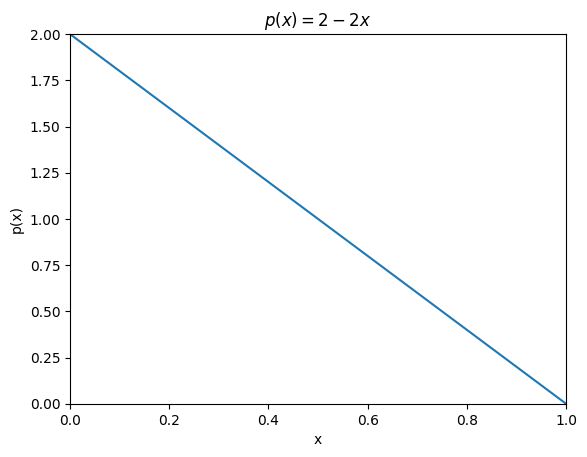

In [74]:
# Define the range of x values
x_continuous = np.linspace(0, 1, 100)

# Define the probability distribution function
def p(x):
  return 2-2*x

# Calculate p(x) for the given x values
p_x_continuous = p(x_continuous)

# Plot the distribution
plt.plot(x_continuous, p_x_continuous)
plt.xlabel("x")
plt.ylabel("p(x)")
plt.title("$p(x) = 2-2x$")
plt.xlim(0,1)
plt.ylim(0,2)
plt.show()

In [75]:
# Return the cumulative distribution function
def cdf_x(x):
  return 2*x - x*x

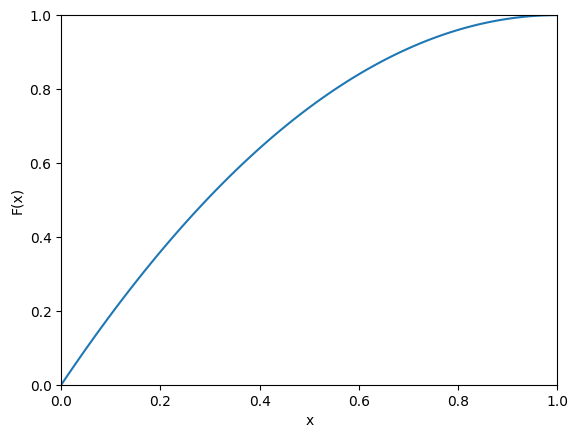

In [76]:
# Calculate p(x) for the given x values
cdf_x_continuous = cdf_x(x_continuous)

# Plot the cumulative distribution function
plt.plot(x_continuous, cdf_x_continuous)
plt.xlabel("x")
plt.ylabel("F(x)")
plt.xlim(0,1)
plt.ylim(0,1)
plt.show()

In [85]:
# Define inverse of cdf
def inverse_cdf(u):
  return 1-np.sqrt(u)

In [88]:
# Sample and form empirical probability distribution
n_samples = 100000;
samples = np.zeros((n_samples))
randgen = LCGenerator(seed=42)
for c_sample in range(n_samples):
    uniform = randgen.generate()
    this_sample = inverse_cdf(uniform)
    samples[c_sample] = this_sample

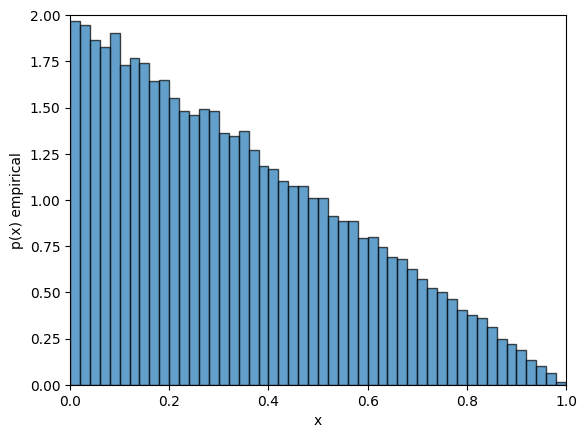

In [89]:
# Plot the samples
_= plt.hist(samples, bins=50, range=(0,1), density=True, alpha=0.7, edgecolor='black')
plt.xlabel("x")
plt.ylabel("p(x) empirical")
plt.xlim(0,1)
plt.ylim(0,2)
plt.show()

Note that this method only works if we can find the cumulative distribution function (i.e., integrate $p(x)$) and then find the inverse of this function.  This is not always the case, but for many common distributions there are other specialized methods for sampling.
